In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
colors = ['#a5f6d9','#3a7875', '#3a7875', '#14555c', '#102120', '#3e3023', '#564624', '#564624', '#ae914b', '#f5de94']
sns.set_palette(sns.color_palette(colors))

In [75]:
df = pd.read_csv('/Users/samanthajamwal/Desktop/LOL/Master/User_data_1.csv')
df = df.set_index(df['User Name'])
df['Champs'] = df['Champs'].str.replace('{', '').str.replace('}', '').str.replace('\'','').str.replace(': ', '').str.replace('7', '').str.replace('6', '').str.replace('5', '').str.replace('4', '').str.replace('3', '').str.replace('2', '').str.replace('1', '').str.replace(' ', '')
df['Champs'] = df['Champs'].str.replace('Dr.Mundo', 'DrMundo').str.replace('\"', '').str.replace('&Willump', '').str.replace('LeBlanc', 'Leblanc').str.replace('KhaZix', 'Khazix').str.replace('ChoGath', 'Chogath').str.replace('KaiSa', 'Kaisa').str.replace('Wukong', 'MonkeyKing').str.replace('VelKoz', 'Velkoz')

df['Champs'] = df['Champs'].str.split(',')
df = df[df['Champs'].map(lambda d: len(d)) > 1]

In [76]:
df_champ = pd.read_csv('/Users/samanthajamwal/Desktop/LOL/Master/Champ_data.csv')
champ_data = df_champ.drop(['Unnamed: 0', 'Key', 'Image', 'Lore', 'Ally Tips', 'Enemy Tips'], axis =1)
champ_data = champ_data.set_index(champ_data['Champion'], drop = True)
champ_data = champ_data.drop(['Champion'], axis =1)
champ_data['Tags'] = champ_data['Tags'].str.replace('[', '').str.replace(']', '').str.replace('\'', '').str.replace(' ', '')
champ_data['Tags'] = champ_data['Tags'].str.split(',')

champ_data = df_champ.drop(['Unnamed: 0', 'Key', 'Image', 'Lore', 'Ally Tips', 'Enemy Tips'], axis =1)
champ_data = champ_data.set_index(champ_data['Champion'], drop = True)
champ_data = champ_data.drop(['Champion'], axis =1)
champ_data['Tags'] = champ_data['Tags'].str.replace('[', '').str.replace(']', '').str.replace('\'', '').str.replace(' ', '')
champ_data['Tags'] = champ_data['Tags'].str.split(',')

In [77]:
champ_data

Tags
Champion                        
JarvanIV         [Tank, Fighter]
AurelionSol               [Mage]
Riven        [Fighter, Assassin]
Shyvana          [Fighter, Tank]
Yuumi            [Support, Mage]
...                          ...
Galio               [Tank, Mage]
MissFortune           [Marksman]
Kaisa                 [Marksman]
Taric         [Support, Fighter]
Cassiopeia                [Mage]

[150 rows x 1 columns]

In [79]:
df = df[0:20000]

In [80]:
dict_champ = {}
count = 0
for x in df.index:
    for champ in df.loc[x]['Champs']:
        if champ in dict_champ.keys():
            dict_champ[champ] = (dict_champ[champ] +1)
            count += 1
        else:
            dict_champ[champ] = 1
            count += 1

In [81]:
sort_dict = sorted(dict_champ, key=dict_champ.get, reverse=True)[:10]

x = sort_dict

In [82]:
y = []

for name in x:
    num = dict_champ[name]
    y.append(num/328380)



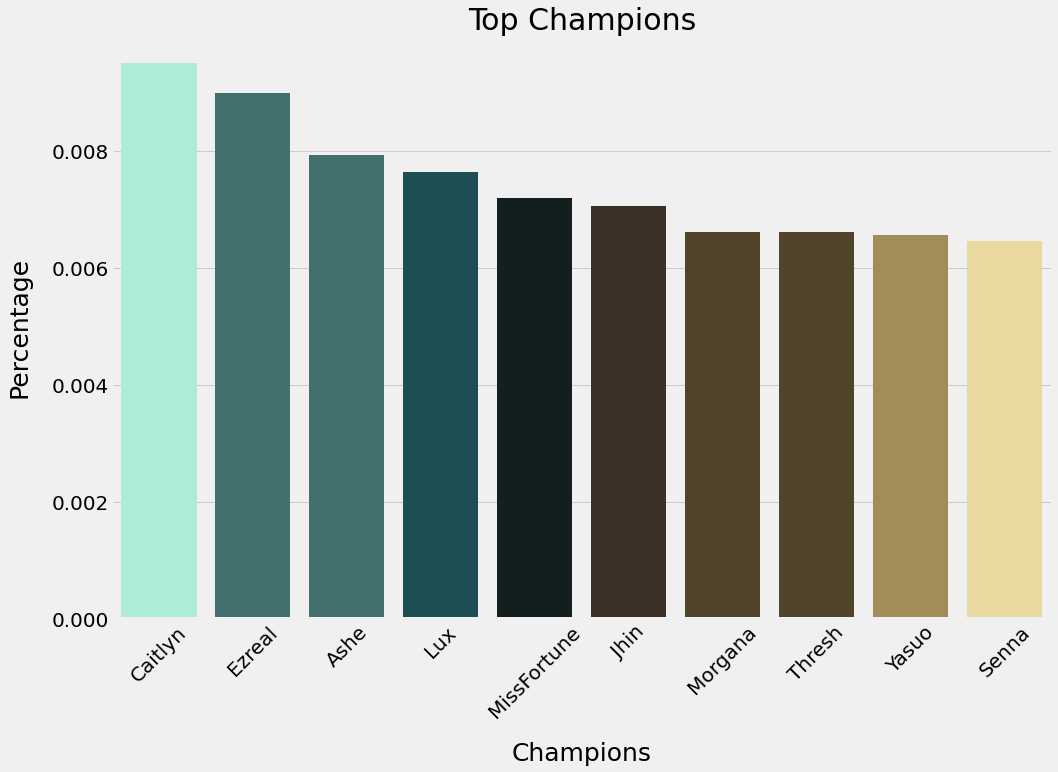

In [85]:
ax, fig = plt.subplots(figsize = (15,10))

sns.barplot(x, y,)
plt.xlabel('Champions', size = 25, labelpad=20)
plt.ylabel('Percentage', size = 25, labelpad=20)
plt.title('Top Champions', size = 30)
plt.tick_params(labelsize = 20)
plt.xticks(rotation=45)

plt.savefig('/Users/samanthajamwal/Desktop/LOL/Master/Figures/Top_Champs')

In [41]:
df = df[0:20000]

In [42]:
df['Champs']

User Name
Kennethvex                                           [Vayne, Draven]
GayBBC                                 [Malphite, Diana, Jax, Janna]
beatithard         [Malphite, Singed, Gnar, Quinn, Heimerdinger, ...
bananataiho           [Garen, Caitlyn, Diana, Ashe, Shaco, Pantheon]
ReLinkz            [Leblanc, Soraka, Syndra, Annie, Khazix, Nunu,...
                                         ...                        
racistpigs         [Pyke, Sylas, Akali, AurelionSol, Neeko, Ryze,...
Yilawen            [Shen, Rengar, Tryndamere, Caitlyn, Fiora, Tee...
RisenKeithclans    [Kled, Garen, Morgana, MissFortune, Nautilus, ...
ICU Doctor         [Fiora, Shaco, Zed, Caitlyn, Lucian, Camille, ...
I am Jewbacca                               [Nasus, Thresh, Chogath]
Name: Champs, Length: 20000, dtype: object

In [43]:


for x in df['User Name']:
    Champ = (df.loc[x]['Champs'])
    print (Champ)
    for char in Champ:
        tags = champ_data.loc[char]['Tags']
        print (tags)
        for tag in tags:
            df[tag][x] = (df[tag][x] + 1)
            df['count'][x] = (df['count'][x] + 1)
    
            

            
        

df['Tank'] = df['Tank'].div(df['count'])
df['Fighter'] = df['Fighter'].div(df['count'])
df['Mage'] = df['Mage'].div(df['count'])
df['Assassin'] = df['Assassin'].div(df['count'])
df['Support'] = df['Support'].div(df['count'])
df['Marksman'] = df['Marksman'].div(df['count'])
    
df = df.drop(['count', 'User Name'], axis = 1)

['Vayne', 'Draven']
['Marksman', 'Assassin']
['Marksman']
['Malphite', 'Diana', 'Jax', 'Janna']
['Tank', 'Fighter']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Support', 'Mage']
['Malphite', 'Singed', 'Gnar', 'Quinn', 'Heimerdinger', 'Janna', 'DrMundo']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Mage', 'Support']
['Support', 'Mage']
['Fighter', 'Tank']
['Garen', 'Caitlyn', 'Diana', 'Ashe', 'Shaco', 'Pantheon']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Mage']
['Marksman', 'Support']
['Assassin']
['Fighter', 'Assassin']
['Leblanc', 'Soraka', 'Syndra', 'Annie', 'Khazix', 'Nunu', 'LeeSin']
['Assassin', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Mage']
['Assassin']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Udyr', 'Nunu', 'Teemo']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Aphelios', 'Sejuani', 'MissFortune', 'MasterYi', 'Trundle', 'Ashe', 'Shaco']
['Marksman']
['Tank', 'Fighter']
['Marksman']
['Assassin', '

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



['Tank', 'Support']
['Marksman']
['Mage']
['Marksman']
['Syndra', 'Mordekaiser', 'Lux', 'Velkoz', 'Garen', 'Galio', 'Annie']
['Mage', 'Support']
['Fighter']
['Mage', 'Support']
['Mage']
['Fighter', 'Tank']
['Tank', 'Mage']
['Mage']
['Garen', 'Fizz', 'Yasuo', 'Riven', 'Irelia', 'Mordekaiser', 'LeeSin']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter']
['Fighter', 'Assassin']
['Ekko', 'Yasuo', 'TwistedFate', 'Fizz', 'Akali', 'Katarina', 'LeeSin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Mage']
['Assassin', 'Fighter']
['Assassin']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Thresh', 'JarvanIV', 'Olaf', 'Galio', 'Ezreal', 'Nautilus', 'Shyvana']
['Support', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Mage']
['Marksman', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Garen', 'Maokai', 'Shen', 'Ashe', 'Urgot', 'Nautilus', 'Teemo']
['Fighter', 'Tank']
['Tank', 'Mage']
['Tank']
['Marks

['Annie', 'Swain', 'Ornn', 'Evelynn', 'Galio', 'Vladimir', 'Warwick']
['Mage']
['Mage', 'Fighter']
['Tank', 'Fighter']
['Assassin', 'Mage']
['Tank', 'Mage']
['Mage']
['Fighter', 'Tank']
['Xerath', 'Yasuo', 'Riven', 'Draven', 'Ezreal', 'Malphite', 'LeeSin']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Lulu', 'Lux', 'Nami', 'Janna', 'Morgana', 'Yuumi', 'Zyra']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Shyvana', 'MissFortune', 'Urgot', 'Kaisa', 'Ezreal', 'Warwick', 'Caitlyn']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Jhin', 'Thresh', 'MissFortune', 'Kayn', 'Caitlyn', 'Lulu', 'Nautilus']
['Marksman', 'Mage']
['Support', 'Fighter']
['Marksman']
['Fighter', 'Assassin']
['Marksman']
['Support', 'Mage']
['Tank', 'Fighter']
['S

['Warwick', 'Khazix', 'Leona', 'Alistar', 'Volibear']
['Fighter', 'Tank']
['Assassin']
['Tank', 'Support']
['Tank', 'Support']
['Fighter', 'Tank']
['Kayn', 'Teemo', 'Shaco', 'Ekko', 'Sett', 'Jhin', 'Illaoi']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Olaf', 'Syndra', 'Qiyana', 'Sett', 'LeeSin', 'Pantheon', 'Ryze']
['Fighter', 'Tank']
['Mage', 'Support']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Mage', 'Fighter']
['Nocturne', 'Leona', 'Senna', 'Thresh', 'Karma', 'Yorick', 'Nautilus']
['Assassin', 'Fighter']
['Tank', 'Support']
['Marksman', 'Support']
['Support', 'Fighter']
['Mage', 'Support']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Jinx', 'Khazix', 'Blitzcrank', 'Trundle', 'Nidalee', 'Lucian', 'Lux']
['Marksman']
['Assassin']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Marksman']
['Mage', 'Support']
['Galio', '

['Mage', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Jhin', 'Ashe', 'Zyra', 'Varus']
['Marksman', 'Mage']
['Marksman', 'Support']
['Mage', 'Support']
['Marksman', 'Mage']
['Janna', 'Hecarim', 'Irelia', 'Katarina', 'Kassadin', 'MonkeyKing', 'Khazix']
['Support', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Assassin']
['Yasuo', 'MasterYi', 'Ahri', 'Twitch', 'Thresh', 'Udyr', 'Khazix']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Mage', 'Assassin']
['Marksman', 'Assassin']
['Support', 'Fighter']
['Fighter', 'Tank']
['Assassin']
['Nautilus', 'Blitzcrank', 'Rakan', 'Sona', 'Thresh', 'Janna', 'Taric']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Support']
['Support', 'Mage']
['Support', 'Fighter']
['Support', 'Mage']
['Support', 'Fighter']
['Tristana', 'Vayne', 'Jhin', 'Caitlyn', 'Ashe', 'Leblanc', 'Ezreal']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Marksman'

['Marksman']
['Support', 'Tank']
['Support', 'Mage']
['Tank']
['Marksman']
['Nasus', 'Sejuani', 'Yorick', 'Garen', 'Ashe', 'Jax', 'Mordekaiser']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Fighter']
['Kaisa', 'Caitlyn', 'Aphelios', 'Ashe', 'Ezreal', 'Xayah', 'MissFortune']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Xerath', 'Mordekaiser', 'Nasus', 'Sion', 'Udyr']
['Mage']
['Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Ashe', 'Vayne', 'Riven', 'Quinn', 'Kaisa', 'Kayle', 'Jax']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Marksman']
['Fighter', 'Support']
['Fighter', 'Assassin']
['Vayne', 'Ashe', 'LeeSin', 'Nidalee', 'Yasuo', 'Xerath', 'Riven']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Fighter', 'Assas

['Mage']
['TahmKench', 'Graves', 'Nasus', 'Khazix', 'Hecarim', 'Ekko', 'Mordekaiser']
['Support', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Assassin']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter']
['Aatrox', 'Jhin', 'MissFortune', 'Kaisa', 'Lucian', 'Aphelios', 'Ashe']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Support']
['Kayn', 'Akali', 'Ekko', 'Jhin', 'Khazix', 'MissFortune', 'Warwick']
['Fighter', 'Assassin']
['Assassin']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Assassin']
['Marksman']
['Fighter', 'Tank']
['Darius', 'Mordekaiser', 'Illaoi', 'Kayn', 'Malphite', 'Pantheon', 'Renekton']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Zed', 'Heimerdinger', 'Sett', 'Morgana', 'Caitlyn', 'Malphite', 'Draven']
['Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Mage', 'Support']
['Marksman']
['Tank', 'Fighter']
['

['Marksman', 'Assassin']
['Fighter', 'Tank']
['Darius', 'Jax', 'Sett', 'Yorick', 'Illaoi', 'Amumu', 'Garen']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Mage']
['Fighter', 'Tank']
['Irelia', 'Qiyana', 'Nidalee', 'Kindred', 'Kayn', 'Yasuo', 'LeeSin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Irelia', 'Ashe', 'Ezreal', 'Yasuo', 'Nami', 'Lux', 'Zac']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Support', 'Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['Diana', 'Pyke', 'Ahri', 'Nautilus', 'Veigar', 'Velkoz', 'Kayn']
['Fighter', 'Mage']
['Support', 'Assassin']
['Mage', 'Assassin']
['Tank', 'Fighter']
['Mage']
['Mage']
['Fighter', 'Assassin']
['Thresh', 'Braum', 'Yuumi', 'Alistar', 'Morgana', 'Leona', 'Malphite']
['Support', 'Fighter']
['Support', 'Tank']
['Sup

['Fighter', 'Assassin']
['Mage', 'Support']
['Marksman']
['Mage', 'Support']
['Fighter', 'Tank']
['Lux', 'Ahri', 'Morgana', 'Orianna', 'Diana', 'Blitzcrank', 'Sivir']
['Mage', 'Support']
['Mage', 'Assassin']
['Mage', 'Support']
['Mage', 'Support']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Marksman']
['Ahri', 'Nasus', 'Lux', 'Ezreal', 'Velkoz', 'Jinx', 'Caitlyn']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Mage', 'Support']
['Marksman', 'Mage']
['Mage']
['Marksman']
['Marksman']
['Thresh', 'Mordekaiser', 'Senna', 'Ahri', 'Nasus', 'Fiora', 'Caitlyn']
['Support', 'Fighter']
['Fighter']
['Marksman', 'Support']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman']
['Ashe', 'Teemo', 'DrMundo', 'MissFortune', 'Jinx', 'Veigar', 'Fiora']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Marksman']
['Mage']
['Fighter', 'Assassin']
['Hecarim', 'Malphite', 'Darius', 'Skarner', 'Volibear', 'Chogath', 'Ekko']
['Fighter', 'Tank']
['Tank', 'Figh

['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Yasuo', 'Lux', 'Zed', 'Ekko', 'Talon', 'Darius', 'Ahri']
['Fighter', 'Assassin']
['Mage', 'Support']
['Assassin']
['Assassin', 'Fighter']
['Assassin']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Kayn', 'Annie', 'Senna', 'Aphelios', 'Talon', 'Ashe', 'Pantheon']
['Fighter', 'Assassin']
['Mage']
['Marksman', 'Support']
['Marksman']
['Assassin']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Sett', 'Fizz', 'TahmKench', 'Rammus', 'Amumu', 'Urgot', 'MonkeyKing']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Support', 'Tank']
['Tank', 'Fighter']
['Tank', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Olaf', 'Sivir', 'Jhin', 'Tristana', 'Vi', 'Ekko']
['Fighter', 'Tank']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Blitzcrank', 'Thresh', 'Rakan', 'Senna', 'Sona']
['Tank', 'Fighter']
['Support', 'Fighter']


['Assassin', 'Mage']
['Fighter', 'Assassin']
['Assassin']
['Marksman', 'Support']
['Mage', 'Assassin']
['Renekton', 'Ashe', 'Sett', 'Caitlyn', 'Tryndamere', 'Chogath', 'Tristana']
['Fighter', 'Tank']
['Marksman', 'Support']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Marksman', 'Assassin']
['MonkeyKing', 'Veigar']
['Fighter', 'Tank']
['Mage']
['Xerath', 'Maokai', 'Ekko', 'Teemo', 'Tristana', 'Ziggs', 'MasterYi']
['Mage']
['Tank', 'Mage']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Mage']
['Assassin', 'Fighter']
['Nami', 'Tristana', 'Caitlyn', 'Kayn', 'Kaisa', 'Veigar']
['Support', 'Mage']
['Marksman', 'Assassin']
['Marksman']
['Fighter', 'Assassin']
['Marksman']
['Mage']
['Soraka', 'Akali', 'Ashe', 'Evelynn', 'Ahri', 'Syndra', 'Sona']
['Support', 'Mage']
['Assassin']
['Marksman', 'Support']
['Assassin', 'Mage']
['Mage', 'Assassin']
['Mage', 'Support']
['Support', 'Mage']
['Yuumi', 'Thresh', 'Rakan', 'Morgana', 'Braum', 'Ta

['Zed', 'Ezreal', 'Garen', 'Khazix']
['Assassin']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Assassin']
['Yuumi', 'Lux', 'Sett', 'Senna', 'Syndra', 'Ziggs', 'Xerath']
['Support', 'Mage']
['Mage', 'Support']
['Fighter', 'Tank']
['Marksman', 'Support']
['Mage', 'Support']
['Mage']
['Mage']
['Rengar', 'Zed', 'Orianna', 'MissFortune', 'Talon', 'Caitlyn', 'Sylas']
['Assassin', 'Fighter']
['Assassin']
['Mage', 'Support']
['Marksman']
['Assassin']
['Marksman']
['Mage', 'Assassin']
['Orianna', 'Trundle', 'Ryze', 'Khazix', 'Nautilus', 'Renekton', 'Warwick']
['Mage', 'Support']
['Fighter', 'Tank']
['Mage', 'Fighter']
['Assassin']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Diana', 'JarvanIV', 'Trundle', 'Yorick', 'Nidalee', 'Lucian', 'Yasuo']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Marksman']
['Fighter', 'Assassin']
['Yasuo', 'Katarina', 'Sett', 'Veigar', 'Akali', 'Qiyana', 'Jax']
['Fighter', 'Assassin']
['Assassin'

['Fighter', 'Assassin']
['Malphite', 'Morgana', 'Blitzcrank', 'MasterYi', 'LeeSin', 'Veigar', 'Galio']
['Tank', 'Fighter']
['Mage', 'Support']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Mage']
['Tank', 'Mage']
['Urgot', 'Blitzcrank', 'Galio', 'Garen', 'Quinn', 'Neeko', 'Teemo']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Mage']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Mage', 'Support']
['Marksman', 'Assassin']
['MasterYi', 'Nautilus', 'Vi', 'Tristana', 'Sett', 'Fiddlesticks', 'Tryndamere']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Mage', 'Support']
['Fighter', 'Assassin']
['Diana', 'Zed', 'Ekko', 'Jax', 'Akali', 'Leblanc', 'Yasuo']
['Fighter', 'Mage']
['Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Assassin']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Darius', 'Nasus', 'Thresh']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Support', 'Fighter']
['Jax', 'Zed', '

['Assassin']
['Mage', 'Assassin']
['Assassin']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Mage']
['Vayne', 'Hecarim', 'Karma', 'Caitlyn', 'JarvanIV', 'Amumu', 'Soraka']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Mage', 'Support']
['Marksman']
['Tank', 'Fighter']
['Tank', 'Mage']
['Support', 'Mage']
['LeeSin', 'Kaisa', 'Vayne', 'Volibear', 'Senna', 'Lucian', 'MissFortune']
['Fighter', 'Assassin']
['Marksman']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Garen', 'Talon', 'Xerath', 'Sett', 'Shen', 'Jayce', 'Nasus']
['Fighter', 'Tank']
['Assassin']
['Mage']
['Fighter', 'Tank']
['Tank']
['Fighter', 'Marksman']
['Fighter', 'Tank']
['Irelia', 'Camille', 'Riven', 'Akali', 'Darius', 'Aatrox', 'Zac']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Irelia', 'Taliyah', 'Kalista', 'Camille', 'RekSai', 'Shyvana', 'Katarina']
['Fighter', 'Assassin']
['M

['Fighter', 'Tank']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Mage', 'Fighter']
['Twitch', 'Rengar', 'Ashe', 'Kaisa', 'Ezreal', 'Gangplank', 'Kennen']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Marksman', 'Support']
['Marksman']
['Marksman', 'Mage']
['Fighter']
['Mage', 'Marksman']
['Leona', 'Janna']
['Tank', 'Support']
['Support', 'Mage']
['Kaisa', 'Vayne', 'Ashe', 'Ezreal', 'Blitzcrank', 'Yasuo', 'Aphelios']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Marksman', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['Nautilus', 'Lucian', 'Thresh', 'Kaisa', 'Shen', 'Jhin', 'Khazix']
['Tank', 'Fighter']
['Marksman']
['Support', 'Fighter']
['Marksman']
['Tank']
['Marksman', 'Mage']
['Assassin']
['Talon', 'Yasuo', 'Zac', 'Mordekaiser', 'Nocturne', 'Shyvana', 'Nasus']
['Assassin']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Thresh', 'Kaisa', 'Poppy', 'Nautilus', 'Bl

['Fighter', 'Assassin']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Sett', 'Illaoi', 'Volibear']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Camille', 'Riven', 'JarvanIV', 'Fiora', 'Irelia', 'Aatrox', 'XinZhao']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Camille', 'Tryndamere', 'Elise', 'Shyvana', 'Malphite', 'Nami', 'Morgana']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Mage', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Support', 'Mage']
['Mage', 'Support']
['Viktor', 'Thresh', 'Diana', 'Ahri', 'Leblanc', 'Leona', 'Syndra']
['Mage']
['Support', 'Fighter']
['Fighter', 'Mage']
['Mage', 'Assassin']
['Assassin', 'Mage']
['Tank', 'Support']
['Mage', 'Support']
['Jax', 'Khazix', 'Shyvana', 'Hecarim', 'MonkeyKing', 'Graves', 'Kayn']
['Fighter', 'Assassin']
['Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fig

['Fighter', 'Tank']
['Assassin']
['Assassin']
['Mage']
['Assassin', 'Mage']
['Mage', 'Support']
['Olaf', 'Morgana', 'Volibear', 'Hecarim', 'Zac', 'Graves', 'Evelynn']
['Fighter', 'Tank']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Marksman']
['Assassin', 'Mage']
['Darius', 'Kled', 'Mordekaiser', 'Sett', 'Fiora', 'Yorick', 'Aatrox']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Chogath', 'Senna', 'Ahri', 'Lux', 'Bard', 'Lulu', 'Janna']
['Tank', 'Mage']
['Marksman', 'Support']
['Mage', 'Assassin']
['Mage', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Senna', 'Pyke', 'MissFortune', 'Morgana', 'Sona', 'Janna', 'Ezreal']
['Marksman', 'Support']
['Support', 'Assassin']
['Marksman']
['Mage', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Marksman', 'Mage']
['Senna', 'Varus', 'Neeko', 'Chogath', 'Teemo', 'Soraka', 'Ashe']
['Marksman

['Marksman']
['Marksman']
['Support', 'Mage']
['Fighter', 'Mage']
['Assassin', 'Mage']
['Malzahar', 'Kassadin', 'Senna', 'Galio', 'Malphite', 'Nautilus', 'Pyke']
['Mage', 'Assassin']
['Assassin', 'Mage']
['Marksman', 'Support']
['Tank', 'Mage']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Support', 'Assassin']
['Riven', 'Aphelios', 'Vayne', 'Tristana', 'Ryze', 'Nunu', 'Katarina']
['Fighter', 'Assassin']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Mage', 'Fighter']
['Tank', 'Fighter']
['Assassin', 'Mage']
['Urgot', 'Velkoz', 'MonkeyKing', 'Vayne', 'MasterYi', 'Ezreal', 'Mordekaiser']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Fighter']
['Velkoz', 'Taric', 'Thresh', 'Vayne', 'Draven', 'Lulu', 'KogMaw']
['Mage']
['Support', 'Fighter']
['Support', 'Fighter']
['Marksman', 'Assassin']
['Marksman']
['Support', 'Mage']
['Marksman', 'Mage']
['Jinx', 'Kaisa', 'MissFortune', 'Pyke', 'Jhin', 'Ashe', 'Dr

['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Ezreal', 'MissFortune', 'LeeSin', 'Caitlyn', 'Senna', 'Xayah', 'Yuumi']
['Marksman', 'Mage']
['Marksman']
['Fighter', 'Assassin']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Support', 'Mage']
['Karma', 'Leona', 'Morgana', 'Lulu', 'Pantheon', 'Nami', 'Lux']
['Mage', 'Support']
['Tank', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Fighter', 'Assassin']
['Support', 'Mage']
['Mage', 'Support']
['Vayne', 'Lucian', 'Ezreal', 'Caitlyn', 'Thresh', 'Gnar', 'Blitzcrank']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Support', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Xerath', 'Pyke', 'Zed', 'MasterYi', 'Twitch', 'Leblanc', 'Malphite']
['Mage']
['Support', 'Assassin']
['Assassin']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Assassin', 'Mage']
['Tank', 'Fighter']
['Zac', 'Hecarim', 'Elise', 'Nunu', 'Galio', 'Mordekaiser', 'Bard']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Fighter'

['Assassin', 'Fighter']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Talon', 'LeeSin', 'Graves', 'MasterYi', 'Lucian', 'Gragas', 'Malphite']
['Assassin']
['Fighter', 'Assassin']
['Marksman']
['Assassin', 'Fighter']
['Marksman']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Akali', 'Ahri', 'Riven', 'Katarina', 'TwistedFate', 'Ziggs', 'Yasuo']
['Assassin']
['Mage', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Mage']
['Mage']
['Fighter', 'Assassin']
['Katarina', 'Lissandra', 'Fiora', 'Blitzcrank', 'Malphite', 'Lucian', 'Nami']
['Assassin', 'Mage']
['Mage']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Marksman']
['Support', 'Mage']
['Zed', 'Lucian', 'Ezreal', 'Kassadin', 'Sylas', 'Kalista', 'Renekton']
['Assassin']
['Marksman']
['Marksman', 'Mage']
['Assassin', 'Mage']
['Mage', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Leblanc', 'Gragas', 'Yasuo', 'Katarina', 'Vladimir', 'Syndra', 'Blitzcrank']
['Assassin', 'Mage']
['Fighter', 'Mage

['Fighter', 'Tank']
['Mage', 'Fighter']
['Mage']
['Mage']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Kaisa', 'Ashe', 'Xerath']
['Marksman']
['Marksman', 'Support']
['Mage']
['Malphite', 'DrMundo', 'Nocturne', 'Tristana']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Zyra', 'Nami']
['Mage', 'Support']
['Support', 'Mage']
['Ahri', 'Ekko']
['Mage', 'Assassin']
['Assassin', 'Fighter']
['Sett', 'Sejuani', 'Warwick', 'Pantheon', 'Khazix', 'Kayn', 'Senna']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin']
['Fighter', 'Assassin']
['Marksman', 'Support']
['MasterYi', 'Malzahar', 'Velkoz', 'Kayn', 'Zac', 'Mordekaiser', 'Warwick']
['Assassin', 'Fighter']
['Mage', 'Assassin']
['Mage']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter']
['Fighter', 'Tank']
['Maokai', 'Blitzcrank', 'Zac', 'Nami', 'Nautilus', 'Amumu', 'Annie']
['Tank', 'Mage']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Support', 'Mage']

['Support', 'Fighter']
['Malzahar', 'Amumu', 'Vi', 'Lissandra', 'Lulu', 'Galio', 'Ekko']
['Mage', 'Assassin']
['Tank', 'Mage']
['Fighter', 'Assassin']
['Mage']
['Support', 'Mage']
['Tank', 'Mage']
['Assassin', 'Fighter']
['Blitzcrank', 'Teemo', 'Lux', 'Fiddlesticks', 'Kennen', 'Amumu', 'Morgana']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Marksman']
['Tank', 'Mage']
['Mage', 'Support']
['Mordekaiser', 'Chogath', 'Darius', 'Kaisa', 'Leona', 'Nocturne', 'Malphite']
['Fighter']
['Tank', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Support']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Sion', 'Annie', 'Lucian', 'Kaisa', 'Thresh', 'Kayle', 'Ashe']
['Tank', 'Fighter']
['Mage']
['Marksman']
['Marksman']
['Support', 'Fighter']
['Fighter', 'Support']
['Marksman', 'Support']
['Diana', 'Rengar', 'MasterYi', 'Zed', 'Ekko', 'Mordekaiser', 'Vayne']
['Fighter', 'Mage']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Assassin']
['Assassin', 

['Support', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Support', 'Mage']
['Syndra', 'Lux', 'Orianna', 'Ashe', 'MissFortune', 'Ezreal', 'Lissandra']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Marksman', 'Support']
['Marksman']
['Marksman', 'Mage']
['Mage']
['MissFortune', 'Corki', 'Lucian', 'Varus', 'Senna', 'Kaisa', 'Caitlyn']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Malphite', 'Ezreal', 'Pyke', 'Morgana', 'Nasus', 'MasterYi', 'Jax']
['Tank', 'Fighter']
['Marksman', 'Mage']
['Support', 'Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Draven', 'Graves', 'Caitlyn', 'Ezreal', 'Senna', 'Twitch', 'Kaisa']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Marksman']
['Fiddlesticks', 'Vayne', 'Senna', 'Mordekaiser', 'Lux', 'Ezreal', 'Lucian']
['Mage', 'Support']
['Marksman', 'Assassin

['MonkeyKing', 'Kayn', 'JarvanIV', 'Lillia', 'Warwick', 'Sylas', 'Vi']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Fighter', 'Assassin']
['Lux', 'Syndra', 'Morgana', 'Sona', 'Caitlyn', 'Janna', 'Ashe']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Marksman']
['Support', 'Mage']
['Marksman', 'Support']
['Chogath', 'Brand', 'Qiyana', 'Kassadin', 'Jhin', 'Elise', 'Vladimir']
['Tank', 'Mage']
['Mage']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Marksman', 'Mage']
['Mage', 'Fighter']
['Mage']
['Xayah', 'Jhin', 'Caitlyn', 'Jinx', 'MissFortune', 'Leona', 'Morgana']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Marksman']
['Tank', 'Support']
['Mage', 'Support']
['Fizz', 'Veigar', 'Malzahar', 'Ezreal', 'Vladimir', 'Jax', 'Annie']
['Assassin', 'Fighter']
['Mage']
['Mage', 'Assassin']
['Marksman', 'Mage']
['Mage']
['Fighter', 'Assassin']
['Mage']
['Warwick', 'V

['Fighter', 'Assassin']
['Fighter', 'Mage']
['Janna', 'Nami', 'Soraka', 'Senna']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Marksman', 'Support']
['Malphite', 'Kassadin', 'Mordekaiser', 'MasterYi', 'Ezreal', 'Jax', 'Darius']
['Tank', 'Fighter']
['Assassin', 'Mage']
['Fighter']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Syndra', 'Diana', 'Kassadin', 'Thresh', 'Zed', 'Ryze', 'Lissandra']
['Mage', 'Support']
['Fighter', 'Mage']
['Assassin', 'Mage']
['Support', 'Fighter']
['Assassin']
['Mage', 'Fighter']
['Mage']
['Diana', 'Yasuo', 'Fiora', 'Veigar', 'Aatrox', 'Brand', 'Garen']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Mage']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Tank']
['Darius', 'Lucian', 'Caitlyn', 'MissFortune', 'Trundle', 'Irelia', 'Draven']
['Fighter', 'Tank']
['Marksman']
['Marksman']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman']
['Warwick', 'Vi', 'LeeSin', 'Vla

['Mage', 'Fighter']
['Fighter', 'Tank']
['Ornn', 'Malphite', 'Amumu', 'Kaisa', 'Caitlyn', 'Varus', 'Maokai']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Tank', 'Mage']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Tank', 'Mage']
['Vayne', 'Ezreal', 'Lucian', 'Leona', 'Jinx', 'Amumu', 'Caitlyn']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Tank', 'Support']
['Marksman']
['Tank', 'Mage']
['Marksman']
['Velkoz', 'Blitzcrank', 'Zyra', 'Pyke']
['Mage']
['Tank', 'Fighter']
['Mage', 'Support']
['Support', 'Assassin']
['KogMaw', 'Tristana', 'Teemo', 'Ashe', 'MissFortune', 'Gnar', 'Draven']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Marksman']
['Fighter', 'Tank']
['Marksman']
['MissFortune', 'Syndra', 'LeeSin', 'Fizz', 'Rumble', 'Zed', 'Qiyana']
['Marksman']
['Mage', 'Support']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Mage']
['Assassin']
['Assassin', 'Fighter']
['Soraka', 'Senna', 'Kindred', 'Karthus', 'L

['Marksman']
['Marksman', 'Assassin']
['Tank', 'Mage']
['Tank', 'Fighter']
['Mage', 'Support']
['Support', 'Fighter']
['Lucian', 'Darius', 'Aatrox', 'Renekton', 'Urgot', 'Ekko', 'Draven']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Marksman']
['Blitzcrank', 'Olaf', 'Lux', 'LeeSin', 'Morgana', 'Jax', 'MissFortune']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Support']
['Fighter', 'Assassin']
['Mage', 'Support']
['Fighter', 'Assassin']
['Marksman']
['Neeko', 'Jax', 'JarvanIV', 'Poppy', 'Teemo', 'Amumu', 'Morgana']
['Mage', 'Support']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Tank', 'Mage']
['Mage', 'Support']
['Caitlyn', 'Jhin', 'Garen', 'Volibear', 'LeeSin', 'Sett', 'Thresh']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Support', 'Fighter']
['Zyra', 'Neeko', 'Leblanc', 'Rumble', 'Karma

['Urgot', 'Shen', 'Volibear', 'Malphite', 'Sett', 'Fiora', 'Mordekaiser']
['Fighter', 'Tank']
['Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter']
['Pyke', 'Kayn', 'Thresh', 'Zoe', 'Bard', 'Blitzcrank', 'Ekko']
['Support', 'Assassin']
['Fighter', 'Assassin']
['Support', 'Fighter']
['Mage', 'Support']
['Support', 'Mage']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Rengar', 'MasterYi', 'Ekko', 'Kayn', 'Zed', 'Mordekaiser', 'Yasuo']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Assassin']
['Fighter']
['Fighter', 'Assassin']
['MasterYi', 'Jhin', 'Lucian', 'Blitzcrank', 'Sona', 'Shaco', 'Jinx']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Marksman']
['Tank', 'Fighter']
['Support', 'Mage']
['Assassin']
['Marksman']
['Nautilus', 'Blitzcrank', 'Thresh', 'Soraka', 'Braum', 'Leona', 'Senna']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Support', 'Fighter']
['Support', 'Mage']
['Support', 'Tan

['Mage']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Singed', 'Tryndamere', 'Maokai', 'Teemo', 'Ezreal', 'Zoe', 'Camille']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Mage', 'Support']
['Fighter', 'Tank']
['Jax', 'LeeSin', 'Teemo', 'Khazix', 'Irelia', 'Amumu', 'Karthus']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Assassin']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Mage']
['Jhin', 'Renekton', 'Mordekaiser', 'Ornn', 'MissFortune', 'Sett', 'Volibear']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter']
['Tank', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Senna', 'Yuumi', 'Volibear', 'Velkoz', 'Brand', 'Urgot', 'Trundle']
['Marksman', 'Support']
['Support', 'Mage']
['Fighter', 'Tank']
['Mage']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Brand', 'Nautilus', 'Zilean', 'Leblanc', 'Caitlyn', 'Olaf', 'TahmKen

['Tank', 'Support']
['Support', 'Fighter']
['Support', 'Mage']
['Support', 'Mage']
['Support']
['Jhin', 'Draven', 'Vayne', 'Ekko', 'Caitlyn', 'Jinx', 'Vi']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Marksman']
['Marksman']
['Fighter', 'Assassin']
['Mordekaiser', 'Fiddlesticks', 'Volibear', 'Karthus', 'Udyr', 'Hecarim', 'Ezreal']
['Fighter']
['Mage', 'Support']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Pantheon', 'Sett', 'Lulu', 'Kled', 'Jhin', 'Amumu', 'Caitlyn']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Support', 'Mage']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Tank', 'Mage']
['Marksman']
['Sett', 'Kayn', 'Volibear', 'Ekko', 'MonkeyKing', 'MasterYi', 'Diana']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Mage']
['TwistedFate', 'Thresh', 'Sett', 'Nautilus', 'Leona', 'Ezreal', 'Sylas']
['Mage'

['Mage']
['Orianna', 'JarvanIV', 'DrMundo', 'Sett', 'Lucian', 'Diana', 'Morgana']
['Mage', 'Support']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Mage']
['Mage', 'Support']
['Neeko', 'Kayle', 'RekSai', 'MasterYi', 'Galio', 'Alistar', 'Sett']
['Mage', 'Support']
['Fighter', 'Support']
['Fighter']
['Assassin', 'Fighter']
['Tank', 'Mage']
['Tank', 'Support']
['Fighter', 'Tank']
['Vayne', 'Jinx', 'Twitch', 'Ashe', 'Aphelios', 'Caitlyn', 'Kalista']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Marksman']
['Thresh', 'Senna', 'Janna', 'Karma', 'Nautilus', 'Ekko', 'Leona']
['Support', 'Fighter']
['Marksman', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Tank', 'Support']
['Senna', 'Thresh', 'Sett', 'Aphelios', 'Ezreal', 'Karma', 'Swain']
['Marksman', 'Support']
['Support', 'Fighter']
['Fighter', 'Tank']
['Marksman']
['Marksman', 'Mage

['Fighter', 'Tank']
['Mage']
['Marksman']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Senna', 'Lulu', 'Pyke', 'Soraka', 'Zilean', 'Bard', 'Janna']
['Marksman', 'Support']
['Support', 'Mage']
['Support', 'Assassin']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Yasuo', 'Thresh', 'Ashe', 'Diana', 'Senna', 'Blitzcrank', 'Vladimir']
['Fighter', 'Assassin']
['Support', 'Fighter']
['Marksman', 'Support']
['Fighter', 'Mage']
['Marksman', 'Support']
['Tank', 'Fighter']
['Mage']
['Nidalee', 'Trundle', 'Sylas', 'Ahri', 'Sion', 'Pantheon', 'Ezreal']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Mage', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Twitch', 'Kalista', 'Jhin', 'Ezreal', 'Kaisa', 'KogMaw', 'Cassiopeia']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Mage']
['Mage']
['Rumble', 'Zoe', 'Sylas', 'Sett', 'Ekko', 'Viktor', 'Talon']
['

['Mage', 'Assassin']
['Marksman', 'Support']
['Nautilus', 'Xerath', 'Pyke', 'Blitzcrank', 'Leona', 'Morgana', 'Thresh']
['Tank', 'Fighter']
['Mage']
['Support', 'Assassin']
['Tank', 'Fighter']
['Tank', 'Support']
['Mage', 'Support']
['Support', 'Fighter']
['Nami', 'Nautilus', 'Morgana', 'Karma', 'Yasuo']
['Support', 'Mage']
['Tank', 'Fighter']
['Mage', 'Support']
['Mage', 'Support']
['Fighter', 'Assassin']
['Kayn', 'Thresh', 'Jhin', 'Jinx', 'Veigar', 'Morgana', 'Brand']
['Fighter', 'Assassin']
['Support', 'Fighter']
['Marksman', 'Mage']
['Marksman']
['Mage']
['Mage', 'Support']
['Mage']
['Fizz', 'Caitlyn', 'Teemo', 'Ahri', 'Varus', 'Aatrox', 'Veigar']
['Assassin', 'Fighter']
['Marksman']
['Marksman', 'Assassin']
['Mage', 'Assassin']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Mage']
['Singed', 'Malphite', 'Renekton', 'Nautilus', 'Illaoi', 'Sett', 'Lucian']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman']

['Fighter', 'Mage']
['Tank', 'Support']
['Tank', 'Fighter']
['Mage', 'Support']
['Mage']
['Chogath', 'Gnar', 'Fiddlesticks', 'Poppy', 'Maokai', 'Pyke', 'Amumu']
['Tank', 'Mage']
['Fighter', 'Tank']
['Mage', 'Support']
['Tank', 'Fighter']
['Tank', 'Mage']
['Support', 'Assassin']
['Tank', 'Mage']
['Nami', 'Caitlyn', 'MissFortune', 'Janna', 'Karma', 'Nautilus', 'Morgana']
['Support', 'Mage']
['Marksman']
['Marksman']
['Support', 'Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['Mage', 'Support']
['Pyke', 'LeeSin', 'Braum', 'Sett', 'Aphelios', 'Thresh', 'Ekko']
['Support', 'Assassin']
['Fighter', 'Assassin']
['Support', 'Tank']
['Fighter', 'Tank']
['Marksman']
['Support', 'Fighter']
['Assassin', 'Fighter']
['Jax', 'Sett', 'Nasus', 'Udyr', 'Chogath', 'Teemo', 'Fiora']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Mage']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Yasuo', 'MissFortune', 'Zed', 'Tristana', 'Ezreal', 'MonkeyKing', 'Jhin']


['Marksman']
['Zac', 'Poppy', 'Nunu', 'Shyvana', 'Volibear', 'Rammus', 'Blitzcrank']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Vi', 'Evelynn', 'Warwick', 'AurelionSol', 'Mordekaiser', 'Lux', 'Kled']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Mage']
['Fighter']
['Mage', 'Support']
['Fighter', 'Tank']
['Aphelios', 'Ashe', 'Kaisa', 'Tristana', 'Jhin', 'Caitlyn', 'MissFortune']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Soraka', 'Leona', 'Amumu', 'Blitzcrank', 'Shyvana', 'Thresh', 'Tryndamere']
['Support', 'Mage']
['Tank', 'Support']
['Tank', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Support', 'Fighter']
['Fighter', 'Assassin']
['Akali', 'Poppy', 'Katarina', 'Qiyana', 'Zoe', 'Ezreal', 'Yone']
['Assassin']
['Tank', 'Fighter']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Mage', 'S

['Shaco', 'Graves', 'Nidalee', 'JarvanIV', 'Malphite', 'Amumu', 'Thresh']
['Assassin']
['Marksman']
['Assassin', 'Mage']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Tank', 'Mage']
['Support', 'Fighter']
['Ashe', 'Jinx', 'Nami', 'Caitlyn', 'Xayah', 'Jhin', 'Soraka']
['Marksman', 'Support']
['Marksman']
['Support', 'Mage']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Support', 'Mage']
['Vayne', 'Evelynn', 'Caitlyn', 'MissFortune', 'Lucian', 'Katarina', 'Ashe']
['Marksman', 'Assassin']
['Assassin', 'Mage']
['Marksman']
['Marksman']
['Marksman']
['Assassin', 'Mage']
['Marksman', 'Support']
['Anivia', 'Sona', 'Teemo', 'TahmKench']
['Mage', 'Support']
['Support', 'Mage']
['Marksman', 'Assassin']
['Support', 'Tank']
['Kayn', 'Olaf', 'Khazix', 'Trundle']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin']
['Fighter', 'Tank']
['Ezreal', 'Ashe', 'Ziggs', 'Nautilus', 'Lux', 'Kaisa', 'Sivir']
['Marksman', 'Mage']
['Marksman', 'Support']
['Mage']
['Tank', 'Fighter']
['Mage', 'Support']
['Mar

['Fighter', 'Tank']
['Marksman', 'Support']
['Ekko', 'Blitzcrank']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['MonkeyKing', 'Malphite', 'Illaoi', 'Trundle', 'Ashe', 'Sett', 'Shaco']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Support']
['Fighter', 'Tank']
['Assassin']
['Fizz', 'Kayn', 'Sylas', 'Mordekaiser', 'Sett', 'Rumble', 'Talon']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Assassin']
['XinZhao', 'Teemo', 'Malphite', 'Leona', 'Ashe', 'Sona', 'Jinx']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Tank', 'Support']
['Marksman', 'Support']
['Support', 'Mage']
['Marksman']
['Azir', 'Tryndamere', 'Cassiopeia', 'Kassadin', 'Galio', 'Zilean', 'Irelia']
['Mage', 'Marksman']
['Fighter', 'Assassin']
['Mage']
['Assassin', 'Mage']
['Tank', 'Mage']
['Support', 'Mage']
['Fighter', 'Assassin']
['Lucian', 'Nocturne', 'Zac', 'Caitlyn', 'Tristana'

['Support', 'Mage']
['Support', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Fiora', 'Mordekaiser', 'Darius', 'Shyvana', 'Warwick', 'Pyke', 'Vayne']
['Fighter', 'Assassin']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Support', 'Assassin']
['Marksman', 'Assassin']
['Senna', 'Morgana', 'Lux', 'Nami', 'Rakan', 'Janna', 'Lulu']
['Marksman', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Support']
['Support', 'Mage']
['Support', 'Mage']
['Warwick', 'Vi', 'Sejuani', 'DrMundo', 'Nautilus', 'Leona', 'JarvanIV']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Support']
['Tank', 'Fighter']
['Ashe', 'Aatrox', 'Janna', 'Jinx', 'Riven', 'KogMaw', 'Senna']
['Marksman', 'Support']
['Fighter', 'Tank']
['Support', 'Mage']
['Marksman']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Marksman', 'Support']
['Jax', 'MasterYi',

['Support', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Pyke', 'Teemo', 'Morgana', 'Yasuo', 'Zoe', 'Fizz', 'Thresh']
['Support', 'Assassin']
['Marksman', 'Assassin']
['Mage', 'Support']
['Fighter', 'Assassin']
['Mage', 'Support']
['Assassin', 'Fighter']
['Support', 'Fighter']
['Caitlyn', 'Thresh', 'Pyke', 'MasterYi', 'Lux', 'Darius', 'Blitzcrank']
['Marksman']
['Support', 'Fighter']
['Support', 'Assassin']
['Assassin', 'Fighter']
['Mage', 'Support']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Teemo', 'Nami', 'Garen', 'Lux', 'DrMundo', 'Ornn', 'Shyvana']
['Marksman', 'Assassin']
['Support', 'Mage']
['Fighter', 'Tank']
['Mage', 'Support']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Nunu', 'Olaf', 'Soraka', 'Kayle', 'Garen', 'Nasus', 'Amumu']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Support', 'Mage']
['Fighter', 'Support']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Mage']
['Sett', 'Yasuo', 'Thres

['Marksman', 'Support']
['Tank']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Akali', 'Aatrox', 'Renekton', 'Elise', 'Tryndamere', 'LeeSin']
['Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Shen', 'Soraka', 'Blitzcrank', 'Leona', 'Brand', 'Morgana', 'Swain']
['Tank']
['Support', 'Mage']
['Tank', 'Fighter']
['Tank', 'Support']
['Mage']
['Mage', 'Support']
['Mage', 'Fighter']
['Fizz', 'Veigar', 'Amumu', 'Ekko', 'Nautilus', 'Garen', 'Lux']
['Assassin', 'Fighter']
['Mage']
['Tank', 'Mage']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Support']
['Karma', 'Camille', 'Vladimir', 'Orianna', 'Jinx', 'Graves', 'Sylas']
['Mage', 'Support']
['Fighter', 'Tank']
['Mage']
['Mage', 'Support']
['Marksman']
['Marksman']
['Mage', 'Assassin']
['Diana', 'Garen', 'Galio', 'Lux', 'MissFortune', 'MasterYi', 'Rammus']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Tank', 'Mage']
['Mage', 

['Mage']
['Support', 'Mage']
['Assassin', 'Fighter']
['Assassin']
['Marksman', 'Support']
['Assassin']
['Rumble', 'Renekton', 'Ornn', 'Aatrox', 'Darius', 'Garen', 'Maokai']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Mage']
['MissFortune', 'Lux', 'Ashe', 'Hecarim', 'Caitlyn', 'Ezreal', 'Kaisa']
['Marksman']
['Mage', 'Support']
['Marksman', 'Support']
['Fighter', 'Tank']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Nocturne', 'Ashe', 'Brand', 'Leona']
['Assassin', 'Fighter']
['Marksman', 'Support']
['Mage']
['Tank', 'Support']
['MissFortune', 'Xayah', 'Ashe', 'Caitlyn', 'Jinx', 'Twitch', 'Sivir']
['Marksman']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Marksman', 'Assassin']
['Marksman']
['Sona', 'Nami', 'Lux', 'Soraka', 'Zyra', 'Karma', 'Senna']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Marksman', 

['Marksman', 'Mage']
['Mage', 'Support']
['Nunu', 'Illaoi', 'Warwick', 'Brand', 'DrMundo', 'Nautilus', 'Aatrox']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Sett', 'Yasuo', 'MasterYi', 'Garen', 'MonkeyKing', 'Yone', 'Syndra']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Mage', 'Support']
['Twitch', 'MissFortune', 'Kaisa', 'Lucian', 'Caitlyn', 'Tristana', 'Leona']
['Marksman', 'Assassin']
['Marksman']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Assassin']
['Tank', 'Support']
['Evelynn', 'Graves', 'Thresh', 'Vayne', 'Fiddlesticks', 'Ashe', 'Jax']
['Assassin', 'Mage']
['Marksman']
['Support', 'Fighter']
['Marksman', 'Assassin']
['Mage', 'Support']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Sona', 'Hecarim', 'Darius', 'Thresh', 'Ahri', 'Jhin', 'Nautilus']
['Support', 'Mage']
['Fighter', 'Tank']
['Figh

['Fighter', 'Mage']
['Kaisa', 'Zac', 'Elise', 'Neeko', 'Nunu', 'Warwick', 'Sejuani']
['Marksman']
['Tank', 'Fighter']
['Mage', 'Fighter']
['Mage', 'Support']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Draven', 'Vayne', 'Nasus', 'Lucian', 'Jhin', 'MasterYi', 'Warwick']
['Marksman']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Marksman', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Jax', 'MasterYi', 'Zac', 'Kayle', 'Ashe', 'Tryndamere', 'Maokai']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Support']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Darius', 'Maokai', 'Tryndamere', 'Garen', 'Rengar', 'Jax', 'Renekton']
['Fighter', 'Tank']
['Tank', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Sivir', 'Ezreal', 'Zyra', 'Ashe', 'Ahri', 'Caitlyn', 'Sett']
['Marksman']
['Marksman', 'Mage']
['Mage', 'Support']
['Marksman', 

['Marksman']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Support']
['Fighter', 'Tank']
['Fighter']
['Leona', 'Yuumi', 'Nautilus', 'Senna', 'TahmKench', 'Nami', 'Lux']
['Tank', 'Support']
['Support', 'Mage']
['Tank', 'Fighter']
['Marksman', 'Support']
['Support', 'Tank']
['Support', 'Mage']
['Mage', 'Support']
['Veigar', 'Varus', 'Zac', 'Rammus', 'Rumble', 'Xerath', 'Nunu']
['Mage']
['Marksman', 'Mage']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Mage']
['Mage']
['Tank', 'Fighter']
['Bard', 'Senna', 'Morgana', 'Thresh', 'Yuumi', 'Sona', 'Sett']
['Support', 'Mage']
['Marksman', 'Support']
['Mage', 'Support']
['Support', 'Fighter']
['Support', 'Mage']
['Support', 'Mage']
['Fighter', 'Tank']
['Darius', 'Blitzcrank', 'Nautilus', 'MonkeyKing', 'Evelynn', 'Akali', 'Lissandra']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Assassin']
['Mage']
['Yasuo', 'Akali', 'Sett', 'Sylas', 'Caitlyn', 'Darius', 'Diana']
['Fighter', 'Assa

['Fighter', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Mage']
['Marksman', 'Assassin']
['Garen', 'Annie', 'Nasus', 'Vi', 'Thresh', 'Blitzcrank', 'Rammus']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Support', 'Fighter']
['Tank', 'Fighter']
['Tank', 'Fighter']
['MissFortune', 'Twitch', 'Caitlyn', 'Ezreal', 'Jinx', 'Aphelios', 'Kaisa']
['Marksman']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Marksman']
['Ziggs', 'Jinx', 'Cassiopeia', 'Katarina', 'Caitlyn', 'Xerath', 'Syndra']
['Mage']
['Marksman']
['Mage']
['Assassin', 'Mage']
['Marksman']
['Mage']
['Mage', 'Support']
['Lux', 'Senna', 'Talon', 'Jax', 'Nocturne', 'Garen', 'Vi']
['Mage', 'Support']
['Marksman', 'Support']
['Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fiora', 'Evelynn', 'Shaco', 'Vladimir', 'Ekko', 'Darius', 'Kassadin']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Assassin']
['Mage']
['Assa

['Jayce', 'Senna', 'Morgana', 'Swain', 'Caitlyn', 'Kled', 'DrMundo']
['Fighter', 'Marksman']
['Marksman', 'Support']
['Mage', 'Support']
['Mage', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Zac', 'Rumble']
['Tank', 'Fighter']
['Fighter', 'Mage']
['Nunu', 'Amumu', 'Blitzcrank', 'Ekko', 'Shyvana', 'Khazix']
['Tank', 'Fighter']
['Tank', 'Mage']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Assassin']
['Yasuo', 'Ashe', 'Tryndamere', 'Ahri', 'MasterYi', 'Talon', 'Riven']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Assassin', 'Fighter']
['Assassin']
['Fighter', 'Assassin']
['Garen', 'Jax', 'DrMundo', 'Nasus', 'Amumu', 'Caitlyn', 'Tristana']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Mage']
['Marksman']
['Marksman', 'Assassin']
['Nautilus', 'Velkoz', 'Singed', 'Nasus', 'Ashe', 'Fiddlesticks', 'Blitzcrank']
['Tank', 'Fighter']
['Mage']
['Tank', 'Fighte

['Fighter', 'Tank']
['Ezreal', 'Caitlyn', 'Ashe', 'Aphelios', 'Jinx', 'Ahri', 'Xayah']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Mage', 'Assassin']
['Marksman']
['Ekko', 'Shen', 'Nautilus', 'DrMundo', 'Sejuani']
['Assassin', 'Fighter']
['Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Yasuo', 'Hecarim', 'Vladimir']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Mage']
['Graves', 'Irelia', 'Fiora', 'Aphelios', 'Lucian', 'Draven', 'Lux']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman']
['Marksman']
['Marksman']
['Mage', 'Support']
['Evelynn', 'Twitch', 'Kaisa', 'Shen', 'Quinn', 'KogMaw', 'Fiddlesticks']
['Assassin', 'Mage']
['Marksman', 'Assassin']
['Marksman']
['Tank']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Mage', 'Support']
['Leblanc', 'MissFortune', 'Thresh', 'Fizz', 'Mordekaiser', 'Jinx', 'Syndra']
['Assassin', 'Mage']
['Marksman']
['Support', 'Fighter']
['Assassin', 'Fighter']
['Fighter

['Assassin', 'Fighter']
['Mage', 'Support']
['Marksman']
['Marksman']
['Marksman']
['Cassiopeia', 'Veigar', 'Garen', 'Ryze', 'Neeko', 'Annie', 'Syndra']
['Mage']
['Mage']
['Fighter', 'Tank']
['Mage', 'Fighter']
['Mage', 'Support']
['Mage']
['Mage', 'Support']
['MasterYi', 'Olaf', 'Darius', 'Shaco', 'Nasus', 'Mordekaiser', 'Fiddlesticks']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin']
['Fighter', 'Tank']
['Fighter']
['Mage', 'Support']
['Chogath', 'Fizz', 'Diana', 'Volibear', 'MissFortune', 'MonkeyKing', 'Quinn']
['Tank', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Khazix', 'Graves', 'Xerath', 'Orianna', 'Evelynn', 'Fizz', 'Vayne']
['Assassin']
['Marksman']
['Mage']
['Mage', 'Support']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Soraka', 'Lux', 'Jhin', 'Rakan', 'Veigar']
['Support', 'Mage']
['Mage', 'Support']
['Marksman', 'Mage']
['Support']


['Fighter', 'Tank']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fizz', 'Diana', 'Olaf', 'Lucian', 'Jax', 'Ahri', 'Katarina']
['Assassin', 'Fighter']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Assassin', 'Mage']
['Cassiopeia', 'Orianna', 'Rumble', 'Vladimir', 'TwistedFate', 'Teemo', 'Corki']
['Mage']
['Mage', 'Support']
['Fighter', 'Mage']
['Mage']
['Mage']
['Marksman', 'Assassin']
['Marksman']
['Kayn', 'Darius', 'Aatrox', 'Mordekaiser', 'Nasus', 'Tryndamere', 'Jax']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Veigar', 'Leblanc', 'Varus', 'Amumu', 'Tristana', 'Orianna', 'DrMundo']
['Mage']
['Assassin', 'Mage']
['Marksman', 'Mage']
['Tank', 'Mage']
['Marksman', 'Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Lulu', 'Braum', 'Soraka', 'Amumu', 'Tristana', 'Morgana

['Fighter', 'Assassin']
['Tank', 'Fighter']
['Tank', 'Support']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Support']
['Nocturne', 'Quinn', 'Olaf', 'Volibear', 'Garen', 'Teemo', 'MonkeyKing']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Varus', 'Senna', 'Ashe', 'Jinx', 'Jhin', 'Kaisa', 'Twitch']
['Marksman', 'Mage']
['Marksman', 'Support']
['Marksman', 'Support']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Assassin']
['Akali', 'Zed', 'Yasuo', 'Senna', 'Velkoz', 'RekSai', 'Kassadin']
['Assassin']
['Assassin']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Mage']
['Fighter']
['Assassin', 'Mage']
['Elise', 'Zac', 'Nocturne', 'Nunu', 'JarvanIV', 'Diana', 'Warwick']
['Mage', 'Fighter']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Shaco', 'Trundle', 'Sett', 'Amumu', 'Olaf', 'Vo

['Assassin', 'Mage']
['Assassin']
['Marksman', 'Mage']
['Support', 'Mage']
['Tank', 'Fighter']
['Support', 'Mage']
['Yasuo', 'Lucian', 'Ekko', 'Akali', 'Graves', 'Karthus', 'Sett']
['Fighter', 'Assassin']
['Marksman']
['Assassin', 'Fighter']
['Assassin']
['Marksman']
['Mage']
['Fighter', 'Tank']
['Jhin', 'Ashe', 'Jinx', 'Caitlyn', 'Lucian', 'Sylas', 'MissFortune']
['Marksman', 'Mage']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Marksman']
['Mage', 'Assassin']
['Marksman']
['Janna', 'Leona', 'Nautilus', 'Sona', 'MissFortune', 'Ezreal', 'Morgana']
['Support', 'Mage']
['Tank', 'Support']
['Tank', 'Fighter']
['Support', 'Mage']
['Marksman']
['Marksman', 'Mage']
['Mage', 'Support']
['Senna', 'Kaisa', 'Trundle', 'MissFortune', 'Mordekaiser', 'Illaoi', 'Olaf']
['Marksman', 'Support']
['Marksman']
['Fighter', 'Tank']
['Marksman']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Xayah', 'Caitlyn', 'Jhin', 'Jinx', 'MissFortune', 'Ashe']
['Marksman']
['Marksman']
['Marksman', 'Mage']

['Mage']
['Fighter', 'Tank']
['Mage']
['Marksman']
['Evelynn', 'Sylas', 'Twitch', 'Fiora', 'Kaisa', 'Zac', 'Singed']
['Assassin', 'Mage']
['Mage', 'Assassin']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Marksman']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Riven', 'Draven', 'Rengar', 'Jax', 'Ezreal', 'Gangplank', 'Shen']
['Fighter', 'Assassin']
['Marksman']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Fighter']
['Tank']
['Ashe', 'Shaco', 'MissFortune', 'Singed', 'Sejuani', 'Tristana', 'Nunu']
['Marksman', 'Support']
['Assassin']
['Marksman']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['MasterYi', 'Khazix', 'Ekko', 'Ryze', 'Yasuo', 'Janna', 'Veigar']
['Assassin', 'Fighter']
['Assassin']
['Assassin', 'Fighter']
['Mage', 'Fighter']
['Fighter', 'Assassin']
['Support', 'Mage']
['Mage']
['Ezreal', 'Leblanc', 'Thresh', 'Xayah', 'Shen', 'Blitzcrank', 'Zac']
['Marksman', 'Mage']
['Assassin', 'Mage']
['Support', 'Fighter']

['Tank', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Khazix', 'Nocturne', 'Jax', 'MasterYi', 'Tristana']
['Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Rengar', 'Garen', 'Draven', 'Nautilus', 'Darius', 'Singed', 'Teemo']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Ashe', 'MissFortune', 'Jax', 'Nocturne', 'Malphite', 'Ezreal', 'Amumu']
['Marksman', 'Support']
['Marksman']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Marksman', 'Mage']
['Tank', 'Mage']
['Sylas', 'Jax', 'Gragas', 'Jinx']
['Mage', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Mage']
['Marksman']
['Vayne', 'Ezreal', 'Janna', 'Nasus', 'Twitch', 'Nunu', 'Lucian']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Support', 'Mage']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Marks

['Support', 'Mage']
['Tank', 'Support']
['Tank', 'Fighter']
['Marksman', 'Support']
['Veigar', 'Nasus', 'Pantheon', 'Tryndamere', 'Caitlyn', 'Fizz', 'Garen']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Rengar', 'Sett', 'Warwick', 'Ekko', 'MonkeyKing', 'MasterYi', 'Nocturne']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Graves', 'RekSai', 'Shen', 'Gragas', 'Olaf', 'Kayn', 'LeeSin']
['Marksman']
['Fighter']
['Tank']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Annie', 'Ahri', 'Thresh', 'JarvanIV', 'Yuumi', 'Zed', 'Viktor']
['Mage']
['Mage', 'Assassin']
['Support', 'Fighter']
['Tank', 'Fighter']
['Support', 'Mage']
['Assassin']
['Mage']
['Sylas', 'MasterYi', 'Katarina', 'Mordekaiser', 'Yasuo', 'Trundle', 'Ezreal']
['Mage', 'Assassin']
['Assass

['Marksman']
['Jhin', 'Kaisa', 'Ezreal', 'Nasus', 'Riven', 'Brand', 'Ziggs']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Mage']
['Mage']
['Tryndamere', 'Shen', 'Illaoi', 'Brand', 'Garen', 'Jax', 'Blitzcrank']
['Fighter', 'Assassin']
['Tank']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Sylas', 'Sett', 'Yasuo', 'Ryze', 'Aatrox', 'Kled', 'Irelia']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Mage', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Nocturne', 'Olaf', 'Graves', 'Rengar', 'MonkeyKing', 'Volibear', 'LeeSin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Marksman']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Ahri', 'Xayah', 'Diana', 'MissFortune', 'Caitlyn', 'Lux', 'Ezreal']
['Mage', 'Assassin']
['Marksman']
['Fighter', 'Mage']
['Marksman']
['Marksman']
['Mage', 'Support']
['Ma

['Mage', 'Support']
['Xerath', 'Neeko', 'Teemo', 'Heimerdinger', 'Shyvana', 'Lux', 'Morgana']
['Mage']
['Mage', 'Support']
['Marksman', 'Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Mage', 'Support']
['Mage', 'Support']
['Katarina', 'Zed', 'Cassiopeia', 'LeeSin', 'Riven', 'Jinx', 'Yasuo']
['Assassin', 'Mage']
['Assassin']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Assassin']
['Galio', 'Vayne', 'Ornn', 'Jinx', 'Shen', 'Ezreal', 'Vi']
['Tank', 'Mage']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Marksman']
['Tank']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Ashe', 'Jinx', 'Bard', 'TwistedFate', 'Twitch']
['Marksman', 'Support']
['Marksman']
['Support', 'Mage']
['Mage']
['Marksman', 'Assassin']
['Lulu', 'Lux', 'Nami']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Yasuo', 'Talon', 'Amumu', 'Akali', 'Jhin', 'Zed', 'Ashe']
['Fighter', 'Assassin']
['Assassin']
['Tank', 'Mage']
['Assassin']
['Marksman', 'Mage']
['Assassin']


['Support']
['Mage']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Talon', 'Jhin', 'Khazix', 'Senna', 'Irelia']
['Assassin']
['Marksman', 'Mage']
['Assassin']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Ekko', 'Sivir', 'Ashe', 'Sejuani', 'Heimerdinger', 'Fiddlesticks', 'Lucian']
['Assassin', 'Fighter']
['Marksman']
['Marksman', 'Support']
['Tank', 'Fighter']
['Mage', 'Support']
['Mage', 'Support']
['Marksman']
['Gnar', 'Mordekaiser', 'Sivir', 'Pyke', 'Ornn', 'Brand']
['Fighter', 'Tank']
['Fighter']
['Marksman']
['Support', 'Assassin']
['Tank', 'Fighter']
['Mage']
['Zac', 'Kaisa', 'Jhin', 'Kayle', 'Tryndamere', 'Ezreal', 'Aatrox']
['Tank', 'Fighter']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Support']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Ezreal', 'Draven', 'Caitlyn', 'Jhin', 'Jinx']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['MissFortune', 'Mordekaiser', 'Graves', 'Cassiopeia', 'Malphite', 'Nautilus', 'Senna

['Aphelios', 'Kaisa', 'Qiyana', 'Lucian', 'Twitch', 'Nidalee', 'Xayah']
['Marksman']
['Marksman']
['Assassin', 'Fighter']
['Marksman']
['Marksman', 'Assassin']
['Assassin', 'Mage']
['Marksman']
['Cassiopeia', 'Syndra', 'Kaisa', 'LeeSin', 'Vladimir', 'Ekko', 'Draven']
['Mage']
['Mage', 'Support']
['Marksman']
['Fighter', 'Assassin']
['Mage']
['Assassin', 'Fighter']
['Marksman']
['Zed', 'Cassiopeia', 'Akali', 'Jayce', 'Qiyana', 'Varus', 'Syndra']
['Assassin']
['Mage']
['Assassin']
['Fighter', 'Marksman']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Mage', 'Support']
['Cassiopeia', 'Nautilus', 'Zilean', 'Rakan', 'Xayah', 'MissFortune', 'Nami']
['Mage']
['Tank', 'Fighter']
['Support', 'Mage']
['Support']
['Marksman']
['Marksman']
['Support', 'Mage']
['Evelynn', 'Annie', 'Irelia', 'Kayn', 'Fizz', 'Syndra', 'Kindred']
['Assassin', 'Mage']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Mage', 'Support']
['Marksman']
['Nunu', 'MonkeyKing', 'Ekko', 'Evelynn

['Camille', 'Singed', 'Pyke', 'Shaco', 'Bard', 'Soraka', 'Kayn']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Support', 'Assassin']
['Assassin']
['Support', 'Mage']
['Support', 'Mage']
['Fighter', 'Assassin']
['Nami', 'Janna', 'Lux', 'Viktor', 'Morgana', 'Vi', 'Leona']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Mage']
['Mage', 'Support']
['Fighter', 'Assassin']
['Tank', 'Support']
['Diana', 'Anivia', 'Tristana', 'Galio', 'Morgana', 'Yuumi', 'Talon']
['Fighter', 'Mage']
['Mage', 'Support']
['Marksman', 'Assassin']
['Tank', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Assassin']
['Ezreal', 'Xayah', 'Senna', 'Caitlyn', 'Jhin', 'Lucian', 'Kaisa']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Jhin', 'MissFortune', 'Aphelios', 'Senna', 'Ezreal', 'Sett', 'Draven']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Jhin', 'Le

['Mage', 'Support']
['Marksman', 'Assassin']
['Jax', 'Shaco', 'Darius', 'Draven', 'Rengar', 'Udyr', 'Caitlyn']
['Fighter', 'Assassin']
['Assassin']
['Fighter', 'Tank']
['Marksman']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Marksman']
['Jayce', 'Elise', 'XinZhao', 'Kennen', 'Galio', 'Zac', 'Thresh']
['Fighter', 'Marksman']
['Mage', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Marksman']
['Tank', 'Mage']
['Tank', 'Fighter']
['Support', 'Fighter']
['Neeko', 'Orianna', 'Karthus', 'Cassiopeia', 'Zoe', 'Rumble', 'Camille']
['Mage', 'Support']
['Mage', 'Support']
['Mage']
['Mage']
['Mage', 'Support']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Senna', 'Rakan', 'Nautilus', 'Lux', 'Janna', 'TahmKench', 'Renekton']
['Marksman', 'Support']
['Support']
['Tank', 'Fighter']
['Mage', 'Support']
['Support', 'Mage']
['Support', 'Tank']
['Fighter', 'Tank']
['AurelionSol', 'Warwick', 'Katarina', 'RekSai', 'Kassadin', 'Kalista', 'Yone']
['Mage']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Fighter']
['Ass

['Marksman']
['Assassin']
['Fighter', 'Assassin']
['Assassin']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Yone', 'Riven', 'Garen', 'Malphite', 'Yasuo', 'Sylas']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Jhin', 'Caitlyn', 'Kaisa', 'Veigar', 'Tristana', 'Qiyana', 'Vayne']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Mage']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Brand', 'Lillia', 'Volibear', 'Riven', 'Amumu', 'Pyke', 'Leona']
['Mage']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Support', 'Assassin']
['Tank', 'Support']
['Talon', 'Annie', 'DrMundo', 'Sivir', 'Nunu']
['Assassin']
['Mage']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Fighter']
['Zed', 'Lux', 'Yasuo', 'Veigar', 'Ezreal', 'Caitlyn', 'Riven']
['Assassin']
['Mage', 'Support']
['Fighter', 'Assassin']
['Mage']
['Marksman', 'Mage']
['Marksman']
['Fighter', 'As

['Marksman', 'Assassin']
['Marksman', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Irelia', 'Darius', 'Riven', 'Volibear']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Rengar', 'Vladimir', 'Yone', 'Sivir', 'Yasuo']
['Assassin', 'Fighter']
['Mage']
['Assassin', 'Fighter']
['Marksman']
['Fighter', 'Assassin']
['Sona', 'Lux', 'Morgana', 'Soraka']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Kassadin', 'Xerath', 'Evelynn', 'Akali']
['Assassin', 'Mage']
['Mage']
['Assassin', 'Mage']
['Assassin']
['Ahri', 'Veigar', 'Morgana']
['Mage', 'Assassin']
['Mage']
['Mage', 'Support']
['Teemo', 'Blitzcrank', 'Tryndamere', 'Fizz', 'Lux', 'Tristana', 'Akali']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Mage', 'Support']
['Marksman', 'Assassin']
['Assassin']
['Sett', 'Garen', 'Darius', 'Ashe', 'MonkeyKing', 'Kaisa', 'Tryndamere']
['Fighter',

['Marksman']
['Marksman', 'Support']
['Maokai', 'Pantheon', 'Shen', 'Skarner', 'Heimerdinger', 'Malphite', 'Tristana']
['Tank', 'Mage']
['Fighter', 'Assassin']
['Tank']
['Fighter', 'Tank']
['Mage', 'Support']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Shaco', 'Skarner', 'Thresh', 'Trundle']
['Assassin']
['Fighter', 'Tank']
['Support', 'Fighter']
['Fighter', 'Tank']
['Nunu', 'Udyr', 'Xayah']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Marksman']
['Talon', 'Annie', 'Yasuo', 'Nunu', 'Riven', 'Draven', 'Sylas']
['Assassin']
['Mage']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['Mage', 'Assassin']
['MonkeyKing', 'Gragas', 'Udyr', 'Trundle', 'Veigar']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage']
['Jax', 'Tryndamere', 'Gnar', 'Kayn', 'Sion', 'Mordekaiser', 'Jayce']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter']
['Fighter', 'Marksman']


['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Warwick', 'Kayn', 'Sett', 'Volibear', 'MasterYi', 'Olaf', 'XinZhao']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Ahri', 'Fiora', 'Amumu', 'Kaisa', 'Nautilus', 'Gragas', 'Nunu']
['Mage', 'Assassin']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Marksman']
['Tank', 'Fighter']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Leona', 'Malzahar', 'Caitlyn', 'Lillia', 'Thresh', 'Nautilus', 'MasterYi']
['Tank', 'Support']
['Mage', 'Assassin']
['Marksman']
['Fighter', 'Mage']
['Support', 'Fighter']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Blitzcrank', 'Chogath', 'Thresh', 'Alistar', 'Poppy', 'Maokai', 'Amumu']
['Tank', 'Fighter']
['Tank', 'Mage']
['Support', 'Fighter']
['Tank', 'Support']
['Tank', 'Fighter']
['Tank', 'Mage']
['Tank', 'Mage']
['Lux', 'Annie', 'Orianna', 'Jinx', 'Yasuo', 'Lucian', 'Sylas']
['Mage', 'Support']
['Ma

['Assassin']
['Support', 'Fighter']
['Fighter', 'Tank']
['Volibear', 'Shen', 'Jax', 'Yorick', 'Darius', 'MissFortune', 'Graves']
['Fighter', 'Tank']
['Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman']
['Marksman']
['Caitlyn', 'Fiora', 'Soraka', 'Lucian', 'Ashe', 'Sivir', 'Jinx']
['Marksman']
['Fighter', 'Assassin']
['Support', 'Mage']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Brand', 'Blitzcrank', 'Swain', 'Thresh', 'Nautilus', 'Senna', 'Soraka']
['Mage']
['Tank', 'Fighter']
['Mage', 'Fighter']
['Support', 'Fighter']
['Tank', 'Fighter']
['Marksman', 'Support']
['Support', 'Mage']
['Jhin', 'Tristana', 'Volibear', 'Malphite', 'TahmKench', 'Lucian', 'Leona']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Support', 'Tank']
['Marksman']
['Tank', 'Support']
['Lux', 'Ashe', 'Senna', 'Jhin', 'Mordekaiser', 'Ahri', 'Ezreal']
['Mage', 'Support']
['Marksman', 'Support']
['Marksman', 'Support']
['Mark

['Assassin', 'Fighter']
['Fighter']
['Mage']
['Marksman']
['Zed', 'Azir', 'Lissandra', 'Cassiopeia', 'Jhin', 'Ekko', 'Diana']
['Assassin']
['Mage', 'Marksman']
['Mage']
['Mage']
['Marksman', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Mage']
['Jhin', 'DrMundo', 'Udyr', 'Twitch', 'Nasus', 'Tristana', 'MissFortune']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Marksman']
['Fiddlesticks', 'Fizz', 'Jax', 'Rengar', 'Khazix', 'MasterYi', 'Kayle']
['Mage', 'Support']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Assassin']
['Assassin', 'Fighter']
['Fighter', 'Support']
['Evelynn', 'Sona', 'Nami', 'Lulu', 'Warwick', 'Neeko']
['Assassin', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Fighter', 'Tank']
['Mage', 'Support']
['Akali', 'Vladimir', 'Kaisa', 'Qiyana', 'Caitlyn', 'Irelia', 'Ezreal']
['Assassin']
['Mage']
['Marksman']
['Assassin', 'Fighter']
['Mark

['Support', 'Mage']
['Ahri', 'Lux', 'Soraka', 'Qiyana', 'JarvanIV', 'Leona', 'MasterYi']
['Mage', 'Assassin']
['Mage', 'Support']
['Support', 'Mage']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Tank', 'Support']
['Assassin', 'Fighter']
['Gangplank', 'Soraka', 'Ekko', 'Evelynn', 'RekSai', 'Poppy', 'LeeSin']
['Fighter']
['Support', 'Mage']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Fighter']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Yasuo', 'Swain', 'Akali', 'Yone', 'Talon', 'Kayn', 'Shen']
['Fighter', 'Assassin']
['Mage', 'Fighter']
['Assassin']
['Assassin', 'Fighter']
['Assassin']
['Fighter', 'Assassin']
['Tank']
['Sion', 'Hecarim', 'Thresh', 'Jhin', 'Veigar', 'Evelynn', 'Xerath']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Support', 'Fighter']
['Marksman', 'Mage']
['Mage']
['Assassin', 'Mage']
['Mage']
['Zoe', 'Mordekaiser', 'Ezreal', 'Caitlyn', 'Sett', 'Irelia', 'Kaisa']
['Mage', 'Support']
['Fighter']
['Marksman', 'Mage']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Assassi

['Teemo', 'Urgot', 'Mordekaiser', 'Rumble', 'Jayce', 'Singed', 'Zac']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Mage']
['Fighter', 'Marksman']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Senna', 'Leona', 'Nami', 'Braum', 'Yuumi', 'Karma', 'Pyke']
['Marksman', 'Support']
['Tank', 'Support']
['Support', 'Mage']
['Support', 'Tank']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Assassin']
['Zed', 'Yasuo', 'Talon', 'Jax', 'Ekko', 'Taliyah', 'Nidalee']
['Assassin']
['Fighter', 'Assassin']
['Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Mage', 'Support']
['Assassin', 'Mage']
['Teemo', 'Lux', 'Caitlyn', 'MasterYi', 'Yuumi', 'Morgana', 'Nasus']
['Marksman', 'Assassin']
['Mage', 'Support']
['Marksman']
['Assassin', 'Fighter']
['Support', 'Mage']
['Mage', 'Support']
['Fighter', 'Tank']
['Senna', 'Blitzcrank', 'Thresh', 'Karma', 'Pantheon', 'Nunu', 'Bard']
['Marksman', 'Support']
['Tank', 'Fighter']
['Support', 'Fighter']
['Mage', 'Support']
['Fighte

['Yasuo', 'Vladimir', 'Jax', 'Kayn', 'Mordekaiser', 'Zed', 'Nasus']
['Fighter', 'Assassin']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter']
['Assassin']
['Fighter', 'Tank']
['Sion', 'Yasuo', 'Akali', 'Talon', 'Jax', 'Irelia', 'Mordekaiser']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Assassin']
['Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter']
['Maokai', 'Kayn', 'Warwick', 'Aphelios', 'Velkoz', 'Ashe', 'Mordekaiser']
['Tank', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Mage']
['Marksman', 'Support']
['Fighter']
['Velkoz', 'Nami', 'Janna', 'Xerath', 'Morgana', 'Malzahar', 'Soraka']
['Mage']
['Support', 'Mage']
['Support', 'Mage']
['Mage']
['Mage', 'Support']
['Mage', 'Assassin']
['Support', 'Mage']
['Rakan', 'Nami', 'Yuumi', 'Orianna', 'Morgana', 'Lux', 'Zoe']
['Support']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Nautilus', 'Mordekaiser', '

['Draven', 'Vayne', 'Lucian', 'Twitch', 'Aphelios', 'Kalista', 'MissFortune']
['Marksman']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Assassin']
['Marksman']
['Marksman']
['Marksman']
['LeeSin', 'Sett', 'Kayn', 'Shen', 'Mordekaiser', 'MonkeyKing', 'Yone']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank']
['Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['LeeSin', 'Lux', 'Elise', 'Azir', 'Kayn', 'Ahri', 'Ekko']
['Fighter', 'Assassin']
['Mage', 'Support']
['Mage', 'Fighter']
['Mage', 'Marksman']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Assassin', 'Fighter']
['Janna', 'Yuumi', 'Lux', 'Lulu', 'Morgana', 'Senna', 'Taric']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Marksman', 'Support']
['Support', 'Fighter']
['Karma', 'LeeSin', 'Graves', 'Shen', 'Shyvana', 'Braum', 'Leona']
['Mage', 'Support']
['Fighter', 'Assassin']
['Marksman']
['Tank']
['Fighter', 'Tank']
['Support', 'Tank']
['Tank

['Marksman']
['Marksman']
['Marksman', 'Assassin']
['Thresh', 'Senna', 'Leona', 'AurelionSol', 'Shen', 'Yorick', 'Ornn']
['Support', 'Fighter']
['Marksman', 'Support']
['Tank', 'Support']
['Mage']
['Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Senna', 'Janna', 'Nami', 'Sona', 'Lulu', 'Sett', 'Leona']
['Marksman', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Fighter', 'Tank']
['Tank', 'Support']
['Fizz', 'MasterYi', 'Sylas', 'Caitlyn', 'Ezreal', 'Twitch', 'Kassadin']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Mage', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Assassin', 'Mage']
['Lucian', 'Riven', 'Pyke', 'LeeSin', 'Senna', 'Akali', 'Draven']
['Marksman']
['Fighter', 'Assassin']
['Support', 'Assassin']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Assassin']
['Marksman']
['Sejuani', 'JarvanIV', 'Trundle', 'Khazix', 'Kayn', 'Ekko', 'Olaf']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank'

['Support', 'Assassin']
['Support', 'Fighter']
['Marksman', 'Support']
['Fighter', 'Tank']
['Mage', 'Support']
['Tank', 'Fighter']
['Mage', 'Support']
['Morgana', 'Ashe', 'Nautilus', 'Brand']
['Mage', 'Support']
['Marksman', 'Support']
['Tank', 'Fighter']
['Mage']
['Ashe', 'Alistar', 'Ryze', 'Morgana', 'Veigar', 'Nasus', 'Garen']
['Marksman', 'Support']
['Tank', 'Support']
['Mage', 'Fighter']
['Mage', 'Support']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['LeeSin', 'Gragas', 'Poppy', 'Thresh', 'Xerath', 'Caitlyn', 'Vladimir']
['Fighter', 'Assassin']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Support', 'Fighter']
['Mage']
['Marksman']
['Mage']
['Shaco', 'Ekko', 'MissFortune', 'Veigar', 'Katarina']
['Assassin']
['Assassin', 'Fighter']
['Marksman']
['Mage']
['Assassin', 'Mage']
['Morgana', 'Warwick', 'Blitzcrank', 'Fiddlesticks', 'Lucian', 'Teemo', 'Caitlyn']
['Mage', 'Support']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Mage', 'Support']
['Marksman']
['Marksman', 'Assassin']
['Marksm

['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Shyvana', 'Lucian', 'Jax', 'Vi', 'Nocturne', 'Lux', 'Lulu']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Mage', 'Support']
['Support', 'Mage']
['LeeSin', 'Graves', 'Olaf', 'DrMundo', 'Tryndamere', 'Fiddlesticks', 'Kayn']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Mage', 'Support']
['Fighter', 'Assassin']
['Ezreal', 'Ryze', 'Veigar', 'Brand', 'Viktor', 'Ashe', 'Amumu']
['Marksman', 'Mage']
['Mage', 'Fighter']
['Mage']
['Mage']
['Mage']
['Marksman', 'Support']
['Tank', 'Mage']
['Yasuo', 'Sylas', 'Lucian', 'Ahri', 'Ekko', 'Kayn', 'Evelynn']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Marksman']
['Mage', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Aphelios', 'Velkoz', 'Zed', 'Mordekaiser', 'Caitlyn', 'Nocturn

['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Yasuo', 'Volibear', 'Jax', 'Ekko', 'Kayn', 'Nasus', 'Darius']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Galio', 'Sylas', 'Akali', 'Malphite', 'Ezreal', 'Irelia', 'Ashe']
['Tank', 'Mage']
['Mage', 'Assassin']
['Assassin']
['Tank', 'Fighter']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Katarina', 'Irelia', 'Ezreal', 'TwistedFate', 'Ryze', 'Kassadin', 'Zed']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Mage']
['Mage', 'Fighter']
['Assassin', 'Mage']
['Assassin']
['Yasuo', 'Amumu', 'Lux', 'MissFortune', 'Ekko', 'XinZhao', 'Nautilus']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Mage', 'Support']
['Marksman']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Teemo', 'Shaco', 'Vi', 'Lux', 'Soraka', 'Nasus', 'S

['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Fighter', 'Mage']
['Fighter']
['Vladimir', 'Yasuo', 'Yone', 'Talon', 'Zed', 'Jax', 'Teemo']
['Mage']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Assassin']
['Assassin']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Jax', 'Ekko', 'Warwick', 'Teemo', 'Rammus', 'Trundle', 'Lucian']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Marksman']
['Kayle', 'Sylas', 'Karma', 'Jhin', 'Leona', 'Vayne', 'Yasuo']
['Fighter', 'Support']
['Mage', 'Assassin']
['Mage', 'Support']
['Marksman', 'Mage']
['Tank', 'Support']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Lulu', 'Janna', 'Sona', 'Nami', 'Orianna', 'Morgana', 'Yuumi']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Kassadin', 'Rengar', 'Vayne', 'TwistedFate', 'Zed', 'Vl

['Fighter', 'Tank']
['Tank', 'Fighter']
['Marksman']
['Assassin']
['Fighter', 'Tank']
['Fighter']
['Sett', 'Camille', 'Darius', 'Renekton', 'Chogath', 'Sylas', 'Mordekaiser']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Mage']
['Mage', 'Assassin']
['Fighter']
['Fizz', 'Zed', 'Renekton', 'Yasuo', 'Lucian', 'Pantheon', 'LeeSin']
['Assassin', 'Fighter']
['Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Qiyana', 'Galio', 'Senna', 'Taliyah', 'Poppy', 'Ekko', 'Aphelios']
['Assassin', 'Fighter']
['Tank', 'Mage']
['Marksman', 'Support']
['Mage', 'Support']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Marksman']
['Warwick', 'MonkeyKing', 'DrMundo', 'XinZhao', 'Morgana', 'Mordekaiser', 'Diana']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Mage', 'Support']
['Fighter']
['Fighter', 'Mage']
['MasterYi', 'Graves', 'Yuumi', 'Lulu', 'Evelynn', 'Ca

['Thresh', 'Leblanc', 'Morgana', 'Ahri', 'Anivia', 'Qiyana', 'Rakan']
['Support', 'Fighter']
['Assassin', 'Mage']
['Mage', 'Support']
['Mage', 'Assassin']
['Mage', 'Support']
['Assassin', 'Fighter']
['Support']
['Caitlyn', 'Aphelios', 'MissFortune', 'Ezreal', 'Tristana', 'Yuumi', 'Lux']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Support', 'Mage']
['Mage', 'Support']
['Ornn', 'Graves', 'Mordekaiser', 'Thresh', 'Renekton', 'Ekko', 'MonkeyKing']
['Tank', 'Fighter']
['Marksman']
['Fighter']
['Support', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['TahmKench', 'Poppy', 'Udyr', 'Jhin', 'LeeSin', 'Warwick', 'Vi']
['Support', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Nocturne', 'Annie', 'Blitzcrank', 'JarvanIV', 'Morgana', 'Veigar']
['Assassin', 'Fighter']
['Mage']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Mage', 'Support']


['Mage', 'Marksman']
['Fighter', 'Tank']
['Mage', 'Support']
['Assassin', 'Fighter']
['Veigar', 'Hecarim', 'Ziggs']
['Mage']
['Fighter', 'Tank']
['Mage']
['Katarina', 'Leona', 'Taric', 'Fizz', 'Tryndamere', 'Yuumi', 'Talon']
['Assassin', 'Mage']
['Tank', 'Support']
['Support', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Support', 'Mage']
['Assassin']
['Yuumi', 'Nami', 'Heimerdinger', 'Graves', 'Morgana']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Marksman']
['Mage', 'Support']
['Tristana', 'Sejuani', 'Xayah', 'Syndra', 'Kaisa', 'Zyra', 'Jinx']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Marksman']
['Mage', 'Support']
['Marksman']
['Mage', 'Support']
['Marksman']
['MissFortune', 'Xerath', 'Malphite', 'Orianna', 'Ezreal', 'Lux', 'MonkeyKing']
['Marksman']
['Mage']
['Tank', 'Fighter']
['Mage', 'Support']
['Marksman', 'Mage']
['Mage', 'Support']
['Fighter', 'Tank']
['Warwick', 'Fiddlesticks', 'Hecarim', 'Nunu', 'RekSai', 'Ekko', 'Sett']
['Fighter', 'T

['Fighter', 'Tank']
['Thresh', 'Jax', 'Shaco', 'Ziggs', 'Kalista', 'Renekton', 'TwistedFate']
['Support', 'Fighter']
['Fighter', 'Assassin']
['Assassin']
['Mage']
['Marksman']
['Fighter', 'Tank']
['Mage']
['Malphite', 'Renekton', 'Illaoi', 'Annie', 'Braum', 'Jax']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage']
['Support', 'Tank']
['Fighter', 'Assassin']
['Malphite', 'Malzahar', 'Sett', 'Senna', 'Ashe', 'Urgot', 'Morgana']
['Tank', 'Fighter']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Support']
['Marksman', 'Support']
['Fighter', 'Tank']
['Mage', 'Support']
['Lucian', 'Ezreal', 'Olaf', 'Tristana', 'Vi', 'Twitch', 'Thresh']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Support', 'Fighter']
['Yasuo', 'Olaf', 'Jax', 'Tristana', 'Malphite', 'MonkeyKing', 'Mordekaiser']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Tank', 'Figh

['Gangplank', 'KogMaw', 'LeeSin', 'Vladimir', 'Riven', 'Darius', 'Zed']
['Fighter']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin']
['Neeko', 'Zoe', 'Gnar', 'Braum', 'Ornn', 'TahmKench', 'Zac']
['Mage', 'Support']
['Mage', 'Support']
['Fighter', 'Tank']
['Support', 'Tank']
['Tank', 'Fighter']
['Support', 'Tank']
['Tank', 'Fighter']
['Udyr', 'LeeSin', 'Draven', 'Syndra', 'Diana']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman']
['Mage', 'Support']
['Fighter', 'Mage']
['Udyr', 'Ekko', 'Tristana', 'Yasuo', 'Jhin', 'Volibear', 'Aphelios']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Jax', 'Sejuani', 'Warwick', 'Trundle', 'Chogath', 'JarvanIV', 'Renekton']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Hecarim', 'Tryndamere'

['Varus', 'Talon', 'Sett', 'Shen', 'Nasus', 'Hecarim', 'Darius']
['Marksman', 'Mage']
['Assassin']
['Fighter', 'Tank']
['Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Jhin', 'Tristana', 'Mordekaiser', 'Teemo', 'Lucian', 'Yasuo', 'Garen']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Fighter']
['Marksman', 'Assassin']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Garen', 'Caitlyn', 'Tryndamere', 'Vi', 'Olaf', 'Vayne', 'Jinx']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Marksman']
['Yasuo', 'JarvanIV', 'Graves', 'Gragas', 'Kaisa', 'Jax', 'Tristana']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Marksman']
['Fighter', 'Mage']
['Marksman']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Teemo', 'Warwick', 'Olaf', 'Kled', 'Elise', 'Khazix', 'Nunu']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Fighter']
['Assassin']
['T

['Fighter', 'Tank']
['Tank', 'Fighter']
['Support', 'Fighter']
['Support', 'Mage']
['Fighter']
['Aatrox', 'Ekko', 'Pantheon', 'Varus', 'Sett', 'Ornn', 'Yasuo']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Ornn', 'Sylas', 'Senna', 'Diana', 'Syndra', 'MissFortune', 'Sett']
['Tank', 'Fighter']
['Mage', 'Assassin']
['Marksman', 'Support']
['Fighter', 'Mage']
['Mage', 'Support']
['Marksman']
['Fighter', 'Tank']
['Taric', 'Teemo', 'Nami', 'Janna', 'Lulu', 'Soraka', 'Karma']
['Support', 'Fighter']
['Marksman', 'Assassin']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Nocturne', 'Garen', 'Mordekaiser', 'RekSai', 'Teemo', 'Ornn', 'Diana']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter']
['Fighter']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Mage']
['Blitzcrank', 'Malphite', 'Braum', 'Ahri', 'Nocturne', 'Xayah'

['Fighter', 'Marksman']
['Assassin']
['Volibear', 'Ornn', 'Leona', 'Warwick', 'Zyra', 'Amumu', 'Malphite']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Support']
['Fighter', 'Tank']
['Mage', 'Support']
['Tank', 'Mage']
['Tank', 'Fighter']
['Jinx', 'Jhin', 'Lux', 'Caitlyn', 'Ashe', 'MissFortune', 'Gnar']
['Marksman']
['Marksman', 'Mage']
['Mage', 'Support']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Fighter', 'Tank']
['Ziggs', 'Braum', 'DrMundo', 'Amumu', 'MissFortune', 'Blitzcrank', 'Jinx']
['Mage']
['Support', 'Tank']
['Fighter', 'Tank']
['Tank', 'Mage']
['Marksman']
['Tank', 'Fighter']
['Marksman']
['Jhin', 'Galio', 'MissFortune', 'Veigar', 'Diana', 'Lux', 'Soraka']
['Marksman', 'Mage']
['Tank', 'Mage']
['Marksman']
['Mage']
['Fighter', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Ekko', 'Darius', 'Renekton', 'Fiora', 'Camille', 'Akali']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin']
['Apheli

['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Support']
['Soraka', 'Sona', 'Zyra', 'Nami', 'Janna']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Corki', 'LeeSin', 'Leblanc', 'Jinx', 'Twitch', 'Lucian', 'Viktor']
['Marksman']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Marksman']
['Marksman', 'Assassin']
['Marksman']
['Mage']
['Nautilus', 'Taric', 'Volibear', 'Garen', 'MissFortune']
['Tank', 'Fighter']
['Support', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman']
['Ezreal', 'Varus', 'Tristana', 'Lucian', 'MissFortune', 'Jax', 'Jhin']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Marksman']
['Marksman']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Soraka', 'Zyra', 'Morgana', 'MissFortune', 'Nami', 'Brand', 'Annie']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Marksman']
['Support', 'Mage']
['Mage']
['Mage']
['Pantheon', 'Ryze', 'Malphite', 'Singed', 'Mordekaiser', '

['Marksman', 'Mage']
['Support', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Galio', 'Sylas', 'TahmKench', 'Rakan', 'Sett', 'Pyke', 'Kayn']
['Tank', 'Mage']
['Mage', 'Assassin']
['Support', 'Tank']
['Support']
['Fighter', 'Tank']
['Support', 'Assassin']
['Fighter', 'Assassin']
['Senna', 'Yasuo', 'Ezreal', 'Soraka', 'Poppy', 'DrMundo', 'MasterYi']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Support', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Urgot', 'Zyra', 'Blitzcrank', 'Leona', 'Morgana', 'Lux', 'Senna']
['Fighter', 'Tank']
['Mage', 'Support']
['Tank', 'Fighter']
['Tank', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Marksman', 'Support']
['Skarner', 'Vi', 'Volibear', 'Ezreal', 'Fiddlesticks', 'Warwick', 'LeeSin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Shaco', 'Fiddlesticks', 'Teemo', 'Veigar', 'Rumb

['Marksman']
['Mage', 'Assassin']
['Marksman']
['Jhin', 'Varus', 'Ezreal', 'Kaisa', 'Pyke', 'Shen', 'Leona']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Marksman']
['Support', 'Assassin']
['Tank']
['Tank', 'Support']
['Tristana', 'Vayne', 'Jinx', 'Ashe', 'Caitlyn', 'Syndra', 'Twitch']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Mage', 'Support']
['Marksman', 'Assassin']
['Kayn', 'Zac', 'Heimerdinger', 'Xerath', 'Velkoz', 'Fiddlesticks', 'Neeko']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Mage', 'Support']
['Mage']
['Mage']
['Mage', 'Support']
['Mage', 'Support']
['Quinn', 'Ezreal', 'Caitlyn', 'Vayne', 'Ashe', 'Lucian', 'Jhin']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Marksman']
['Marksman', 'Mage']
['Yasuo', 'Caitlyn', 'Kassadin', 'Vayne', 'LeeSin', 'Nocturne', 'Jinx']
['Fighter', 'Assassin']
['Marksman']
['Assassin', 'Mage']
['Marksman'

['Fighter', 'Tank']
['Mage']
['Soraka', 'Leona', 'Yuumi', 'Annie', 'Morgana', 'Janna', 'Zoe']
['Support', 'Mage']
['Tank', 'Support']
['Support', 'Mage']
['Mage']
['Mage', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Lux', 'Caitlyn', 'Veigar', 'Ezreal', 'Garen', 'Leblanc', 'Nasus']
['Mage', 'Support']
['Marksman']
['Mage']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Yasuo', 'Gangplank', 'Draven', 'Nasus', 'Katarina', 'Illaoi', 'Mordekaiser']
['Fighter', 'Assassin']
['Fighter']
['Marksman']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Fighter']
['Senna', 'Zyra', 'Teemo', 'Ezreal', 'Nautilus', 'Lux', 'Annie']
['Marksman', 'Support']
['Mage', 'Support']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Tank', 'Fighter']
['Mage', 'Support']
['Mage']
['Zyra', 'Annie', 'Blitzcrank', 'Swain']
['Mage', 'Support']
['Mage']
['Tank', 'Fighter']
['Mage', 'Fighter']
['Aatrox', 'Udyr', 'Yasuo', 'Nasus', 'Zed', 'Urgot', 'Riven']
['Fighte

['Mage', 'Fighter']
['Marksman', 'Support']
['Marksman']
['Fizz', 'Graves', 'Kassadin', 'Warwick', 'TwistedFate', 'Galio', 'Vladimir']
['Assassin', 'Fighter']
['Marksman']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Mage']
['Tank', 'Mage']
['Mage']
['Talon', 'MasterYi', 'Syndra']
['Assassin']
['Assassin', 'Fighter']
['Mage', 'Support']
['Heimerdinger', 'Kled', 'Jax', 'Shen', 'Poppy', 'Singed', 'Nasus']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Urgot', 'Pyke', 'Zilean', 'Xerath', 'Kled', 'Nautilus', 'Thresh']
['Fighter', 'Tank']
['Support', 'Assassin']
['Support', 'Mage']
['Mage']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Support', 'Fighter']
['Maokai', 'Lux', 'Leona', 'Caitlyn', 'Karma', 'Morgana', 'Ezreal']
['Tank', 'Mage']
['Mage', 'Support']
['Tank', 'Support']
['Marksman']
['Mage', 'Support']
['Mage', 'Support']
['Marksman', 'Mage']
['Ezreal', 'Nasus']
['Marksman', 'Mage']
['Fighter', 'Tank'

['Fighter', 'Mage']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Akali', 'Kaisa', 'Xayah']
['Assassin']
['Marksman']
['Marksman']
['Rumble', 'Aatrox', 'Sion', 'Graves', 'Gragas', 'Yorick', 'Jinx']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Marksman']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Galio', 'Twitch', 'Velkoz', 'Azir', 'Veigar', 'Vladimir', 'Lux']
['Tank', 'Mage']
['Marksman', 'Assassin']
['Mage']
['Mage', 'Marksman']
['Mage']
['Mage']
['Mage', 'Support']
['Senna', 'Diana', 'Volibear', 'Sett', 'MasterYi', 'MonkeyKing', 'Vayne']
['Marksman', 'Support']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Nocturne', 'Veigar', 'Fiddlesticks', 'Vi']
['Assassin', 'Fighter']
['Mage']
['Mage', 'Support']
['Fighter', 'Assassin']
['Aatrox', 'Ezreal', 'Jhin', 'MissFortune', 'Neeko', 'Kaisa', 'Sivir']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Marksman']
['M

['Fighter', 'Tank']
['Nami', 'Lux', 'Senna', 'Soraka', 'Sona', 'Lulu', 'Thresh']
['Support', 'Mage']
['Mage', 'Support']
['Marksman', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Fighter']
['Aatrox', 'Renekton', 'Zed', 'Vladimir', 'Talon', 'Amumu', 'Kaisa']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin']
['Mage']
['Assassin']
['Tank', 'Mage']
['Marksman']
['Lux', 'Thresh', 'Nautilus', 'Yuumi', 'Teemo', 'MissFortune', 'Janna']
['Mage', 'Support']
['Support', 'Fighter']
['Tank', 'Fighter']
['Support', 'Mage']
['Marksman', 'Assassin']
['Marksman']
['Support', 'Mage']
['Shen', 'Rumble', 'Amumu', 'Malphite', 'Twitch', 'Yorick', 'Nautilus']
['Tank']
['Fighter', 'Mage']
['Tank', 'Mage']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Yasuo', 'Darius', 'MonkeyKing', 'Ezreal', 'Pyke', 'Malphite', 'Ekko']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Support', 'Assassin']
[

['Ezreal', 'Udyr', 'Yasuo', 'MasterYi', 'Pyke', 'Kayn', 'Quinn']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Support', 'Assassin']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Amumu', 'Tryndamere', 'Fiora', 'Vi', 'Lux', 'Malphite']
['Tank', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Mage', 'Support']
['Tank', 'Fighter']
['Fiddlesticks', 'XinZhao', 'Rammus', 'Braum', 'Amumu', 'Blitzcrank', 'MasterYi']
['Mage', 'Support']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Support', 'Tank']
['Tank', 'Mage']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Thresh', 'Morgana', 'Blitzcrank', 'Lux', 'Ashe', 'Jinx', 'Pyke']
['Support', 'Fighter']
['Mage', 'Support']
['Tank', 'Fighter']
['Mage', 'Support']
['Marksman', 'Support']
['Marksman']
['Support', 'Assassin']
['Senna', 'Blitzcrank', 'Mordekaiser', 'JarvanIV', 'Thresh', 'Leona', 'Lux']
['Marksman', 'Support']
['Tank', 'Fighter']
['Fighter']
['Tank', 'Fight

['Assassin']
['Mage', 'Support']
['Darius', 'MissFortune', 'Pantheon', 'Teemo', 'Malphite', 'Chogath', 'Nunu']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Tank', 'Mage']
['Tank', 'Fighter']
['Fizz', 'Jax', 'Jayce', 'Olaf', 'Graves', 'Tryndamere', 'Elise']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Marksman']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Assassin']
['Mage', 'Fighter']
['Yasuo', 'Jhin', 'Zed', 'Caitlyn', 'Thresh', 'Lucian', 'Vayne']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Assassin']
['Marksman']
['Support', 'Fighter']
['Marksman']
['Marksman', 'Assassin']
['Zac', 'Shyvana', 'Vi', 'Ahri', 'Ekko', 'Nunu', 'Thresh']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Support', 'Fighter']
['Nocturne', 'Sylas', 'Kayn', 'Lux', 'Khazix', 'Zed', 'MissFortune']
['Assassin', 'Fighter']
['Mage', 'Assassin']
['Fighter', '

['Fighter', 'Assassin']
['Mage']
['Mage']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Amumu', 'Varus', 'Caitlyn', 'Tryndamere', 'Jhin', 'Sivir', 'Ezreal']
['Tank', 'Mage']
['Marksman', 'Mage']
['Marksman']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Mage']
['Blitzcrank', 'Nautilus', 'Leona', 'Karma', 'Nami', 'Lux', 'Gragas']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Tank', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Fighter', 'Mage']
['Diana', 'Yuumi', 'Xerath']
['Fighter', 'Mage']
['Support', 'Mage']
['Mage']
['Chogath', 'Annie', 'Nautilus', 'Garen', 'Qiyana', 'Volibear', 'Lux']
['Tank', 'Mage']
['Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Support']
['Kayn', 'Ekko', 'Evelynn', 'Tryndamere']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Yasuo', 'Malzahar', 'Lux', 'Sett', 'Garen', 'Mordekaiser', 'Katarina']
['Fighter', 'Ass

['Sylas', 'Rammus', 'Akali', 'Nocturne', 'Jax', 'Azir', 'Talon']
['Mage', 'Assassin']
['Tank', 'Fighter']
['Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Marksman']
['Assassin']
['Jhin', 'Darius', 'Veigar', 'Vi', 'Jax']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Morgana', 'Tristana', 'Thresh', 'JarvanIV']
['Mage', 'Support']
['Marksman', 'Assassin']
['Support', 'Fighter']
['Tank', 'Fighter']
['Zed', 'Akali', 'Jhin', 'Caitlyn', 'Nocturne', 'MasterYi', 'TwistedFate']
['Assassin']
['Assassin']
['Marksman', 'Mage']
['Marksman']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Mage']
['Pyke', 'Lux', 'Garen', 'Urgot', 'Veigar', 'Kaisa', 'Fizz']
['Support', 'Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage']
['Marksman']
['Assassin', 'Fighter']
['Katarina', 'Xerath', 'MasterYi', 'Akali', 'LeeSin', 'Warwick', 'Irelia']
['Assassin', 'Mage']
['Mage']
['Assassin', 'Fighter']
['Assassin']


['Assassin', 'Mage']
['Mage', 'Support']
['Marksman']
['MissFortune', 'Leona', 'Pyke', 'Heimerdinger', 'Swain', 'Pantheon', 'Kaisa']
['Marksman']
['Tank', 'Support']
['Support', 'Assassin']
['Mage', 'Support']
['Mage', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['Galio', 'Mordekaiser', 'Pantheon', 'Pyke', 'Yasuo', 'Ekko', 'Jhin']
['Tank', 'Mage']
['Fighter']
['Fighter', 'Assassin']
['Support', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['MasterYi', 'Amumu', 'Tryndamere', 'Karthus', 'Graves']
['Assassin', 'Fighter']
['Tank', 'Mage']
['Fighter', 'Assassin']
['Mage']
['Marksman']
['Veigar', 'Shaco', 'Lux', 'Nasus', 'Malphite', 'Leona', 'Ashe']
['Mage']
['Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Support']
['Marksman', 'Support']
['Katarina', 'Sylas', 'Brand', 'Tristana', 'Galio', 'MonkeyKing', 'Akali']
['Assassin', 'Mage']
['Mage', 'Assassin']
['Mage']
['Marksman', 'Assassin']
['Tank', 'Mage']
['Fighter', 'T

['Fighter', 'Tank']
['Assassin', 'Fighter']
['Support', 'Mage']
['Tank', 'Fighter']
['Malzahar', 'Warwick', 'Leona', 'Sett', 'Shen', 'Hecarim', 'Syndra']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Support']
['Fighter', 'Tank']
['Tank']
['Fighter', 'Tank']
['Mage', 'Support']
['Bard', 'Orianna', 'Azir', 'Thresh', 'Ziggs', 'Lux', 'Veigar']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Marksman']
['Support', 'Fighter']
['Mage']
['Mage', 'Support']
['Mage']
['Malzahar', 'Tryndamere', 'Mordekaiser', 'Fizz', 'Singed', 'Diana', 'Nasus']
['Mage', 'Assassin']
['Fighter', 'Assassin']
['Fighter']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Irelia', 'Orianna', 'Hecarim', 'XinZhao', 'Nocturne', 'MonkeyKing', 'Zyra']
['Fighter', 'Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Support']
['Bard', 'Udyr', 'Thresh', 'Nami', 'Ahri', 'Rengar', 'Lux']
['Support', 'Mage']
[

['Mage', 'Support']
['Assassin', 'Fighter']
['Jhin', 'Tristana', 'Khazix', 'Amumu', 'Kayn', 'Sivir', 'XinZhao']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Assassin']
['Tank', 'Mage']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Assassin']
['Caitlyn', 'Varus', 'LeeSin', 'Lucian', 'Fizz', 'Ezreal', 'Mordekaiser']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Marksman']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Fighter']
['Warwick', 'Udyr', 'Vi', 'XinZhao', 'Volibear', 'Caitlyn']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Urgot', 'Jayce', 'Hecarim', 'Ezreal', 'Ziggs', 'Warwick', 'Pyke']
['Fighter', 'Tank']
['Fighter', 'Marksman']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Mage']
['Fighter', 'Tank']
['Support', 'Assassin']
['Lux', 'Orianna', 'Kayn', 'Pantheon', 'Pyke', 'Shen', 'Jhin']
['Mage', 'Support']
['Mage', 'Support']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Support',

['Support', 'Mage']
['Tank', 'Fighter']
['Support', 'Fighter']
['Tank', 'Fighter']
['Support', 'Mage']
['Kaisa', 'MonkeyKing', 'Orianna', 'LeeSin', 'Ezreal', 'Kayle', 'Graves']
['Marksman']
['Fighter', 'Tank']
['Mage', 'Support']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Fighter', 'Support']
['Marksman']
['Veigar', 'Lux', 'Ashe', 'MissFortune', 'Morgana', 'Sona', 'Karma']
['Mage']
['Mage', 'Support']
['Marksman', 'Support']
['Marksman']
['Mage', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Warwick', 'Volibear', 'Ekko', 'Graves', 'Nocturne', 'Amumu', 'Olaf']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Marksman']
['Assassin', 'Fighter']
['Tank', 'Mage']
['Fighter', 'Tank']
['Swain', 'Thresh', 'Nami', 'Zyra', 'Morgana']
['Mage', 'Fighter']
['Support', 'Fighter']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Bard', 'Sion', 'Shaco', 'JarvanIV', 'Thresh', 'Lucian', 'Zilean']
['Support', 'Mage']
['Tank', 'Fighter']
['Assassin']
['Tank', 'Figh

['Fighter', 'Tank']
['Mage']
['Fighter', 'Support']
['Marksman']
['Aatrox', 'Camille', 'MasterYi', 'RekSai', 'Khazix', 'DrMundo', 'Ornn']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter']
['Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Vayne', 'Volibear', 'Lucian', 'Jinx', 'Draven', 'Khazix', 'KogMaw']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Marksman']
['Marksman']
['Assassin']
['Marksman', 'Mage']
['Gangplank', 'Kalista', 'Vladimir', 'Jhin', 'Garen', 'Tristana', 'Darius']
['Fighter']
['Marksman']
['Mage']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Sylas', 'Leblanc', 'Syndra', 'TwistedFate', 'Ezreal', 'Akali', 'Yasuo']
['Mage', 'Assassin']
['Assassin', 'Mage']
['Mage', 'Support']
['Mage']
['Marksman', 'Mage']
['Assassin']
['Fighter', 'Assassin']
['Draven', 'Yasuo', 'Darius', 'Shen', 'Vayne', 'Lucian', 'Jinx']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Tank']
['Marksman', 'A

['Marksman', 'Assassin']
['Marksman', 'Mage']
['Mage']
['Mage', 'Marksman']
['Marksman', 'Assassin']
['Caitlyn', 'MissFortune', 'Fizz', 'Diana', 'Jax', 'Tristana']
['Marksman']
['Marksman']
['Assassin', 'Fighter']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Ziggs', 'Viktor', 'Ekko', 'Aphelios', 'Vladimir', 'Kayle', 'Zoe']
['Mage']
['Mage']
['Assassin', 'Fighter']
['Marksman']
['Mage']
['Fighter', 'Support']
['Mage', 'Support']
['Yorick', 'Nautilus', 'Ornn', 'Maokai']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Tank', 'Mage']
['Riven', 'Camille']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Vayne', 'Kaisa', 'Zed', 'Leblanc', 'Akali', 'Ezreal', 'Sona']
['Marksman', 'Assassin']
['Marksman']
['Assassin']
['Assassin', 'Mage']
['Assassin']
['Marksman', 'Mage']
['Support', 'Mage']
['Yasuo', 'Ahri', 'Talon', 'Akali', 'Blitzcrank', 'Zed', 'Fiora']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Assassin']
['Assassin']
['Tank', 'Fighter']
['Assassin']

['Support', 'Fighter']
['Support', 'Mage']
['Fighter', 'Tank']
['Vayne', 'Ezreal', 'Ashe', 'Akali', 'Caitlyn', 'Kaisa', 'Jhin']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Marksman', 'Support']
['Assassin']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Xayah', 'Illaoi', 'Lux', 'Annie', 'Tryndamere', 'Karma', 'Leona']
['Marksman']
['Fighter', 'Tank']
['Mage', 'Support']
['Mage']
['Fighter', 'Assassin']
['Mage', 'Support']
['Tank', 'Support']
['Malzahar', 'Diana', 'DrMundo', 'Morgana', 'Zilean', 'Ashe', 'Garen']
['Mage', 'Assassin']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Mage', 'Support']
['Support', 'Mage']
['Marksman', 'Support']
['Fighter', 'Tank']
['Brand', 'Malphite', 'Caitlyn', 'Ekko', 'Nocturne', 'Diana', 'Jax']
['Mage']
['Tank', 'Fighter']
['Marksman']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Akali', 'Nocturne', 'Tristana', 'Zed', 'Xayah']
['Assassin']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Assassin']
['Ma

['Aphelios', 'Lucian', 'Jinx', 'Ezreal', 'Olaf', 'DrMundo', 'Diana']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Zed', 'Olaf', 'Pyke', 'Malphite', 'Ezreal', 'Nocturne', 'Shaco']
['Assassin']
['Fighter', 'Tank']
['Support', 'Assassin']
['Tank', 'Fighter']
['Marksman', 'Mage']
['Assassin', 'Fighter']
['Assassin']
['Velkoz', 'Jinx', 'Ahri', 'Diana', 'Tryndamere', 'Tristana', 'Gragas']
['Mage']
['Marksman']
['Mage', 'Assassin']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Fighter', 'Mage']
['LeeSin', 'Alistar', 'Graves', 'Kayn', 'TahmKench', 'Zac', 'Yuumi']
['Fighter', 'Assassin']
['Tank', 'Support']
['Marksman']
['Fighter', 'Assassin']
['Support', 'Tank']
['Tank', 'Fighter']
['Support', 'Mage']
['Senna', 'Annie', 'Zilean', 'Brand', 'Alistar', 'Fiddlesticks', 'Sion']
['Marksman', 'Support']
['Mage']
['Support', 'Mage']
['Mage']
['Tank', 'Support']
['Mage', 'Support']
['Tank', 'Fighter']


['Teemo', 'Singed', 'Maokai', 'Volibear', 'DrMundo', 'Malzahar', 'Ornn']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Tank', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Tank', 'Fighter']
['Yasuo', 'Ryze', 'Talon', 'Syndra', 'Diana', 'Leblanc', 'Akali']
['Fighter', 'Assassin']
['Mage', 'Fighter']
['Assassin']
['Mage', 'Support']
['Fighter', 'Mage']
['Assassin', 'Mage']
['Assassin']
['Ezreal', 'Caitlyn', 'Vayne', 'Diana', 'Kaisa', 'Volibear', 'Leblanc']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Assassin']
['Fighter', 'Mage']
['Marksman']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Shen', 'Caitlyn', 'Leona', 'MissFortune', 'Ekko', 'Kaisa', 'Ornn']
['Tank']
['Marksman']
['Tank', 'Support']
['Marksman']
['Assassin', 'Fighter']
['Marksman']
['Tank', 'Fighter']
['Olaf', 'Caitlyn', 'Sett', 'Graves', 'Sion', 'Jhin', 'Kindred']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Fighter']
['Marksman', 'Mage']
['Marksman']
['Vayne', 'Twitc

['Assassin', 'Fighter']
['Mage']
['Support', 'Mage']
['Nami', 'Janna', 'Soraka', 'Lux', 'Taric', 'Leona', 'Blitzcrank']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Fighter']
['Tank', 'Support']
['Tank', 'Fighter']
['Irelia', 'Aatrox', 'Kaisa', 'Jax', 'Malphite', 'LeeSin', 'Thresh']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Support', 'Fighter']
['Ziggs', 'Tryndamere', 'Heimerdinger', 'Veigar']
['Mage']
['Fighter', 'Assassin']
['Mage', 'Support']
['Mage']
['Yasuo', 'Zed', 'LeeSin', 'Riven', 'Aatrox', 'Udyr', 'Sett']
['Fighter', 'Assassin']
['Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Senna', 'Swain', 'Nautilus', 'Urgot', 'Zyra', 'Velkoz', 'Janna']
['Marksman', 'Support']
['Mage', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Support']
['Mage']
['Support', 'Mage']
[

['Leona', 'Zed', 'Fizz', 'AurelionSol', 'Vi', 'Jhin', 'Diana']
['Tank', 'Support']
['Assassin']
['Assassin', 'Fighter']
['Mage']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Fighter', 'Mage']
['Thresh', 'Graves', 'Akali', 'Ezreal', 'Yasuo', 'Renekton', 'Morgana']
['Support', 'Fighter']
['Marksman']
['Assassin']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Mage', 'Support']
['Vayne', 'Jhin', 'Trundle', 'Mordekaiser', 'Ashe', 'Lucian', 'Varus']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter']
['Marksman', 'Support']
['Marksman']
['Marksman', 'Mage']
['Garen', 'Nasus', 'Malzahar', 'Veigar', 'Brand', 'MissFortune', 'Darius']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Mage']
['Mage']
['Marksman']
['Fighter', 'Tank']
['Orianna', 'Riven', 'Viktor', 'Kayle', 'Tristana', 'Yasuo', 'Blitzcrank']
['Mage', 'Support']
['Fighter', 'Assassin']
['Mage']
['Fighter', 'Support']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Tank

['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Marksman', 'Support']
['Pyke', 'Sona', 'Ashe', 'Blitzcrank', 'Chogath', 'Fiora', 'Teemo']
['Support', 'Assassin']
['Support', 'Mage']
['Marksman', 'Support']
['Tank', 'Fighter']
['Tank', 'Mage']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Karma', 'Yasuo', 'Draven', 'Jhin', 'Vayne', 'Kaisa', 'Kayn']
['Mage', 'Support']
['Fighter', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Marksman']
['Fighter', 'Assassin']
['Tristana', 'Nocturne', 'Nasus', 'Caitlyn', 'MasterYi', 'Chogath', 'Vayne']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Marksman']
['Assassin', 'Fighter']
['Tank', 'Mage']
['Marksman', 'Assassin']
['Thresh', 'Senna', 'Karma', 'Nautilus', 'Morgana', 'Pyke', 'Zyra']
['Support', 'Fighter']
['Marksman', 'Support']
['Mage', 'Support']
['Tank', 'Fighter']
['Mage', 'Support']
['Support', 'Assassin']
['Mage', 'Support']
['Tryndamere', 'Fiora', 'Vladimir', 'Syndra', '

['Fighter', 'Tank']
['Fighter', 'Assassin']
['Mage', 'Support']
['Assassin', 'Fighter']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Yasuo', 'Vladimir', 'Fizz', 'Jayce', 'Azir', 'Sylas', 'Caitlyn']
['Fighter', 'Assassin']
['Mage']
['Assassin', 'Fighter']
['Fighter', 'Marksman']
['Mage', 'Marksman']
['Mage', 'Assassin']
['Marksman']
['Khazix', 'Kayn', 'Karthus', 'Rakan', 'Evelynn', 'Graves', 'Karma']
['Assassin']
['Fighter', 'Assassin']
['Mage']
['Support']
['Assassin', 'Mage']
['Marksman']
['Mage', 'Support']
['Darius', 'Aatrox', 'Garen', 'Kayle', 'Yorick', 'Fiora', 'Mordekaiser']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Support']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter']
['Gnar', 'Jayce', 'Sylas', 'Renekton', 'Galio', 'Illaoi', 'Neeko']
['Fighter', 'Tank']
['Fighter', 'Marksman']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Mage']
['Fighter', 'Tank']
['Mage', 'Support']
['Thresh', 'LeeSin', 'Varus', 'Caitlyn', 'Olaf', 'Jhin', 'MissFortu

['Assassin', 'Fighter']
['Tank', 'Fighter']
['Assassin', 'Mage']
['Mage']
['Marksman']
['Mage', 'Fighter']
['Sett', 'Mordekaiser', 'Aatrox', 'Shen', 'Aphelios', 'Yone', 'Darius']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Tank']
['Marksman']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Jhin', 'Vayne', 'Caitlyn', 'Kaisa', 'Ashe', 'Senna', 'MissFortune']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Marksman']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Support']
['Marksman']
['MissFortune', 'Senna', 'Aphelios', 'Jinx', 'Veigar', 'Kaisa', 'Varus']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Mage']
['Marksman']
['Marksman', 'Mage']
['Ezreal', 'MissFortune', 'Kaisa', 'Maokai', 'Ornn', 'Sett', 'Mordekaiser']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Tank', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter']
['Jinx', 'Caitlyn', 'Senna', 'Ashe', 'MissFortune', 'Ezreal', 'Nami']
['Marksman']
['Marksman']
['Marksman', 'Support']
['Marksma

['Assassin']
['Mage', 'Support']
['Marksman', 'Assassin']
['Mage', 'Support']
['Urgot', 'Garen', 'Maokai', 'Darius', 'Mordekaiser', 'MonkeyKing', 'Warwick']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Mage']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Brand', 'Ekko', 'Viktor', 'Diana', 'Khazix', 'Rengar', 'Sett']
['Mage']
['Assassin', 'Fighter']
['Mage']
['Fighter', 'Mage']
['Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['MissFortune', 'Katarina', 'Zac', 'Orianna', 'Kassadin', 'Jhin', 'Velkoz']
['Marksman']
['Assassin', 'Mage']
['Tank', 'Fighter']
['Mage', 'Support']
['Assassin', 'Mage']
['Marksman', 'Mage']
['Mage']
['Vayne', 'Lucian', 'Jhin', 'Volibear', 'Kaisa', 'Ashe', 'Jinx']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Darius', 'Zed', 'Sett', 'Gragas', 'Vladimir', 'Renekton', 'Sivir']
['Fighter', 'Tank']
['Assassin']
['Fighter', 'Tank']
['Fighter', '

['Marksman', 'Assassin']
['Support', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Support']
['Darius', 'Cassiopeia', 'LeeSin', 'Ekko', 'Olaf', 'Aphelios', 'Yone']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Marksman']
['Assassin', 'Fighter']
['DrMundo', 'Yorick', 'Leona', 'Trundle', 'Kayle', 'Blitzcrank', 'Nasus']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Support']
['Fighter', 'Tank']
['Fighter', 'Support']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Garen', 'Ornn', 'Vladimir', 'Amumu', 'Ezreal', 'Sett', 'Nautilus']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Mage']
['Tank', 'Mage']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Rengar', 'Zed', 'Bard', 'Khazix', 'Jax', 'Teemo', 'Qiyana']
['Assassin', 'Fighter']
['Assassin']
['Support', 'Mage']
['Assassin']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Jhin', 'Caitlyn', 'Ezreal', 'Tryndamere', 'Jinx', 'Nami', 'Leona']

['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Lux', 'Morgana', 'Lissandra', 'Lulu', 'Nami', 'Ornn', 'Neeko']
['Mage', 'Support']
['Mage', 'Support']
['Mage']
['Support', 'Mage']
['Support', 'Mage']
['Tank', 'Fighter']
['Mage', 'Support']
['Tryndamere', 'Soraka', 'Olaf', 'MasterYi', 'Zac', 'Amumu', 'Sylas']
['Fighter', 'Assassin']
['Support', 'Mage']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Tank', 'Mage']
['Mage', 'Assassin']
['Thresh', 'Swain', 'Ezreal', 'Yuumi', 'Bard', 'Jhin', 'Braum']
['Support', 'Fighter']
['Mage', 'Fighter']
['Marksman', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Marksman', 'Mage']
['Support', 'Tank']
['Twitch', 'Volibear', 'Talon', 'Khazix', 'Udyr', 'Chogath', 'Evelynn']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Assassin']
['Assassin']
['Fighter', 'Tank']
['Tank', 'Mage']
['Assassin', 'Mage']
['Mordekaiser', 'Sett', 'Darius', 'Jinx', 'Graves', 'Ashe', 'Renekton']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Tan

['Marksman']
['Tank', 'Fighter']
['Lucian', 'Caitlyn', 'Kaisa', 'Varus', 'Jhin', 'Sett', 'Jinx']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Amumu', 'Rammus', 'Ziggs', 'Ashe', 'MissFortune', 'Vi', 'Swain']
['Tank', 'Mage']
['Tank', 'Fighter']
['Mage']
['Marksman', 'Support']
['Marksman']
['Fighter', 'Assassin']
['Mage', 'Fighter']
['Kayn', 'Amumu', 'Diana', 'Vi', 'Ekko', 'Nocturne', 'Sett']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Nautilus', 'Zyra', 'Fiddlesticks', 'Soraka', 'Leona', 'Maokai', 'Rammus']
['Tank', 'Fighter']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Tank', 'Support']
['Tank', 'Mage']
['Tank', 'Fighter']
['Kaisa', 'LeeSin', 'Caitlyn', 'Vayne', 'Jhin', 'Ekko', 'Akali']
['Marksman']
['Fighter', 'Assassin']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Assas

['Marksman']
['Assassin', 'Mage']
['Malphite', 'Aatrox', 'Mordekaiser', 'DrMundo', 'Soraka', 'Blitzcrank', 'MissFortune']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Support', 'Mage']
['Tank', 'Fighter']
['Marksman']
['Gragas', 'Morgana', 'TahmKench', 'Amumu', 'Rakan', 'Kindred', 'Janna']
['Fighter', 'Mage']
['Mage', 'Support']
['Support', 'Tank']
['Tank', 'Mage']
['Support']
['Marksman']
['Support', 'Mage']
['Leona', 'Thresh', 'Morgana', 'Nami', 'Zyra', 'Maokai', 'Amumu']
['Tank', 'Support']
['Support', 'Fighter']
['Mage', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Tank', 'Mage']
['Tank', 'Mage']
['Yasuo', 'Nocturne', 'MasterYi', 'Kassadin', 'Vladimir', 'Kayn', 'Viktor']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Mage']
['Fighter', 'Assassin']
['Mage']
['Pyke', 'Kalista', 'Senna', 'Nami', 'Soraka', 'Janna', 'Xayah']
['Support', 'Assassin']
['Marksman']
['Marksman', 'Support']
['Support', 'Mage'

['Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Caitlyn', 'Tryndamere', 'Kayle', 'Ezreal', 'Kassadin', 'Velkoz', 'Lucian']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Support']
['Marksman', 'Mage']
['Assassin', 'Mage']
['Mage']
['Marksman']
['Sett', 'Jhin', 'Sylas', 'Ezreal', 'Teemo', 'Yasuo', 'Zed']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Mage', 'Assassin']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Assassin']
['Diana', 'Sett', 'Garen', 'Senna', 'RekSai', 'Yuumi', 'Cassiopeia']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Support']
['Fighter']
['Support', 'Mage']
['Mage']
['Shaco', 'Jax', 'Olaf', 'MasterYi', 'Mordekaiser', 'Ekko', 'Riven']
['Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Kled', 'Lulu', 'Mordekaiser', 'XinZhao', 'Jhin', 'Zilean', 'Talon']
['Fighter', 'Tank']
['Support', 'Mage']
['Fighter']
['Fighter', 'Assas

['Marksman']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Yasuo', 'LeeSin', 'Olaf', 'Kayn', 'Rammus', 'Karthus', 'RekSai']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Mage']
['Fighter']
['Ekko', 'Xerath', 'Fizz', 'Leona', 'Kayle', 'Caitlyn', 'Hecarim']
['Assassin', 'Fighter']
['Mage']
['Assassin', 'Fighter']
['Tank', 'Support']
['Fighter', 'Support']
['Marksman']
['Fighter', 'Tank']
['Syndra', 'Ahri', 'Orianna', 'Leblanc', 'MissFortune', 'Ezreal', 'Lucian']
['Mage', 'Support']
['Mage', 'Assassin']
['Mage', 'Support']
['Assassin', 'Mage']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Teemo', 'Thresh', 'Bard', 'Lux', 'Nautilus', 'Leona', 'Jinx']
['Marksman', 'Assassin']
['Support', 'Fighter']
['Support', 'Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['Tank', 'Support']
['Marksman']
['Orianna', 'Zed', 'Jhin', 'Elise', 'LeeSin', 'Leblanc', 'Ezreal']
['Mage', 'Support']
['Ass

['Mage']
['Marksman', 'Support']
['Tank', 'Fighter']
['Support', 'Fighter']
['Support', 'Assassin']
['Marksman']
['Vayne', 'Irelia', 'Riven', 'Yone', 'Olaf', 'Karthus', 'Fiora']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Assassin']
['Ekko', 'Kassadin', 'Leblanc', 'Pantheon', 'Brand', 'XinZhao', 'Zed']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Mage']
['Fighter', 'Assassin']
['Assassin']
['Vayne', 'Tryndamere', 'Illaoi', 'Ezreal', 'Garen', 'Mordekaiser', 'Ashe']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter']
['Marksman', 'Support']
['Brand', 'Leona', 'Malzahar', 'MissFortune', 'Fiddlesticks', 'Ashe', 'Morgana']
['Mage']
['Tank', 'Support']
['Mage', 'Assassin']
['Marksman']
['Mage', 'Support']
['Marksman', 'Support']
['Mage', 'Support']
['Gangplank', 'Fiora', 'Morgana']
[

['Mage', 'Support']
['Marksman', 'Assassin']
['Marksman']
['Marksman']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Ashe', 'Graves', 'Syndra', 'Tristana', 'Annie', 'Vayne', 'Camille']
['Marksman', 'Support']
['Marksman']
['Mage', 'Support']
['Marksman', 'Assassin']
['Mage']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Karthus', 'Jax', 'Khazix', 'Volibear', 'Yasuo', 'Ekko', 'Riven']
['Mage']
['Fighter', 'Assassin']
['Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Taric', 'Zyra', 'Yuumi', 'Leona', 'Malzahar', 'Janna', 'Senna']
['Support', 'Fighter']
['Mage', 'Support']
['Support', 'Mage']
['Tank', 'Support']
['Mage', 'Assassin']
['Support', 'Mage']
['Marksman', 'Support']
['Zyra', 'MissFortune', 'Lulu', 'Karma', 'Teemo']
['Mage', 'Support']
['Marksman']
['Support', 'Mage']
['Mage', 'Support']
['Marksman', 'Assassin']
['Hecarim', 'Graves', 'LeeSin', 'Shyvana', 'Olaf', 'Gragas', 'Elise']
['Fighter', 'Tank']
['Marksman']
['Fi

['Fighter', 'Assassin']
['Annie', 'Sylas', 'Irelia', 'Leblanc', 'Veigar', 'Nautilus', 'Malphite']
['Mage']
['Mage', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Mage']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Diana', 'Sylas', 'Ezreal', 'Kassadin', 'Nocturne', 'Lucian', 'Jax']
['Fighter', 'Mage']
['Mage', 'Assassin']
['Marksman', 'Mage']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Marksman']
['Fighter', 'Assassin']
['Ornn', 'Mordekaiser', 'Vladimir', 'Singed', 'Jax', 'Malphite', 'Garen']
['Tank', 'Fighter']
['Fighter']
['Mage']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Azir', 'Thresh', 'Syndra', 'Jhin', 'Shen', 'Galio', 'Jinx']
['Mage', 'Marksman']
['Support', 'Fighter']
['Mage', 'Support']
['Marksman', 'Mage']
['Tank']
['Tank', 'Mage']
['Marksman']
['Senna', 'Ezreal', 'Aphelios', 'MissFortune', 'Caitlyn', 'Jhin', 'Zed']
['Marksman', 'Support']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Mage']
[

['Marksman']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Fighter', 'Tank']
['Mage', 'Marksman']
['Ekko', 'Zoe', 'MissFortune', 'Syndra', 'Aphelios', 'Leblanc', 'Kaisa']
['Assassin', 'Fighter']
['Mage', 'Support']
['Marksman']
['Mage', 'Support']
['Marksman']
['Assassin', 'Mage']
['Marksman']
['Draven', 'Hecarim', 'Senna', 'Sylas', 'MissFortune', 'Aphelios', 'Lucian']
['Marksman']
['Fighter', 'Tank']
['Marksman', 'Support']
['Mage', 'Assassin']
['Marksman']
['Marksman']
['Marksman']
['Janna', 'Zilean', 'Soraka', 'Lulu', 'Nami', 'Velkoz', 'Nautilus']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Mage']
['Tank', 'Fighter']
['Senna', 'Caitlyn', 'Thresh', 'Leona', 'Aphelios', 'Khazix', 'Morgana']
['Marksman', 'Support']
['Marksman']
['Support', 'Fighter']
['Tank', 'Support']
['Marksman']
['Assassin']
['Mage', 'Support']
['Caitlyn', 'Blitzcrank', 'Nautilus', 'Pyke', 'Leona', 'Thresh', 'Jhin']
['Marksman']
['Tank', 'Fighter']
['Tank

['Fighter']
['Fiora', 'Caitlyn', 'Sett', 'Akali', 'Malphite', 'Irelia', 'LeeSin']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Assassin']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['MissFortune', 'TwistedFate', 'Caitlyn', 'Yasuo', 'Ezreal', 'Galio', 'Annie']
['Marksman']
['Mage']
['Marksman']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Tank', 'Mage']
['Mage']
['Katarina', 'Zac', 'Velkoz']
['Assassin', 'Mage']
['Tank', 'Fighter']
['Mage']
['Xerath', 'Zac', 'Graves', 'Lux', 'Senna', 'Blitzcrank', 'Heimerdinger']
['Mage']
['Tank', 'Fighter']
['Marksman']
['Mage', 'Support']
['Marksman', 'Support']
['Tank', 'Fighter']
['Mage', 'Support']
['Warwick', 'Yasuo', 'Rakan', 'Qiyana', 'Neeko', 'Sejuani', 'Annie']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Support']
['Assassin', 'Fighter']
['Mage', 'Support']
['Tank', 'Fighter']
['Mage']
['Jhin', 'Varus', 'Vayne', 'Aphelios', 'Talon', 'Lucian', 'Ivern']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Marksm

['Assassin']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Fighter']
['Fighter', 'Tank']
['Shaco', 'Ezreal', 'Nasus', 'Vayne', 'Diana', 'Soraka', 'Ashe']
['Assassin']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Fighter', 'Mage']
['Support', 'Mage']
['Marksman', 'Support']
['Nami', 'Lux', 'Diana', 'Soraka', 'Morgana', 'Veigar', 'Ahri']
['Support', 'Mage']
['Mage', 'Support']
['Fighter', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Mage']
['Mage', 'Assassin']
['Jhin', 'Leblanc', 'Vayne', 'Velkoz', 'Ezreal', 'Soraka', 'KogMaw']
['Marksman', 'Mage']
['Assassin', 'Mage']
['Marksman', 'Assassin']
['Mage']
['Marksman', 'Mage']
['Support', 'Mage']
['Marksman', 'Mage']
['Caitlyn', 'Lux', 'Sivir', 'Orianna', 'TwistedFate', 'MissFortune', 'Ahri']
['Marksman']
['Mage', 'Support']
['Marksman']
['Mage', 'Support']
['Mage']
['Marksman']
['Mage', 'Assassin']
['Aphelios', 'Sivir', 'Ashe', 'Vayne', 'Kalista', 'Zyra', 'Taliyah'

['Fighter']
['Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Riven', 'Garen', 'Mordekaiser', 'Draven', 'Vayne']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter']
['Marksman']
['Marksman', 'Assassin']
['Senna', 'Yuumi', 'Lulu', 'Veigar', 'Sona', 'MissFortune', 'Lillia']
['Marksman', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Mage']
['Support', 'Mage']
['Marksman']
['Fighter', 'Mage']
['Udyr', 'Malphite', 'Volibear', 'Blitzcrank', 'Nasus', 'Chogath', 'Shen']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Mage']
['Tank']
['Irelia', 'Kayn', 'Akali', 'Jax', 'Nasus', 'Fiora', 'Renekton']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['TwistedFate', 'Morgana', 'Leona', 'Ezreal', 'Ahri', 'Ashe', 'Sylas']
['Mage']
['Mage', 'Support']
['Tank', 'Support']
['Marksman', 'Mage']
['Mage',

['Marksman']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Jhin', 'Pyke', 'Blitzcrank', 'Veigar', 'MasterYi', 'Jinx', 'Lux']
['Marksman', 'Mage']
['Support', 'Assassin']
['Tank', 'Fighter']
['Mage']
['Assassin', 'Fighter']
['Marksman']
['Mage', 'Support']
['Mordekaiser', 'Jax', 'Hecarim', 'Tryndamere', 'Darius', 'JarvanIV', 'Renekton']
['Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Singed', 'Tryndamere', 'Nasus', 'DrMundo', 'Shen', 'Teemo', 'Fiddlesticks']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank']
['Marksman', 'Assassin']
['Mage', 'Support']
['LeeSin', 'Ezreal', 'Elise', 'Graves', 'Pyke', 'Kayle', 'Ekko']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Mage', 'Fighter']
['Marksman']
['Support', 'Assassin']
['Fighter', 'Support']
['Assassin', 'Fighter']
['Lucian', 'Ahri', 'Neeko', 'Jhin', 'Jinx', 'Vayne', 'Caitlyn']
['Marksman']
['Mage', 'As

['Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Mage', 'Support']
['Mage', 'Assassin']
['Tank', 'Mage']
['Nunu', 'Vayne', 'Shaco', 'Khazix', 'LeeSin', 'Volibear', 'Nocturne']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Assassin']
['Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Ashe', 'Caitlyn', 'Draven', 'Khazix', 'Yasuo', 'Senna', 'Olaf']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Assassin']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Fighter', 'Tank']
['Swain', 'Brand', 'Xerath', 'Thresh', 'Leona', 'Senna', 'Velkoz']
['Mage', 'Fighter']
['Mage']
['Mage']
['Support', 'Fighter']
['Tank', 'Support']
['Marksman', 'Support']
['Mage']
['Urgot', 'Lux', 'Darius', 'Garen', 'Malphite', 'Maokai', 'Zilean']
['Fighter', 'Tank']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Mage']
['Support', 'Mage']
['Ezreal', 'Kaisa', 'Aphelios', 'Vayne', 'Annie', 'Twitch', 'Lucian']
['Marksman', 'Mage']
['Mar

['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Mage']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fiddlesticks', 'Khazix', 'Olaf', 'Graves', 'Garen', 'Kalista', 'Singed']
['Mage', 'Support']
['Assassin']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Fighter']
['Lissandra', 'Jinx', 'Darius', 'Ezreal', 'Tryndamere', 'Chogath', 'Malphite']
['Mage']
['Marksman']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Tank', 'Fighter']
['Ashe', 'Tristana', 'Fizz', 'MissFortune', 'Veigar', 'Nautilus', 'Galio']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Marksman']
['Mage']
['Tank', 'Fighter']
['Tank', 'Mage']
['Neeko', 'Nocturne', 'Sylas', 'Talon', 'Vi', 'Yuumi', 'Caitlyn']
['Mage', 'Support']
['Assassin', 'Fighter']
['Mage', 'Assassin']
['Assassin']
['Fighter', 'Assassin']
['Support', 'Mage']
['Marksman']
['Renekton', 'Darius', 'Mordekaiser', 'Olaf', 'Garen', 'Jax', 'Hecarim']
['Fig

['Marksman']
['Mage']
['Tank', 'Fighter']
['Marksman', 'Mage']
['Marksman', 'Support']
['Riven', 'Fiora', 'Ashe', 'Vladimir', 'Nasus', 'Darius', 'Caitlyn']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman']
['Nocturne', 'Chogath', 'Draven', 'Nasus', 'Darius', 'Fiora']
['Assassin', 'Fighter']
['Tank', 'Mage']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Ahri', 'Lux', 'Senna', 'Annie', 'Ashe', 'Vayne', 'Nautilus']
['Mage', 'Assassin']
['Mage', 'Support']
['Marksman', 'Support']
['Mage']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Caitlyn', 'Ezreal', 'Renekton', 'Lucian', 'Aphelios', 'Vayne', 'Kaisa']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Marksman']
['Marksman', 'Assassin']
['Marksman']
['MissFortune', 'Lucian', 'Caitlyn', 'Jinx', 'Varus', 'Twitch', 'Ezreal']
['Marksman']
['Marksman']
['Marksman']
['Marksman']
['Mark

['Fighter', 'Tank']
['Karma', 'Kayn', 'Nautilus', 'Veigar', 'Ezreal', 'Vayne', 'Shen']
['Mage', 'Support']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Mage']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Tank']
['Khazix', 'Vladimir', 'Yasuo', 'Trundle', 'Kayn', 'Darius', 'Lucian']
['Assassin']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Rengar', 'Qiyana', 'MonkeyKing', 'Kayn', 'Olaf', 'RekSai', 'Talon']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter']
['Assassin']
['MonkeyKing', 'Pyke', 'Qiyana', 'Senna', 'Xerath', 'Brand', 'Velkoz']
['Fighter', 'Tank']
['Support', 'Assassin']
['Assassin', 'Fighter']
['Marksman', 'Support']
['Mage']
['Mage']
['Mage']
['Soraka', 'Sona', 'Senna', 'Leona', 'Blitzcrank']
['Support', 'Mage']
['Support', 'Mage']
['Marksman', 'Support']
['Tank', 'Support']
['Tank', 'Fighter']
['Vayne', 'Rammus', 'Jinx', 'Ezreal', '

['Marksman']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Zed', 'Ahri', 'Rumble', 'Kayle', 'Vayne', 'Lucian', 'Diana']
['Assassin']
['Mage', 'Assassin']
['Fighter', 'Mage']
['Fighter', 'Support']
['Marksman', 'Assassin']
['Marksman']
['Fighter', 'Mage']
['Ezreal', 'Yasuo', 'Vayne', 'Darius', 'Irelia', 'Ashe', 'Draven']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Marksman']
['Katarina', 'Diana', 'Sylas', 'Akali', 'Senna', 'Morgana', 'Annie']
['Assassin', 'Mage']
['Fighter', 'Mage']
['Mage', 'Assassin']
['Assassin']
['Marksman', 'Support']
['Mage', 'Support']
['Mage']
['Zac', 'Lulu', 'Nami', 'Rakan', 'Thresh', 'Soraka', 'Nautilus']
['Tank', 'Fighter']
['Support', 'Mage']
['Support', 'Mage']
['Support']
['Support', 'Fighter']
['Support', 'Mage']
['Tank', 'Fighter']
['Yorick', 'Fizz', 'Vi', 'Darius', 'Sett', 'Malphite', 'Braum']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Ass

['Assassin', 'Fighter']
['Mage']
['Marksman']
['Irelia', 'LeeSin', 'Darius', 'Graves', 'Elise', 'Mordekaiser', 'Ekko']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Mage', 'Fighter']
['Fighter']
['Assassin', 'Fighter']
['Rengar', 'Sejuani', 'Khazix', 'Riven', 'Draven', 'Morgana', 'Soraka']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Assassin']
['Fighter', 'Assassin']
['Marksman']
['Mage', 'Support']
['Support', 'Mage']
['Khazix', 'Rengar', 'Zac', 'Vayne', 'Jhin', 'Elise', 'Blitzcrank']
['Assassin']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Mage', 'Fighter']
['Tank', 'Fighter']
['Jinx', 'Kayn', 'Annie', 'Leona', 'Malphite', 'Ezreal']
['Marksman']
['Fighter', 'Assassin']
['Mage']
['Tank', 'Support']
['Tank', 'Fighter']
['Marksman', 'Mage']
['Lucian', 'Annie', 'Rumble', 'Katarina', 'Teemo', 'Amumu', 'Akali']
['Marksman']
['Mage']
['Fighter', 'Mage']
['Assassin', 'Mage']
['Marksman', 'Assassin']
['Tank

['Assassin', 'Mage']
['Mage', 'Support']
['Mage', 'Fighter']
['Assassin']
['Mage', 'Support']
['Marksman']
['Mage', 'Support']
['Ahri', 'Fizz']
['Mage', 'Assassin']
['Assassin', 'Fighter']
['MonkeyKing', 'Lucian', 'Velkoz', 'MissFortune', 'Ezreal', 'Volibear', 'Caitlyn']
['Fighter', 'Tank']
['Marksman']
['Mage']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman']
['TwistedFate', 'Khazix', 'Warwick', 'Renekton', 'LeeSin', 'MonkeyKing', 'Elise']
['Mage']
['Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Mage', 'Fighter']
['Ashe', 'Jhin', 'KogMaw', 'Vayne', 'Sivir', 'Caitlyn', 'JarvanIV']
['Marksman', 'Support']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Marksman']
['Marksman']
['Tank', 'Fighter']
['Lux', 'Morgana', 'MissFortune', 'Diana', 'Senna', 'Ashe', 'Zyra']
['Mage', 'Support']
['Mage', 'Support']
['Marksman']
['Fighter', 'Mage']
['Marksman', 'Support']
['Marksman', 'Support']
['Mage', 'Support

['Fighter']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Renekton', 'Illaoi', 'Fiora', 'MasterYi', 'DrMundo', 'XinZhao', 'Riven']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Caitlyn', 'MonkeyKing', 'Malzahar', 'Ekko', 'Sylas', 'Ornn', 'Leona']
['Marksman']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Assassin', 'Fighter']
['Mage', 'Assassin']
['Tank', 'Fighter']
['Tank', 'Support']
['Diana', 'Fizz', 'Leblanc', 'Akali', 'Renekton', 'Nautilus', 'Caitlyn']
['Fighter', 'Mage']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Marksman']
['Galio', 'Brand', 'Rumble', 'Nautilus', 'MissFortune', 'Aatrox', 'Veigar']
['Tank', 'Mage']
['Mage']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Mage']
['Thresh', 'Alistar', 'Bard', 'Braum', 'Rakan', 'Soraka', 'Lulu']
['Support', 'Fighter']
['Ta

['Mage']
['Mage', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Mage']
['Gangplank', 'Vi', 'Garen', 'Aphelios', 'Caitlyn', 'Senna', 'Kayle']
['Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Marksman']
['Marksman', 'Support']
['Fighter', 'Support']
['Morgana', 'Lux', 'Yuumi', 'Nami', 'Soraka', 'Sejuani', 'Kayle']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Support']
['Kaisa', 'Taric', 'Ekko', 'Xerath', 'Pyke', 'Darius', 'Nautilus']
['Marksman']
['Support', 'Fighter']
['Assassin', 'Fighter']
['Mage']
['Support', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['XinZhao', 'Ekko', 'Warwick', 'LeeSin', 'Shyvana', 'Amumu', 'DrMundo']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Mage']
['Fighter', 'Tank']
['Sett', 'Kayle', 'Garen', 'Renekton', 'Caitlyn', 'Sivir', 'Nasus']
['Fighter', 'Tank']
[

['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Marksman']
['Assassin', 'Fighter']
['Mage', 'Support']
['Lux', 'Ziggs', 'Soraka', 'Veigar', 'Ahri', 'Teemo', 'Xerath']
['Mage', 'Support']
['Mage']
['Support', 'Mage']
['Mage']
['Mage', 'Assassin']
['Marksman', 'Assassin']
['Mage']
['Maokai', 'Skarner', 'Nocturne', 'Malphite', 'Xerath', 'Blitzcrank', 'Malzahar']
['Tank', 'Mage']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Mage']
['Tank', 'Fighter']
['Mage', 'Assassin']
['Yuumi', 'Ahri']
['Support', 'Mage']
['Mage', 'Assassin']
['Lucian', 'Zac', 'Olaf', 'XinZhao', 'Jhin', 'Nunu', 'Kaisa']
['Marksman']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Tank', 'Fighter']
['Marksman']
['Graves', 'Elise', 'Trundle', 'Nunu', 'Kayn', 'Caitlyn', 'Hecarim']
['Marksman']
['Mage', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Bard', 'Brand', 'Lux', 'Nautilus', 

['Zed', 'Gnar', 'Fiddlesticks', 'Yasuo', 'Malzahar', 'Taric', 'Riven']
['Assassin']
['Fighter', 'Tank']
['Mage', 'Support']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Support', 'Fighter']
['Fighter', 'Assassin']
['Yasuo', 'Zed', 'Talon', 'Katarina', 'Shaco', 'Zoe', 'LeeSin']
['Fighter', 'Assassin']
['Assassin']
['Assassin']
['Assassin', 'Mage']
['Assassin']
['Mage', 'Support']
['Fighter', 'Assassin']
['Karma', 'Ezreal', 'Zed', 'Leblanc', 'Orianna', 'Irelia', 'Cassiopeia']
['Mage', 'Support']
['Marksman', 'Mage']
['Assassin']
['Assassin', 'Mage']
['Mage', 'Support']
['Fighter', 'Assassin']
['Mage']
['Tryndamere', 'Vayne', 'Ashe', 'Jhin', 'Jax', 'Garen', 'Poppy']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Nunu', 'Ekko', 'Janna', 'Kaisa', 'Udyr', 'Karma', 'Elise']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Support', 'Mage']
['Marksman']
['Fighter', 'Tank']
['Mage', '

['Marksman']
['Marksman']
['Mage']
['Thresh', 'Khazix', 'Graves', 'Morgana', 'Nocturne', 'Alistar', 'Lulu']
['Support', 'Fighter']
['Assassin']
['Marksman']
['Mage', 'Support']
['Assassin', 'Fighter']
['Tank', 'Support']
['Support', 'Mage']
['Katarina', 'Sylas', 'Diana', 'Swain', 'Pantheon', 'Jax', 'Vi']
['Assassin', 'Mage']
['Mage', 'Assassin']
['Fighter', 'Mage']
['Mage', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['MissFortune', 'Renekton', 'Mordekaiser', 'Sett', 'Ashe', 'Caitlyn', 'Morgana']
['Marksman']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Marksman', 'Support']
['Marksman']
['Mage', 'Support']
['Taliyah', 'Qiyana', 'Leona', 'Zyra', 'Zed', 'Irelia', 'Senna']
['Mage', 'Support']
['Assassin', 'Fighter']
['Tank', 'Support']
['Mage', 'Support']
['Assassin']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Orianna', 'Leblanc', 'Lux', 'Yuumi', 'Caitlyn', 'Soraka', 'Ashe']
['Mage', 'Support']
['Assassin', 'Mage']
['Mage', 'Support'

['Marksman', 'Mage']
['Tank', 'Fighter']
['Assassin']
['Support', 'Fighter']
['Marksman']
['Support', 'Tank']
['Yasuo', 'Kennen', 'Veigar', 'Lux', 'Galio', 'MasterYi', 'Darius']
['Fighter', 'Assassin']
['Mage', 'Marksman']
['Mage']
['Mage', 'Support']
['Tank', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['MissFortune', 'Teemo', 'Caitlyn', 'Nasus', 'Lucian', 'Ashe', 'Jinx']
['Marksman']
['Marksman', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Veigar', 'TwistedFate', 'Blitzcrank', 'KogMaw', 'Tryndamere', 'Jax', 'Lux']
['Mage']
['Mage']
['Tank', 'Fighter']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Mage', 'Support']
['Urgot', 'Swain', 'Tristana', 'Caitlyn', 'Annie', 'Nautilus', 'Pyke']
['Fighter', 'Tank']
['Mage', 'Fighter']
['Marksman', 'Assassin']
['Marksman']
['Mage']
['Tank', 'Fighter']
['Support', 'Assassin']
['Rakan', 'Ivern', 'Leona', 'Janna', 'Soraka', 'Bard', 'Nunu']
['Support']
['Support', '

['Caitlyn', 'Ashe', 'MissFortune', 'Maokai', 'DrMundo', 'Xayah', 'Varus']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Tank', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Marksman', 'Mage']
['Taliyah', 'Ornn', 'Pantheon', 'Kayle', 'Sejuani', 'Swain']
['Mage', 'Support']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Support']
['Tank', 'Fighter']
['Mage', 'Fighter']
['Nami', 'Sona', 'Soraka', 'Nautilus']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Tank', 'Fighter']
['Aatrox', 'Thresh', 'Shen', 'Jax', 'Shaco', 'Fiora', 'Nautilus']
['Fighter', 'Tank']
['Support', 'Fighter']
['Tank']
['Fighter', 'Assassin']
['Assassin']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Olaf', 'Renekton', 'Aatrox', 'Darius', 'Gragas', 'Rumble', 'Sion']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Vayne', 'Caitlyn', 'Xayah', 'MissFortune', 'Ashe', 'Kaisa', 'Jinx']
['Marksman', 'Assass

['Marksman']
['Fighter', 'Support']
['Fighter', 'Assassin']
['Ezreal', 'Ashe', 'Aatrox', 'Malzahar', 'MissFortune', 'Aphelios', 'Viktor']
['Marksman', 'Mage']
['Marksman', 'Support']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Marksman']
['Marksman']
['Mage']
['Thresh', 'Ashe', 'Caitlyn', 'Yuumi', 'Pantheon', 'Ivern', 'Nautilus']
['Support', 'Fighter']
['Marksman', 'Support']
['Marksman']
['Support', 'Mage']
['Fighter', 'Assassin']
['Support', 'Mage']
['Tank', 'Fighter']
['Nautilus', 'Lux', 'Sett', 'Senna', 'Xayah', 'MissFortune', 'Blitzcrank']
['Tank', 'Fighter']
['Mage', 'Support']
['Fighter', 'Tank']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Tank', 'Fighter']
['Talon', 'Darius', 'Graves', 'Sylas', 'MasterYi', 'Vladimir', 'Kassadin']
['Assassin']
['Fighter', 'Tank']
['Marksman']
['Mage', 'Assassin']
['Assassin', 'Fighter']
['Mage']
['Assassin', 'Mage']
['Aphelios', 'Ashe', 'Vayne', 'Caitlyn', 'Tristana']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Marksma

['Marksman']
['Mage', 'Support']
['Ekko', 'Kaisa', 'Diana', 'Lux', 'Ezreal', 'Kassadin', 'Nunu']
['Assassin', 'Fighter']
['Marksman']
['Fighter', 'Mage']
['Mage', 'Support']
['Marksman', 'Mage']
['Assassin', 'Mage']
['Tank', 'Fighter']
['Hecarim', 'Maokai', 'Kaisa', 'JarvanIV', 'Trundle', 'Volibear', 'MonkeyKing']
['Fighter', 'Tank']
['Tank', 'Mage']
['Marksman']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Garen', 'Lucian', 'Tryndamere', 'JarvanIV', 'Ashe', 'MasterYi', 'Thresh']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Marksman', 'Support']
['Assassin', 'Fighter']
['Support', 'Fighter']
['Yasuo', 'Irelia', 'Akali', 'Katarina', 'Tristana', 'Hecarim', 'Jax']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin']
['Assassin', 'Mage']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Garen', 'Singed']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Annie', 'Blitzcrank', 'Sylas', 'Sona', 'Yasuo'

['Tank', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Irelia', 'Vayne', 'Jax', 'Kayle', 'Ezreal', 'Ryze', 'Rakan']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Support']
['Marksman', 'Mage']
['Mage', 'Fighter']
['Support']
['Evelynn', 'Velkoz', 'Garen', 'DrMundo', 'Amumu', 'Veigar', 'MasterYi']
['Assassin', 'Mage']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Mage']
['Mage']
['Assassin', 'Fighter']
['Volibear', 'Malphite', 'Garen', 'Soraka', 'Warwick', 'Morgana', 'Illaoi']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Support', 'Mage']
['Fighter', 'Tank']
['Mage', 'Support']
['Fighter', 'Tank']
['Darius', 'Garen', 'Morgana']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Support']
['Leblanc', 'Nunu']
['Assassin', 'Mage']
['Tank', 'Fighter']
['Ashe', 'Ziggs', 'Illaoi', 'Volibear', 'Kaisa']
['Marksman', 'Support']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman']
['Leona', 'Thresh', 'Sor

['Talon', 'Quinn', 'Vi', 'Garen', 'Jax', 'Sett', 'Orianna']
['Assassin']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Mage', 'Support']
['MissFortune', 'Vayne', 'Caitlyn', 'Cassiopeia', 'Ekko', 'Xerath', 'Ashe']
['Marksman']
['Marksman', 'Assassin']
['Marksman']
['Mage']
['Assassin', 'Fighter']
['Mage']
['Marksman', 'Support']
['Xerath', 'Rammus', 'LeeSin', 'Zac', 'Olaf', 'Warwick', 'Teemo']
['Mage']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Darius', 'Pantheon', 'Gangplank', 'Hecarim', 'Garen']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Shaco', 'Trundle', 'Kayn', 'Rammus', 'MasterYi', 'Warwick', 'Sett']
['Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Jinx', 'Ashe', 'Lucian', 'Trista

['Support', 'Fighter']
['Marksman']
['Jhin', 'Graves', 'Aatrox', 'Warwick', 'Sett', 'Poppy', 'Volibear']
['Marksman', 'Mage']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Blitzcrank', 'Annie', 'Tryndamere', 'Morgana', 'Malphite', 'Taric', 'Volibear']
['Tank', 'Fighter']
['Mage']
['Fighter', 'Assassin']
['Mage', 'Support']
['Tank', 'Fighter']
['Support', 'Fighter']
['Fighter', 'Tank']
['Jax', 'MasterYi', 'Caitlyn', 'Vayne', 'MissFortune', 'Lucian', 'Illaoi']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Marksman']
['Marksman', 'Assassin']
['Marksman']
['Marksman']
['Fighter', 'Tank']
['Kayn', 'Hecarim', 'XinZhao', 'Fiora']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Ornn', 'Urgot', 'Annie', 'Jhin', 'Sion', 'Soraka', 'Volibear']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Mage']
['Marksman', 'Mage']
['Tank', 'Fighter']
['Support', 'Mage']
['Fighter', 'Tank']
['Nunu', 

['Tank', 'Fighter']
['Marksman']
['Assassin']
['Tank', 'Fighter']
['Nami', 'Senna', 'Morgana', 'Leona', 'Lux', 'Orianna', 'Galio']
['Support', 'Mage']
['Marksman', 'Support']
['Mage', 'Support']
['Tank', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Tank', 'Mage']
['Olaf', 'Vi', 'Sett', 'Diana']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Ashe', 'Kassadin', 'Nautilus', 'Ziggs', 'Leona', 'Trundle', 'Xerath']
['Marksman', 'Support']
['Assassin', 'Mage']
['Tank', 'Fighter']
['Mage']
['Tank', 'Support']
['Fighter', 'Tank']
['Mage']
['Senna', 'Aphelios', 'Aatrox', 'Akali', 'Qiyana', 'Shaco', 'Yasuo']
['Marksman', 'Support']
['Marksman']
['Fighter', 'Tank']
['Assassin']
['Assassin', 'Fighter']
['Assassin']
['Fighter', 'Assassin']
['Ashe', 'Zoe', 'Teemo', 'Garen', 'Senna', 'Nami', 'Lux']
['Marksman', 'Support']
['Mage', 'Support']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Velk

['Fighter', 'Tank']
['Syndra', 'Jax', 'Zoe', 'Jhin', 'LeeSin', 'Sylas', 'Vayne']
['Mage', 'Support']
['Fighter', 'Assassin']
['Mage', 'Support']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Marksman', 'Assassin']
['Ashe', 'Zoe', 'Yone', 'Yasuo', 'Caitlyn', 'Akali', 'Camille']
['Marksman', 'Support']
['Mage', 'Support']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['Assassin']
['Fighter', 'Tank']
['Khazix', 'Trundle', 'MasterYi', 'Graves', 'Diana', 'Zac', 'MonkeyKing']
['Assassin']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Marksman']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Velkoz', 'Yasuo', 'Fiora', 'Caitlyn', 'Kassadin', 'Chogath', 'Corki']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman']
['Assassin', 'Mage']
['Tank', 'Mage']
['Marksman']
['Graves', 'Riven', 'Irelia', 'Fiora', 'Warwick', 'Janna', 'Leona']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 

['Marksman']
['Mage', 'Support']
['Marksman', 'Mage']
['Chogath', 'Warwick', 'Sett', 'Zac', 'Sejuani', 'Vi', 'Karthus']
['Tank', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Mage']
['Bard', 'Orianna', 'Veigar', 'Rumble', 'Annie', 'Janna', 'Morgana']
['Support', 'Mage']
['Mage', 'Support']
['Mage']
['Fighter', 'Mage']
['Mage']
['Support', 'Mage']
['Mage', 'Support']
['Janna', 'Akali', 'Orianna', 'Fizz', 'Ahri', 'Zed', 'Khazix']
['Support', 'Mage']
['Assassin']
['Mage', 'Support']
['Assassin', 'Fighter']
['Mage', 'Assassin']
['Assassin']
['Assassin']
['Caitlyn', 'Renekton', 'Fizz', 'Xerath', 'LeeSin', 'Vayne', 'Draven']
['Marksman']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Mage']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Marksman']
['Fizz', 'Jayce', 'Fiora', 'Sett', 'Diana', 'Shen', 'Jax']
['Assassin', 'Fighter']
['Fighter', 'Marksman']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Tank

['Marksman', 'Assassin']
['Marksman']
['Marksman']
['Marksman']
['Marksman']
['Fighter', 'Assassin']
['Teemo', 'Jhin', 'Vladimir', 'Vayne', 'Draven', 'Chogath', 'Sylas']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Mage']
['Marksman', 'Assassin']
['Marksman']
['Tank', 'Mage']
['Mage', 'Assassin']
['Pyke', 'Jhin', 'Karma', 'Talon', 'Ezreal', 'Kaisa', 'Senna']
['Support', 'Assassin']
['Marksman', 'Mage']
['Mage', 'Support']
['Assassin']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Support']
['Ezreal', 'Skarner', 'JarvanIV', 'Fiddlesticks', 'DrMundo', 'Orianna', 'Ashe']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Mage', 'Support']
['Fighter', 'Tank']
['Mage', 'Support']
['Marksman', 'Support']
['Xerath', 'Katarina', 'Leblanc', 'Jhin', 'Kayn', 'Qiyana', 'Hecarim']
['Mage']
['Assassin', 'Mage']
['Assassin', 'Mage']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Senna', 'Yuumi', 'Caitlyn', 'Jinx', 'MissFortune', 'Soraka', '

['Nami', 'Soraka', 'RekSai', 'Kayn', 'Warwick']
['Support', 'Mage']
['Support', 'Mage']
['Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Rakan', 'Nami', 'Lulu', 'Senna', 'Kaisa', 'Sona', 'Yuumi']
['Support']
['Support', 'Mage']
['Support', 'Mage']
['Marksman', 'Support']
['Marksman']
['Support', 'Mage']
['Support', 'Mage']
['Senna', 'Caitlyn', 'Lucian', 'Aphelios', 'Xayah', 'Jhin', 'Irelia']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Nami', 'Morgana', 'Lulu']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Mordekaiser', 'Yasuo', 'Darius', 'Thresh', 'Akali', 'Irelia', 'Zed']
['Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Support', 'Fighter']
['Assassin']
['Fighter', 'Assassin']
['Assassin']
['Lux', 'Janna', 'Soraka', 'Leona', 'Lulu', 'Morgana', 'Nami']
['Mage', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Tank', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Su

['Marksman']
['Marksman']
['Marksman', 'Assassin']
['Mage', 'Assassin']
['Assassin', 'Fighter']
['Akali', 'Orianna', 'Lux', 'Mordekaiser', 'Pyke']
['Assassin']
['Mage', 'Support']
['Mage', 'Support']
['Fighter']
['Support', 'Assassin']
['JarvanIV', 'Fiddlesticks', 'Nocturne', 'Veigar', 'Volibear', 'Leona', 'Lux']
['Tank', 'Fighter']
['Mage', 'Support']
['Assassin', 'Fighter']
['Mage']
['Fighter', 'Tank']
['Tank', 'Support']
['Mage', 'Support']
['Diana', 'Sett', 'Ezreal', 'Graves', 'Khazix', 'Nidalee', 'Jhin']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Marksman']
['Assassin']
['Assassin', 'Mage']
['Marksman', 'Mage']
['Nautilus', 'Thresh', 'Diana', 'Galio', 'Lillia', 'Leona', 'Malphite']
['Tank', 'Fighter']
['Support', 'Fighter']
['Fighter', 'Mage']
['Tank', 'Mage']
['Fighter', 'Mage']
['Tank', 'Support']
['Tank', 'Fighter']
['XinZhao', 'Diana', 'LeeSin', 'Khazix', 'MonkeyKing', 'Irelia', 'Darius']
['Fighter', 'Assassin']
['Fighter', 'Mage']
['Fighter', 'Assassin']
[

['Tank', 'Mage']
['Support']
['Rengar', 'Fiora', 'Sett', 'Talon', 'Akali', 'Lucian', 'Nidalee']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin']
['Assassin']
['Marksman']
['Assassin', 'Mage']
['Talon', 'Anivia', 'Kaisa', 'Katarina', 'Ekko', 'Elise', 'Jax']
['Assassin']
['Mage', 'Support']
['Marksman']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Mage', 'Fighter']
['Fighter', 'Assassin']
['Shen', 'Renekton', 'Nasus', 'Jhin', 'Jax', 'Ornn', 'Yorick']
['Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Bard', 'Senna', 'Jinx', 'Thresh', 'Sivir', 'Lux']
['Support', 'Mage']
['Marksman', 'Support']
['Marksman']
['Support', 'Fighter']
['Marksman']
['Mage', 'Support']
['Jax', 'Sett', 'Mordekaiser', 'Gnar', 'Irelia', 'Pantheon', 'Sylas']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Mage', 'Assassin']

['Marksman']
['Marksman', 'Assassin']
['Assassin']
['Fighter', 'Assassin']
['Mage']
['MissFortune', 'Lucian', 'Aphelios', 'Ezreal', 'Caitlyn', 'Jhin', 'Kaisa']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Sett', 'Darius', 'Pantheon', 'Fiora', 'Ekko', 'Jax', 'Aatrox']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Olaf', 'Kaisa', 'Vayne', 'Karthus', 'LeeSin', 'Aphelios', 'Shaco']
['Fighter', 'Tank']
['Marksman']
['Marksman', 'Assassin']
['Mage']
['Fighter', 'Assassin']
['Marksman']
['Assassin']
['Thresh', 'Senna', 'Caitlyn', 'Ashe', 'Pantheon', 'Leona', 'Nautilus']
['Support', 'Fighter']
['Marksman', 'Support']
['Marksman']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Tank', 'Support']
['Tank', 'Fighter']
['DrMundo', 'Warwick', 'Zac', 'Jhin', 'Ezreal', 'Sett', 'Trundle']
['Fighter', 'Tank']
['Fighter', 'Tank']

['Fighter', 'Assassin']
['Fighter']
['Mage', 'Assassin']
['Nunu', 'Yuumi', 'Pyke', 'Singed', 'Senna', 'Graves', 'Akali']
['Tank', 'Fighter']
['Support', 'Mage']
['Support', 'Assassin']
['Tank', 'Fighter']
['Marksman', 'Support']
['Marksman']
['Assassin']
['Jax', 'Darius', 'Yasuo', 'Renekton', 'MissFortune', 'Garen', 'Malphite']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Swain', 'Thresh', 'XinZhao', 'Darius', 'Nocturne', 'Caitlyn', 'Jax']
['Mage', 'Fighter']
['Support', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Marksman']
['Fighter', 'Assassin']
['MissFortune', 'Yasuo', 'Vayne', 'Senna', 'Ekko', 'Jhin', 'Kaisa']
['Marksman']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Marksman']
['Caitlyn', 'Thresh', 'Chogath', 'Zed', 'Orianna', 'LeeSin', 'Pyke']
['Marksman']
['Support', 'Fig

['Marksman', 'Mage']
['Marksman']
['Ekko', 'Brand', 'Fizz', 'Draven', 'Graves', 'Shaco', 'XinZhao']
['Assassin', 'Fighter']
['Mage']
['Assassin', 'Fighter']
['Marksman']
['Marksman']
['Assassin']
['Fighter', 'Assassin']
['Veigar', 'Brand', 'Sett', 'Jhin', 'Teemo', 'Volibear', 'Kayn']
['Mage']
['Mage']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Zilean', 'Ashe', 'Garen', 'Varus', 'Xayah', 'Vayne', 'KogMaw']
['Support', 'Mage']
['Marksman', 'Support']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Hecarim', 'Rakan', 'Yasuo', 'Thresh', 'LeeSin', 'Volibear', 'Zed']
['Fighter', 'Tank']
['Support']
['Fighter', 'Assassin']
['Support', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin']
['Chogath', 'Nasus', 'MasterYi', 'Khazix', 'Volibear', 'Warwick', 'Udyr']
['Tank', 'Mage']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Assassin']
['Fighter', 'Tank']
['Fig

['Nautilus', 'Thresh', 'Leona', 'Zac', 'Yuumi', 'TahmKench', 'Rakan']
['Tank', 'Fighter']
['Support', 'Fighter']
['Tank', 'Support']
['Tank', 'Fighter']
['Support', 'Mage']
['Support', 'Tank']
['Support']
['Blitzcrank', 'Nautilus', 'Bard', 'Shen', 'JarvanIV', 'Kayn', 'Thresh']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Support', 'Mage']
['Tank']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Support', 'Fighter']
['Sett', 'Skarner', 'Gragas', 'Udyr', 'Volibear', 'Nautilus', 'Olaf']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Nocturne', 'Shaco', 'Nasus', 'Leblanc', 'Ahri']
['Assassin', 'Fighter']
['Assassin']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Mage', 'Assassin']
['Lulu', 'Lux', 'Yuumi', 'Morgana', 'Ahri', 'Nami', 'Xayah']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Assassin']
['Support', 'Mage']
['Marksman']
['Yorick', 'Darius', 'Renekton',

['Mage', 'Support']
['Marksman', 'Support']
['Support', 'Mage']
['Chogath', 'Nautilus', 'Urgot', 'Bard', 'Veigar', 'Nami', 'Caitlyn']
['Tank', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Support', 'Mage']
['Mage']
['Support', 'Mage']
['Marksman']
['Garen', 'Shen', 'Sylas', 'Yasuo', 'Mordekaiser', 'Trundle', 'Nocturne']
['Fighter', 'Tank']
['Tank']
['Mage', 'Assassin']
['Fighter', 'Assassin']
['Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Yuumi', 'Nami', 'Syndra', 'Ekko', 'Jax', 'Sett', 'Diana']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Caitlyn', 'Jinx', 'Morgana', 'Nautilus', 'Leona', 'Karma', 'Kaisa']
['Marksman']
['Marksman']
['Mage', 'Support']
['Tank', 'Fighter']
['Tank', 'Support']
['Mage', 'Support']
['Marksman']
['DrMundo', 'Yasuo', 'Chogath', 'Talon', 'Ornn', 'MonkeyKing', 'Kaisa']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Assassin']


['Assassin', 'Fighter']
['Assassin', 'Mage']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Tank', 'Support']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Zyra', 'Jinx', 'MissFortune', 'Morgana', 'Janna', 'Lulu', 'Lux']
['Mage', 'Support']
['Marksman']
['Marksman']
['Mage', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Rumble', 'Viktor', 'Fizz', 'Katarina', 'Quinn', 'Galio', 'Illaoi']
['Fighter', 'Mage']
['Mage']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Marksman', 'Assassin']
['Tank', 'Mage']
['Fighter', 'Tank']
['Khazix', 'Irelia', 'Vayne', 'Sona', 'Kalista', 'Graves', 'Kindred']
['Assassin']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Support', 'Mage']
['Marksman']
['Marksman']
['Marksman']
['Thresh', 'Nami', 'Riven', 'Bard', 'Morgana', 'Blitzcrank', 'Udyr']
['Support', 'Fighter']
['Support', 'Mage']
['Fighter', 'Assassin']
['Support', 'Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Trundle', 'Tryndamere', 'Pantheon', 'Th

['Ezreal', 'Nautilus', 'Bard', 'Morgana', 'Senna', 'Swain', 'Janna']
['Marksman', 'Mage']
['Tank', 'Fighter']
['Support', 'Mage']
['Mage', 'Support']
['Marksman', 'Support']
['Mage', 'Fighter']
['Support', 'Mage']
['Draven', 'Kayn', 'Thresh', 'Caitlyn', 'JarvanIV', 'Illaoi', 'Blitzcrank']
['Marksman']
['Fighter', 'Assassin']
['Support', 'Fighter']
['Marksman']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fizz', 'Ekko', 'Pyke', 'Blitzcrank', 'Syndra', 'Talon', 'Veigar']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Support', 'Assassin']
['Tank', 'Fighter']
['Mage', 'Support']
['Assassin']
['Mage']
['Khazix', 'Rengar', 'Jax', 'Shen', 'Veigar', 'Volibear', 'Fiora']
['Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Tank']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Ryze', 'Rumble', 'Diana', 'Kayn', 'Ekko', 'Zac', 'Syndra']
['Mage', 'Fighter']
['Fighter', 'Mage']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Tank', 'Fighte

['Fighter', 'Assassin']
['Thresh', 'Evelynn']
['Support', 'Fighter']
['Assassin', 'Mage']
['Elise', 'Shen', 'Kayle', 'Skarner', 'Jax', 'Sejuani']
['Mage', 'Fighter']
['Tank']
['Fighter', 'Support']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Ezreal', 'Lucian', 'Tristana', 'Corki', 'Caitlyn', 'Varus', 'Galio']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Assassin']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Tank', 'Mage']
['Sion', 'Gnar', 'Ornn', 'Morgana', 'Gangplank', 'Zyra']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Mage', 'Support']
['Fighter']
['Mage', 'Support']
['Blitzcrank', 'Senna', 'Nautilus', 'Leona', 'Xerath', 'Morgana', 'Veigar']
['Tank', 'Fighter']
['Marksman', 'Support']
['Tank', 'Fighter']
['Tank', 'Support']
['Mage']
['Mage', 'Support']
['Mage']
['Diana', 'MissFortune', 'Caitlyn', 'Mordekaiser', 'Veigar', 'Jax', 'Shaco']
['Fighter', 'Mage']
['Marksman']
['Marksman']
['Fighter']
['Mage']
['Fighter', 'Assassin']
['Assassi

['Support', 'Assassin']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Mage', 'Fighter']
['Tank', 'Fighter']
['Kayn', 'Veigar', 'Malphite', 'Trundle', 'Vi', 'Mordekaiser', 'Olaf']
['Fighter', 'Assassin']
['Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter']
['Fighter', 'Tank']
['Jhin', 'Warwick', 'Sett', 'Vi', 'Ekko', 'Zed', 'Nidalee']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Assassin']
['Assassin', 'Mage']
['Caitlyn', 'Sylas', 'MasterYi', 'Kayn', 'Sejuani', 'Gnar', 'Teemo']
['Marksman']
['Mage', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Ashe', 'Tristana', 'Jinx', 'Nocturne', 'Quinn', 'KogMaw', 'Twitch']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Marksman']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['XinZhao', 'Soraka'

['Fighter']
['Fighter', 'Assassin']
['Mage', 'Support']
['Mage', 'Assassin']
['Support', 'Assassin']
['Tank', 'Fighter']
['Zed', 'Lucian', 'Yasuo', 'Fizz', 'Riven', 'Akali', 'Tristana']
['Assassin']
['Marksman']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Assassin']
['Marksman', 'Assassin']
['Volibear', 'Ekko', 'Trundle', 'Karthus', 'Sett', 'Graves', 'Olaf']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Caitlyn', 'Diana', 'Ziggs', 'MissFortune', 'Vayne', 'Ekko', 'Draven']
['Marksman']
['Fighter', 'Mage']
['Mage']
['Marksman']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Marksman']
['Nasus', 'Garen', 'Ahri', 'Illaoi', 'Tryndamere', 'Soraka', 'Chogath']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Support', 'Mage']
['Tank', 'Mage']
['Pyke', 'Quinn', 'Lux', 'Poppy', 'Lulu', 'Galio', 'Vi']
['Support', 'Assassin']

['Assassin', 'Fighter']
['Tryndamere', 'Teemo', 'Quinn', 'Lux', 'Volibear', 'Darius', 'Nasus']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Riven', 'Poppy']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Ahri', 'Shaco', 'Sivir', 'Morgana', 'MissFortune', 'Thresh', 'Volibear']
['Mage', 'Assassin']
['Assassin']
['Marksman']
['Mage', 'Support']
['Marksman']
['Support', 'Fighter']
['Fighter', 'Tank']
['LeeSin', 'Ezreal', 'Xayah', 'Olaf', 'Ahri', 'Tristana', 'Blitzcrank']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Blitzcrank', 'Thresh', 'Pyke', 'Lux', 'Nautilus', 'Amumu', 'Malphite']
['Tank', 'Fighter']
['Support', 'Fighter']
['Support', 'Assassin']
['Mage', 'Support']
['Tank', 'Fighter']
['Tank', 'Mage']
['Tank', 'Fighter']
['Fizz', 'Morgana', 'Diana', 'Yuumi', 'Annie', 'Amumu', '

['Assassin']
['Marksman']
['Senna', 'Sona', 'Brand', 'Blitzcrank', 'Yorick', 'Leona', 'Nautilus']
['Marksman', 'Support']
['Support', 'Mage']
['Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Support']
['Tank', 'Fighter']
['Jinx', 'Ezreal', 'Caitlyn', 'JarvanIV', 'Ashe', 'Teemo', 'MissFortune']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Tank', 'Fighter']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Marksman']
['Illaoi', 'Mordekaiser', 'Poppy', 'Fiora', 'Jayce', 'Ryze', 'Tryndamere']
['Fighter', 'Tank']
['Fighter']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Marksman']
['Mage', 'Fighter']
['Fighter', 'Assassin']
['Jayce', 'LeeSin', 'JarvanIV', 'Lucian', 'Graves', 'Kaisa', 'Jhin']
['Fighter', 'Marksman']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Alistar', 'Leona', 'Blitzcrank', 'Soraka', 'Thresh', 'Nami', 'Braum']
['Tank', 'Support']
['Tank', 'Support']
['Tank', 'Fighter']
['Support', 'Mage'

['Marksman']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Velkoz', 'Sion', 'Gragas', 'Kaisa', 'Lux', 'TahmKench', 'Kayn']
['Mage']
['Tank', 'Fighter']
['Fighter', 'Mage']
['Marksman']
['Mage', 'Support']
['Support', 'Tank']
['Fighter', 'Assassin']
['Karma', 'Senna', 'Elise', 'MissFortune', 'Brand', 'Sivir', 'Morgana']
['Mage', 'Support']
['Marksman', 'Support']
['Mage', 'Fighter']
['Marksman']
['Mage']
['Marksman']
['Mage', 'Support']
['Aatrox', 'Irelia', 'Camille', 'Riven', 'Fiora', 'Sett', 'Yasuo']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Shaco', 'Ivern', 'Yuumi', 'Amumu', 'Fiddlesticks', 'Lulu', 'Cassiopeia']
['Assassin']
['Support', 'Mage']
['Support', 'Mage']
['Tank', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Mage']
['Yone', 'Swain', 'Syndra', 'Jinx', 'Garen', 'Jhin', 'Zac']
['Assassin', 'Fighter']
['Mage', 'Fighter'

['Marksman', 'Support']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Marksman']
['Hecarim', 'MonkeyKing', 'Xerath', 'Khazix', 'Blitzcrank', 'Nautilus', 'Diana']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage']
['Assassin']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Mage']
['Zilean', 'Leona', 'Zyra', 'Lux', 'Morgana', 'Soraka', 'Nami']
['Support', 'Mage']
['Tank', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Shen', 'Akali', 'Pyke', 'Ornn', 'Yasuo', 'Xayah', 'Kayle']
['Tank']
['Assassin']
['Support', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Support']
['Amumu', 'Veigar', 'Malzahar', 'Lux', 'DrMundo', 'Jax', 'Nautilus']
['Tank', 'Mage']
['Mage']
['Mage', 'Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Leblanc', 'Graves', 'Zoe', 'Orianna', 'Ezreal', 'Corki', 'Syndra']
['Assassin', 

['Support', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Diana', 'Rengar', 'LeeSin', 'Sylas', 'Sivir', 'Jinx', 'Olaf']
['Fighter', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Marksman']
['Marksman']
['Fighter', 'Tank']
['Nunu', 'Urgot', 'Zac', 'Evelynn', 'Ekko', 'Volibear', 'Rakan']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Support']
['Jhin', 'Nasus', 'Mordekaiser', 'Renekton', 'Darius', 'Jinx', 'Nunu']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Fighter']
['Kayn', 'Tristana', 'Yasuo', 'Pyke', 'Ekko', 'Ezreal', 'Graves']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Support', 'Assassin']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Marksman']
['Talon', 'Leona', 'Malzahar', 'Sett', 'Nunu', 'Ahri', 'Syndra']
['Assassin']
['Tank', 'Support']
['Mage', 'Assassin']
['Fighter

['Support', 'Fighter']
['Tank', 'Support']
['Marksman', 'Support']
['Mage', 'Assassin']
['Support', 'Tank']
['Rengar', 'Olaf', 'Volibear', 'Ezreal', 'Darius', 'Fiora', 'Hecarim']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Jayce', 'Renekton', 'Zed', 'Kennen', 'Gnar', 'Corki', 'Darius']
['Fighter', 'Marksman']
['Fighter', 'Tank']
['Assassin']
['Mage', 'Marksman']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Irelia', 'Shen', 'Maokai', 'Poppy', 'Fiora', 'Kayle', 'Jax']
['Fighter', 'Assassin']
['Tank']
['Tank', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Support']
['Fighter', 'Assassin']
['Volibear', 'Sett', 'Sion', 'Camille', 'Akali', 'Kayle', 'Mordekaiser']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Assassin']
['Fighter', 'Support']
['Fighter']
['Senna', 'Aphelios', 'Lucian', 'Sett', 'Jhin', 'Caitlyn', 'Xayah']
['

['Tank', 'Fighter']
['Assassin']
['Tank', 'Mage']
['Tank']
['Graves', 'MasterYi', 'Blitzcrank', 'Lucian', 'Vayne', 'Nocturne', 'Jax']
['Marksman']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Marksman']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Nautilus', 'Soraka', 'Singed', 'Pyke', 'Taric', 'Ornn', 'Senna']
['Tank', 'Fighter']
['Support', 'Mage']
['Tank', 'Fighter']
['Support', 'Assassin']
['Support', 'Fighter']
['Tank', 'Fighter']
['Marksman', 'Support']
['Galio', 'Kayn', 'Brand', 'Nocturne', 'TwistedFate', 'Fizz', 'Zed']
['Tank', 'Mage']
['Fighter', 'Assassin']
['Mage']
['Assassin', 'Fighter']
['Mage']
['Assassin', 'Fighter']
['Assassin']
['LeeSin', 'Morgana']
['Fighter', 'Assassin']
['Mage', 'Support']
['Ashe', 'Lux', 'Caitlyn', 'Chogath', 'Jhin', 'Anivia', 'Leona']
['Marksman', 'Support']
['Mage', 'Support']
['Marksman']
['Tank', 'Mage']
['Marksman', 'Mage']
['Mage', 'Support']
['Tank', 'Support']
['Teemo', 'Senna', 'Kayle']
['Marksman', 'Assassin

['Marksman', 'Support']
['Marksman']
['Marksman']
['Fighter', 'Tank']
['Marksman', 'Support']
['Support', 'Fighter']
['Ahri', 'Diana', 'Lissandra', 'Bard', 'Syndra', 'Katarina', 'Malzahar']
['Mage', 'Assassin']
['Fighter', 'Mage']
['Mage']
['Support', 'Mage']
['Mage', 'Support']
['Assassin', 'Mage']
['Mage', 'Assassin']
['Mordekaiser', 'Shen', 'Maokai', 'Garen', 'Nautilus', 'Leona', 'Ornn']
['Fighter']
['Tank']
['Tank', 'Mage']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Support']
['Tank', 'Fighter']
['Darius', 'Rengar', 'Camille', 'Khazix', 'Draven', 'Aatrox', 'Sett']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Assassin']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Ezreal', 'Ashe', 'Jhin', 'Vladimir', 'Swain', 'Garen', 'Caitlyn']
['Marksman', 'Mage']
['Marksman', 'Support']
['Marksman', 'Mage']
['Mage']
['Mage', 'Fighter']
['Fighter', 'Tank']
['Marksman']
['Khazix', 'Pyke', 'Camille', 'Gragas', 'Rengar', 'Kayn', 'Evelynn']
['Assassin']
['Support'

['Support', 'Mage']
['Mage', 'Assassin']
['Tank', 'Support']
['Mage']
['Tank', 'Support']
['Sylas', 'Ornn', 'Vladimir', 'Mordekaiser', 'Fiora', 'Ekko', 'Soraka']
['Mage', 'Assassin']
['Tank', 'Fighter']
['Mage']
['Fighter']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Support', 'Mage']
['Twitch', 'Leblanc', 'Nocturne', 'Shaco', 'Vladimir', 'Anivia', 'Blitzcrank']
['Marksman', 'Assassin']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Assassin']
['Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['Akali', 'Yasuo', 'Zed', 'Talon', 'Vayne', 'Irelia', 'Fiora']
['Assassin']
['Fighter', 'Assassin']
['Assassin']
['Assassin']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Senna', 'Lulu', 'Nocturne', 'MissFortune', 'MasterYi', 'Shyvana', 'Lux']
['Marksman', 'Support']
['Support', 'Mage']
['Assassin', 'Fighter']
['Marksman']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Support']
['Caitlyn', 'Warwick', 'Heimerdinger', 'MissFortune', 'Trundle', 'Ashe', 'Jinx

['Support', 'Fighter']
['Swain', 'Ornn', 'Ezreal', 'Annie', 'Vladimir', 'Shyvana', 'Karthus']
['Mage', 'Fighter']
['Tank', 'Fighter']
['Marksman', 'Mage']
['Mage']
['Mage']
['Fighter', 'Tank']
['Mage']
['Galio', 'Talon', 'Ryze', 'Kassadin', 'Amumu', 'Zed', 'Sett']
['Tank', 'Mage']
['Assassin']
['Mage', 'Fighter']
['Assassin', 'Mage']
['Tank', 'Mage']
['Assassin']
['Fighter', 'Tank']
['Blitzcrank', 'Thresh', 'MissFortune', 'Leona', 'Ashe', 'Kaisa', 'Jinx']
['Tank', 'Fighter']
['Support', 'Fighter']
['Marksman']
['Tank', 'Support']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Galio', 'Senna', 'Thresh', 'Leona', 'Sion', 'Brand', 'Morgana']
['Tank', 'Mage']
['Marksman', 'Support']
['Support', 'Fighter']
['Tank', 'Support']
['Tank', 'Fighter']
['Mage']
['Mage', 'Support']
['Irelia', 'Yone', 'Zoe', 'Leblanc', 'Akali', 'Galio', 'Yasuo']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Mage', 'Support']
['Assassin', 'Mage']
['Assassin']
['Tank', 'Mage']
['Fighter', 'Assassin']
['Ekko',

['Marksman']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Senna', 'LeeSin', 'Bard', 'Leona']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Support', 'Mage']
['Tank', 'Support']
['MasterYi', 'Lucian', 'Trundle', 'Jayce', 'Graves', 'Jax', 'Fiddlesticks']
['Assassin', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Marksman']
['Marksman']
['Fighter', 'Assassin']
['Mage', 'Support']
['Kassadin', 'Zac', 'Nocturne', 'Warwick', 'Draven', 'Rengar', 'Graves']
['Assassin', 'Mage']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Marksman']
['Assassin', 'Fighter']
['Marksman']
['Thresh', 'LeeSin', 'Xayah', 'Rakan', 'Zoe', 'Leblanc', 'Graves']
['Support', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['Support']
['Mage', 'Support']
['Assassin', 'Mage']
['Marksman']
['Ahri', 'Ekko', 'Ryze', 'Orianna', 'Leblanc', 'JarvanIV', 'Morgana']
['Mage', 'Assassin']
['Assassin', 'Fighter']
['Mage', 'Fighter']
['Mage', 'Support']
['Assassin', 'Mage']
['Tank', 'Fighter']
['M

['Tank', 'Fighter']
['Fighter', 'Tank']
['Support', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Veigar', 'Twitch', 'Vayne', 'Ezreal', 'Kaisa', 'Jhin', 'Lucian']
['Mage']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Maokai', 'Quinn', 'Garen', 'Tristana', 'Kled', 'Senna', 'Leona']
['Tank', 'Mage']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Support']
['Tank', 'Support']
['Ashe', 'Kaisa', 'Lucian', 'Caitlyn', 'Fiora', 'Renekton', 'Vayne']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['LeeSin', 'Vayne', 'Blitzcrank', 'Thresh', 'Ezreal', 'Lucian', 'Ashe']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Support', 'Fighter']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Support']
['MasterYi', 'Udyr', 'Kayn', 'Amumu', 'Khazix', 'Hecarim',

['Mage']
['Mage', 'Assassin']
['Nautilus', 'Warwick', 'Amumu', 'Blitzcrank', 'MasterYi', 'Ornn', 'Mordekaiser']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Mage']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Fighter']
['Garen', 'Darius', 'Taric', 'Varus', 'Aatrox', 'MonkeyKing', 'Fiddlesticks']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Support', 'Fighter']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Support']
['Malphite', 'Amumu']
['Tank', 'Fighter']
['Tank', 'Mage']
['Tryndamere', 'Malzahar', 'Amumu']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Tank', 'Mage']
['Ashe', 'MissFortune', 'Darius', 'Akali']
['Marksman', 'Support']
['Marksman']
['Fighter', 'Tank']
['Assassin']
['Warwick', 'Jhin', 'Udyr', 'Shyvana', 'MasterYi', 'Jax']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Kayn', 'MasterYi', 'Sylas', 'Nocturne', 'JarvanIV', 'Khazix', 'Jax']
['Fig

['Marksman', 'Support']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Swain', 'Kalista', 'Bard', 'LeeSin', 'Ahri', 'Teemo', 'Senna']
['Mage', 'Fighter']
['Marksman']
['Support', 'Mage']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Nami', 'MissFortune', 'Zyra', 'Jinx', 'Caitlyn', 'Leona', 'Ahri']
['Support', 'Mage']
['Marksman']
['Mage', 'Support']
['Marksman']
['Marksman']
['Tank', 'Support']
['Mage', 'Assassin']
['Shen', 'Irelia', 'Kayle', 'Renekton']
['Tank']
['Fighter', 'Assassin']
['Fighter', 'Support']
['Fighter', 'Tank']
['Katarina', 'Nautilus', 'Ryze', 'Sett', 'Vi', 'Leona', 'Ekko']
['Assassin', 'Mage']
['Tank', 'Fighter']
['Mage', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Support']
['Assassin', 'Fighter']
['Zyra', 'Janna', 'Gnar', 'Ahri', 'Thresh', 'Senna']
['Mage', 'Support']
['Support', 'Mage']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Support', 'Fighter']
['Marksman', 'Support']
['Lulu', 'Malphite', 'Amum

['Mage', 'Assassin']
['Support', 'Mage']
['Tank', 'Fighter']
['Tank', 'Mage']
['Zyra', 'Annie', 'Ashe', 'Swain', 'Leona', 'Senna', 'Lux']
['Mage', 'Support']
['Mage']
['Marksman', 'Support']
['Mage', 'Fighter']
['Tank', 'Support']
['Marksman', 'Support']
['Mage', 'Support']
['Annie', 'Pyke', 'Zed', 'Lucian', 'Yone', 'Ekko', 'Yasuo']
['Mage']
['Support', 'Assassin']
['Assassin']
['Marksman']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Nunu', 'Janna', 'Kassadin', 'Malphite', 'Soraka', 'Kalista', 'Maokai']
['Tank', 'Fighter']
['Support', 'Mage']
['Assassin', 'Mage']
['Tank', 'Fighter']
['Support', 'Mage']
['Marksman']
['Tank', 'Mage']
['Kayn', 'Graves', 'Jhin', 'Draven', 'Shyvana', 'Yone', 'Talon']
['Fighter', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Assassin']
['Viktor', 'Ryze', 'Ashe', 'TwistedFate']
['Mage']
['Mage', 'Fighter']
['Marksman', 'Support']
['Mage']
['Zac', 'XinZhao', 'Udyr', 'Kayn'

['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Support']
['Brand', 'Talon', 'MasterYi', 'Neeko', 'Nasus', 'MonkeyKing', 'Malphite']
['Mage']
['Assassin']
['Assassin', 'Fighter']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Ezreal', 'Darius', 'Vayne', 'Caitlyn', 'Kindred', 'Kaisa', 'Lucian']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Marksman']
['Marksman']
['Marksman']
['Marksman']
['Graves', 'Nunu', 'Irelia', 'TwistedFate', 'Akali', 'Galio', 'LeeSin']
['Marksman']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Mage']
['Assassin']
['Tank', 'Mage']
['Fighter', 'Assassin']
['TwistedFate', 'Lucian', 'Kayn', 'Sett', 'Ashe', 'LeeSin', 'Veigar']
['Mage']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Mage']
['Jhin', 'Olaf', 'Gragas', 'Rakan', 'Zac', 'Syndra', 'Gangplank']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Support']
['Tank', 'Fighter']
['M

['Marksman', 'Support']
['Support', 'Fighter']
['Marksman']
['RekSai', 'Khazix', 'Zoe', 'Zac', 'Vi', 'Thresh', 'Jinx']
['Fighter']
['Assassin']
['Mage', 'Support']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Support', 'Fighter']
['Marksman']
['Qiyana', 'Gragas', 'Nunu', 'Akali', 'Zoe', 'Pantheon', 'Irelia']
['Assassin', 'Fighter']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Assassin']
['Mage', 'Support']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['DrMundo', 'Ryze', 'Gangplank', 'Ornn', 'Maokai', 'Illaoi', 'Malphite']
['Fighter', 'Tank']
['Mage', 'Fighter']
['Fighter']
['Tank', 'Fighter']
['Tank', 'Mage']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Yasuo', 'Lucian', 'Talon', 'Kalista', 'XinZhao', 'Kassadin', 'Shaco']
['Fighter', 'Assassin']
['Marksman']
['Assassin']
['Marksman']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Assassin']
['Zed', 'Katarina', 'Sett', 'Khazix', 'Fizz', 'Thresh', 'Shaco']
['Assassin']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Assassin']
['Assassin', 'Fig

['Leona', 'Braum', 'Irelia', 'Warwick', 'Senna']
['Tank', 'Support']
['Support', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Support']
['Twitch', 'Cassiopeia', 'TwistedFate', 'Ryze', 'Veigar', 'Irelia', 'Jax']
['Marksman', 'Assassin']
['Mage']
['Mage']
['Mage', 'Fighter']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Yuumi', 'Nasus', 'Vayne', 'Renekton', 'Mordekaiser', 'Tryndamere', 'Garen']
['Support', 'Mage']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Darius', 'Kled', 'Yuumi', 'Garen', 'Teemo', 'Warwick', 'Veigar']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Support', 'Mage']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Mage']
['Morgana', 'Nami', 'Braum', 'Maokai', 'Leona']
['Mage', 'Support']
['Support', 'Mage']
['Support', 'Tank']
['Tank', 'Mage']
['Tank', 'Support']
['Xerath', 'Lucian', 'Ezreal', 'Jhin', 'DrMundo']
['Mage']
['Marksman']
['Marksman'

['Fighter', 'Assassin']
['Assassin']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Mage', 'Fighter']
['Support', 'Mage']
['Malphite', 'Ahri', 'Garen', 'Khazix', 'Olaf', 'Tristana', 'Teemo']
['Tank', 'Fighter']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Assassin']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Galio', 'Sett', 'Yuumi', 'Varus', 'Nocturne', 'Ekko', 'Pantheon']
['Tank', 'Mage']
['Fighter', 'Tank']
['Support', 'Mage']
['Marksman', 'Mage']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Yasuo', 'Caitlyn', 'LeeSin', 'Ezreal', 'Leblanc', 'Thresh', 'Akali']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Assassin', 'Mage']
['Support', 'Fighter']
['Assassin']
['Zed', 'Fizz', 'Velkoz', 'Sylas', 'Renekton', 'Jhin', 'Ekko']
['Assassin']
['Assassin', 'Fighter']
['Mage']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Assassin', 'Fighter']
['Gnar', 'Sett', 'Kayn', 'Neeko', 'Sylas',

['Mage']
['Akali', 'Caitlyn', 'Kaisa', 'Malphite', 'DrMundo', 'Aphelios', 'Senna']
['Assassin']
['Marksman']
['Marksman']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Marksman']
['Marksman', 'Support']
['Nunu', 'Lulu', 'Ezreal', 'Chogath', 'Janna', 'Sivir', 'Bard']
['Tank', 'Fighter']
['Support', 'Mage']
['Marksman', 'Mage']
['Tank', 'Mage']
['Support', 'Mage']
['Marksman']
['Support', 'Mage']
['Volibear', 'Chogath', 'Warwick', 'Graves', 'MonkeyKing', 'Kindred', 'Jax']
['Fighter', 'Tank']
['Tank', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Assassin']
['Draven', 'Caitlyn', 'Zyra', 'Ezreal', 'Talon', 'Nasus', 'Lucian']
['Marksman']
['Marksman']
['Mage', 'Support']
['Marksman', 'Mage']
['Assassin']
['Fighter', 'Tank']
['Marksman']
['Renekton', 'Mordekaiser', 'Sett', 'Shen', 'Jax', 'Garen', 'Diana']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Nami', 'Janna', 'Senna', 

['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Mage']
['Mage']
['Marksman', 'Mage']
['Mage', 'Assassin']
['Tristana', 'Morgana', 'Cassiopeia', 'Lulu', 'Yuumi', 'Caitlyn', 'Warwick']
['Marksman', 'Assassin']
['Mage', 'Support']
['Mage']
['Support', 'Mage']
['Support', 'Mage']
['Marksman']
['Fighter', 'Tank']
['Vayne', 'Nasus', 'Aphelios', 'Jhin', 'Jinx', 'Lucian', 'Varus']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Aphelios', 'Senna', 'Ezreal', 'Yasuo', 'Vayne', 'Nami', 'Lux']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Support', 'Mage']
['Mage', 'Support']
['Urgot', 'Malphite', 'Ekko', 'Sona', 'Brand', 'Sett', 'Lucian']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Support', 'Mage']
['Mage']
['Fighter', 'Tank']
['Marksman']
['Neeko', 'MonkeyKing', 'Chogath', 'Shyvana', 'Nocturne', 'Olaf', 'Vi']
[

['Rammus', 'Amumu', 'MasterYi', 'Zac', 'Tryndamere', 'Warwick', 'Nasus']
['Tank', 'Fighter']
['Tank', 'Mage']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Teemo', 'Caitlyn', 'Lillia', 'Ashe', 'MissFortune', 'Nunu', 'Thresh']
['Marksman', 'Assassin']
['Marksman']
['Fighter', 'Mage']
['Marksman', 'Support']
['Marksman']
['Tank', 'Fighter']
['Support', 'Fighter']
['Tryndamere', 'Sett', 'Gnar', 'Thresh', 'LeeSin', 'Heimerdinger', 'Amumu']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Support', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Support']
['Tank', 'Mage']
['Jinx', 'Ezreal', 'Ahri', 'Leona', 'Cassiopeia', 'MissFortune', 'Nautilus']
['Marksman']
['Marksman', 'Mage']
['Mage', 'Assassin']
['Tank', 'Support']
['Mage']
['Marksman']
['Tank', 'Fighter']
['Leona', 'DrMundo', 'Fizz', 'Anivia', 'Annie', 'Vayne']
['Tank', 'Support']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Mage', 'Support']
['Mage']
['Ma

['Marksman', 'Assassin']
['Assassin']
['Mage', 'Support']
['Gangplank', 'Jhin', 'Thresh', 'Warwick', 'Chogath']
['Fighter']
['Marksman', 'Mage']
['Support', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Mage']
['Leona', 'Ryze', 'Zoe', 'Zyra', 'Syndra', 'Ahri', 'Blitzcrank']
['Tank', 'Support']
['Mage', 'Fighter']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Assassin']
['Tank', 'Fighter']
['Jinx', 'Volibear', 'Garen', 'Ezreal', 'Illaoi', 'Lucian', 'Caitlyn']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Marksman']
['Udyr', 'Trundle', 'Tryndamere', 'Rammus', 'JarvanIV', 'Khazix', 'Malphite']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Assassin']
['Tank', 'Fighter']
['JarvanIV', 'Kayn', 'MasterYi', 'Jax', 'Warwick', 'Sett', 'Mordekaiser']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank

['Fighter', 'Tank']
['Lux', 'Janna', 'Morgana', 'Jinx', 'Karma', 'Nami', 'Ashe']
['Mage', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Marksman']
['Mage', 'Support']
['Support', 'Mage']
['Marksman', 'Support']
['Zed', 'Ezreal', 'Cassiopeia', 'Yasuo', 'Mordekaiser', 'Vayne', 'Zoe']
['Assassin']
['Marksman', 'Mage']
['Mage']
['Fighter', 'Assassin']
['Fighter']
['Marksman', 'Assassin']
['Mage', 'Support']
['Sett', 'Leona', 'Shen', 'Chogath', 'MissFortune', 'Senna', 'Aatrox']
['Fighter', 'Tank']
['Tank', 'Support']
['Tank']
['Tank', 'Mage']
['Marksman']
['Marksman', 'Support']
['Fighter', 'Tank']
['Thresh', 'Blitzcrank', 'Illaoi', 'Darius', 'Taric', 'Nautilus', 'Singed']
['Support', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Support', 'Fighter']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Yasuo', 'Pyke', 'Ekko', 'Darius', 'Ahri', 'Neeko', 'LeeSin']
['Fighter', 'Assassin']
['Support', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Assas

['Tank', 'Fighter']
['Support', 'Mage']
['MissFortune', 'Ashe', 'Yuumi', 'Jinx', 'Caitlyn', 'Amumu', 'Kaisa']
['Marksman']
['Marksman', 'Support']
['Support', 'Mage']
['Marksman']
['Marksman']
['Tank', 'Mage']
['Marksman']
['Lissandra', 'Janna', 'Thresh', 'Soraka', 'Syndra', 'Katarina', 'Orianna']
['Mage']
['Support', 'Mage']
['Support', 'Fighter']
['Support', 'Mage']
['Mage', 'Support']
['Assassin', 'Mage']
['Mage', 'Support']
['Maokai', 'Fiora', 'MonkeyKing', 'Warwick', 'Garen', 'Sett', 'Illaoi']
['Tank', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['DrMundo', 'Sion', 'Volibear', 'Mordekaiser', 'Rumble', 'Jax', 'Yasuo']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Talon', 'Katarina', 'Yasuo', 'Jax', 'Morgana']
['Assassin']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Mage', 'S

['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Mage', 'Support']
['Mage']
['Zyra', 'Warwick', 'Ahri', 'Malzahar', 'Jinx', 'Olaf', 'Leona']
['Mage', 'Support']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Mage', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Tank', 'Support']
['Lulu', 'Blitzcrank', 'Yuumi', 'Kassadin', 'Talon', 'Ezreal', 'Viktor']
['Support', 'Mage']
['Tank', 'Fighter']
['Support', 'Mage']
['Assassin', 'Mage']
['Assassin']
['Marksman', 'Mage']
['Mage']
['Diana', 'Sylas']
['Fighter', 'Mage']
['Mage', 'Assassin']
['Zac', 'Ekko', 'Aatrox', 'Viktor', 'Darius', 'Shyvana', 'Xerath']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage']
['Syndra', 'Evelynn', 'Braum', 'Janna', 'Zoe', 'Lulu', 'Leona']
['Mage', 'Support']
['Assassin', 'Mage']
['Support', 'Tank']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Tank', 'Support']
['Annie', 'Teemo', 'Le

['Support', 'Fighter']
['Mage']
['Mage']
['Marksman']
['Nami', 'Jinx', 'Ezreal', 'Caitlyn', 'Thresh', 'Jhin', 'Leona']
['Support', 'Mage']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Support', 'Fighter']
['Marksman', 'Mage']
['Tank', 'Support']
['Thresh', 'Sylas', 'Neeko', 'Darius', 'MonkeyKing', 'Sett', 'Kassadin']
['Support', 'Fighter']
['Mage', 'Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Lux', 'Nami', 'MissFortune', 'Senna', 'Caitlyn', 'Leona', 'Lulu']
['Mage', 'Support']
['Support', 'Mage']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Tank', 'Support']
['Support', 'Mage']
['Yasuo', 'Vayne', 'Hecarim', 'Ezreal', 'Kayn', 'Tristana', 'Lux']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Mage', 'Support']
['MonkeyKing', 'Nocturne', 'Senna', 'Renekton', 'Malphite', 'JarvanIV', 'Talon']
['Fighter', 'Tank']
['Assas

['Support', 'Mage']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Support', 'Mage']
['Support', 'Mage']
['Fighter', 'Assassin']
['Support', 'Mage']
['Irelia', 'MissFortune', 'Nasus', 'Sett', 'Jax', 'Mordekaiser']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter']
['Warwick', 'Malphite']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Pyke', 'Talon', 'Fizz', 'Diana', 'Yasuo', 'Pantheon', 'Cassiopeia']
['Support', 'Assassin']
['Assassin']
['Assassin', 'Fighter']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Mage']
['Yasuo', 'Yone', 'Veigar', 'Sett']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Mage']
['Fighter', 'Tank']
['Ezreal', 'TwistedFate', 'Caitlyn', 'Annie', 'MissFortune']
['Marksman', 'Mage']
['Mage']
['Marksman']
['Mage']
['Marksman']
['Lux', 'Teemo', 'Yuumi', 'Akali', 'Nasus', 'Soraka']
['Mage', 'Support']
['Marksman', 'Assassin']
['Support', 'Mage']
['Assassin']
['Fighter', 'Tank']
['Support',

['Marksman', 'Mage']
['Support', 'Assassin']
['Marksman', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Zyra', 'Morgana', 'Tryndamere', 'Blitzcrank', 'Zilean', 'Heimerdinger', 'Leona']
['Mage', 'Support']
['Mage', 'Support']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Support', 'Mage']
['Mage', 'Support']
['Tank', 'Support']
['Mordekaiser', 'Sett', 'Irelia', 'Lucian', 'Kennen', 'Kalista', 'Volibear']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman']
['Mage', 'Marksman']
['Marksman']
['Fighter', 'Tank']
['Yasuo', 'Pyke', 'Diana', 'Akali']
['Fighter', 'Assassin']
['Support', 'Assassin']
['Fighter', 'Mage']
['Assassin']
['Lux', 'Morgana']
['Mage', 'Support']
['Mage', 'Support']
['Senna', 'Zac', 'Xerath', 'Chogath', 'Lux', 'Morgana', 'Darius']
['Marksman', 'Support']
['Tank', 'Fighter']
['Mage']
['Tank', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Fighter', 'Tank']
['Riven', 'Ahri', 'Talon']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Assassin']
['Vayne', 'Ja

['Support', 'Mage']
['Mage', 'Support']
['Fighter', 'Tank']
['Kled', 'MissFortune', 'Xayah', 'Ornn', 'Fizz', 'AurelionSol', 'KogMaw']
['Fighter', 'Tank']
['Marksman']
['Marksman']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Mage']
['Marksman', 'Mage']
['Tryndamere', 'Renekton', 'Urgot', 'Xerath', 'Riven', 'Garen', 'Kayle']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Support']
['Pyke', 'Talon', 'Zac', 'Blitzcrank']
['Support', 'Assassin']
['Assassin']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Udyr', 'DrMundo', 'Jax', 'Draven', 'Veigar', 'Volibear', 'Ivern']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman']
['Mage']
['Fighter', 'Tank']
['Support', 'Mage']
['Yone', 'Teemo', 'Tryndamere', 'Vladimir']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Mage']
['Nautilus', 'Volibear', 'Nami', 'Leona', 'Thresh']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Sup

['Zac', 'XinZhao', 'Graves', 'Amumu', 'RekSai', 'Ekko', 'Olaf']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['Tank', 'Mage']
['Fighter']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Garen', 'Lucian', 'Fizz', 'Teemo', 'MonkeyKing', 'Talon', 'Mordekaiser']
['Fighter', 'Tank']
['Marksman']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Assassin']
['Fighter']
['Tryndamere', 'Rengar', 'Udyr', 'MasterYi', 'Graves', 'Zed', 'Ivern']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Marksman']
['Assassin']
['Support', 'Mage']
['Yasuo', 'Lux', 'Ekko', 'Akali', 'Zed', 'Darius', 'Shaco']
['Fighter', 'Assassin']
['Mage', 'Support']
['Assassin', 'Fighter']
['Assassin']
['Assassin']
['Fighter', 'Tank']
['Assassin']
['Garen', 'Lulu', 'Graves', 'Lucian', 'Zed', 'Janna', 'Khazix']
['Fighter', 'Tank']
['Support', 'Mage']
['Marksman']
['Marksman']
['Assassin']
['Support', 'Mage']
['Assassin']
['Ashe', 'Sona', 'Jinx', 'Nami',

['Mage', 'Support']
['Tank']
['MonkeyKing', 'Swain', 'Darius', 'Renekton', 'Mordekaiser']
['Fighter', 'Tank']
['Mage', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Garen', 'Lux', 'Xerath', 'Malphite', 'JarvanIV', 'Leona', 'Zyra']
['Fighter', 'Tank']
['Mage', 'Support']
['Mage']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Tank', 'Support']
['Mage', 'Support']
['Leona', 'Swain', 'Lux', 'Pantheon', 'Zyra', 'Senna', 'Jhin']
['Tank', 'Support']
['Mage', 'Fighter']
['Mage', 'Support']
['Fighter', 'Assassin']
['Mage', 'Support']
['Marksman', 'Support']
['Marksman', 'Mage']
['Shen', 'Veigar', 'Karma', 'Warwick', 'Taric', 'Pyke', 'Qiyana']
['Tank']
['Mage']
['Mage', 'Support']
['Fighter', 'Tank']
['Support', 'Fighter']
['Support', 'Assassin']
['Assassin', 'Fighter']
['Teemo', 'Leblanc', 'Elise', 'Vayne', 'Kaisa', 'Jhin', 'Kayn']
['Marksman', 'Assassin']
['Assassin', 'Mage']
['Mage', 'Fighter']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Assassin']
[

['Marksman']
['Marksman']
['Fighter', 'Assassin']
['Lux', 'Morgana', 'Sona', 'Ekko', 'Teemo', 'MonkeyKing', 'Blitzcrank']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Lux', 'Xerath', 'Jinx', 'Jhin', 'Veigar', 'Ziggs', 'Ahri']
['Mage', 'Support']
['Mage']
['Marksman']
['Marksman', 'Mage']
['Mage']
['Mage']
['Mage', 'Assassin']
['Yasuo', 'Warwick', 'Nunu', 'Veigar', 'Akali', 'Caitlyn', 'Vayne']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Mage']
['Assassin']
['Marksman']
['Marksman', 'Assassin']
['Ryze', 'Hecarim', 'Vayne', 'Yasuo', 'Khazix', 'Lucian', 'Jax']
['Mage', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Assassin']
['Marksman']
['Fighter', 'Assassin']
['Kayn', 'Tryndamere', 'Blitzcrank', 'Veigar', 'Urgot', 'Lux', 'Senna']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Mage']
['Fighter', 'Tank']
[

['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Yuumi', 'Soraka', 'Janna', 'Nami', 'Lux', 'Morgana', 'Sona']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Swain', 'Nami', 'Morgana', 'Soraka', 'Nocturne', 'Jhin', 'Fiddlesticks']
['Mage', 'Fighter']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Mage', 'Support']
['Caitlyn', 'Twitch', 'Sivir']
['Marksman']
['Marksman', 'Assassin']
['Marksman']
['Fiddlesticks', 'Skarner', 'Warwick', 'Vi', 'Volibear', 'Olaf', 'XinZhao']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Olaf', 'Nautilus', 'Caitlyn', 'Morgana', 'Neeko', 'Vi', 'Blitzcrank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Marksman']
['Mage', 'Support']
['Mage', 'Support']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Talon', 'Fiz

['Khazix', 'Kaisa', 'Pantheon', 'Swain', 'Lillia', 'Nocturne', 'Elise']
['Assassin']
['Marksman']
['Fighter', 'Assassin']
['Mage', 'Fighter']
['Fighter', 'Mage']
['Assassin', 'Fighter']
['Mage', 'Fighter']
['Jhin', 'Mordekaiser', 'LeeSin', 'Garen', 'Volibear', 'Xerath', 'Brand']
['Marksman', 'Mage']
['Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage']
['Mage']
['Morgana', 'Senna', 'Yuumi', 'Neeko', 'Lux']
['Mage', 'Support']
['Marksman', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Malphite', 'Morgana', 'Singed', 'Senna', 'Thresh', 'Soraka', 'Shaco']
['Tank', 'Fighter']
['Mage', 'Support']
['Tank', 'Fighter']
['Marksman', 'Support']
['Support', 'Fighter']
['Support', 'Mage']
['Assassin']
['Morgana', 'Lux', 'Karma', 'Lulu', 'Malzahar', 'Senna', 'Ahri']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Mage', 'Assassin']
['Marksman', 'Support']
['Mage', 'Assassin']
['Vi', 'Renekton', 'Mordekaiser'

['Fighter', 'Assassin']
['Sylas', 'Zoe', 'Syndra', 'Sett', 'Orianna', 'Malzahar', 'Rumble']
['Mage', 'Assassin']
['Mage', 'Support']
['Mage', 'Support']
['Fighter', 'Tank']
['Mage', 'Support']
['Mage', 'Assassin']
['Fighter', 'Mage']
['Shen', 'Jax', 'Vi', 'MonkeyKing', 'Renekton', 'Ezreal', 'MissFortune']
['Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Marksman']
['Nami', 'Lux', 'Sona', 'Morgana', 'Janna', 'Karma', 'Soraka']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Katarina', 'Diana', 'Orianna', 'Akali', 'Irelia', 'Lux', 'Vayne']
['Assassin', 'Mage']
['Fighter', 'Mage']
['Mage', 'Support']
['Assassin']
['Fighter', 'Assassin']
['Mage', 'Support']
['Marksman', 'Assassin']
['Garen', 'Urgot', 'Warwick', 'Darius', 'Lux', 'Jax', 'MasterYi']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['

['Yasuo', 'Ezreal', 'LeeSin', 'Jhin', 'Jinx', 'Lucian', 'Twitch']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Marksman', 'Assassin']
['Janna', 'Lux', 'Ashe', 'Morgana', 'Brand', 'Rammus', 'Garen']
['Support', 'Mage']
['Mage', 'Support']
['Marksman', 'Support']
['Mage', 'Support']
['Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Vi', 'Zac', 'Trundle', 'Nocturne', 'Thresh', 'Brand', 'Graves']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Support', 'Fighter']
['Mage']
['Marksman']
['Ezreal', 'Ahri', 'Jinx', 'LeeSin', 'Malzahar', 'Ekko', 'Yasuo']
['Marksman', 'Mage']
['Mage', 'Assassin']
['Marksman']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Vayne', 'Jhin', 'Twitch', 'MissFortune', 'Nasus', 'Jax', 'KogMaw']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Fighter'

['Marksman', 'Assassin']
['Support']
['Fighter', 'Tank']
['Tank', 'Mage']
['Thresh', 'Pyke', 'Blitzcrank', 'Gragas', 'Pantheon', 'Bard', 'Sett']
['Support', 'Fighter']
['Support', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Support', 'Mage']
['Fighter', 'Tank']
['Draven', 'Kayn', 'Lucian', 'Ezreal', 'Aphelios', 'Yasuo', 'Ashe']
['Marksman']
['Fighter', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Khazix', 'Fiora', 'Rengar', 'Shyvana', 'Talon', 'Vayne', 'Teemo']
['Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Assassin']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['LeeSin', 'Senna', 'Blitzcrank', 'Sion', 'Thresh', 'Chogath', 'Nidalee']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Support', 'Fighter']
['Tank', 'Mage']
['Assassin', 'Mage']
['Vladimir', 'Mordekaiser', 'LeeSin', 'RekSai', 'Khazix', 'Sylas', 'A

['Marksman', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Assassin']
['Mage', 'Support']
['Riven', 'Aatrox', 'Renekton', 'Sylas', 'Nautilus', 'Jax', 'Hecarim']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Kaisa', 'Varus', 'Vi', 'Lucian', 'MasterYi', 'Jinx', 'Garen']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Marksman']
['Assassin', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Pyke', 'Pantheon', 'Sion', 'Sylas', 'Gnar', 'Velkoz', 'Yorick']
['Support', 'Assassin']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Tank']
['XinZhao', 'Volibear', 'Sett', 'Mordekaiser', 'JarvanIV', 'Malphite', 'Swain']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Mage', 'Fighter']
['Jhin', 'LeeSin', 'Vayne', 'Elise', 'Olaf', 'MasterYi', 'DrMun

['Tank', 'Mage']
['Assassin', 'Mage']
['Marksman']
['Tank', 'Fighter']
['Tank', 'Support']
['Ahri', 'Brand', 'MissFortune', 'Zilean', 'Lulu', 'Galio', 'Elise']
['Mage', 'Assassin']
['Mage']
['Marksman']
['Support', 'Mage']
['Support', 'Mage']
['Tank', 'Mage']
['Mage', 'Fighter']
['Ekko', 'Shaco', 'MonkeyKing', 'Sett', 'Fiddlesticks', 'Blitzcrank', 'Thresh']
['Assassin', 'Fighter']
['Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Support']
['Tank', 'Fighter']
['Support', 'Fighter']
['Sett', 'Aatrox', 'Darius', 'Mordekaiser', 'Volibear', 'Sylas', 'Annie']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Mage']
['LeeSin', 'Orianna', 'Ezreal', 'Azir', 'Leblanc', 'Xayah', 'Zoe']
['Fighter', 'Assassin']
['Mage', 'Support']
['Marksman', 'Mage']
['Mage', 'Marksman']
['Assassin', 'Mage']
['Marksman']
['Mage', 'Support']
['Yuumi', 'Lulu', 'Karma', 'Nami', 'Lux', 'Senna', 'Syndra']
['Support', 'Mage']
['Support', 'Mag

['Mage']
['Mage', 'Support']
['Marksman', 'Support']
['Support', 'Assassin']
['Marksman']
['Assassin', 'Fighter']
['Teemo', 'Lux', 'Udyr', 'MasterYi', 'Singed', 'Veigar', 'Fiddlesticks']
['Marksman', 'Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Mage']
['Mage', 'Support']
['Lux', 'Draven', 'Pantheon', 'Sona', 'Fiddlesticks', 'MissFortune', 'Nami']
['Mage', 'Support']
['Marksman']
['Fighter', 'Assassin']
['Support', 'Mage']
['Mage', 'Support']
['Marksman']
['Support', 'Mage']
['Nasus', 'Khazix', 'Ezreal', 'Graves', 'LeeSin', 'Fiddlesticks', 'Kennen']
['Fighter', 'Tank']
['Assassin']
['Marksman', 'Mage']
['Marksman']
['Fighter', 'Assassin']
['Mage', 'Support']
['Mage', 'Marksman']
['Urgot', 'Mordekaiser']
['Fighter', 'Tank']
['Fighter']
['MasterYi', 'Warwick', 'Ashe', 'Diana', 'Caitlyn', 'Amumu', 'Ekko']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Support']
['Fighter', 'Mage']
['Marksman']
['Tank', 'Mage']
['Assassin', 'Fi

['Assassin']
['Caitlyn', 'Talon', 'Blitzcrank', 'Lucian', 'Darius', 'Mordekaiser', 'Ashe']
['Marksman']
['Assassin']
['Tank', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Fighter']
['Marksman', 'Support']
['Ivern', 'Maokai', 'Sett']
['Support', 'Mage']
['Tank', 'Mage']
['Fighter', 'Tank']
['Kennen', 'Jayce', 'Mordekaiser', 'Jax', 'Ashe', 'Aatrox', 'Akali']
['Mage', 'Marksman']
['Fighter', 'Marksman']
['Fighter']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Fighter', 'Tank']
['Assassin']
['Veigar', 'Urgot', 'Nasus', 'Malphite', 'Caitlyn', 'Blitzcrank', 'Darius']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Marksman']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Yasuo', 'Vladimir', 'Caitlyn', 'Aphelios', 'Zed', 'Ezreal', 'Vayne']
['Fighter', 'Assassin']
['Mage']
['Marksman']
['Marksman']
['Assassin']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Velkoz', 'Orianna', 'Diana', 'Neeko', 'Senna', 'Swain', 'Pyke']
['Mage']
['Mage', 'Support']
['Fighter', 'Mage']


['Marksman']
['Fighter', 'Tank']
['Marksman']
['Caitlyn', 'Ezreal', 'Jax', 'KogMaw', 'MasterYi', 'Twitch', 'Zed']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Assassin']
['Mordekaiser', 'Nasus', 'Darius', 'Gangplank', 'Aatrox']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Caitlyn', 'Ashe', 'MissFortune', 'Warwick', 'Ezreal', 'Lux', 'Shen']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Mage', 'Support']
['Tank']
['Veigar', 'Lux', 'Leona', 'Pyke', 'Orianna', 'Brand', 'Ahri']
['Mage']
['Mage', 'Support']
['Tank', 'Support']
['Support', 'Assassin']
['Mage', 'Support']
['Mage']
['Mage', 'Assassin']
['Malphite', 'Ryze', 'Leblanc', 'Pantheon', 'LeeSin', 'Renekton', 'Alistar']
['Tank', 'Fighter']
['Mage', 'Fighter']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Support']


['Marksman']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Mage']
['Leblanc', 'Shaco', 'Zed', 'Malphite', 'Brand', 'Vayne', 'Katarina']
['Assassin', 'Mage']
['Assassin']
['Assassin']
['Tank', 'Fighter']
['Mage']
['Marksman', 'Assassin']
['Assassin', 'Mage']
['Lux', 'Thresh', 'Fiddlesticks', 'Shen', 'Blitzcrank', 'Amumu', 'Zilean']
['Mage', 'Support']
['Support', 'Fighter']
['Mage', 'Support']
['Tank']
['Tank', 'Fighter']
['Tank', 'Mage']
['Support', 'Mage']
['Irelia', 'Diana', 'Jhin', 'Kayle', 'Gnar', 'Thresh', 'Ashe']
['Fighter', 'Assassin']
['Fighter', 'Mage']
['Marksman', 'Mage']
['Fighter', 'Support']
['Fighter', 'Tank']
['Support', 'Fighter']
['Marksman', 'Support']
['Riven', 'Tristana', 'Vayne', 'Jhin', 'MasterYi', 'Irelia', 'Draven']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['Trundle', 'JarvanIV', 'MissFortune', 'LeeSin', 'Ekko', 'Elise', 'Nocturne']
['Fighter

['Assassin', 'Fighter']
['Marksman']
['Mage', 'Support']
['Assassin', 'Fighter']
['Mage', 'Support']
['Yuumi', 'Janna', 'Lulu', 'Nami', 'Lux', 'Malzahar', 'Soraka']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Assassin']
['Support', 'Mage']
['Poppy', 'Mordekaiser', 'Taric', 'Bard', 'Nautilus', 'Singed', 'Malphite']
['Tank', 'Fighter']
['Fighter']
['Support', 'Fighter']
['Support', 'Mage']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Aphelios', 'Vayne', 'Ezreal', 'Ashe', 'Vladimir', 'Caitlyn', 'Mordekaiser']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Marksman', 'Support']
['Mage']
['Marksman']
['Fighter']
['Renekton', 'Leona', 'Jax', 'Diana', 'Shyvana', 'Riven']
['Fighter', 'Tank']
['Tank', 'Support']
['Fighter', 'Assassin']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Yasuo', 'Vayne', 'LeeSin', 'Rengar', 'Senna', 'Irelia', 'Kaisa']
['Fighter', 'Assassin']
['Marksman'

['Support', 'Mage']
['Support', 'Mage']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Riven', 'Shen', 'Gangplank', 'TwistedFate', 'Neeko']
['Fighter', 'Assassin']
['Tank']
['Fighter']
['Mage']
['Mage', 'Support']
['Sylas', 'Graves', 'TwistedFate', 'Ahri', 'Ryze', 'Renekton', 'Aatrox']
['Mage', 'Assassin']
['Marksman']
['Mage']
['Mage', 'Assassin']
['Mage', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Garen', 'Fiora', 'Jhin', 'Nautilus', 'Ashe', 'Kalista', 'Leona']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Tank', 'Fighter']
['Marksman', 'Support']
['Marksman']
['Tank', 'Support']
['Renekton', 'Brand', 'Mordekaiser', 'Blitzcrank', 'Sett', 'Shen', 'Volibear']
['Fighter', 'Tank']
['Mage']
['Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank']
['Fighter', 'Tank']
['Yuumi', 'Vayne', 'Senna', 'Pyke', 'Aphelios', 'Ashe', 'Yorick']
['Support', 'Mage']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Support', 'Assassin']
['Marksman']
['Marksman', 'Support']


['Senna', 'Ashe', 'MissFortune', 'Jhin', 'Lucian', 'Cassiopeia', 'Kaisa']
['Marksman', 'Support']
['Marksman', 'Support']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Mage']
['Marksman']
['Ashe', 'Mordekaiser', 'Vi', 'Shyvana', 'Lucian', 'Warwick', 'Tryndamere']
['Marksman', 'Support']
['Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Aphelios', 'Ashe', 'Vayne', 'Caitlyn', 'Kaisa', 'Zed', 'Jinx']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Marksman']
['Marksman']
['Assassin']
['Marksman']
['Ahri', 'Lillia', 'Garen', 'Sett', 'Galio', 'Sylas', 'Mordekaiser']
['Mage', 'Assassin']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Mage']
['Mage', 'Assassin']
['Fighter']
['Yuumi', 'Rumble', 'Riven', 'Talon']
['Support', 'Mage']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Assassin']
['Darius', 'Annie', 'Tristana', 'Zed', 'Garen', 'Lucian', 'Jinx']
['Fighter', 'Tank']
['Mage']
['Marks

['Fighter', 'Tank']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['Mordekaiser', 'Warwick', 'Pyke', 'Kayn', 'Maokai', 'Sivir', 'Kayle']
['Fighter']
['Fighter', 'Tank']
['Support', 'Assassin']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Marksman']
['Fighter', 'Support']
['Warwick', 'MonkeyKing', 'Rammus', 'Amumu', 'Jax', 'MasterYi', 'Shyvana']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Mage']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Ashe', 'Caitlyn', 'Kalista', 'Jhin', 'Sett', 'Rumble', 'JarvanIV']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Veigar', 'Caitlyn', 'Swain', 'Senna', 'MissFortune', 'Ezreal', 'Hecarim']
['Mage']
['Marksman']
['Mage', 'Fighter']
['Marksman', 'Support']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Garen', 'Maokai', 'Shen', 'Nautilus',

['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Mage']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Assassin']
['Marksman', 'Mage']
['Morgana', 'Kayle', 'Neeko', 'Diana', 'Yuumi', 'Lux', 'Sejuani']
['Mage', 'Support']
['Fighter', 'Support']
['Mage', 'Support']
['Fighter', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['MonkeyKing', 'Garen', 'Sylas', 'Shen', 'Sett', 'Ekko', 'Ezreal']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Tank']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Nunu', 'Yasuo', 'Mordekaiser', 'LeeSin', 'Yone', 'Evelynn', 'Kayn']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fighter']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Veigar', 'Zed', 'Fiddlesticks', 'Nunu', 'Riven', 'Anivia', 'Annie']
['Mage']
['Assassin']
['Mage', 'Support']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Support']
['Mage']
['MonkeyKing', 'Renekton', 'Alistar', 'Amumu', '

['Assassin', 'Fighter']
['Fighter', 'Tank']
['Support']
['Assassin', 'Fighter']
['Mage', 'Support']
['Nunu', 'Leona', 'Sona', 'Kayn', 'Warwick', 'Illaoi', 'Amumu']
['Tank', 'Fighter']
['Tank', 'Support']
['Support', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Mage']
['Xayah', 'Sett', 'Ahri', 'Diana', 'Shen']
['Marksman']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Fighter', 'Mage']
['Tank']
['Jhin', 'Jinx']
['Marksman', 'Mage']
['Marksman']
['Darius', 'Sett', 'Ashe', 'Ezreal', 'Urgot', 'Fiora', 'Garen']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Support']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Lucian', 'Jhin', 'Nasus', 'Udyr', 'Yasuo', 'Kaisa', 'Vayne']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman']
['Marksman', 'Assassin']
['Jhin', 'Ashe', 'Shen', 'Teemo', 'Xayah', 'Ezreal', 'Irelia']
['Marksman', 'Mage']
['Marksman', 'Support'

['Assassin', 'Mage']
['Fighter']
['Morgana', 'Mordekaiser', 'LeeSin', 'Lux', 'Teemo', 'Swain', 'Veigar']
['Mage', 'Support']
['Fighter']
['Fighter', 'Assassin']
['Mage', 'Support']
['Marksman', 'Assassin']
['Mage', 'Fighter']
['Mage']
['Yorick', 'Jhin', 'Jax', 'Shen', 'Kled', 'Poppy', 'MissFortune']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Marksman']
['Garen', 'Riven', 'Tryndamere', 'Akali', 'Pyke', 'MasterYi', 'Mordekaiser']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin']
['Support', 'Assassin']
['Assassin', 'Fighter']
['Fighter']
['Yasuo', 'Yuumi', 'Tryndamere', 'Vayne', 'Garen', 'Gnar', 'Vladimir']
['Fighter', 'Assassin']
['Support', 'Mage']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage']
['Lucian', 'Ezreal', 'Teemo', 'Cassiopeia', 'Caitlyn', 'Diana']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Mage']
['Marksma

['Marksman', 'Support']
['Fighter', 'Assassin']
['Tank', 'Support']
['Jax', 'Tryndamere', 'MasterYi', 'Kayle', 'Akali', 'Garen', 'Ashe']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Support']
['Assassin']
['Fighter', 'Tank']
['Marksman', 'Support']
['LeeSin', 'Soraka', 'Yone', 'Lux', 'Ashe', 'Zilean', 'Fizz']
['Fighter', 'Assassin']
['Support', 'Mage']
['Assassin', 'Fighter']
['Mage', 'Support']
['Marksman', 'Support']
['Support', 'Mage']
['Assassin', 'Fighter']
['Khazix', 'Evelynn', 'Lucian', 'Ezreal', 'Olaf', 'Zoe', 'Gragas']
['Assassin']
['Assassin', 'Mage']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Mage', 'Support']
['Fighter', 'Mage']
['Soraka', 'Lux', 'Sona', 'Janna', 'Morgana', 'Leona', 'Thresh']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Tank', 'Support']
['Support', 'Fighter']
['Aphelios', 'Sivir', 'Jinx', 'Caitlyn', 'Lucian', 'Leblanc', 'Khazix']
['Marksman']
['Mar

['Mage', 'Fighter']
['Fighter', 'Tank']
['Assassin']
['Mage', 'Fighter']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Yuumi', 'Swain', 'TahmKench', 'Morgana', 'Rakan', 'Senna', 'Veigar']
['Support', 'Mage']
['Mage', 'Fighter']
['Support', 'Tank']
['Mage', 'Support']
['Support']
['Marksman', 'Support']
['Mage']
['Brand', 'Morgana', 'Lux', 'Karma', 'Ziggs', 'Nidalee', 'Ekko']
['Mage']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Mage']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Renekton', 'Pantheon', 'Amumu', 'MasterYi', 'Jax', 'Teemo', 'Tristana']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Warwick', 'Jax', 'Ryze', 'Volibear', 'Kayn', 'Udyr', 'Galio']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Mage', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Mage']
['Teemo', 'Leona', 'Zyra', 'RekSai', 'Nasus', 'Evelynn',

['Marksman']
['Akali', 'Sett', 'Ahri', 'Mordekaiser', 'Nasus', 'Gnar']
['Assassin']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Sylas', 'Kaisa', 'Darius', 'Jhin', 'Udyr', 'Ashe', 'Thresh']
['Mage', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman', 'Support']
['Support', 'Fighter']
['Leblanc', 'Evelynn', 'Caitlyn', 'Cassiopeia', 'Diana', 'Brand', 'Qiyana']
['Assassin', 'Mage']
['Assassin', 'Mage']
['Marksman']
['Mage']
['Fighter', 'Mage']
['Mage']
['Assassin', 'Fighter']
['MissFortune', 'Caitlyn', 'Ezreal', 'Morgana', 'Brand', 'Syndra', 'Cassiopeia']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Mage', 'Support']
['Mage']
['Mage', 'Support']
['Mage']
['Garen', 'Mordekaiser', 'Taric', 'Quinn', 'Darius', 'Kayn']
['Fighter', 'Tank']
['Fighter']
['Support', 'Fighter']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Annie', 'Orianna', 'Diana', 'Ekko', 'MissFortune', '

['Support', 'Fighter']
['Tank', 'Mage']
['Marksman', 'Mage']
['Fighter']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Caitlyn', 'Zoe', 'Lulu', 'Senna', 'Tristana', 'Yuumi', 'Varus']
['Marksman']
['Mage', 'Support']
['Support', 'Mage']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Support', 'Mage']
['Marksman', 'Mage']
['MissFortune', 'Senna', 'Nautilus', 'Xayah', 'Lux', 'Ashe', 'Kaisa']
['Marksman']
['Marksman', 'Support']
['Tank', 'Fighter']
['Marksman']
['Mage', 'Support']
['Marksman', 'Support']
['Marksman']
['Yasuo', 'Veigar', 'Zilean', 'Zed', 'Xerath', 'Garen', 'LeeSin']
['Fighter', 'Assassin']
['Mage']
['Support', 'Mage']
['Assassin']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Nautilus', 'Thresh', 'Zyra', 'Taric', 'Leona', 'JarvanIV', 'Sett']
['Tank', 'Fighter']
['Support', 'Fighter']
['Mage', 'Support']
['Support', 'Fighter']
['Tank', 'Support']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Cassiopeia', 'Kassadin', 'Vladimir', 'Diana', 'Annie', 'Zac', 'Kayn']
['Mage']

['Marksman']
['Fighter', 'Tank']
['Senna', 'Soraka', 'Lux', 'Morgana', 'Thresh', 'Nautilus', 'Alistar']
['Marksman', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Fighter']
['Tank', 'Fighter']
['Tank', 'Support']
['Taliyah', 'Nocturne', 'Illaoi', 'Vi', 'Ezreal', 'Nasus', 'Nunu']
['Mage', 'Support']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Gangplank', 'Vladimir', 'Fiora', 'Kled', 'Thresh', 'Yuumi', 'Nasus']
['Fighter']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Support', 'Fighter']
['Support', 'Mage']
['Fighter', 'Tank']
['Taliyah', 'Khazix', 'Ashe', 'Olaf', 'Ekko', 'Varus', 'Kaisa']
['Mage', 'Support']
['Assassin']
['Marksman', 'Support']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Marksman']
['KogMaw', 'Mordekaiser', 'Kayle', 'Caitlyn', 'Jhin', 'Brand', 'Vayne']
['Marksman', 'Mage']
['Fighter']
['Fighter', 'Support']
['Marks

['Mage', 'Fighter']
['Support', 'Mage']
['Support', 'Mage']
['Tank', 'Mage']
['Marksman']
['Marksman', 'Assassin']
['Support', 'Mage']
['Heimerdinger', 'Ashe', 'Twitch', 'Kayn', 'Morgana', 'Lux', 'Xerath']
['Mage', 'Support']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Mage', 'Support']
['Mage', 'Support']
['Mage']
['Vayne', 'Caitlyn', 'Poppy']
['Marksman', 'Assassin']
['Marksman']
['Tank', 'Fighter']
['Shen', 'TahmKench', 'Galio', 'Tristana', 'Braum', 'JarvanIV', 'Nasus']
['Tank']
['Support', 'Tank']
['Tank', 'Mage']
['Marksman', 'Assassin']
['Support', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['MasterYi', 'Talon', 'Lux', 'Zed', 'Yasuo', 'Jhin']
['Assassin', 'Fighter']
['Assassin']
['Mage', 'Support']
['Assassin']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Olaf', 'Amumu', 'Mordekaiser', 'Renekton', 'Kayn']
['Fighter', 'Tank']
['Tank', 'Mage']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Diana', 'Tryndamere', 'Katarina', 'Zed', 'Ja

['Marksman']
['Darius', 'Malphite', 'Pantheon', 'Maokai', 'Blitzcrank', 'Garen', 'XinZhao']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Ashe', 'MissFortune', 'Malphite', 'MasterYi', 'Volibear', 'Tristana', 'Jax']
['Marksman', 'Support']
['Marksman']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Trundle', 'Yorick', 'Jhin', 'Maokai', 'Shaco', 'Jax', 'MissFortune']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Tank', 'Mage']
['Assassin']
['Fighter', 'Assassin']
['Marksman']
['Darius', 'Urgot', 'Mordekaiser', 'Yorick', 'Chogath', 'Zyra', 'Nasus']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Tank', 'Mage']
['Mage', 'Support']
['Fighter', 'Tank']
['Diana', 'Fizz', 'Darius', 'Ahri', 'Illaoi', 'MonkeyKing', 'Garen']
['Fighter', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Tank']


['Talon', 'Nunu', 'Annie', 'Kayn', 'Fizz', 'Syndra', 'Cassiopeia']
['Assassin']
['Tank', 'Fighter']
['Mage']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Mage', 'Support']
['Mage']
['Xerath', 'Veigar', 'Fiddlesticks', 'Annie', 'MissFortune', 'Teemo', 'Soraka']
['Mage']
['Mage']
['Mage', 'Support']
['Mage']
['Marksman']
['Marksman', 'Assassin']
['Support', 'Mage']
['MonkeyKing', 'Diana', 'Chogath', 'MissFortune', 'Brand', 'Tristana', 'Ziggs']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Tank', 'Mage']
['Marksman']
['Mage']
['Marksman', 'Assassin']
['Mage']
['Brand', 'Lux']
['Mage']
['Mage', 'Support']
['Zed', 'Tristana', 'Orianna', 'Fizz', 'Varus', 'Ezreal', 'Chogath']
['Assassin']
['Marksman', 'Assassin']
['Mage', 'Support']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Tank', 'Mage']
['Sylas', 'Irelia', 'Leblanc', 'Aatrox', 'Orianna', 'Ryze', 'Akali']
['Mage', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Mage', 'Support']
['Mag

['Tank', 'Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['Support', 'Mage']
['Kaisa', 'Zed', 'Yasuo', 'Leblanc', 'Akali', 'Ezreal', 'Mordekaiser']
['Marksman']
['Assassin']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Assassin']
['Marksman', 'Mage']
['Fighter']
['Kaisa', 'Shen', 'Katarina', 'Ezreal', 'Pantheon', 'Yasuo', 'Gragas']
['Marksman']
['Tank']
['Assassin', 'Mage']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Mage']
['Sett', 'Irelia', 'Yone', 'Tryndamere', 'Jax', 'Renekton', 'Hecarim']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Kassadin', 'Vladimir', 'Orianna', 'Xerath', 'LeeSin', 'Vi', 'Ezreal']
['Assassin', 'Mage']
['Mage']
['Mage', 'Support']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Brand', 'Ashe', 'Rakan', 'Morgana', 'Thresh', 'Lux', 'Taric']
['Mage']
['Marksman', 'Support']
['Suppor

['Marksman']
['Marksman']
['Fighter', 'Tank']
['Ashe', 'Yasuo', 'Caitlyn', 'Ezreal', 'Lucian', 'Jinx', 'Tryndamere']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Fighter', 'Assassin']
['Lux', 'Garen', 'Volibear', 'Mordekaiser', 'Swain', 'Neeko', 'Kayle']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Mage', 'Fighter']
['Mage', 'Support']
['Fighter', 'Support']
['Sett', 'Ezreal', 'Nami', 'Shyvana', 'Sylas', 'Senna', 'Fiddlesticks']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Support', 'Mage']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Marksman', 'Support']
['Mage', 'Support']
['Vladimir', 'Annie', 'Darius', 'Yasuo', 'Ryze', 'Ezreal', 'Zed']
['Mage']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Mage', 'Fighter']
['Marksman', 'Mage']
['Assassin']
['Kindred', 'Karma', 'Vayne', 'Volibear', 'Sona', 'Zac', 'Renekton']
['Marksman']
['Mage', 'Support']
['Marksman', 'Assassin']
['Fighter', 'Tank'

['Jax', 'Vladimir', 'Illaoi', 'Shen', 'Ezreal', 'Sett', 'Renekton']
['Fighter', 'Assassin']
['Mage']
['Fighter', 'Tank']
['Tank']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Lux', 'Sett', 'Swain', 'Pyke', 'Shen', 'Volibear', 'Caitlyn']
['Mage', 'Support']
['Fighter', 'Tank']
['Mage', 'Fighter']
['Support', 'Assassin']
['Tank']
['Fighter', 'Tank']
['Marksman']
['Katarina', 'Soraka', 'Brand', 'Nautilus', 'Annie', 'Lux', 'Diana']
['Assassin', 'Mage']
['Support', 'Mage']
['Mage']
['Tank', 'Fighter']
['Mage']
['Mage', 'Support']
['Fighter', 'Mage']
['Nautilus', 'Shen', 'Ryze', 'Rakan', 'Leona', 'Nasus', 'Senna']
['Tank', 'Fighter']
['Tank']
['Mage', 'Fighter']
['Support']
['Tank', 'Support']
['Fighter', 'Tank']
['Marksman', 'Support']
['Zed', 'MasterYi', 'Sylas', 'Diana', 'Shyvana', 'Irelia', 'Akali']
['Assassin']
['Assassin', 'Fighter']
['Mage', 'Assassin']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin']
['Kayn', 'Graves', 'Yasuo', 'Kassadin'

['Tank', 'Support']
['Mage', 'Assassin']
['Marksman', 'Assassin']
['Tank', 'Support']
['Marksman']
['Yuumi', 'Ezreal', 'Yasuo', 'Vayne', 'Aphelios', 'Evelynn', 'Sylas']
['Support', 'Mage']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Marksman']
['Assassin', 'Mage']
['Mage', 'Assassin']
['Vladimir', 'Yasuo', 'Jhin', 'Kaisa', 'Xerath', 'Gragas', 'Zac']
['Mage']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Mage']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Jax', 'Tryndamere', 'MasterYi', 'DrMundo', 'Darius', 'XinZhao', 'Yasuo']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Mordekaiser', 'Sivir', 'Ashe', 'Garen', 'MissFortune', 'Malphite']
['Fighter']
['Marksman']
['Marksman', 'Support']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Fighter']
['Amumu', 'Ahri', 'Ashe', 'Evelynn', 'Zyra', 'Yuumi']
['Tank', 'Mage']
['Mage', 'Assassin']
['Mark

['Mage', 'Support']
['Yuumi', 'Nasus', 'Tryndamere', 'Pantheon', 'AurelionSol', 'Taric', 'Senna']
['Support', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Mage']
['Support', 'Fighter']
['Marksman', 'Support']
['Lux', 'Ashe', 'Caitlyn', 'Teemo', 'Garen', 'Fiora', 'Kled']
['Mage', 'Support']
['Marksman', 'Support']
['Marksman']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Jinx', 'Kaisa', 'Teemo', 'Tristana']
['Marksman']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Singed', 'Garen', 'Leblanc', 'MasterYi', 'Soraka']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Support', 'Mage']
['Teemo', 'Morgana', 'Lux', 'Ahri']
['Marksman', 'Assassin']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Assassin']
['Vi', 'Lux', 'MissFortune', 'Jinx', 'Zyra', 'Leblanc', 'Leona']
['Fighter', 'Assassin']
['Mage', 'Support']
['Marksman']
['Marksman']
['Mage', 'Support']


['Mage']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Mage', 'Assassin']
['Ahri', 'Qiyana', 'Anivia', 'Mordekaiser', 'RekSai', 'Katarina', 'Elise']
['Mage', 'Assassin']
['Assassin', 'Fighter']
['Mage', 'Support']
['Fighter']
['Fighter']
['Assassin', 'Mage']
['Mage', 'Fighter']
['Xerath', 'Teemo', 'Syndra', 'Gangplank', 'Bard', 'Annie', 'Pyke']
['Mage']
['Marksman', 'Assassin']
['Mage', 'Support']
['Fighter']
['Support', 'Mage']
['Mage']
['Support', 'Assassin']
['Irelia', 'Ezreal', 'Xayah', 'Ryze', 'Shen', 'Senna', 'Vladimir']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Mage', 'Fighter']
['Tank']
['Marksman', 'Support']
['Mage']
['Yasuo', 'Yorick', 'Teemo', 'Malphite', 'Ashe', 'Vi', 'Veigar']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Mage']
['Graves', 'Ziggs', 'Kassadin', 'Volibear', 'Caitlyn', 'Irelia', 'Darius']
['Marksman']
['Mage']
['Assassin', 'Mage']
['Fighter', 'T

['Tank', 'Fighter']
['Marksman']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Veigar', 'Amumu', 'Warwick', 'XinZhao', 'Nocturne', 'Shyvana', 'Akali']
['Mage']
['Tank', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Assassin']
['Veigar', 'Ashe', 'Orianna', 'MissFortune', 'Tristana', 'Jax', 'Kaisa']
['Mage']
['Marksman', 'Support']
['Mage', 'Support']
['Marksman']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Marksman']
['Zyra', 'MissFortune', 'Morgana', 'Fiora', 'Evelynn', 'Swain', 'Trundle']
['Mage', 'Support']
['Marksman']
['Mage', 'Support']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Mage', 'Fighter']
['Fighter', 'Tank']
['Ezreal', 'Shen', 'Jhin', 'Twitch', 'Varus', 'Shaco', 'Nunu']
['Marksman', 'Mage']
['Tank']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Assassin']
['Tank', 'Fighter']
['Kaisa', 'Jhin', 'Caitlyn', 'Nautilus', 'Ashe', 'Thresh', 'Jinx']
['Marksman']
['Marksman', 'Mage'

['Mage']
['Fighter', 'Tank']
['Mage']
['Vi', 'Yasuo', 'Ekko', 'Diana', 'Ashe', 'Kassadin', 'Warwick']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Mage']
['Marksman', 'Support']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Urgot', 'Darius', 'Chogath', 'Olaf', 'Amumu', 'MasterYi', 'Malphite']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Mage']
['Fighter', 'Tank']
['Tank', 'Mage']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Ornn', 'Urgot', 'Sett', 'Xerath', 'DrMundo', 'Chogath']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Tank']
['Tank', 'Mage']
['Ashe', 'Lucian', 'Caitlyn', 'Ezreal', 'MissFortune', 'Thresh']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Support', 'Fighter']
['Lucian', 'Jhin', 'Udyr', 'Volibear', 'Khazix', 'Ekko', 'Vladimir']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin']
['Assassin', 'Fighter']
['Mage']
['Sett

['Tank', 'Fighter']
['Support', 'Mage']
['Fiddlesticks', 'Nunu', 'Graves', 'Volibear', 'Zac', 'Sejuani', 'Evelynn']
['Mage', 'Support']
['Tank', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Assassin', 'Mage']
['Urgot', 'Sett', 'Diana', 'Lillia', 'Yone', 'Yasuo', 'Pyke']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Fighter', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Support', 'Assassin']
['Brand', 'Neeko', 'Shaco', 'Leona', 'Rakan', 'Nautilus', 'Senna']
['Mage']
['Mage', 'Support']
['Assassin']
['Tank', 'Support']
['Support']
['Tank', 'Fighter']
['Marksman', 'Support']
['Poppy', 'Lux', 'Xayah', 'Fiora', 'Mordekaiser', 'Pantheon', 'Morgana']
['Tank', 'Fighter']
['Mage', 'Support']
['Marksman']
['Fighter', 'Assassin']
['Fighter']
['Fighter', 'Assassin']
['Mage', 'Support']
['Yasuo', 'Ekko', 'Vayne', 'Aphelios', 'MasterYi', 'Jhin', 'Graves']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['M

['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Aphelios', 'Draven', 'Vayne', 'Tristana', 'Olaf', 'Ashe']
['Marksman']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Support']
['Yuumi', 'Lux', 'Morgana']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Ezreal', 'Darius', 'Vayne', 'Volibear', 'MissFortune', 'Brand', 'Thresh']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Mage']
['Support', 'Fighter']
['Khazix', 'Renekton', 'Nunu', 'Akali', 'Leona', 'Lucian', 'JarvanIV']
['Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Assassin']
['Tank', 'Support']
['Marksman']
['Tank', 'Fighter']
['Pyke', 'Senna', 'XinZhao', 'Sylas', 'Blitzcrank', 'Maokai']
['Support', 'Assassin']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Tank', 'Fighter']
['Tank', 'Mage']
['Blitzcrank', 'Chogath', 'Thresh']
['Tank'

['Assassin', 'Mage']
['Pyke', 'Ekko', 'Yasuo', 'Jhin', 'Heimerdinger', 'Fizz', 'Thresh']
['Support', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Mage', 'Support']
['Assassin', 'Fighter']
['Support', 'Fighter']
['Kindred', 'Jhin', 'Kayn', 'Aatrox', 'Fiora', 'Vayne', 'Katarina']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Assassin', 'Mage']
['Singed', 'Morgana', 'Urgot', 'Maokai', 'Lucian', 'Fiddlesticks', 'Taric']
['Tank', 'Fighter']
['Mage', 'Support']
['Fighter', 'Tank']
['Tank', 'Mage']
['Marksman']
['Mage', 'Support']
['Support', 'Fighter']
['Kalista', 'Irelia', 'Azir', 'Sett', 'Ryze', 'Kaisa', 'Shyvana']
['Marksman']
['Fighter', 'Assassin']
['Mage', 'Marksman']
['Fighter', 'Tank']
['Mage', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Aphelios', 'Ezreal', 'Caitlyn', 'Sylas', 'Sett', 'Senna', 'Ashe']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Mage', 'Assa

['Mage']
['Mage', 'Support']
['Tank', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Mage']
['Jhin', 'MissFortune', 'Annie', 'Pyke', 'Caitlyn', 'Ezreal', 'Vayne']
['Marksman', 'Mage']
['Marksman']
['Mage']
['Support', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Zoe', 'Ekko', 'Zed', 'Talon', 'Morgana', 'Veigar', 'Blitzcrank']
['Mage', 'Support']
['Assassin', 'Fighter']
['Assassin']
['Assassin']
['Mage', 'Support']
['Mage']
['Tank', 'Fighter']
['Thresh', 'Velkoz', 'Rakan', 'Brand', 'Alistar', 'Braum', 'Vi']
['Support', 'Fighter']
['Mage']
['Support']
['Mage']
['Tank', 'Support']
['Support', 'Tank']
['Fighter', 'Assassin']
['Nasus', 'MasterYi', 'Annie', 'Darius', 'Yuumi', 'Vladimir', 'Fiora']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Mage']
['Fighter', 'Tank']
['Support', 'Mage']
['Mage']
['Fighter', 'Assassin']
['Tryndamere', 'Garen', 'Nasus', 'Maokai', 'Pantheon', 'Mordekaiser', 'Illaoi']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank'

['Fighter', 'Assassin']
['Shen', 'Jhin', 'Camille', 'Katarina', 'Fiora', 'Thresh', 'Syndra']
['Tank']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Support', 'Fighter']
['Mage', 'Support']
['Senna', 'Lucian', 'Maokai', 'Rakan', 'Morgana', 'Leblanc', 'Ahri']
['Marksman', 'Support']
['Marksman']
['Tank', 'Mage']
['Support']
['Mage', 'Support']
['Assassin', 'Mage']
['Mage', 'Assassin']
['Aphelios', 'Senna', 'Jinx', 'Singed', 'Ashe', 'Vayne', 'Jhin']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Tank', 'Fighter']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Sejuani', 'Braum', 'Jax', 'Olaf', 'Maokai', 'Leona', 'MasterYi']
['Tank', 'Fighter']
['Support', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Mage']
['Tank', 'Support']
['Assassin', 'Fighter']
['Garen', 'Chogath', 'Leona', 'Nautilus', 'Nasus', 'Lux', 'Volibear']
['Fighter', 'Tank']
['Tank', 'Mage']
['Tank', 'Support']
['Tank', 'Fighter']
['Fighte

['Assassin', 'Mage']
['Mage', 'Support']
['Fighter', 'Assassin']
['Viktor', 'Ezreal', 'Vladimir', 'Nasus', 'Ornn', 'Kassadin', 'Darius']
['Mage']
['Marksman', 'Mage']
['Mage']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Caitlyn', 'MissFortune', 'Ashe', 'Tristana', 'Varus', 'Ezreal', 'Vayne']
['Marksman']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Zed', 'Gangplank', 'Sylas', 'Katarina', 'Twitch', 'Kassadin', 'Akali']
['Assassin']
['Fighter']
['Mage', 'Assassin']
['Assassin', 'Mage']
['Marksman', 'Assassin']
['Assassin', 'Mage']
['Assassin']
['DrMundo', 'Darius', 'Garen', 'Leona', 'Renekton', 'Tryndamere', 'Lux']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Support']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Mage', 'Support']
['Caitlyn', 'Jhin', 'Senna', 'Ezreal', 'Xayah', 'Ashe', 'Kaisa']
['Marksman']
['Marksman', 'Mage']
['Marksman'

['Fighter']
['Assassin', 'Fighter']
['Marksman']
['Tank']
['Mage']
['Hecarim', 'Mordekaiser', 'Malphite', 'Zac', 'Sett', 'Shen', 'Jax']
['Fighter', 'Tank']
['Fighter']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank']
['Fighter', 'Assassin']
['Brand', 'Kassadin', 'Singed', 'Jax', 'Caitlyn', 'Pantheon', 'Soraka']
['Mage']
['Assassin', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Assassin']
['Support', 'Mage']
['Volibear', 'Darius', 'Nasus', 'Mordekaiser', 'Shyvana', 'Kayle', 'Kassadin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Support']
['Assassin', 'Mage']
['Jhin', 'Kayn', 'Thresh', 'Ezreal', 'Velkoz', 'MissFortune', 'Brand']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Support', 'Fighter']
['Marksman', 'Mage']
['Mage']
['Marksman']
['Mage']
['Akali', 'Yasuo', 'Mordekaiser', 'LeeSin', 'Sett', 'Vayne', 'Graves']
['Assassin']
['Fighter', 'Assassin']
['Fighter']
['Fighter'

['Twitch', 'Jhin', 'Fizz', 'Qiyana', 'Kassadin', 'MasterYi', 'Vayne']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Veigar', 'Vayne', 'KogMaw', 'Viktor', 'Heimerdinger', 'Rammus', 'Aatrox']
['Mage']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Malzahar', 'Khazix', 'MasterYi', 'Velkoz', 'MonkeyKing', 'Vi', 'Brand']
['Mage', 'Assassin']
['Assassin']
['Assassin', 'Fighter']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Mage']
['Aatrox', 'Renekton', 'Mordekaiser', 'Fiora', 'Yasuo', 'TwistedFate', 'Nasus']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Mage']
['Fighter', 'Tank']
['Sett', 'Gangplank', 'Yone', 'Mordekaiser', 'Sylas', 'Volibear', 'Lucian']
['Fighter', 'Tank']
['Fighter']
['Assassin', 'Fighter']
['Fighter']
['Mage', 'Assassin'

['Fighter', 'Tank']
['Fighter', 'Assassin']
['Mage']
['Mage']
['Fighter', 'Tank']
['Akali', 'Ryze', 'Irelia', 'Sylas', 'Camille', 'Vayne', 'Khazix']
['Assassin']
['Mage', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Assassin']
['Shaco', 'Annie', 'Brand', 'Ashe', 'Graves', 'Rammus', 'Nidalee']
['Assassin']
['Mage']
['Mage']
['Marksman', 'Support']
['Marksman']
['Tank', 'Fighter']
['Assassin', 'Mage']
['Nunu', 'Bard', 'Ekko', 'Olaf', 'Hecarim', 'DrMundo', 'Sejuani']
['Tank', 'Fighter']
['Support', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Yuumi', 'Morgana', 'Xerath', 'Lux', 'Zilean', 'Nautilus', 'Soraka']
['Support', 'Mage']
['Mage', 'Support']
['Mage']
['Mage', 'Support']
['Support', 'Mage']
['Tank', 'Fighter']
['Support', 'Mage']
['Yasuo', 'Zed', 'Vayne', 'Kaisa', 'RekSai', 'Lux', 'Ezreal']
['Fighter', 'Assassin']
['Assassin']
['Marksman', 'Assassin']
['Mark

['Marksman', 'Mage']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Mage', 'Support']
['Fighter', 'Mage']
['Marksman', 'Mage']
['Corki', 'Khazix', 'Viktor', 'Kayn', 'Karthus', 'Senna', 'Sona']
['Marksman']
['Assassin']
['Mage']
['Fighter', 'Assassin']
['Mage']
['Marksman', 'Support']
['Support', 'Mage']
['Malzahar', 'Ekko', 'Ziggs', 'Zilean', 'Veigar', 'Fizz', 'Chogath']
['Mage', 'Assassin']
['Assassin', 'Fighter']
['Mage']
['Support', 'Mage']
['Mage']
['Assassin', 'Fighter']
['Tank', 'Mage']
['Sion', 'Tristana', 'Nasus', 'Neeko', 'Rammus', 'Yasuo', 'Caitlyn']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Mage', 'Support']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['Soraka', 'Nasus', 'Zyra', 'Yorick', 'Senna', 'Tryndamere', 'Yuumi']
['Support', 'Mage']
['Fighter', 'Tank']
['Mage', 'Support']
['Fighter', 'Tank']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Support', 'Mage']
['MissFortune', 'Zac', 'Vi', 'Ezreal', 'Khazix', 'Brand', 'Caitlyn']


['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Jhin', 'Garen', 'Tryndamere', 'Vayne', 'Jax', 'MonkeyKing', 'LeeSin']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Warwick', 'Gragas', 'Alistar', 'MasterYi', 'Sejuani', 'MonkeyKing', 'Volibear']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Tank', 'Support']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Nocturne', 'Jax', 'Hecarim', 'Fiddlesticks', 'Zilean', 'Caitlyn', 'Lulu']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Mage', 'Support']
['Support', 'Mage']
['Marksman']
['Support', 'Mage']
['Leblanc', 'Vayne', 'Draven', 'Thresh', 'Caitlyn', 'Sylas', 'Ezreal']
['Assassin', 'Mage']
['Marksman', 'Assassin']
['Marksman']
['Support', 'Fighter']
['Marksman']
['Mage', 'Assassin']
['Marksman', 'Mage']
['Thresh', 'Tryndamere', 'Caitlyn', 'Mordekaiser',

['Marksman']
['Mage']
['RekSai', 'Graves', 'Ekko', 'Pantheon', 'Elise', 'Nidalee', 'LeeSin']
['Fighter']
['Marksman']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Fighter']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Xayah', 'Vladimir', 'Sylas', 'Lucian', 'Nasus', 'Khazix', 'Jax']
['Marksman']
['Mage']
['Mage', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Assassin']
['Fighter', 'Assassin']
['Thresh', 'Aphelios', 'Fizz', 'Shaco', 'Nautilus', 'LeeSin', 'Irelia']
['Support', 'Fighter']
['Marksman']
['Assassin', 'Fighter']
['Assassin']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Pantheon', 'Pyke', 'Sett', 'Gangplank', 'Bard', 'Aphelios', 'Ekko']
['Fighter', 'Assassin']
['Support', 'Assassin']
['Fighter', 'Tank']
['Fighter']
['Support', 'Mage']
['Marksman']
['Assassin', 'Fighter']
['Khazix', 'Zac', 'Nunu', 'Kayn', 'Fiddlesticks', 'Jax', 'Thresh']
['Assassin']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Support']
['Fig

['Fighter', 'Tank']
['Fighter']
['Fighter', 'Support']
['Tank', 'Fighter']
['Assassin', 'Mage']
['Support', 'Mage']
['Aphelios', 'Ezreal', 'Jhin', 'Senna', 'MissFortune', 'Kalista', 'Lucian']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Marksman']
['Jax', 'Darius', 'Vayne', 'Fiora', 'Kassadin', 'Ryze', 'Kaisa']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Mage', 'Fighter']
['Marksman']
['Sona', 'Leona', 'Nautilus', 'Rakan', 'Alistar', 'Brand']
['Support', 'Mage']
['Tank', 'Support']
['Tank', 'Fighter']
['Support']
['Tank', 'Support']
['Mage']
['JarvanIV', 'Khazix', 'Kayn', 'Nunu', 'Elise', 'Jhin', 'Jax']
['Tank', 'Fighter']
['Assassin']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Mage', 'Fighter']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Aphelios', 'Kaisa', 'Lucian', 'Ezreal', 'Jhin', 'Caitlyn', 'Graves']
['Marksman']
['Marksman']
['Marksman']
['M

['Tank', 'Fighter']
['Fighter', 'Assassin']
['Irelia', 'Riven', 'Aatrox', 'Kayle', 'Camille', 'Sett', 'Rumble']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Support']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Aatrox', 'Renekton', 'Yasuo', 'Vladimir', 'Tryndamere', 'Fiora', 'Shyvana']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fizz', 'Khazix', 'Nidalee', 'Kassadin', 'LeeSin', 'Ekko', 'Irelia']
['Assassin', 'Fighter']
['Assassin']
['Assassin', 'Mage']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['MissFortune', 'Senna', 'Jhin', 'Ezreal', 'Aphelios', 'Varus', 'Caitlyn']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Kalista', 'Twitch', 'Lucian', 'Xayah', 'Vayne', 'Kaisa', 'Ezreal']
['Marksman']
['Marksman', '

['Marksman']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Ekko', 'Braum', 'Ornn', 'Vladimir', 'Galio', 'Ryze', 'Akali']
['Assassin', 'Fighter']
['Support', 'Tank']
['Tank', 'Fighter']
['Mage']
['Tank', 'Mage']
['Mage', 'Fighter']
['Assassin']
['Shen', 'Vladimir', 'Darius', 'Sylas', 'Kaisa', 'Sett', 'Jax']
['Tank']
['Mage']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Vladimir', 'Kassadin', 'Galio', 'Thresh', 'Zac', 'Talon', 'Zoe']
['Mage']
['Assassin', 'Mage']
['Tank', 'Mage']
['Support', 'Fighter']
['Tank', 'Fighter']
['Assassin']
['Mage', 'Support']
['Poppy', 'Karma', 'Tristana', 'Nocturne', 'Maokai', 'Morgana', 'Annie']
['Tank', 'Fighter']
['Mage', 'Support']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Tank', 'Mage']
['Mage', 'Support']
['Mage']
['Hecarim', 'Amumu', 'Garen', 'JarvanIV', 'Xerath', 'Leblanc', 'Rammus']
['Fighter', 'Tank']
['Tank', 'Mage']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Mage']
['As

['Tank', 'Fighter']
['Mage', 'Support']
['Tank', 'Mage']
['Aatrox', 'MonkeyKing', 'Renekton', 'Sett', 'MasterYi', 'Caitlyn', 'Darius']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Jhin', 'Caitlyn', 'Evelynn', 'Kaisa', 'Ashe', 'Varus', 'Kindred']
['Marksman', 'Mage']
['Marksman']
['Assassin', 'Mage']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Mage']
['Marksman']
['Lillia', 'MonkeyKing', 'Ekko', 'Veigar', 'Kassadin', 'Khazix', 'Nocturne']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Mage']
['Assassin', 'Mage']
['Assassin']
['Assassin', 'Fighter']
['Sett', 'MonkeyKing', 'Nautilus', 'Pyke', 'Sylas', 'Blitzcrank', 'Leblanc']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Support', 'Assassin']
['Mage', 'Assassin']
['Tank', 'Fighter']
['Assassin', 'Mage']
['Urgot', 'Kled', 'Maokai', 'MonkeyKing', 'Trundle', 'Tryndamere', 'Fiora']
['Fighter', 'Tank']
['Fight

['Marksman', 'Mage']
['Fighter', 'Tank']
['Shen', 'Ornn', 'Sylas', 'Galio', 'Malphite', 'Sett', 'Viktor']
['Tank']
['Tank', 'Fighter']
['Mage', 'Assassin']
['Tank', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Mage']
['Garen', 'MonkeyKing', 'Sett', 'Darius', 'Malphite', 'Volibear', 'Ornn']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Thresh', 'Nasus', 'Nunu', 'Leona', 'Yorick', 'Shen', 'Mordekaiser']
['Support', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Support']
['Fighter', 'Tank']
['Tank']
['Fighter']
['Shaco', 'Xerath', 'JarvanIV', 'Lux', 'Khazix', 'Ekko', 'Olaf']
['Assassin']
['Mage']
['Tank', 'Fighter']
['Mage', 'Support']
['Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Jhin', 'Draven', 'Tristana', 'MissFortune', 'Lux', 'Blitzcrank', 'Rumble']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Assassin']
['Marksman']
['Mage', 'Support']
['Tank', 'Fighter

['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Assassin']
['Mage', 'Support']
['Mage', 'Support']
['Yasuo', 'Leblanc', 'Ahri', 'Zoe', 'Fizz', 'Katarina', 'Akali']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Mage', 'Assassin']
['Mage', 'Support']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Assassin']
['Heimerdinger', 'Malzahar', 'Karma', 'Diana', 'JarvanIV', 'Rakan', 'Lulu']
['Mage', 'Support']
['Mage', 'Assassin']
['Mage', 'Support']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Support']
['Support', 'Mage']
['Irelia', 'Kassadin', 'Evelynn', 'Nidalee', 'Jayce', 'Ryze', 'Cassiopeia']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Assassin', 'Mage']
['Assassin', 'Mage']
['Fighter', 'Marksman']
['Mage', 'Fighter']
['Mage']
['Velkoz', 'Cassiopeia', 'Syndra', 'Ezreal', 'Jhin', 'Veigar', 'Ryze']
['Mage']
['Mage']
['Mage', 'Support']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Mage']
['Mage', 'Fighter']
['Trundle', 'Zed', 'Nasus', 'Malzahar', 'Vayne', 'Jax', 'Garen']


['Marksman', 'Support']
['Darius', 'Diana', 'Malphite', 'Yasuo', 'Senna', 'Sett', 'Mordekaiser']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Fighter', 'Tank']
['Fighter']
['Akali', 'Katarina', 'Ekko', 'Xayah', 'Soraka', 'Morgana', 'Kennen']
['Assassin']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Marksman']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Marksman']
['Zed', 'Fizz', 'Shaco', 'Kassadin', 'Lux', 'Chogath', 'Udyr']
['Assassin']
['Assassin', 'Fighter']
['Assassin']
['Assassin', 'Mage']
['Mage', 'Support']
['Tank', 'Mage']
['Fighter', 'Tank']
['Vladimir', 'Kayn', 'Shyvana', 'Khazix', 'MonkeyKing', 'Talon', 'Kassadin']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin']
['Fighter', 'Tank']
['Assassin']
['Assassin', 'Mage']
['Irelia', 'Renekton', 'Hecarim', 'MonkeyKing', 'Sett', 'Yone', 'Shyvana']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'T

['Marksman']
['Lux', 'Morgana', 'Senna', 'Karma', 'Maokai', 'Brand', 'Nautilus']
['Mage', 'Support']
['Mage', 'Support']
['Marksman', 'Support']
['Mage', 'Support']
['Tank', 'Mage']
['Mage']
['Tank', 'Fighter']
['Gnar', 'Shyvana', 'Kayn', 'Fiora', 'Garen', 'Jinx', 'Sett']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Qiyana', 'Sylas', 'Sett', 'Zed', 'LeeSin', 'Akali', 'Lucian']
['Assassin', 'Fighter']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Assassin']
['Fighter', 'Assassin']
['Assassin']
['Marksman']
['Ekko', 'Riven', 'Irelia', 'MasterYi', 'Yasuo', 'Ryze']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Fighter']
['Kayn', 'Vladimir', 'Sett', 'Pyke', 'Nunu', 'Lucian', 'Fiddlesticks']
['Fighter', 'Assassin']
['Mage']
['Fighter', 'Tank']
['Support', 'Assassin']
['Tank', 'Fighter']
['Marksman']
['Mage', 'Suppor

['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['MonkeyKing', 'Brand', 'Velkoz', 'DrMundo', 'Jhin', 'Veigar', 'Lissandra']
['Fighter', 'Tank']
['Mage']
['Mage']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Mage']
['Mage']
['Illaoi', 'Morgana', 'DrMundo', 'Yasuo', 'Lulu', 'Xayah', 'Trundle']
['Fighter', 'Tank']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Support', 'Mage']
['Marksman']
['Fighter', 'Tank']
['Velkoz', 'Xerath', 'Zed', 'Sion', 'Lux', 'Braum', 'Blitzcrank']
['Mage']
['Mage']
['Assassin']
['Tank', 'Fighter']
['Mage', 'Support']
['Support', 'Tank']
['Tank', 'Fighter']
['Graves', 'Sylas', 'LeeSin', 'Sett', 'Tryndamere', 'Gragas', 'Zoe']
['Marksman']
['Mage', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Mage']
['Mage', 'Support']
['Veigar', 'Zilean', 'Ezreal', 'Ashe', 'Caitlyn', 'Morgana', 'Urgot']
['Mage']
['Support', 'Mage']
[

['Marksman']
['Ivern', 'Garen', 'Orianna', 'Graves', 'Caitlyn', 'MasterYi', 'Kindred']
['Support', 'Mage']
['Fighter', 'Tank']
['Mage', 'Support']
['Marksman']
['Marksman']
['Assassin', 'Fighter']
['Marksman']
['Ashe', 'Mordekaiser', 'Fiora', 'Ornn', 'Nautilus', 'Thresh', 'Gangplank']
['Marksman', 'Support']
['Fighter']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Support', 'Fighter']
['Fighter']
['Veigar', 'MissFortune', 'Lux', 'Nami', 'Jinx', 'Leona', 'Morgana']
['Mage']
['Marksman']
['Mage', 'Support']
['Support', 'Mage']
['Marksman']
['Tank', 'Support']
['Mage', 'Support']
['Varus', 'Kaisa', 'Caitlyn', 'Aphelios', 'MissFortune', 'Xayah', 'XinZhao']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Marksman']
['Marksman']
['Marksman']
['Fighter', 'Assassin']
['Sivir', 'Ashe', 'Olaf', 'MissFortune', 'Malphite', 'Tristana', 'Soraka']
['Marksman']
['Marksman', 'Support']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Support', 'Mage'

['Assassin']
['Malzahar', 'Teemo', 'Zoe', 'Diana', 'Nasus', 'MissFortune', 'Veigar']
['Mage', 'Assassin']
['Marksman', 'Assassin']
['Mage', 'Support']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Mage']
['Shaco', 'Yasuo', 'Nidalee', 'Twitch', 'Warwick', 'Bard', 'Rammus']
['Assassin']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Support', 'Mage']
['Tank', 'Fighter']
['Yuumi', 'Warwick', 'Malzahar', 'Ivern', 'Bard', 'Mordekaiser', 'Yone']
['Support', 'Mage']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Support', 'Mage']
['Support', 'Mage']
['Fighter']
['Assassin', 'Fighter']
['Teemo', 'DrMundo', 'Azir']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Mage', 'Marksman']
['Kayn', 'LeeSin', 'Elise', 'Ekko', 'Sett', 'Trundle', 'Yasuo']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Mage', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Diana', 'Garen', 'Ryze', 'MissFortune', 'Qiyana'

['Mage', 'Support']
['Support', 'Mage']
['Tank', 'Fighter']
['Mage', 'Support']
['Mage', 'Support']
['Nami', 'Lux', 'Heimerdinger', 'Lulu', 'Yuumi', 'Senna', 'Teemo']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Khazix', 'LeeSin', 'Graves', 'Karthus', 'Kindred', 'Lucian', 'MasterYi']
['Assassin']
['Fighter', 'Assassin']
['Marksman']
['Mage']
['Marksman']
['Marksman']
['Assassin', 'Fighter']
['Nami', 'Thresh', 'Leona', 'Braum', 'Shen', 'Lucian', 'Zyra']
['Support', 'Mage']
['Support', 'Fighter']
['Tank', 'Support']
['Support', 'Tank']
['Tank']
['Marksman']
['Mage', 'Support']
['Pyke', 'Kayn', 'Rengar', 'Qiyana', 'Vladimir', 'Khazix', 'Irelia']
['Support', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Mage']
['Assassin']
['Fighter', 'Assassin']
['Sylas', 'Ezreal', 'Pyke', 'Leblanc', 'Kayn', 'Aphelios', 'Akali']
['Mage', 'Assassin']
['Marksman',

['Tank', 'Mage']
['Illaoi', 'Ornn', 'Neeko', 'Qiyana', 'Malzahar', 'TahmKench', 'Nautilus']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Mage', 'Support']
['Assassin', 'Fighter']
['Mage', 'Assassin']
['Support', 'Tank']
['Tank', 'Fighter']
['Ekko', 'Senna', 'Zac', 'Jhin', 'Heimerdinger', 'Caitlyn', 'Shaco']
['Assassin', 'Fighter']
['Marksman', 'Support']
['Tank', 'Fighter']
['Marksman', 'Mage']
['Mage', 'Support']
['Marksman']
['Assassin']
['Jhin', 'Lucian', 'Xerath', 'MasterYi', 'Jax', 'Morgana', 'Diana']
['Marksman', 'Mage']
['Marksman']
['Mage']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Support']
['Fighter', 'Mage']
['Tryndamere', 'Yasuo', 'Zed', 'Katarina', 'Vayne', 'Vladimir', 'MasterYi']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin']
['Assassin', 'Mage']
['Marksman', 'Assassin']
['Mage']
['Assassin', 'Fighter']
['Senna', 'Pyke', 'Bard', 'Pantheon', 'Thresh', 'Nautilus', 'Maokai']
['Marksman', 'Support']
['Support', 'Assassin']
['Support', 'Mage']
['Figh

['Marksman']
['Support', 'Fighter']
['Fighter', 'Assassin']
['Vayne', 'Khazix', 'Lucian', 'Tryndamere', 'Kaisa', 'Yone', 'Jhin']
['Marksman', 'Assassin']
['Assassin']
['Marksman']
['Fighter', 'Assassin']
['Marksman']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Khazix', 'Graves', 'Tryndamere', 'MissFortune', 'MasterYi', 'Kassadin', 'Ryze']
['Assassin']
['Marksman']
['Fighter', 'Assassin']
['Marksman']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Mage', 'Fighter']
['Zilean', 'LeeSin', 'Kayn', 'Senna', 'Thresh', 'Mordekaiser', 'Gragas']
['Support', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Support', 'Fighter']
['Fighter']
['Fighter', 'Mage']
['Blitzcrank', 'Mordekaiser', 'Sett', 'LeeSin', 'Fiddlesticks', 'Kled', 'Pyke']
['Tank', 'Fighter']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Support', 'Assassin']
['Nami', 'Lulu', 'Velkoz', 'Sona', 'Zyra', 'Thresh', 'Kaisa']
['Support', 'Mage']
['Supp

['Fighter', 'Tank']
['Marksman']
['Marksman']
['Malzahar', 'Ahri', 'Caitlyn', 'Ashe', 'Ziggs', 'Varus', 'Ezreal']
['Mage', 'Assassin']
['Mage', 'Assassin']
['Marksman']
['Marksman', 'Support']
['Mage']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Rammus', 'Olaf', 'MasterYi']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Teemo', 'Neeko', 'DrMundo', 'Sivir', 'Tryndamere', 'Morgana', 'Soraka']
['Marksman', 'Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Assassin']
['Mage', 'Support']
['Support', 'Mage']
['Riven', 'Fiora', 'Yuumi', 'Gangplank', 'Jhin', 'LeeSin', 'Bard']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Support', 'Mage']
['Fighter']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Support', 'Mage']
['Velkoz', 'Morgana', 'Lux', 'Chogath', 'Heimerdinger', 'Nasus', 'Leona']
['Mage']
['Mage', 'Support']
['Mage', 'Support']
['Tank', 'Mage']
['Mage', 'Support']
['Fighter', 'Tank']
['Tank', 'Support']
['Ashe', 'MissFortune', 'Nautilus

['Mage']
['Tank', 'Fighter']
['Yorick', 'Nasus', 'Fiddlesticks', 'Jax', 'Teemo', 'TwistedFate', 'Mordekaiser']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Support']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Mage']
['Fighter']
['Zyra', 'Nautilus', 'Tristana', 'Nunu', 'Janna', 'Kennen', 'Taliyah']
['Mage', 'Support']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Support', 'Mage']
['Mage', 'Marksman']
['Mage', 'Support']
['Janna', 'Nami', 'Gnar', 'Caitlyn', 'Nautilus', 'Lux', 'Teemo']
['Support', 'Mage']
['Support', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Fighter']
['Mage', 'Support']
['Marksman', 'Assassin']
['Syndra', 'Tristana', 'MissFortune', 'Sett', 'Quinn', 'Senna', 'Lux']
['Mage', 'Support']
['Marksman', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Mage', 'Support']
['Shaco', 'Pyke', 'Volibear', 'Kayn', 'Khazix', 'Lillia', 'Warwick']
['Assassin']
['Support', 'Assassin']
['Fighter', 'Ta

['Vayne', 'Ashe', 'Syndra', 'Ezreal', 'Twitch', 'Kaisa', 'Evelynn']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Mage', 'Support']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Marksman']
['Assassin', 'Mage']
['Heimerdinger', 'Zed', 'Yasuo', 'Sion', 'Udyr', 'Teemo', 'MasterYi']
['Mage', 'Support']
['Assassin']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Akali', 'Ryze', 'Galio', 'Orianna', 'JarvanIV', 'Leblanc', 'Olaf']
['Assassin']
['Mage', 'Fighter']
['Tank', 'Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Kayn', 'Leblanc', 'Lux', 'Akali', 'MasterYi', 'Malphite', 'Trundle']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Mage', 'Support']
['Assassin']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['LeeSin', 'Trundle', 'Graves', 'MasterYi', 'Volibear', 'XinZhao', 'Senna']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Assassin', 'Fighter

['Marksman', 'Mage']
['Fighter', 'Tank']
['Mage']
['Jhin', 'Sivir', 'Braum', 'MissFortune', 'Draven', 'Caitlyn', 'Ashe']
['Marksman', 'Mage']
['Marksman']
['Support', 'Tank']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Support']
['Yuumi', 'Soraka', 'Lux', 'Veigar']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Mage']
['Tristana', 'Qiyana', 'Poppy', 'Akali', 'Vladimir']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Assassin']
['Mage']
['Gragas', 'Neeko', 'Amumu', 'Orianna', 'Leblanc', 'Kayle', 'Akali']
['Fighter', 'Mage']
['Mage', 'Support']
['Tank', 'Mage']
['Mage', 'Support']
['Assassin', 'Mage']
['Fighter', 'Support']
['Assassin']
['Sivir', 'DrMundo']
['Marksman']
['Fighter', 'Tank']
['Vladimir', 'Khazix', 'Evelynn']
['Mage']
['Assassin']
['Assassin', 'Mage']
['Nocturne', 'Warwick', 'Ezreal', 'Ashe', 'Lucian', 'Shyvana', 'Olaf']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Marksman', 'Support']
['Marksman']
['Fig

['Marksman', 'Support']
['Mage', 'Support']
['Fiddlesticks', 'Nunu', 'Rammus', 'Senna', 'Leona', 'Nautilus', 'Kayn']
['Mage', 'Support']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Marksman', 'Support']
['Tank', 'Support']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Yorick', 'Nasus', 'Darius', 'Lucian', 'Volibear', 'Garen', 'Olaf']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Garen', 'Leona', 'Darius', 'Chogath', 'Nunu', 'DrMundo', 'MasterYi']
['Fighter', 'Tank']
['Tank', 'Support']
['Fighter', 'Tank']
['Tank', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Yuumi', 'Ezreal', 'Thresh', 'Soraka', 'Caitlyn', 'Leona', 'Kaisa']
['Support', 'Mage']
['Marksman', 'Mage']
['Support', 'Fighter']
['Support', 'Mage']
['Marksman']
['Tank', 'Support']
['Marksman']
['Morgana', 'Karma', 'Brand', 'Senna', 'Nocturne', 'Braum', 'Warwick']
['Mage', 'Support']
['Mage', 'Support']
['Mage']
['

['Tank', 'Support']
['Support', 'Mage']
['Support', 'Tank']
['Caitlyn', 'Ezreal', 'Jinx', 'Xayah', 'Jhin', 'MissFortune', 'Ashe']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Support']
['Fiora', 'Lux', 'Garen', 'Chogath', 'Ashe', 'Senna', 'Ahri']
['Fighter', 'Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Tank', 'Mage']
['Marksman', 'Support']
['Marksman', 'Support']
['Mage', 'Assassin']
['Lux', 'Brand', 'Malphite', 'Amumu', 'Karthus', 'Thresh', 'Morgana']
['Mage', 'Support']
['Mage']
['Tank', 'Fighter']
['Tank', 'Mage']
['Mage']
['Support', 'Fighter']
['Mage', 'Support']
['Chogath', 'Maokai', 'Lissandra', 'Nautilus', 'Ashe', 'Rumble', 'JarvanIV']
['Tank', 'Mage']
['Tank', 'Mage']
['Mage']
['Tank', 'Fighter']
['Marksman', 'Support']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Shaco', 'Talon', 'Draven', 'Twitch', 'Vladimir', 'Janna', 'Graves']
['Assassin']
['Assassin']
['Marksman']
['Marksman', 'Assassin']
['Mage']
['Sup

['Caitlyn', 'LeeSin', 'Lucian', 'Ashe', 'Jinx', 'Nautilus', 'Vayne']
['Marksman']
['Fighter', 'Assassin']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Senna', 'Yone', 'Garen', 'Sett', 'Nasus', 'Jhin', 'Teemo']
['Marksman', 'Support']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Aphelios', 'Vayne', 'Jhin', 'Jinx', 'Caitlyn', 'Illaoi', 'Tristana']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Brand', 'Senna', 'Camille', 'Pyke', 'Aatrox', 'Swain', 'Shaco']
['Mage']
['Marksman', 'Support']
['Fighter', 'Tank']
['Support', 'Assassin']
['Fighter', 'Tank']
['Mage', 'Fighter']
['Assassin']
['Gangplank', 'Veigar', 'Xerath', 'Akali', 'TwistedFate', 'Warwick', 'Syndra']
['Fighter']
['Mage']
['Mage']
['Assassin']
['Mage']
['Fighter', 'Tank']
['Mage', 'Support']
['Irelia', 'Sett

['Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Support', 'Mage']
['Zoe', 'Viktor', 'Orianna', 'Swain', 'Lux', 'Kassadin', 'Annie']
['Mage', 'Support']
['Mage']
['Mage', 'Support']
['Mage', 'Fighter']
['Mage', 'Support']
['Assassin', 'Mage']
['Mage']
['Shaco', 'Sivir', 'Sett', 'Tryndamere', 'JarvanIV', 'Shyvana', 'Twitch']
['Assassin']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Heimerdinger', 'Morgana', 'Jinx', 'Thresh', 'Ashe', 'JarvanIV', 'Warwick']
['Mage', 'Support']
['Mage', 'Support']
['Marksman']
['Support', 'Fighter']
['Marksman', 'Support']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Volibear', 'Teemo', 'Ashe', 'Morgana', 'Garen', 'Annie', 'Warwick']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Mage', 'Support']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Tank']
['Nocturne', 'Lulu', 'Poppy', 'Tristana', 'Janna', 'Shen', 'Varus']
['Assassin', 'Fighter

['Mage']
['MissFortune', 'Ashe', 'Kassadin', 'Draven', 'Jinx', 'Fizz', 'Xayah']
['Marksman']
['Marksman', 'Support']
['Assassin', 'Mage']
['Marksman']
['Marksman']
['Assassin', 'Fighter']
['Marksman']
['Thresh', 'Senna', 'Zyra', 'Braum', 'Kayn', 'Shen', 'Aatrox']
['Support', 'Fighter']
['Marksman', 'Support']
['Mage', 'Support']
['Support', 'Tank']
['Fighter', 'Assassin']
['Tank']
['Fighter', 'Tank']
['Velkoz', 'Hecarim', 'Amumu', 'Ahri', 'Lucian', 'Vi']
['Mage']
['Fighter', 'Tank']
['Tank', 'Mage']
['Mage', 'Assassin']
['Marksman']
['Fighter', 'Assassin']
['Nautilus', 'Jinx', 'Leona', 'Vayne', 'Jayce', 'Thresh', 'Xayah']
['Tank', 'Fighter']
['Marksman']
['Tank', 'Support']
['Marksman', 'Assassin']
['Fighter', 'Marksman']
['Support', 'Fighter']
['Marksman']
['Renekton', 'Sett', 'Tryndamere', 'Akali', 'Yasuo', 'Jax', 'Zed']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin']
['Ekko', 'Olaf', 'Warwick',

['Marksman', 'Mage']
['Marksman']
['Tank', 'Fighter']
['Marksman']
['Nidalee', 'Zed', 'MonkeyKing', 'Yone', 'Katarina', 'Sett', 'LeeSin']
['Assassin', 'Mage']
['Assassin']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Malphite', 'Quinn', 'Darius', 'Chogath', 'Mordekaiser']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Mage']
['Fighter']
['Ashe', 'Ezreal', 'Zed', 'Caitlyn', 'Akali']
['Marksman', 'Support']
['Marksman', 'Mage']
['Assassin']
['Marksman']
['Assassin']
['Diana', 'Nocturne']
['Fighter', 'Mage']
['Assassin', 'Fighter']
['Lux', 'Neeko', 'Zyra', 'MissFortune', 'Morgana', 'Nami', 'Brand']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Marksman']
['Mage', 'Support']
['Support', 'Mage']
['Mage']
['Kayle', 'Udyr', 'Jax', 'Kaisa']
['Fighter', 'Support']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman']
['Evelynn', 'Mordekaiser', 'Khazix', 'Amumu', 'Kayn']
['Assassin', 

['Mage', 'Support']
['Fizz', 'Xayah', 'Garen', 'Sett', 'Olaf', 'Darius', 'Jhin']
['Assassin', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Yasuo', 'MasterYi', 'Tristana', 'Ekko', 'Lucian', 'Nautilus', 'Nunu']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Marksman']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Xerath', 'Veigar', 'Teemo', 'MissFortune', 'Swain']
['Mage']
['Mage']
['Marksman', 'Assassin']
['Marksman']
['Mage', 'Fighter']
['Lux', 'Morgana', 'TahmKench']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Tank']
['Vayne', 'Kalista', 'Ezreal', 'Jinx']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Caitlyn', 'Darius', 'Lucian', 'Fizz', 'Garen', 'Jhin', 'Jax']
['Marksman']
['Fighter', 'Tank']
['Marksman']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Ornn', 'Udyr', 'Olaf', 'V

['Warwick', 'Volibear']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Viktor', 'Zyra', 'Ezreal', 'Poppy', 'JarvanIV', 'Vayne', 'Amumu']
['Mage']
['Mage', 'Support']
['Marksman', 'Mage']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Tank', 'Mage']
['Leona', 'Pantheon', 'Nautilus', 'Syndra', 'Akali', 'Taric', 'Yuumi']
['Tank', 'Support']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Mage', 'Support']
['Assassin']
['Support', 'Fighter']
['Support', 'Mage']
['Akali', 'Zoe', 'Orianna', 'Sett', 'Kassadin', 'Veigar', 'TwistedFate']
['Assassin']
['Mage', 'Support']
['Mage', 'Support']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Mage']
['Mage']
['Shaco', 'Evelynn', 'Khazix']
['Assassin']
['Assassin', 'Mage']
['Assassin']
['Yasuo', 'Ezreal', 'Lucian', 'Riven', 'LeeSin', 'Aatrox', 'Renekton']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['LeeSin', 'Rengar', 'Draven', 'Riven', 'Nida

['Khazix', 'Irelia', 'Graves', 'MonkeyKing', 'Rammus', 'Orianna', 'Ekko']
['Assassin']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Mage', 'Support']
['Assassin', 'Fighter']
['Rakan', 'Nautilus', 'Leona', 'Janna', 'Yuumi', 'Nunu', 'Taric']
['Support']
['Tank', 'Fighter']
['Tank', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Tank', 'Fighter']
['Support', 'Fighter']
['Shyvana', 'Ezreal', 'Malphite', 'Gangplank', 'Ziggs', 'Volibear', 'Taric']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Tank', 'Fighter']
['Fighter']
['Mage']
['Fighter', 'Tank']
['Support', 'Fighter']
['Graves', 'Zed', 'Jhin', 'Warwick', 'Talon', 'Quinn', 'Ezreal']
['Marksman']
['Assassin']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Assassin']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Aphelios', 'Kalista', 'Kaisa', 'MissFortune', 'Vayne', 'Jhin', 'Senna']
['Marksman']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Marksman', 'Support']
['

['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter']
['Yasuo', 'MasterYi', 'Jax', 'Garen', 'Mordekaiser', 'Pantheon', 'Viktor']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Assassin']
['Mage']
['Jhin', 'Soraka', 'Senna', 'MissFortune', 'LeeSin', 'Lucian', 'Ashe']
['Marksman', 'Mage']
['Support', 'Mage']
['Marksman', 'Support']
['Marksman']
['Fighter', 'Assassin']
['Marksman']
['Marksman', 'Support']
['Olaf', 'Graves', 'Malphite', 'Ashe', 'Veigar', 'Ezreal', 'MissFortune']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Fighter']
['Marksman', 'Support']
['Mage']
['Marksman', 'Mage']
['Marksman']
['Thresh', 'Rakan', 'Morgana', 'Lulu', 'Zac', 'Leona', 'Maokai']
['Support', 'Fighter']
['Support']
['Mage', 'Support']
['Support', 'Mage']
['Tank', 'Fighter']
['Tank', 'Support']
['Tank', 'Mage']
['Renekton', 'Garen', 'Kennen', 'Maokai', 'Braum', 'Thresh', 'Janna']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Marksman']
['Ta

['Caitlyn', 'Senna', 'Ezreal', 'Yasuo', 'Aphelios', 'Lucian', 'Vayne']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Marksman']
['Marksman']
['Marksman', 'Assassin']
['MissFortune', 'Caitlyn', 'XinZhao', 'Lucian', 'Olaf', 'Ezreal', 'RekSai']
['Marksman']
['Marksman']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Fighter']
['Taliyah', 'Qiyana', 'Karthus', 'Ryze', 'LeeSin', 'Jayce', 'Aatrox']
['Mage', 'Support']
['Assassin', 'Fighter']
['Mage']
['Mage', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Marksman']
['Fighter', 'Tank']
['Kled', 'Camille', 'Gangplank', 'Lucian', 'Aatrox', 'Sett', 'Darius']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['JarvanIV', 'Warwick', 'Ekko', 'Olaf', 'Zac', 'LeeSin', 'Trundle']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Assassin']
[

['Fighter', 'Assassin']
['Assassin']
['Fighter', 'Tank']
['Tank', 'Support']
['Garen', 'Vladimir', 'Ornn', 'Mordekaiser', 'Shen', 'Kayle', 'Akali']
['Fighter', 'Tank']
['Mage']
['Tank', 'Fighter']
['Fighter']
['Tank']
['Fighter', 'Support']
['Assassin']
['Ryze', 'Cassiopeia', 'Riven', 'Syndra', 'Viktor', 'Orianna', 'Kassadin']
['Mage', 'Fighter']
['Mage']
['Fighter', 'Assassin']
['Mage', 'Support']
['Mage']
['Mage', 'Support']
['Assassin', 'Mage']
['Irelia', 'Ahri', 'Pantheon', 'Vladimir', 'Morgana', 'Lux', 'Ashe']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Fighter', 'Assassin']
['Mage']
['Mage', 'Support']
['Mage', 'Support']
['Marksman', 'Support']
['Darius', 'Pantheon', 'Mordekaiser', 'Urgot', 'Thresh', 'Garen', 'Yasuo']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter']
['Fighter', 'Tank']
['Support', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Lucian', 'Ezreal', 'Kaisa', 'Tristana', 'Vayne', 'Caitlyn', 'Aphelios']
['Marksman']
['Marksman', 'Mage']
['Marksman'

['Assassin', 'Fighter']
['Riven', 'Vayne', 'Garen', 'Lucian', 'Quinn', 'Fizz', 'Yone']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Kled', 'Kassadin', 'Graves', 'Mordekaiser', 'Diana', 'Ekko', 'Lux']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Marksman']
['Fighter']
['Fighter', 'Mage']
['Assassin', 'Fighter']
['Mage', 'Support']
['Rengar', 'Evelynn', 'Twitch', 'Khazix', 'Vayne', 'Thresh', 'Ashe']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Marksman', 'Assassin']
['Assassin']
['Marksman', 'Assassin']
['Support', 'Fighter']
['Marksman', 'Support']
['Yasuo', 'LeeSin', 'Thresh', 'Irelia', 'Kaisa', 'Sylas', 'MissFortune']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Support', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['Mage', 'Assassin']
['Marksman']
['Nunu', 'Olaf', 'JarvanIV', 'Maokai', 'Hecarim', 'Volibear', 'Ornn']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 

['Mage', 'Assassin']
['Support', 'Fighter']
['Ezreal', 'Thresh', 'Aphelios', 'Kaisa', 'Olaf', 'Caitlyn', 'LeeSin']
['Marksman', 'Mage']
['Support', 'Fighter']
['Marksman']
['Marksman']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Assassin']
['Graves', 'Ekko', 'Amumu', 'Sylas', 'Shyvana', 'Hecarim', 'Camille']
['Marksman']
['Assassin', 'Fighter']
['Tank', 'Mage']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Lulu', 'Morgana', 'Nami', 'Braum', 'Nautilus', 'Zyra', 'Yuumi']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Support', 'Tank']
['Tank', 'Fighter']
['Mage', 'Support']
['Support', 'Mage']
['Aatrox', 'Sett', 'Ornn', 'Mordekaiser', 'Kayn', 'Akali', 'Volibear']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter']
['Fighter', 'Assassin']
['Assassin']
['Fighter', 'Tank']
['Kled', 'Jax', 'Nasus', 'Volibear', 'Amumu', 'Fiddlesticks', 'MasterYi']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter

['Tank', 'Fighter']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Lulu', 'Annie', 'Janna', 'Taric', 'Kennen', 'Ashe', 'Syndra']
['Support', 'Mage']
['Mage']
['Support', 'Mage']
['Support', 'Fighter']
['Mage', 'Marksman']
['Marksman', 'Support']
['Mage', 'Support']
['MonkeyKing', 'Ziggs', 'Veigar', 'Soraka', 'Annie', 'Teemo', 'Ezreal']
['Fighter', 'Tank']
['Mage']
['Mage']
['Support', 'Mage']
['Mage']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Nunu', 'Elise', 'Nidalee', 'Rengar', 'Senna', 'Caitlyn', 'Kalista']
['Tank', 'Fighter']
['Mage', 'Fighter']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Rammus', 'Rumble', 'Morgana', 'Annie', 'Ekko', 'Elise', 'Lux']
['Tank', 'Fighter']
['Fighter', 'Mage']
['Mage', 'Support']
['Mage']
['Assassin', 'Fighter']
['Mage', 'Fighter']
['Mage', 'Support']
['Bard', 'Blitzcrank', 'Fiddlesticks', 'Brand', 'Leona', 'Nami', 'JarvanIV']
['Suppo

['Mage']
['Mage', 'Support']
['Camille', 'Leona', 'MonkeyKing', 'Diana', 'XinZhao', 'Lulu', 'Nautilus']
['Fighter', 'Tank']
['Tank', 'Support']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Support', 'Mage']
['Tank', 'Fighter']
['Renekton', 'MonkeyKing', 'Jhin', 'Thresh', 'Volibear', 'MissFortune', 'Hecarim']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Support', 'Fighter']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Vayne', 'Twitch', 'Lucian', 'Aphelios', 'Xayah', 'Senna', 'Ashe']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Support']
['Diana', 'Kassadin', 'Poppy', 'Qiyana', 'Yuumi', 'LeeSin', 'Janna']
['Fighter', 'Mage']
['Assassin', 'Mage']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Support', 'Mage']
['Fighter', 'Assassin']
['Support', 'Mage']
['Thresh', 'Yuumi', 'Ekko', 'Ezreal', 'MissFortune', 'Nautilus', 'Varus']
['Support', 'Fighter']
['Support', 

['Tank', 'Fighter']
['Mage', 'Fighter']
['Marksman', 'Mage']
['Support', 'Fighter']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter']
['Zilean', 'LeeSin', 'Caitlyn', 'Leona', 'Xayah', 'Vayne', 'Velkoz']
['Support', 'Mage']
['Fighter', 'Assassin']
['Marksman']
['Tank', 'Support']
['Marksman']
['Marksman', 'Assassin']
['Mage']
['Syndra', 'Ahri', 'Zyra', 'Caitlyn', 'MissFortune', 'Orianna', 'Blitzcrank']
['Mage', 'Support']
['Mage', 'Assassin']
['Mage', 'Support']
['Marksman']
['Marksman']
['Mage', 'Support']
['Tank', 'Fighter']
['Rengar', 'Elise', 'Udyr', 'Olaf', 'MissFortune', 'Teemo', 'DrMundo']
['Assassin', 'Fighter']
['Mage', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Shaco', 'Caitlyn', 'Leblanc', 'Jhin', 'Sivir', 'Warwick', 'Galio']
['Assassin']
['Marksman']
['Assassin', 'Mage']
['Marksman', 'Mage']
['Marksman']
['Fighter', 'Tank']
['Tank', 'Mage']
['Qiyana', 'Irelia', 'Veigar', 'Garen', 'Singed', 'Yasuo', 'Kassad

['Marksman', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Marksman', 'Support']
['Ezreal', 'Ashe', 'Caitlyn', 'MissFortune', 'Vayne', 'Jinx', 'Jhin']
['Marksman', 'Mage']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Akali', 'Qiyana', 'Sett', 'Zoe', 'Orianna', 'Lucian', 'Talon']
['Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Support']
['Mage', 'Support']
['Marksman']
['Assassin']
['Lux', 'Warwick', 'Veigar', 'Brand', 'Xerath', 'Zed', 'Chogath']
['Mage', 'Support']
['Fighter', 'Tank']
['Mage']
['Mage']
['Mage']
['Assassin']
['Tank', 'Mage']
['Senna', 'Lux', 'Morgana', 'Fizz', 'Kayn', 'Veigar', 'Thresh']
['Marksman', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Mage']
['Support', 'Fighter']
['Akali', 'Thresh', 'Leblanc', 'Yone']
['Assassin']
['Support', 'Fighter']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Kassadin', 'Bard', 'Zed', 'Draven'

['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['Mage']
['Fighter', 'Tank']
['Support', 'Mage']
['Caitlyn', 'Morgana', 'Ashe', 'Garen', 'Darius', 'Malphite', 'MissFortune']
['Marksman']
['Mage', 'Support']
['Marksman', 'Support']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Marksman']
['Nami', 'Morgana', 'Sona', 'Caitlyn', 'Lux']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Marksman']
['Mage', 'Support']
['Malzahar', 'Pyke', 'Karthus', 'Shen', 'Garen', 'Olaf', 'Nasus']
['Mage', 'Assassin']
['Support', 'Assassin']
['Mage']
['Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Soraka', 'Yuumi', 'Ekko', 'Lux']
['Support', 'Mage']
['Support', 'Mage']
['Assassin', 'Fighter']
['Mage', 'Support']
['Akali', 'MonkeyKing', 'Kayn', 'Zed', 'MasterYi', 'Tryndamere', 'Kennen']
['Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Marksman']
['T

['Marksman', 'Mage']
['Tank', 'Support']
['Marksman', 'Support']
['Xerath', 'Leblanc', 'Karma', 'Blitzcrank', 'Nami', 'Sylas', 'Akali']
['Mage']
['Assassin', 'Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['Support', 'Mage']
['Mage', 'Assassin']
['Assassin']
['Brand', 'Thresh', 'Shen', 'Sett', 'Leona', 'Evelynn', 'Blitzcrank']
['Mage']
['Support', 'Fighter']
['Tank']
['Fighter', 'Tank']
['Tank', 'Support']
['Assassin', 'Mage']
['Tank', 'Fighter']
['Sona', 'Hecarim', 'Alistar', 'Rammus']
['Support', 'Mage']
['Fighter', 'Tank']
['Tank', 'Support']
['Tank', 'Fighter']
['Soraka', 'Janna', 'Nami', 'Caitlyn', 'Lux']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Marksman']
['Mage', 'Support']
['Shen', 'Udyr', 'Talon', 'Graves', 'Nasus', 'Pantheon', 'Sion']
['Tank']
['Fighter', 'Tank']
['Assassin']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Nami', 'Sona', 'Janna', 'Lulu', 'Ashe', 'Jax', 'Morgana']
['Support', 'Mage']
['Support', 'Mage']
['Su

['Katarina', 'Sett', 'Sion', 'Fiora', 'Chogath', 'Mordekaiser', 'Poppy']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Fighter']
['Tank', 'Fighter']
['Annie', 'Kaisa', 'Jhin', 'XinZhao', 'MasterYi', 'Talon']
['Mage']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Assassin']
['Zoe', 'Lux', 'Zyra', 'Teemo', 'Neeko', 'Morgana', 'Ahri']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Marksman', 'Assassin']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Assassin']
['LeeSin', 'Amumu', 'Twitch']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Marksman', 'Assassin']
['Nautilus', 'Leona', 'Pyke', 'LeeSin', 'Senna', 'Rakan', 'Nocturne']
['Tank', 'Fighter']
['Tank', 'Support']
['Support', 'Assassin']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Support']
['Assassin', 'Fighter']
['Pantheon', 'MasterYi', 'Rengar', 'Volibear', 'Hecarim', 'Sion', 'Kindred']
['Fighter', 'Assassin']
['Assassi

['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Mage']
['Volibear', 'Olaf', 'Sett', 'Gragas', 'Fiddlesticks', 'XinZhao', 'Renekton']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Mage', 'Support']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Rumble', 'Renekton', 'Ahri', 'Talon', 'Syndra', 'Tristana', 'Malphite']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Assassin']
['Mage', 'Support']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['XinZhao', 'Sett', 'Rammus', 'Sejuani', 'Garen', 'Kalista', 'Trundle']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Garen', 'Malphite', 'Ashe', 'Darius', 'Sivir', 'Nasus', 'Yorick']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Marksman', 'Support']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Ashe', 'Teemo', 'Fiddlesticks', 'Sivir', 'Malphite', 'Leona', 'Rammus']
['Marksman', 'Suppor

['Marksman', 'Mage']
['Tank', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Support']
['Jax', 'Mordekaiser', 'Ezreal', 'Darius', 'Galio', 'Graves', 'Orianna']
['Fighter', 'Assassin']
['Fighter']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Tank', 'Mage']
['Marksman']
['Mage', 'Support']
['Aphelios', 'Ashe', 'Pantheon', 'Jax']
['Marksman']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Teemo', 'Fiora']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Teemo', 'Nautilus', 'Pyke', 'Tristana', 'Yuumi', 'Volibear', 'MissFortune']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Support', 'Assassin']
['Marksman', 'Assassin']
['Support', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Katarina', 'Leblanc', 'Irelia', 'Annie']
['Assassin', 'Mage']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Mage']
['Hecarim', 'Thresh', 'Karthus', 'Graves']
['Fighter', 'Tank']
['Support', 'Fighter']
['Mage']
['Marksman']
['Irelia', 'Ekko', 'Kindred', 'Garen', 'Camil

['Orianna', 'Aatrox', 'Khazix', 'Karma', 'Ahri', 'Lucian', 'Aphelios']
['Mage', 'Support']
['Fighter', 'Tank']
['Assassin']
['Mage', 'Support']
['Mage', 'Assassin']
['Marksman']
['Marksman']
['Ahri', 'Xayah', 'Caitlyn', 'Kaisa', 'Ezreal', 'Aphelios', 'Nasus']
['Mage', 'Assassin']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Fighter', 'Tank']
['Rakan', 'Caitlyn', 'MissFortune', 'Ashe', 'Sivir']
['Support']
['Marksman']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Lux', 'Nidalee', 'MissFortune', 'Shyvana', 'Shaco', 'Senna', 'Bard']
['Mage', 'Support']
['Assassin', 'Mage']
['Marksman']
['Fighter', 'Tank']
['Assassin']
['Marksman', 'Support']
['Support', 'Mage']
['Caitlyn', 'Ezreal', 'Kaisa', 'MissFortune', 'Ahri', 'Lux', 'Lucian']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Mage', 'Assassin']
['Mage', 'Support']
['Marksman']
['Garen', 'Mordekaiser', 'Nautilus', 'Darius', 'Thresh', 'DrMundo', 'Malphite']
['Fighter', 'Tank']
['Fighter']

['Assassin', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Zoe', 'Kassadin', 'Fizz', 'Kayn', 'Veigar', 'Xerath', 'Karthus']
['Mage', 'Support']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Mage']
['Mage']
['Mage']
['Katarina', 'Ekko', 'Jax', 'MonkeyKing', 'Pyke', 'Leona', 'Warwick']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Support', 'Assassin']
['Tank', 'Support']
['Fighter', 'Tank']
['Tryndamere', 'Tristana', 'MasterYi', 'Jax', 'Darius', 'Nasus', 'MonkeyKing']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Bard', 'Elise', 'Gangplank', 'Lulu', 'Jhin', 'Ornn', 'Pantheon']
['Support', 'Mage']
['Mage', 'Fighter']
['Fighter']
['Support', 'Mage']
['Marksman', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Evelynn', 'Shyvana', 'Swain', 'Morgana', 'Trundle', 'Vi', 'Senna']
['Assassin', 'Mage']


['Marksman']
['Maokai', 'Nami', 'Karma', 'Ornn', 'Shen', 'Bard', 'Janna']
['Tank', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['Tank']
['Support', 'Mage']
['Support', 'Mage']
['Yasuo', 'Kayn', 'Ekko', 'Irelia', 'Darius', 'Thresh', 'Tristana']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Support', 'Fighter']
['Marksman', 'Assassin']
['Akali', 'Sylas', 'Aatrox', 'LeeSin', 'Jhin', 'Ezreal', 'Trundle']
['Assassin']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Volibear', 'Yasuo', 'Akali', 'Ezreal', 'Nasus', 'Udyr', 'Ekko']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Blitzcrank', 'Alistar', 'Xerath', 'Thresh', 'Pyke', 'Nautilus', 'Brand']
['Tank', 'Fighter']
['Tank', 'Support']
['Mage']
['Support', 'Fighter']
['Sup

['Marksman']
['Ezreal', 'MasterYi', 'Yasuo', 'Ekko', 'Khazix', 'Jax', 'LeeSin']
['Marksman', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Yasuo', 'MasterYi', 'Akali', 'Katarina', 'Jayce', 'Riven', 'Leblanc']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Assassin']
['Assassin', 'Mage']
['Fighter', 'Marksman']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Hecarim', 'Riven', 'Kayn', 'Akali']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin']
['Ezreal', 'Darius', 'Lucian', 'Kaisa', 'Vayne', 'Renekton', 'Varus']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Marksman']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Fiora', 'Vladimir', 'Camille', 'Veigar', 'Kayle', 'Lux', 'Lucian']
['Fighter', 'Assassin']
['Mage']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Support']
['Mage', 'Support']
['Marksman']
['RekSai', 'Graves', 'Elise', 'Pan

['Fighter', 'Assassin']
['Marksman', 'Support']
['Yasuo', 'Ekko', 'LeeSin', 'Senna', 'Shen', 'Vi', 'Kayn']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['DrMundo', 'Darius', 'Singed', 'Gnar', 'Ekko', 'Teemo', 'Udyr']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Kayn', 'Anivia', 'Graves', 'Ekko', 'Twitch', 'Ashe', 'Olaf']
['Fighter', 'Assassin']
['Mage', 'Support']
['Marksman']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Fighter', 'Tank']
['Jhin', 'Jinx', 'Ashe', 'Caitlyn', 'MissFortune', 'Blitzcrank', 'Leona']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Tank', 'Fighter']
['Tank', 'Support']
['Fizz', 'Jax', 'Fiddlesticks', 'Rumble', 'Nocturne', 'Malphite', 'Kindred']
['Assassin', 'Fighter']
['Fighter', 'A

['Fighter', 'Tank']
['Tank']
['Mage', 'Support']
['Assassin', 'Fighter']
['Jinx', 'Xerath', 'Zoe', 'Riven', 'Ezreal']
['Marksman']
['Mage']
['Mage', 'Support']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Riven', 'Kayn', 'Malphite', 'Lux', 'Aatrox', 'Nocturne', 'Ashe']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Mage', 'Support']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Marksman', 'Support']
['Thresh', 'Ahri', 'JarvanIV', 'Lulu', 'Sejuani', 'Nautilus', 'Hecarim']
['Support', 'Fighter']
['Mage', 'Assassin']
['Tank', 'Fighter']
['Support', 'Mage']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Jhin', 'Galio', 'Lux', 'Malphite', 'Blitzcrank', 'Gnar', 'Nasus']
['Marksman', 'Mage']
['Tank', 'Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Olaf', 'Khazix', 'LeeSin', 'Ekko', 'MasterYi', 'Karthus', 'Elise']
['Fighter', 'Tank']
['Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']

['Tank', 'Mage']
['Fighter', 'Tank']
['Ekko', 'Fizz', 'Olaf', 'Ahri', 'Cassiopeia', 'Nautilus', 'Talon']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Mage']
['Tank', 'Fighter']
['Assassin']
['Sett', 'Vladimir', 'MissFortune', 'Garen', 'Jinx', 'Leona', 'Volibear']
['Fighter', 'Tank']
['Mage']
['Marksman']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Support']
['Fighter', 'Tank']
['Nami', 'Sona', 'Lulu', 'Morgana', 'Ashe', 'Fiddlesticks', 'Velkoz']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Marksman', 'Support']
['Mage', 'Support']
['Mage']
['Yasuo', 'Nasus', 'Vayne', 'Caitlyn', 'Jhin', 'Ekko', 'Ornn']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Leblanc', 'Yasuo', 'Katarina', 'MonkeyKing', 'Rengar', 'Zilean', 'Alistar']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Fighter', 'Tank'

['Sett', 'Katarina', 'Mordekaiser', 'Kayn', 'MasterYi', 'Jax', 'Volibear']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Fighter']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['LeeSin', 'Garen']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Chogath', 'Nautilus', 'Tristana', 'Brand', 'DrMundo', 'MissFortune', 'Thresh']
['Tank', 'Mage']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Mage']
['Fighter', 'Tank']
['Marksman']
['Support', 'Fighter']
['Renekton', 'Kassadin', 'Chogath']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Tank', 'Mage']
['Caitlyn', 'Jinx', 'Veigar', 'Elise', 'Jhin', 'Amumu', 'Morgana']
['Marksman']
['Marksman']
['Mage']
['Mage', 'Fighter']
['Marksman', 'Mage']
['Tank', 'Mage']
['Mage', 'Support']
['Shyvana', 'Heimerdinger', 'Ryze', 'TwistedFate', 'MasterYi', 'Veigar', 'Garen']
['Fighter', 'Tank']
['Mage', 'Support']
['Mage', 'Fighter']
['Mage']
['Assassin', 'Fighter']
['Mage']
['Fighter', 'Tank']
['JarvanIV', 'Trundle', 'Kled'

['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Support']
['Tank', 'Fighter']
['Aphelios', 'MasterYi', 'Ezreal', 'Yasuo', 'Draven', 'Kayn', 'Jhin']
['Marksman']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Ashe', 'Blitzcrank', 'Hecarim', 'Malphite', 'Nautilus', 'Sivir', 'Tristana']
['Marksman', 'Support']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Marksman']
['Marksman', 'Assassin']
['Ezreal', 'Vayne', 'MissFortune', 'Vladimir', 'Kaisa', 'Garen', 'Shyvana']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Marksman']
['Mage']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Lux', 'Morgana', 'Soraka', 'MissFortune', 'Ashe', 'Sona', 'Janna']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Marksman']
['Marksman', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Velkoz', 'Jhin', 'Caitlyn', 'Chogath', 'JarvanIV', 'Teemo', 

['Fighter', 'Tank']
['Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Morgana', 'Tristana', 'Caitlyn', 'Karma', 'Nautilus', 'Brand', 'Sona']
['Mage', 'Support']
['Marksman', 'Assassin']
['Marksman']
['Mage', 'Support']
['Tank', 'Fighter']
['Mage']
['Support', 'Mage']
['Viktor', 'Vladimir', 'Yasuo', 'Jayce', 'Ekko', 'Lucian', 'Sivir']
['Mage']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Marksman']
['Assassin', 'Fighter']
['Marksman']
['Marksman']
['LeeSin', 'Fiora', 'Caitlyn', 'Ashe', 'Yasuo', 'Thresh', 'Graves']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Support', 'Fighter']
['Marksman']
['Braum', 'Annie', 'Vi', 'Ivern', 'Blitzcrank', 'Lucian', 'Garen']
['Support', 'Tank']
['Mage']
['Fighter', 'Assassin']
['Support', 'Mage']
['Tank', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Talon', 'Zed', 'Yasuo', 'Fizz', 'Volibear', 'Yone', 'Sion']
['Assassin']
['Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter

['Mage', 'Fighter']
['Fighter', 'Assassin']
['Mage']
['Marksman']
['Tank', 'Fighter']
['Ezreal', 'Jhin', 'Lucian', 'Ashe', 'Caitlyn', 'Vayne', 'Kassadin']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Marksman', 'Assassin']
['Assassin', 'Mage']
['Zac', 'Amumu', 'Shen', 'Lulu', 'Xerath', 'Ashe', 'Draven']
['Tank', 'Fighter']
['Tank', 'Mage']
['Tank']
['Support', 'Mage']
['Mage']
['Marksman', 'Support']
['Marksman']
['Yasuo', 'Vayne', 'Kaisa', 'Riven', 'Jax', 'MasterYi', 'Ekko']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Fiddlesticks', 'Graves', 'Elise', 'Caitlyn', 'LeeSin', 'Khazix', 'Lux']
['Mage', 'Support']
['Marksman']
['Mage', 'Fighter']
['Marksman']
['Fighter', 'Assassin']
['Assassin']
['Mage', 'Support']
['LeeSin', 'Graves', 'Khazix']
['Fighter', 'Assassin']
['Marksman']
['Assassin']
['MasterYi', 'Yasuo', 'Udyr', 'Zed

['Marksman', 'Assassin']
['Assassin']
['Marksman']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Twitch', 'Nocturne', 'Ezreal']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Urgot', 'Rumble', 'Ornn', 'Riven', 'Illaoi', 'Neeko', 'Lissandra']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Mage', 'Support']
['Mage']
['Varus', 'Aphelios', 'Ashe', 'Ezreal', 'Lucian', 'Swain', 'Braum']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Mage']
['Marksman']
['Mage', 'Fighter']
['Support', 'Tank']
['Caitlyn', 'Diana', 'Ekko', 'Lux', 'Neeko', 'MissFortune', 'Morgana']
['Marksman']
['Fighter', 'Mage']
['Assassin', 'Fighter']
['Mage', 'Support']
['Mage', 'Support']
['Marksman']
['Mage', 'Support']
['Draven', 'Tristana', 'Malphite', 'Caitlyn', 'Garen', 'MissFortune', 'Chogath']
['Marksman']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Marksman'

['Draven', 'Vladimir', 'Zed', 'Pyke', 'Jinx', 'RekSai', 'Yasuo']
['Marksman']
['Mage']
['Assassin']
['Support', 'Assassin']
['Marksman']
['Fighter']
['Fighter', 'Assassin']
['Karma', 'JarvanIV', 'Thresh', 'LeeSin', 'Lulu', 'Kaisa', 'Nocturne']
['Mage', 'Support']
['Tank', 'Fighter']
['Support', 'Fighter']
['Fighter', 'Assassin']
['Support', 'Mage']
['Marksman']
['Assassin', 'Fighter']
['Blitzcrank', 'Veigar', 'Yuumi', 'Rammus', 'Nasus']
['Tank', 'Fighter']
['Mage']
['Support', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Garen', 'Darius', 'Mordekaiser']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Kassadin', 'Xerath', 'Alistar', 'Lissandra', 'Renekton', 'Gragas', 'Malphite']
['Assassin', 'Mage']
['Mage']
['Tank', 'Support']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Olaf', 'Graves', 'MonkeyKing', 'Garen', 'Lucian', 'Tryndamere', 'Diana']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Assassin'

['Support', 'Mage']
['Support']
['Mage', 'Assassin']
['Support', 'Fighter']
['Marksman', 'Support']
['Mordekaiser', 'Ornn', 'Sona', 'Sett', 'Leona', 'Trundle', 'Jhin']
['Fighter']
['Tank', 'Fighter']
['Support', 'Mage']
['Fighter', 'Tank']
['Tank', 'Support']
['Fighter', 'Tank']
['Marksman', 'Mage']
['MissFortune', 'Lucian', 'Olaf', 'Leona', 'Kayn', 'Lillia', 'Nami']
['Marksman']
['Marksman']
['Fighter', 'Tank']
['Tank', 'Support']
['Fighter', 'Assassin']
['Fighter', 'Mage']
['Support', 'Mage']
['Taric', 'Morgana', 'Teemo', 'Ashe', 'Leona', 'Lux', 'Olaf']
['Support', 'Fighter']
['Mage', 'Support']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Tank', 'Support']
['Mage', 'Support']
['Fighter', 'Tank']
['Leblanc', 'Zoe', 'LeeSin', 'Azir', 'Akali', 'Orianna', 'Vayne']
['Assassin', 'Mage']
['Mage', 'Support']
['Fighter', 'Assassin']
['Mage', 'Marksman']
['Assassin']
['Mage', 'Support']
['Marksman', 'Assassin']
['Caitlyn', 'Vayne', 'Ashe', 'Kaisa', 'Jhin', 'Aphelios', 'Karthus']
['Marks

['Mage', 'Support']
['Mage']
['Fighter', 'Tank']
['Graves', 'Udyr', 'Shyvana', 'Nidalee', 'Ornn', 'Nocturne', 'Gangplank']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Fighter']
['Yasuo', 'Jhin', 'Caitlyn', 'Ezreal', 'LeeSin', 'Mordekaiser', 'Ashe']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Fighter']
['Marksman', 'Support']
['Jhin', 'Shen', 'Qiyana', 'Fizz', 'Malphite', 'Kaisa', 'Azir']
['Marksman', 'Mage']
['Tank']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Marksman']
['Mage', 'Marksman']
['Fiora', 'Kayle', 'Malphite', 'Yone', 'Teemo', 'Senna', 'Lux']
['Fighter', 'Assassin']
['Fighter', 'Support']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Mage', 'Support']
['Ahri', 'Viktor', 'Diana', 'Anivia', 'Orianna', 'Neeko', 'Cassiopeia']
['Mage', 'Assassin']
['Mage']
['Fighter', 'M

['Fighter', 'Tank']
['Marksman']
['Mage', 'Fighter']
['Assassin', 'Fighter']
['Marksman']
['Marksman']
['Support', 'Mage']
['Tristana', 'Vayne', 'Darius', 'Ashe', 'Sivir', 'Jinx', 'Jax']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Fighter', 'Assassin']
['Lucian', 'Ezreal', 'Ashe', 'Tristana', 'Bard', 'Vayne', 'LeeSin']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Support', 'Mage']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Nasus', 'Teemo', 'Zoe', 'Graves']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Mage', 'Support']
['Marksman']
['Blitzcrank', 'Nocturne', 'Kayn', 'Malphite', 'Leona', 'Draven', 'Lux']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Tank', 'Support']
['Marksman']
['Mage', 'Support']
['Thresh', 'Khazix', 'Katarina', 'Yasuo', 'Nautilus', 'Udyr', 'Blitzcrank']
['Support', 'Fighter']
['Assassin']
['Assassi

['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Tank', 'Mage']
['Leblanc', 'Leona', 'Teemo', 'Lux', 'Garen', 'Thresh', 'Ahri']
['Assassin', 'Mage']
['Tank', 'Support']
['Marksman', 'Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Support', 'Fighter']
['Mage', 'Assassin']
['Heimerdinger', 'Jinx', 'Vi', 'MasterYi', 'Tryndamere', 'Leona', 'Draven']
['Mage', 'Support']
['Marksman']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Tank', 'Support']
['Marksman']
['Khazix', 'Kayn', 'Trundle']
['Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Nunu', 'Veigar', 'Karthus', 'Pyke', 'Thresh', 'Akali', 'Urgot']
['Tank', 'Fighter']
['Mage']
['Mage']
['Support', 'Assassin']
['Support', 'Fighter']
['Assassin']
['Fighter', 'Tank']
['Garen', 'Fizz', 'Teemo', 'Vladimir', 'Mordekaiser', 'Lux', 'Yasuo']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Mage']
['Fighter']
['M

['Fighter']
['Volibear', 'Darius', 'Veigar', 'MasterYi', 'Nasus', 'Zac', 'Garen']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Teemo', 'Mordekaiser', 'Talon', 'Darius', 'Malphite', 'Veigar', 'Fizz']
['Marksman', 'Assassin']
['Fighter']
['Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Mage']
['Assassin', 'Fighter']
['Thresh', 'Bard', 'Pyke', 'Braum', 'Lulu', 'Blitzcrank', 'Rakan']
['Support', 'Fighter']
['Support', 'Mage']
['Support', 'Assassin']
['Support', 'Tank']
['Support', 'Mage']
['Tank', 'Fighter']
['Support']
['Diana', 'Garen', 'Nasus', 'Sett', 'MonkeyKing', 'Jhin', 'Varus']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Zac', 'Kayn', 'Rumble', 'Elise', 'Diana', 'Senna', 'Draven']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Mage']
['Mage', 'Fighter']
['Fighter', 'Mage']
['Mark

['Marksman']
['Tank', 'Support']
['Yuumi', 'Nautilus', 'Warwick', 'Janna', 'Graves', 'Sona', 'Lulu']
['Support', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Support', 'Mage']
['Marksman']
['Support', 'Mage']
['Support', 'Mage']
['Jinx', 'Ezreal', 'Sivir', 'Ashe', 'Caitlyn', 'Lucian', 'Xayah']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Marksman']
['Twitch', 'Ezreal', 'Yasuo', 'Kaisa', 'Ashe', 'Kassadin', 'Lucian']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Marksman']
['Marksman', 'Support']
['Assassin', 'Mage']
['Marksman']
['Zyra', 'Lulu', 'Soraka', 'Udyr', 'Morgana', 'Malzahar', 'MasterYi']
['Mage', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Fighter', 'Tank']
['Mage', 'Support']
['Mage', 'Assassin']
['Assassin', 'Fighter']
['Senna', 'Yuumi', 'Soraka', 'Veigar', 'Sona', 'Lux', 'Janna']
['Marksman', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Mage']
['Support', 'Mage']
['Mage', 

['Tank']
['Support', 'Fighter']
['Tank', 'Fighter']
['Senna', 'Neeko', 'Brand', 'Lux', 'Ashe', 'Velkoz', 'Ziggs']
['Marksman', 'Support']
['Mage', 'Support']
['Mage']
['Mage', 'Support']
['Marksman', 'Support']
['Mage']
['Mage']
['Brand', 'Morgana', 'Nautilus', 'Sona', 'Janna']
['Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['Support', 'Mage']
['Support', 'Mage']
['Ekko', 'Bard', 'Zed', 'Jhin', 'Graves', 'Kayn', 'Irelia']
['Assassin', 'Fighter']
['Support', 'Mage']
['Assassin']
['Marksman', 'Mage']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Jhin', 'Caitlyn', 'Ashe', 'MissFortune', 'Jinx', 'Warwick', 'Nasus']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tryndamere', 'Syndra', 'Jinx', 'Caitlyn', 'Jayce', 'Amumu', 'Ashe']
['Fighter', 'Assassin']
['Mage', 'Support']
['Marksman']
['Marksman']
['Fighter', 'Marksman']
['Tank', 'Mage']
['Marksman', 'Support']
['Vladimir', 'Aatrox', 'Kaisa', '

['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Fighter', 'Assassin']
['Support', 'Assassin']
['Yasuo', 'Diana', 'Velkoz', 'JarvanIV', 'Ekko', 'MissFortune', 'Zac']
['Fighter', 'Assassin']
['Fighter', 'Mage']
['Mage']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Marksman']
['Tank', 'Fighter']
['Zed', 'LeeSin', 'Katarina', 'Pyke', 'Vayne', 'Zac', 'Shaco']
['Assassin']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Support', 'Assassin']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Assassin']
['Ashe', 'Jhin', 'Jax', 'TwistedFate', 'Twitch', 'LeeSin', 'Vayne']
['Marksman', 'Support']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Mage']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Yasuo', 'Kayn', 'Kayle', 'Sylas', 'Rengar', 'Camille', 'Irelia']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Support']
['Mage', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['LeeSin', '

['Marksman', 'Support']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Teemo', 'Yone', 'Yasuo', 'Fiddlesticks', 'Rammus', 'Akali', 'Kayn']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Support']
['Tank', 'Fighter']
['Assassin']
['Fighter', 'Assassin']
['Kayn', 'Neeko', 'Nidalee', 'Nocturne', 'Caitlyn', 'Kalista', 'Tryndamere']
['Fighter', 'Assassin']
['Mage', 'Support']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Marksman']
['Marksman']
['Fighter', 'Assassin']
['Nidalee', 'Kindred', 'Rengar', 'Pyke', 'Hecarim', 'Warwick', 'Zoe']
['Assassin', 'Mage']
['Marksman']
['Assassin', 'Fighter']
['Support', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Support']
['Alistar', 'Shaco', 'DrMundo', 'Blitzcrank', 'Maokai', 'Taric', 'Teemo']
['Tank', 'Support']
['Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Mage']
['Support', 'Fighter']
['Marksman', 'Assassin']
['Katarina', 'Ezreal', 'Graves', 'Yasuo', 'Kaisa', 

['Mage']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Zyra', 'Heimerdinger', 'MissFortune', 'Janna', 'Soraka', 'Brand', 'Trundle']
['Mage', 'Support']
['Mage', 'Support']
['Marksman']
['Support', 'Mage']
['Support', 'Mage']
['Mage']
['Fighter', 'Tank']
['Kaisa', 'Ezreal', 'Malphite']
['Marksman']
['Marksman', 'Mage']
['Tank', 'Fighter']
['Pyke', 'Talon', 'MonkeyKing', 'Blitzcrank', 'Garen', 'Ashe', 'DrMundo']
['Support', 'Assassin']
['Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Support']
['Fighter', 'Tank']
['Jhin', 'MissFortune', 'Caitlyn']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['MonkeyKing', 'Nautilus', 'Fizz', 'Lux', 'Nunu', 'Blitzcrank', 'Ashe']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Mage', 'Support']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Marksman', 'Support']
['Lux', 'LeeSin', 'Jax', 'Ezreal', 'Ashe', 'Renekton', 'Olaf']
['Mage', 'Support']
['Fighter'

['DrMundo', 'MasterYi', 'Yasuo', 'Draven']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['TwistedFate', 'Leblanc', 'Yasuo', 'Zed', 'Twitch', 'Ryze', 'Vayne']
['Mage']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Assassin']
['Marksman', 'Assassin']
['Mage', 'Fighter']
['Marksman', 'Assassin']
['Swain', 'Lux', 'Malphite', 'Veigar', 'Pyke', 'Ornn', 'Blitzcrank']
['Mage', 'Fighter']
['Mage', 'Support']
['Tank', 'Fighter']
['Mage']
['Support', 'Assassin']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Ashe', 'Pantheon', 'Lux', 'Vayne']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Mage', 'Support']
['Marksman', 'Assassin']
['Swain', 'Lux', 'Ashe', 'Khazix', 'Zilean', 'Vi', 'Zyra']
['Mage', 'Fighter']
['Mage', 'Support']
['Marksman', 'Support']
['Assassin']
['Support', 'Mage']
['Fighter', 'Assassin']
['Mage', 'Support']
['Caitlyn', 'Jinx', 'Olaf', 'Orianna', 'Kaisa', 'Ashe', 'Lux']
['Marksman']
['Marksman']
['Fighter', 'Tank']
['Mage', 'Support']
['Marksm

['Fighter', 'Tank']
['Support', 'Tank']
['Veigar', 'Zilean', 'Leona', 'Blitzcrank']
['Mage']
['Support', 'Mage']
['Tank', 'Support']
['Tank', 'Fighter']
['Draven', 'Ashe', 'Tryndamere', 'KogMaw', 'Aphelios', 'Ezreal', 'Soraka']
['Marksman']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Mage']
['Support', 'Mage']
['JarvanIV', 'Shaco', 'Lux', 'Caitlyn']
['Tank', 'Fighter']
['Assassin']
['Mage', 'Support']
['Marksman']
['Pantheon', 'Braum', 'Leona', 'Sivir', 'Soraka', 'Illaoi']
['Fighter', 'Assassin']
['Support', 'Tank']
['Tank', 'Support']
['Marksman']
['Support', 'Mage']
['Fighter', 'Tank']
['Pyke', 'Rakan', 'Nami', 'Pantheon', 'Lux', 'Thresh', 'Leona']
['Support', 'Assassin']
['Support']
['Support', 'Mage']
['Fighter', 'Assassin']
['Mage', 'Support']
['Support', 'Fighter']
['Tank', 'Support']
['Kayn', 'Akali', 'Kassadin', 'Thresh', 'Ashe', 'Lux', 'Garen']
['Fighter', 'Assassin']
['Assassin']
['Assassin', 'Mage']
['Support', 'Fighter']
[

['Marksman']
['Rengar', 'Hecarim', 'Lux', 'Graves', 'Khazix', 'Fiddlesticks', 'Morgana']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Support']
['Marksman']
['Assassin']
['Mage', 'Support']
['Mage', 'Support']
['RekSai', 'Elise', 'JarvanIV', 'Nidalee', 'LeeSin', 'Graves', 'Garen']
['Fighter']
['Mage', 'Fighter']
['Tank', 'Fighter']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Graves', 'MissFortune', 'Shaco', 'Khazix', 'Jax', 'MasterYi', 'XinZhao']
['Marksman']
['Marksman']
['Assassin']
['Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Jax', 'Sett', 'Tryndamere', 'Ryze', 'Camille', 'Mordekaiser', 'Olaf']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Mage', 'Fighter']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Ekko', 'Khazix', 'Nocturne', 'Olaf']
['Assassin', 'Fighter']
['Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Irelia', 'Maokai', 'Jax', 'Shen', 'Ornn', 'Gar

['Shen', 'LeeSin', 'Shaco', 'Quinn', 'MasterYi', 'Taliyah', 'Garen']
['Tank']
['Fighter', 'Assassin']
['Assassin']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Mage', 'Support']
['Fighter', 'Tank']
['MissFortune', 'Varus', 'Twitch', 'Tristana', 'Kaisa', 'Nami', 'Sivir']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Marksman']
['Support', 'Mage']
['Marksman']
['Khazix', 'Darius', 'Ryze', 'Graves', 'Sett', 'LeeSin', 'TwistedFate']
['Assassin']
['Fighter', 'Tank']
['Mage', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Mage']
['Swain', 'Sylas', 'Bard', 'Maokai', 'Sett', 'Mordekaiser', 'Ziggs']
['Mage', 'Fighter']
['Mage', 'Assassin']
['Support', 'Mage']
['Tank', 'Mage']
['Fighter', 'Tank']
['Fighter']
['Mage']
['Janna', 'Yuumi', 'Nami', 'Lux', 'Morgana', 'Soraka', 'Lulu']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Singed', 

['Assassin', 'Mage']
['Mage', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Mage', 'Support']
['Morgana', 'Yuumi', 'Nautilus', 'Lulu', 'Leona', 'Zyra', 'Fiddlesticks']
['Mage', 'Support']
['Support', 'Mage']
['Tank', 'Fighter']
['Support', 'Mage']
['Tank', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Caitlyn', 'Lucian', 'Ezreal', 'Xayah', 'Gragas', 'LeeSin', 'Sejuani']
['Marksman']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Irelia', 'Darius', 'Ryze', 'Aatrox', 'Garen', 'Renekton', 'LeeSin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Mage', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['MasterYi', 'MonkeyKing', 'Xayah', 'Zed', 'Ashe', 'Ezreal', 'Khazix']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Marksman']
['Assassin']
['Marksman', 'Support']
['Marksman', 'Mage']
['Assassin']
['Zoe', 'Evelynn', 'Taliyah', 'Karthus', 'Qiyana', 'Cassiopeia'

['Assassin']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Mage']
['LeeSin', 'Kennen', 'Gnar', 'Mordekaiser', 'Jax', 'Volibear', 'TwistedFate']
['Fighter', 'Assassin']
['Mage', 'Marksman']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Mage']
['Thresh', 'Blitzcrank', 'Lucian', 'Tristana', 'Jinx', 'Nautilus', 'Morgana']
['Support', 'Fighter']
['Tank', 'Fighter']
['Marksman']
['Marksman', 'Assassin']
['Marksman']
['Tank', 'Fighter']
['Mage', 'Support']
['Ezreal', 'Caitlyn', 'JarvanIV', 'Pyke', 'Vi', 'MasterYi', 'Ashe']
['Marksman', 'Mage']
['Marksman']
['Tank', 'Fighter']
['Support', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Marksman', 'Support']
['Malzahar', 'Leona', 'Nocturne', 'Ahri', 'Talon', 'Blitzcrank', 'Yasuo']
['Mage', 'Assassin']
['Tank', 'Support']
['Assassin', 'Fighter']
['Mage', 'Assassin']
['Assassin']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['LeeSin', 'Renekton', 'Nidalee', 'Vladimir', 'Darius', 'Ezreal', 'Thresh']
['

['Mage', 'Assassin']
['Assassin']
['Assassin']
['Mage']
['Assassin', 'Mage']
['Swain', 'Lucian', 'Varus', 'Xayah', 'Morgana', 'Ezreal', 'Taliyah']
['Mage', 'Fighter']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Mage', 'Support']
['Marksman', 'Mage']
['Mage', 'Support']
['Senna', 'Nami', 'Sona', 'Jhin', 'Teemo', 'Ashe', 'Varus']
['Marksman', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Marksman', 'Mage']
['Syndra', 'Thresh', 'Alistar', 'Blitzcrank', 'Kaisa', 'Ezreal', 'Malzahar']
['Mage', 'Support']
['Support', 'Fighter']
['Tank', 'Support']
['Tank', 'Fighter']
['Marksman']
['Marksman', 'Mage']
['Mage', 'Assassin']
['Senna', 'Kayle', 'Xayah', 'Ashe', 'Mordekaiser', 'Soraka', 'Jhin']
['Marksman', 'Support']
['Fighter', 'Support']
['Marksman']
['Marksman', 'Support']
['Fighter']
['Support', 'Mage']
['Marksman', 'Mage']
['Riven', 'Lucian', 'Kennen', 'Warwick']
['Fighter', 'Assassin']
['Marksman']
['Mage', 'M

['Assassin', 'Mage']
['Mage', 'Support']
['Amumu', 'JarvanIV', 'LeeSin', 'MasterYi', 'Khazix', 'Nidalee', 'Diana']
['Tank', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Assassin']
['Assassin', 'Mage']
['Fighter', 'Mage']
['Warwick', 'Tryndamere', 'XinZhao', 'Trundle', 'Yuumi', 'Nautilus', 'MonkeyKing']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Support', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tristana', 'MissFortune', 'Sivir', 'Kaisa', 'Ashe', 'Jinx', 'Caitlyn']
['Marksman', 'Assassin']
['Marksman']
['Marksman']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Ezreal', 'Ashe', 'Caitlyn', 'Sivir', 'Senna', 'Tristana']
['Marksman', 'Mage']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Olaf', 'Yasuo', 'Irelia', 'Xayah']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman']
['Corki', 'Vayne', 'Talon', 'T

['Kayn', 'Camille', 'Tristana', 'Sett', 'Darius']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Vladimir', 'Yasuo', 'Galio', 'Ezreal', 'Thresh', 'MissFortune', 'Kennen']
['Mage']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Marksman', 'Mage']
['Support', 'Fighter']
['Marksman']
['Mage', 'Marksman']
['MasterYi', 'MonkeyKing', 'Fiddlesticks']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Support']
['MasterYi', 'Rammus', 'Nocturne', 'Riven', 'Pantheon']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Lux', 'Morgana', 'Sona', 'Lulu', 'Senna', 'Kaisa', 'Yuumi']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Marksman', 'Support']
['Marksman']
['Support', 'Mage']
['Xayah', 'Caitlyn', 'Sivir', 'Jax', 'Khazix', 'Tristana', 'Warwick']
['Marksman']
['Marksman']
['Marksman']
['Fighter', 'Assassin']
['Assassin']
['Marksman', 

['Mage']
['Marksman']
['Draven', 'Aphelios', 'Tristana', 'Ezreal', 'Vayne', 'Jinx', 'Varus']
['Marksman']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Sona', 'Teemo', 'Morgana', 'Aphelios', 'Volibear', 'Warwick', 'Vi']
['Support', 'Mage']
['Marksman', 'Assassin']
['Mage', 'Support']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Sejuani', 'DrMundo', 'Garen', 'Mordekaiser', 'Blitzcrank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Tank', 'Fighter']
['Annie', 'Nami', 'Brand']
['Mage']
['Support', 'Mage']
['Mage']
['Draven', 'Graves', 'LeeSin', 'Tristana', 'Yasuo']
['Marksman']
['Marksman']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Zilean', 'Ziggs', 'Chogath', 'Teemo', 'Malphite']
['Support', 'Mage']
['Mage']
['Tank', 'Mage']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['MasterYi', 'JarvanIV', 'Ekko', 'Olaf', 'DrMundo', 

['Tank', 'Fighter']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Zyra', 'Soraka', 'Veigar', 'Karma']
['Mage', 'Support']
['Support', 'Mage']
['Mage']
['Mage', 'Support']
['Zyra', 'Ashe', 'Leona', 'Brand', 'Thresh', 'Kaisa', 'Alistar']
['Mage', 'Support']
['Marksman', 'Support']
['Tank', 'Support']
['Mage']
['Support', 'Fighter']
['Marksman']
['Tank', 'Support']
['Sett', 'Ornn', 'TahmKench', 'Rakan', 'Gnar', 'Sejuani', 'Camille']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Support', 'Tank']
['Support']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Akali', 'Rengar', 'Amumu', 'Talon', 'Nunu', 'Yasuo', 'Katarina']
['Assassin']
['Assassin', 'Fighter']
['Tank', 'Mage']
['Assassin']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Ivern', 'Nidalee', 'Kindred', 'Poppy', 'Ezreal', 'Skarner', 'Nunu']
['Support', 'Mage']
['Assassin', 'Mage']
['Marksman']
['Tank', 'Fighter']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Tank', 'Fighter']
[

['Fighter', 'Assassin']
['Pyke', 'Thresh', 'Blitzcrank', 'Jinx', 'Yuumi', 'Varus', 'Leona']
['Support', 'Assassin']
['Support', 'Fighter']
['Tank', 'Fighter']
['Marksman']
['Support', 'Mage']
['Marksman', 'Mage']
['Tank', 'Support']
['Akali', 'Mordekaiser', 'Malphite', 'Sylas', 'Lucian']
['Assassin']
['Fighter']
['Tank', 'Fighter']
['Mage', 'Assassin']
['Marksman']
['Kled', 'Corki', 'Veigar', 'Mordekaiser', 'Velkoz', 'Heimerdinger', 'Sylas']
['Fighter', 'Tank']
['Marksman']
['Mage']
['Fighter']
['Mage']
['Mage', 'Support']
['Mage', 'Assassin']
['Ekko', 'Ezreal', 'Syndra', 'Varus', 'Poppy', 'Caitlyn', 'Renekton']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Mage', 'Support']
['Marksman', 'Mage']
['Tank', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Corki', 'Velkoz', 'Olaf']
['Marksman']
['Mage']
['Fighter', 'Tank']
['Nidalee', 'Viktor', 'Azir', 'Akali', 'Teemo', 'Zyra', 'Leblanc']
['Assassin', 'Mage']
['Mage']
['Mage', 'Marksman']
['Assassin']
['Marksman', 'Assassin']
['Mage', 'Suppo

['Mage', 'Assassin']
['Mage', 'Support']
['Mage', 'Assassin']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Assassin', 'Mage']
['Malphite', 'MissFortune', 'Nocturne', 'Garen', 'Ashe', 'Lux', 'DrMundo']
['Tank', 'Fighter']
['Marksman']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Support']
['Mage', 'Support']
['Fighter', 'Tank']
['MissFortune', 'Kaisa', 'Katarina', 'Diana', 'Fiora', 'Sivir', 'Lux']
['Marksman']
['Marksman']
['Assassin', 'Mage']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Marksman']
['Mage', 'Support']
['TahmKench', 'Jax', 'Renekton', 'Kayn', 'Urgot']
['Support', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Zilean', 'Nami', 'Brand', 'Neeko', 'Rakan', 'Maokai', 'Ziggs']
['Support', 'Mage']
['Support', 'Mage']
['Mage']
['Mage', 'Support']
['Support']
['Tank', 'Mage']
['Mage']
['Ornn', 'Urgot', 'Jax', 'Tryndamere', 'Darius', 'Vladimir', 'Blitzcrank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'As

['Tryndamere', 'Jax', 'Fizz']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['MonkeyKing', 'Darius', 'Mordekaiser']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Caitlyn', 'Ashe', 'Tristana', 'Morgana']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Mage', 'Support']
['Nautilus', 'Leona', 'Thresh', 'Nami', 'Swain', 'Braum', 'Janna']
['Tank', 'Fighter']
['Tank', 'Support']
['Support', 'Fighter']
['Support', 'Mage']
['Mage', 'Fighter']
['Support', 'Tank']
['Support', 'Mage']
['Gangplank', 'Chogath', 'Karthus', 'Sona', 'Ziggs', 'Quinn', 'Ryze']
['Fighter']
['Tank', 'Mage']
['Mage']
['Support', 'Mage']
['Mage']
['Marksman', 'Assassin']
['Mage', 'Fighter']
['Sett', 'Thresh', 'Rengar', 'Garen', 'Tryndamere', 'Darius', 'Jhin']
['Fighter', 'Tank']
['Support', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Twitch', 'Yasuo', 'Karthus', 'MasterYi', 'Vayne', 'Talon', 'Grave

['Leona', 'Lux', 'Quinn', 'Morgana', 'Sett', 'Tristana', 'Kaisa']
['Tank', 'Support']
['Mage', 'Support']
['Marksman', 'Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Marksman']
['Yuumi', 'Blitzcrank', 'Bard', 'Pyke', 'Sona', 'Shen', 'Thresh']
['Support', 'Mage']
['Tank', 'Fighter']
['Support', 'Mage']
['Support', 'Assassin']
['Support', 'Mage']
['Tank']
['Support', 'Fighter']
['Garen', 'Renekton', 'Jax']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Caitlyn', 'MissFortune']
['Marksman']
['Marksman']
['Vi', 'Nunu']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['JarvanIV', 'Annie', 'Garen', 'Jax', 'Sett', 'Gragas', 'Skarner']
['Tank', 'Fighter']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Ezreal', 'Sylas', 'Tristana', 'Xerath', 'Thresh', 'Blitzcrank', 'Shaco']
['Marksman', 'Mage']
['Mage', 'Assassin']
['Marksman', 'Assassin']
['Mage']
['Support', 'Fighter']
['Tank', '

['Fighter', 'Tank']
['Tank', 'Mage']
['Mage', 'Support']
['Fighter', 'Tank']
['Support', 'Fighter']
['Mage', 'Support']
['Katarina', 'Janna']
['Assassin', 'Mage']
['Support', 'Mage']
['Hecarim', 'Vi', 'Alistar', 'Xerath', 'MasterYi', 'Ashe', 'Volibear']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Support']
['Mage']
['Assassin', 'Fighter']
['Marksman', 'Support']
['Fighter', 'Tank']
['Sion', 'Urgot', 'Sett', 'Olaf', 'Khazix', 'Shyvana', 'Nasus']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Chogath', 'Zoe', 'Teemo', 'Taric', 'Renekton', 'Aatrox', 'Darius']
['Tank', 'Mage']
['Mage', 'Support']
['Marksman', 'Assassin']
['Support', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Rammus', 'MissFortune', 'Garen', 'Darius']
['Tank', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['TahmKench', 'Bard', 'Nautilus', 'Malphite', 'Ornn', 'Blitzcrank', 'Tristan

['Support', 'Tank']
['Marksman', 'Assassin']
['Blitzcrank', 'Soraka', 'Illaoi', 'Nautilus', 'Rakan', 'Leona', 'Morgana']
['Tank', 'Fighter']
['Support', 'Mage']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Support']
['Tank', 'Support']
['Mage', 'Support']
['Zed', 'Yasuo', 'Malphite', 'Vayne', 'Blitzcrank', 'Pyke', 'Lux']
['Assassin']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Support', 'Assassin']
['Mage', 'Support']
['Xayah', 'Velkoz', 'Caitlyn', 'Veigar', 'Vi', 'Janna', 'Pyke']
['Marksman']
['Mage']
['Marksman']
['Mage']
['Fighter', 'Assassin']
['Support', 'Mage']
['Support', 'Assassin']
['Blitzcrank', 'Thresh', 'Aatrox', 'Yuumi', 'Amumu', 'Nautilus', 'Kaisa']
['Tank', 'Fighter']
['Support', 'Fighter']
['Fighter', 'Tank']
['Support', 'Mage']
['Tank', 'Mage']
['Tank', 'Fighter']
['Marksman']
['Vi', 'Zyra', 'Brand', 'Blitzcrank', 'Yorick', 'Jhin', 'Teemo']
['Fighter', 'Assassin']
['Mage', 'Support']
['Mage']
['Tank', 'Fighter']
['Fighter', '

['Marksman', 'Assassin']
['Marksman', 'Mage']
['Ekko', 'Akali', 'Ashe']
['Assassin', 'Fighter']
['Assassin']
['Marksman', 'Support']
['TahmKench', 'Xayah', 'Heimerdinger', 'Lillia']
['Support', 'Tank']
['Marksman']
['Mage', 'Support']
['Fighter', 'Mage']
['Lucian', 'Nocturne', 'Ezreal', 'Akali', 'Jinx', 'Fiddlesticks', 'Ashe']
['Marksman']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Assassin']
['Marksman']
['Mage', 'Support']
['Marksman', 'Support']
['Nocturne', 'Shen', 'Lulu', 'Fiddlesticks', 'Tristana', 'Swain', 'Ziggs']
['Assassin', 'Fighter']
['Tank']
['Support', 'Mage']
['Mage', 'Support']
['Marksman', 'Assassin']
['Mage', 'Fighter']
['Mage']
['Lillia', 'Yasuo', 'Kayn', 'Yone', 'Jax', 'Sylas', 'Fiora']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Fighter', 'Assassin']
['Tristana', 'Akali', 'Jax', 'Garen', 'Caitlyn', 'Teemo', 'MonkeyKing']
['Marksman', 'Assassin']
['Assassin']
['Fighter

['Assassin', 'Mage']
['Fighter', 'Mage']
['Tristana', 'Yone', 'Ahri', 'Elise', 'Fiora', 'Mordekaiser', 'Vayne']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Mage', 'Assassin']
['Mage', 'Fighter']
['Fighter', 'Assassin']
['Fighter']
['Marksman', 'Assassin']
['Varus', 'MonkeyKing', 'Anivia', 'Xerath', 'Khazix', 'Karma', 'Nami']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Mage', 'Support']
['Mage']
['Assassin']
['Mage', 'Support']
['Support', 'Mage']
['Neeko', 'Vladimir', 'Diana', 'Swain', 'Shen', 'Kassadin', 'Nocturne']
['Mage', 'Support']
['Mage']
['Fighter', 'Mage']
['Mage', 'Fighter']
['Tank']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Ashe', 'Caitlyn', 'Kaisa', 'Morgana', 'Aphelios', 'Lulu', 'Vayne']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Mage', 'Support']
['Marksman']
['Support', 'Mage']
['Marksman', 'Assassin']
['Evelynn', 'Pyke', 'Thresh', 'Kaisa', 'Jhin', 'Swain']
['Assassin', 'Mage']
['Support', 'Assassin']
['Support', 'Fighter']
['Marksman']
['Marksman', '

['Assassin', 'Mage']
['Vladimir', 'Malphite', 'Renekton', 'Fiddlesticks', 'Zilean', 'DrMundo', 'Zed']
['Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Support']
['Support', 'Mage']
['Fighter', 'Tank']
['Assassin']
['Pyke', 'Jhin', 'Zed', 'Ezreal', 'Ryze', 'Yasuo', 'Xerath']
['Support', 'Assassin']
['Marksman', 'Mage']
['Assassin']
['Marksman', 'Mage']
['Mage', 'Fighter']
['Fighter', 'Assassin']
['Mage']
['Velkoz', 'Ezreal', 'Caitlyn', 'Camille', 'XinZhao', 'Soraka']
['Mage']
['Marksman', 'Mage']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Support', 'Mage']
['Jax', 'DrMundo', 'Draven', 'Fiora', 'Poppy']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['MasterYi', 'Taliyah', 'Zoe', 'Leblanc', 'Qiyana', 'Warwick', 'Ryze']
['Assassin', 'Fighter']
['Mage', 'Support']
['Mage', 'Support']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Fighter']
['Gragas', 'Sona', 'Lissandra', 'Taric']
['F

['Jinx', 'Khazix', 'Thresh', 'Jhin', 'Rengar', 'TwistedFate', 'Fizz']
['Marksman']
['Assassin']
['Support', 'Fighter']
['Marksman', 'Mage']
['Assassin', 'Fighter']
['Mage']
['Assassin', 'Fighter']
['MasterYi', 'DrMundo', 'XinZhao', 'Sett', 'Tryndamere', 'Kayn', 'Pyke']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Support', 'Assassin']
['Yasuo', 'Viktor', 'Sett', 'Zoe', 'Pyke', 'Vladimir', 'Ezreal']
['Fighter', 'Assassin']
['Mage']
['Fighter', 'Tank']
['Mage', 'Support']
['Support', 'Assassin']
['Mage']
['Marksman', 'Mage']
['Nami', 'Sona', 'Janna', 'Velkoz', 'Lux', 'Soraka', 'Ashe']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Mage']
['Mage', 'Support']
['Support', 'Mage']
['Marksman', 'Support']
['Swain', 'Ryze', 'Darius', 'Taric', 'Annie', 'Amumu', 'Neeko']
['Mage', 'Fighter']
['Mage', 'Fighter']
['Fighter', 'Tank']
['Support', 'Fighter']
['Mage']
['Tank', 'Mage']
['Mage', 'S

['Mage', 'Assassin']
['Mage', 'Support']
['Mage', 'Support']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Nidalee', 'Jax', 'Aatrox', 'Pantheon', 'Fizz', 'Ezreal', 'Ekko']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Assassin', 'Fighter']
['Senna', 'Morgana', 'Rakan', 'Nami', 'Shen']
['Marksman', 'Support']
['Mage', 'Support']
['Support']
['Support', 'Mage']
['Tank']
['Ashe', 'Jinx', 'Annie', 'Lucian', 'Blitzcrank', 'Caitlyn', 'Tristana']
['Marksman', 'Support']
['Marksman']
['Mage']
['Marksman']
['Tank', 'Fighter']
['Marksman']
['Marksman', 'Assassin']
['Yasuo', 'Rammus', 'MasterYi', 'Tryndamere', 'LeeSin', 'XinZhao', 'Veigar']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Mage']
['Lux', 'Senna', 'Nautilus', 'Ezreal', 'Kaisa', 'Jhin', 'Caitlyn']
['Mage', 'Support']
['Marksman', 'Support']
['Tank', 'F

['Tank', 'Fighter']
['Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Senna', 'Sona', 'Yuumi', 'Soraka', 'Caitlyn', 'Annie', 'Veigar']
['Marksman', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Marksman']
['Mage']
['Mage']
['Kalista', 'Jhin', 'Ashe', 'Volibear', 'Warwick', 'Nunu']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Support']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Nautilus', 'Morgana', 'Rakan', 'Leona', 'Galio', 'Nami', 'Ezreal']
['Tank', 'Fighter']
['Mage', 'Support']
['Support']
['Tank', 'Support']
['Tank', 'Mage']
['Support', 'Mage']
['Marksman', 'Mage']
['Nocturne', 'Zac', 'Kayn', 'Kindred', 'MasterYi', 'Evelynn', 'Kaisa']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Marksman']
['Shen', 'Nocturne', 'Galio', 'Teemo', 'Darius', 'Soraka', 'Rammus']
['Tank']
['Assassin', 'Fighter']
['Tank', 'Mage']
['Marksman', 'Assassin']
['Fight

['Assassin']
['Mage', 'Support']
['Assassin']
['Ashe', 'Ezreal', 'Evelynn', 'Jhin']
['Marksman', 'Support']
['Marksman', 'Mage']
['Assassin', 'Mage']
['Marksman', 'Mage']
['Teemo', 'Vi', 'Tryndamere', 'Jax', 'MissFortune', 'Yorick']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Hecarim', 'Karthus', 'Gragas', 'Khazix']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Mage']
['Assassin']
['Lucian', 'Tristana']
['Marksman']
['Marksman', 'Assassin']
['Warwick', 'Teemo', 'Tryndamere', 'Nunu', 'Caitlyn', 'Ezreal', 'Nocturne']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Marksman']
['Marksman', 'Mage']
['Assassin', 'Fighter']
['Senna', 'Yone', 'Thresh', 'Urgot', 'Lucian', 'Darius', 'Chogath']
['Marksman', 'Support']
['Assassin', 'Fighter']
['Support', 'Fighter']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Tank', 'Mage']
['Shyvana', 'Jayce', 'Veigar', 'Nocturn

['Assassin', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Fighter']
['Fighter', 'Assassin']
['Assassin']
['Fighter', 'Tank']
['Jhin', 'MissFortune', 'Blitzcrank', 'Bard', 'Ekko']
['Marksman', 'Mage']
['Marksman']
['Tank', 'Fighter']
['Support', 'Mage']
['Assassin', 'Fighter']
['Quinn', 'Tryndamere', 'Darius', 'Nasus', 'Teemo', 'Ashe', 'MasterYi']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Assassin', 'Fighter']
['Ashe', 'Leona', 'Lucian', 'Morgana', 'Jhin', 'Caitlyn']
['Marksman', 'Support']
['Tank', 'Support']
['Marksman']
['Mage', 'Support']
['Marksman', 'Mage']
['Marksman']
['Jhin', 'Twitch', 'Swain', 'Mordekaiser', 'Xerath', 'Yasuo', 'Rengar']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Mage', 'Fighter']
['Fighter']
['Mage']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Zoe', 'Jinx', 'Caitlyn', 'Lux']
['Mage', 'Support']
['Marksman']
['Marksman']
['Mage', 'Suppor

['Nautilus', 'Tryndamere', 'Darius', 'Shaco', 'Kennen', 'Teemo', 'Tristana']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin']
['Mage', 'Marksman']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Aatrox', 'Fiora', 'Yasuo', 'Teemo', 'Shen', 'Darius', 'LeeSin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Nunu', 'Khazix']
['Tank', 'Fighter']
['Assassin']
['Veigar', 'Warwick', 'Caitlyn', 'MissFortune', 'Ahri', 'Olaf', 'Teemo']
['Mage']
['Fighter', 'Tank']
['Marksman']
['Marksman']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Blitzcrank', 'Lux', 'MasterYi', 'Sona', 'Morgana', 'Leona', 'Fiora']
['Tank', 'Fighter']
['Mage', 'Support']
['Assassin', 'Fighter']
['Support', 'Mage']
['Mage', 'Support']
['Tank', 'Support']
['Fighter', 'Assassin']
['Kayn', 'Olaf', 'Senna', 'Xayah', 'Garen', 'Yasuo', 'Swain']
['Fighter', 'Assassin']
['Fighter', 

['Tank', 'Fighter']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Support', 'Fighter']
['Mage']
['Tristana', 'Thresh', 'Ashe', 'Jax', 'Darius', 'MasterYi', 'Blitzcrank']
['Marksman', 'Assassin']
['Support', 'Fighter']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Illaoi', 'Leona', 'Elise', 'Morgana', 'Teemo', 'Nasus', 'Tryndamere']
['Fighter', 'Tank']
['Tank', 'Support']
['Mage', 'Fighter']
['Mage', 'Support']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Kayle', 'Leblanc', 'Riven', 'Vladimir', 'Syndra', 'Zoe', 'Ezreal']
['Fighter', 'Support']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Mage']
['Mage', 'Support']
['Mage', 'Support']
['Marksman', 'Mage']
['Garen', 'Nasus', 'DrMundo', 'Teemo', 'Ezreal', 'Kayn', 'Soraka']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Support', 'Mage']
['Sejuani', 'Dr

['Mage']
['Marksman']
['Marksman']
['Support', 'Assassin']
['Fighter', 'Assassin']
['Ornn', 'Garen', 'Gangplank', 'Nasus', 'Illaoi', 'Fiora', 'Urgot']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Jhin', 'Kaisa', 'Sivir', 'Draven', 'Lucian', 'Camille']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Marksman']
['Marksman']
['Fighter', 'Tank']
['Jax', 'MasterYi', 'Udyr', 'Trundle', 'Amumu', 'Ekko', 'Warwick']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Teemo', 'Leblanc', 'Fizz', 'Chogath', 'Mordekaiser', 'Kayle', 'Lux']
['Marksman', 'Assassin']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Tank', 'Mage']
['Fighter']
['Fighter', 'Support']
['Mage', 'Support']
['MasterYi', 'Brand', 'Kayle', 'Chogath', 'Yone', 'Leona', 'Nasus']
['Assassin', 'Fighter']
['Mage']
['Fighter', 'Support']
['Tank', 

['Veigar', 'MasterYi', 'Chogath', 'Amumu']
['Mage']
['Assassin', 'Fighter']
['Tank', 'Mage']
['Tank', 'Mage']
['Vayne', 'Yasuo', 'Senna', 'Zed', 'Fizz', 'Quinn', 'Fiddlesticks']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Assassin']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['Mage', 'Support']
['MissFortune', 'Kaisa', 'Tristana', 'Jinx', 'Yuumi', 'Sona', 'Ashe']
['Marksman']
['Marksman']
['Marksman', 'Assassin']
['Marksman']
['Support', 'Mage']
['Support', 'Mage']
['Marksman', 'Support']
['Zed', 'Leblanc', 'Ezreal', 'Ryze', 'Lucian', 'Yasuo', 'Darius']
['Assassin']
['Assassin', 'Mage']
['Marksman', 'Mage']
['Mage', 'Fighter']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Pantheon', 'Fiora', 'Tryndamere', 'Yorick', 'Darius', 'Azir', 'Swain']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Marksman']
['Mage', 'Fighter']
['Warwick', 'Yasuo', 'Blitzcrank', 'MonkeyKin

['Assassin', 'Fighter']
['Support', 'Mage']
['Mage']
['Fighter', 'Assassin']
['Quinn', 'Darius', 'Kindred', 'Ekko', 'Lux', 'Ahri', 'Mordekaiser']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Assassin', 'Fighter']
['Mage', 'Support']
['Mage', 'Assassin']
['Fighter']
['Senna', 'Kayn', 'Lux', 'Leona', 'Warwick', 'Evelynn', 'Swain']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Mage', 'Support']
['Tank', 'Support']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Mage', 'Fighter']
['Vayne', 'Tristana', 'Nocturne', 'Kaisa', 'Ezreal', 'Caitlyn', 'Jinx']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Assassin', 'Fighter']
['Marksman']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Kaisa', 'Twitch', 'Vayne', 'Ryze', 'Kassadin', 'Cassiopeia', 'Jax']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Mage', 'Fighter']
['Assassin', 'Mage']
['Mage']
['Fighter', 'Assassin']
['Zilean', 'Diana', 'Annie', 'Katarina', 'Nocturne']
['Support', 'Mage']
['Fighter', 'Mage']

['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Marksman', 'Mage']
['Mage']
['Fiora', 'Ashe', 'Lillia', 'Olaf', 'Kayn', 'Soraka', 'Morgana']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Support', 'Mage']
['Mage', 'Support']
['Irelia', 'Akali', 'Fizz', 'TwistedFate', 'Nocturne', 'Thresh', 'Gangplank']
['Fighter', 'Assassin']
['Assassin']
['Assassin', 'Fighter']
['Mage']
['Assassin', 'Fighter']
['Support', 'Fighter']
['Fighter']
['Lux', 'MissFortune', 'Ashe', 'Teemo', 'Darius', 'Ahri', 'Annie']
['Mage', 'Support']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Mage']
['Lux', 'Blitzcrank']
['Mage', 'Support']
['Tank', 'Fighter']
['Malphite', 'Sion', 'Diana', 'JarvanIV', 'Thresh']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Support', 'Fighter']
['Diana', 'Blitzcrank', 'Soraka', 'Zi

['Fighter', 'Assassin']
['Mage', 'Fighter']
['Tank', 'Fighter']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Fiddlesticks', 'Brand', 'Ashe', 'Amumu', 'Morgana', 'Jax', 'Malphite']
['Mage', 'Support']
['Mage']
['Marksman', 'Support']
['Tank', 'Mage']
['Mage', 'Support']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['MasterYi', 'Udyr', 'Kayn', 'Yorick', 'Ekko', 'Nocturne', 'Teemo']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Marksman', 'Assassin']
['MasterYi', 'Nocturne', 'Morgana', 'Ahri', 'Jax', 'Olaf']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Mage', 'Support']
['Mage', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Elise', 'Karthus', 'Hecarim', 'Vi', 'LeeSin', 'Olaf', 'Rakan']
['Mage', 'Fighter']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Support']
['Sylas', 'Caitlyn', 'DrMundo', 'Jhin', 'Tristana', 'Morgana', 'Fiora']
[

['Tank', 'Fighter']
['Mage', 'Support']
['Elise', 'Ahri', 'Sett', 'Jax', 'Maokai', 'Shen', 'Caitlyn']
['Mage', 'Fighter']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Tank']
['Marksman']
['Warwick', 'Blitzcrank', 'Ashe', 'Caitlyn', 'Jhin', 'Ekko', 'Leona']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Marksman', 'Support']
['Marksman']
['Marksman', 'Mage']
['Assassin', 'Fighter']
['Tank', 'Support']
['Chogath', 'Malphite', 'Caitlyn', 'Garen', 'DrMundo', 'Morgana', 'Ashe']
['Tank', 'Mage']
['Tank', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Support']
['Marksman', 'Support']
['Brand', 'Braum', 'Zilean', 'Nautilus', 'Warwick', 'Alistar', 'Nunu']
['Mage']
['Support', 'Tank']
['Support', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Support']
['Tank', 'Fighter']
['Garen', 'Sett', 'Mordekaiser', 'Ekko', 'Sylas', 'Vladimir', 'Nasus']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Assassin', 'Fighter']
['Mage'

['Mage', 'Assassin']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Marksman', 'Support']
['Ezreal', 'LeeSin', 'Ashe', 'Lux', 'Morgana', 'Janna', 'Leona']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Tank', 'Support']
['Senna', 'Sett', 'Ezreal', 'Sylas', 'Lucian', 'Jax', 'Aphelios']
['Marksman', 'Support']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Mage', 'Assassin']
['Marksman']
['Fighter', 'Assassin']
['Marksman']
['Illaoi', 'Kennen', 'Shen', 'Jax', 'Mordekaiser', 'Vi', 'Lucian']
['Fighter', 'Tank']
['Mage', 'Marksman']
['Tank']
['Fighter', 'Assassin']
['Fighter']
['Fighter', 'Assassin']
['Marksman']
['Shen', 'Thresh', 'Soraka', 'Draven', 'Tryndamere', 'Alistar', 'Darius']
['Tank']
['Support', 'Fighter']
['Support', 'Mage']
['Marksman']
['Fighter', 'Assassin']
['Tank', 'Support']
['Fighter', 'Tank']
['Ahri', 'Darius', 'Orianna', 'Ekko', 'Ashe', 'Sett', 'Khazix']
['Mage', 'Assassin']
['Fighter', 'Tank']


['Marksman', 'Mage']
['Assassin']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Assassin', 'Fighter']
['Fighter']
['Twitch', 'Tristana', 'Talon']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Assassin']
['Ahri', 'Illaoi', 'Teemo', 'Lucian', 'Olaf', 'DrMundo']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Tank']
['LeeSin', 'Yorick', 'MasterYi']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Draven', 'Caitlyn', 'Xayah']
['Marksman']
['Marksman']
['Marksman']
['Morgana', 'Leona']
['Mage', 'Support']
['Tank', 'Support']
['Warwick', 'Khazix', 'MasterYi', 'Kayn', 'Fizz', 'Nasus', 'Kennen']
['Fighter', 'Tank']
['Assassin']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Marksman']
['Nasus', 'Jax', 'Malphite', 'Mordekaiser', 'Warwick', 'Amumu', 'Singed']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter']
['Fighter', 'Tank']
[

['Tank', 'Fighter']
['Tank', 'Fighter']
['Marksman']
['Tank', 'Fighter']
['Fizz', 'MissFortune', 'LeeSin', 'Sylas', 'Kassadin', 'MonkeyKing', 'Diana']
['Assassin', 'Fighter']
['Marksman']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Senna', 'Katarina', 'Yasuo', 'Ekko', 'Thresh', 'Jhin', 'Aphelios']
['Marksman', 'Support']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Support', 'Fighter']
['Marksman', 'Mage']
['Marksman']
['Vayne', 'MissFortune', 'Kalista', 'Draven', 'Warwick', 'Ezreal', 'Jhin']
['Marksman', 'Assassin']
['Marksman']
['Marksman']
['Marksman']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Darius', 'Fiora', 'Lucian', 'Shyvana', 'Caitlyn', 'Mordekaiser', 'Aatrox']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Marksman']
['Fighter']
['Fighter', 'Tank']
['Shyvana', 'Darius', 'Khazix', 'LeeSin', 'Ekko', 'Leblanc', 'Ezreal']
['Fighter', 'Tan

['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Assassin', 'Fighter']
['Kaisa', 'Yone', 'Sett', 'Camille', 'Aatrox', 'Jhin', 'Lucian']
['Marksman']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Marksman']
['Graves', 'Ekko', 'Trundle', 'LeeSin', 'Senna', 'Hecarim', 'Caitlyn']
['Marksman']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman', 'Support']
['Fighter', 'Tank']
['Marksman']
['LeeSin', 'RekSai', 'Shyvana', 'Ezreal', 'Graves', 'Kaisa', 'Gangplank']
['Fighter', 'Assassin']
['Fighter']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Fighter']
['Vi', 'JarvanIV', 'Yasuo', 'Sett', 'Jinx', 'Warwick', 'Sejuani']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Varus', 'MissFortune', 'Ezreal', 'Malphite', 'Jhin', 'Nocturne', 'Senna']
['Marksman'

['Marksman', 'Assassin']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Taric', 'Leona', 'Nami', 'Morgana', 'Blitzcrank']
['Support', 'Fighter']
['Tank', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['LeeSin', 'Darius', 'MasterYi', 'Ekko', 'Singed', 'Illaoi', 'RekSai']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter']
['Sion', 'Cassiopeia', 'Kassadin', 'Syndra', 'Leblanc', 'Graves', 'Yasuo']
['Tank', 'Fighter']
['Mage']
['Assassin', 'Mage']
['Mage', 'Support']
['Assassin', 'Mage']
['Marksman']
['Fighter', 'Assassin']
['Vayne', 'Kaisa', 'Lulu', 'Soraka', 'Janna', 'Yuumi', 'Nami']
['Marksman', 'Assassin']
['Marksman']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['MissFortune', 'Ezreal', 'Senna', 'Caitlyn', 'Vayne']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Support']
[

['Marksman']
['Ezreal', 'Lillia', 'Yasuo', 'Sett', 'Vayne', 'Aphelios', 'Morgana']
['Marksman', 'Mage']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Marksman']
['Mage', 'Support']
['Yuumi', 'Senna', 'Fiddlesticks', 'Yasuo', 'Lux', 'Zilean', 'Jhin']
['Support', 'Mage']
['Marksman', 'Support']
['Mage', 'Support']
['Fighter', 'Assassin']
['Mage', 'Support']
['Support', 'Mage']
['Marksman', 'Mage']
['Anivia', 'Jhin', 'Orianna', 'Velkoz', 'Malzahar', 'Lulu', 'Amumu']
['Mage', 'Support']
['Marksman', 'Mage']
['Mage', 'Support']
['Mage']
['Mage', 'Assassin']
['Support', 'Mage']
['Tank', 'Mage']
['Nautilus', 'DrMundo', 'Zac', 'Zyra', 'Braum', 'Blitzcrank', 'Yuumi']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Mage', 'Support']
['Support', 'Tank']
['Tank', 'Fighter']
['Support', 'Mage']
['LeeSin', 'Diana', 'Fiddlesticks', 'Thresh', 'Azir', 'Bard', 'Kindred']
['Fighter', 'Assassin']
['Fighter', 'Mage']
['Mage', 'Support']
['Support',

['Fighter', 'Tank']
['Mage', 'Support']
['Marksman']
['Jhin', 'Ezreal', 'Ashe', 'Tristana', 'MissFortune']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Marksman']
['Vladimir', 'Illaoi', 'Olaf', 'Gragas', 'Volibear', 'Nunu', 'Vayne']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Neeko', 'Ahri']
['Mage', 'Support']
['Mage', 'Assassin']
['Darius', 'Warwick', 'MasterYi', 'Garen', 'Anivia', 'Nasus', 'Blitzcrank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Support']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Zoe', 'Quinn', 'Kaisa', 'Katarina', 'Caitlyn', 'Kayle']
['Mage', 'Support']
['Marksman', 'Assassin']
['Marksman']
['Assassin', 'Mage']
['Marksman']
['Fighter', 'Support']
['Leona', 'Pyke', 'Nami', 'Blitzcrank', 'Zyra', 'Bard']
['Tank', 'Support']
['Support', 'Assassin']
['Support', 'Mage']
['Tank', 'Fig

['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Assassin', 'Fighter']
['Tank', 'Support']
['Olaf', 'Nocturne', 'Lucian', 'Jhin', 'Gragas']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Mage']
['Talon', 'Morgana']
['Assassin']
['Mage', 'Support']
['Olaf', 'Draven', 'LeeSin', 'Jax', 'Veigar', 'Nunu', 'Morgana']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Mage']
['Tank', 'Fighter']
['Mage', 'Support']
['Yasuo', 'Vayne', 'Xerath', 'Evelynn', 'Leblanc', 'Zed', 'Rengar']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Mage']
['Assassin', 'Mage']
['Assassin', 'Mage']
['Assassin']
['Assassin', 'Fighter']
['MissFortune', 'Yasuo', 'Lucian', 'Ashe', 'Ezreal', 'Shen', 'Olaf']
['Marksman']
['Fighter', 'Assassin']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Mage']
['Tank']
['Fighter', 'Tank']
['Morgana', 'Janna', 'Nami', 'Lux', 'Zyra', 'Karma', 'Rakan']

['Marksman']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Irelia', 'LeeSin', 'Ekko', 'Olaf', 'Orianna', 'Alistar', 'Xayah']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Support']
['Tank', 'Support']
['Marksman']
['Ivern', 'Fiddlesticks', 'Shaco', 'Skarner', 'Trundle']
['Support', 'Mage']
['Mage', 'Support']
['Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Karma', 'Orianna', 'Fizz', 'DrMundo', 'Nautilus', 'Kayle', 'Sivir']
['Mage', 'Support']
['Mage', 'Support']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Support']
['Marksman']
['Illaoi', 'Alistar', 'Vi', 'Nidalee', 'Teemo', 'Zed', 'Garen']
['Fighter', 'Tank']
['Tank', 'Support']
['Fighter', 'Assassin']
['Assassin', 'Mage']
['Marksman', 'Assassin']
['Assassin']
['Fighter', 'Tank']
['Sona', 'Lulu', 'Yuumi', 'Zyra', 'Malphite', 'Senna']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Tank', 'Fighter']
['M

['Mage']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman']
['Marksman', 'Support']
['Jhin', 'Xayah', 'Ezreal', 'Vayne', 'Amumu', 'Jinx', 'Mordekaiser']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Tank', 'Mage']
['Marksman']
['Fighter']
['Kaisa', 'Ezreal', 'Ashe', 'Sivir', 'Vayne', 'Quinn']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Support']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Kennen', 'LeeSin', 'Lulu', 'Yasuo', 'Amumu', 'Leblanc', 'Udyr']
['Mage', 'Marksman']
['Fighter', 'Assassin']
['Support', 'Mage']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Syndra', 'Jhin', 'Sett', 'Diana', 'KogMaw', 'Sylas', 'Galio']
['Mage', 'Support']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Marksman', 'Mage']
['Mage', 'Assassin']
['Tank', 'Mage']
['Illaoi', 'Garen', 'Velkoz', 'Yorick', 'Braum', 'Nautilus', 'Fiora']
['Fighter', 'Tank']
['Fighter', 'Tank']

['Marksman']
['Assassin']
['Fighter', 'Assassin']
['Mage']
['MissFortune', 'Caitlyn', 'Vayne', 'Ashe', 'Thresh', 'Tristana', 'Jhin']
['Marksman']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Support', 'Fighter']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Lux', 'Zyra', 'Tristana', 'Senna', 'Caitlyn', 'Lucian', 'Morgana']
['Mage', 'Support']
['Mage', 'Support']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Mage', 'Support']
['Alistar', 'Poppy', 'Khazix', 'Vayne', 'Shen', 'Fiddlesticks', 'Ezreal']
['Tank', 'Support']
['Tank', 'Fighter']
['Assassin']
['Marksman', 'Assassin']
['Tank']
['Mage', 'Support']
['Marksman', 'Mage']
['Warwick', 'Khazix', 'Pyke', 'Jhin', 'Lux', 'Evelynn', 'Zyra']
['Fighter', 'Tank']
['Assassin']
['Support', 'Assassin']
['Marksman', 'Mage']
['Mage', 'Support']
['Assassin', 'Mage']
['Mage', 'Support']
['Soraka', 'Sona', 'Lux', 'MissFortune', 'Nami', 'Kaisa', 'Morgana']
['Support', 'Mage']
['Support', 'Mage']
['Mag

['Tank', 'Fighter']
['Support', 'Mage']
['Irelia', 'LeeSin', 'Lucian', 'Yasuo', 'Pyke', 'Thresh', 'Jax']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Assassin']
['Support', 'Assassin']
['Support', 'Fighter']
['Fighter', 'Assassin']
['Lucian', 'Jhin', 'Ashe', 'Alistar', 'MissFortune', 'Kalista', 'Lux']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Support']
['Tank', 'Support']
['Marksman']
['Marksman']
['Mage', 'Support']
['Illaoi', 'Sett', 'MonkeyKing', 'Chogath', 'Warwick', 'Kayn', 'Darius']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Renekton', 'Jinx', 'Caitlyn', 'Ekko', 'Sett', 'Teemo', 'Zyra']
['Fighter', 'Tank']
['Marksman']
['Marksman']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Mage', 'Support']
['Veigar', 'Chogath', 'Draven', 'Tryndamere', 'DrMundo', 'Teemo', 'Blitzcrank']
['Mage']
['Tank', 'Mage']
['Marksman']
['Fighter',

['Garen', 'Lulu', 'Malphite', 'Sona', 'Sett', 'Leona']
['Fighter', 'Tank']
['Support', 'Mage']
['Tank', 'Fighter']
['Support', 'Mage']
['Fighter', 'Tank']
['Tank', 'Support']
['Katarina', 'Jhin', 'Leona', 'Lucian', 'MissFortune']
['Assassin', 'Mage']
['Marksman', 'Mage']
['Tank', 'Support']
['Marksman']
['Marksman']
['Jax', 'Mordekaiser', 'Volibear', 'Garen', 'Sett', 'Udyr', 'Lillia']
['Fighter', 'Assassin']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Leona', 'Alistar', 'Nautilus', 'Yuumi', 'MasterYi', 'Zyra']
['Tank', 'Support']
['Tank', 'Support']
['Tank', 'Fighter']
['Support', 'Mage']
['Assassin', 'Fighter']
['Mage', 'Support']
['Khazix', 'Graves', 'Sejuani', 'Karthus', 'Olaf', 'Kayn', 'RekSai']
['Assassin']
['Marksman']
['Tank', 'Fighter']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter']
['Kalista', 'LeeSin', 'Yasuo', 'Yorick', 'Katarina', 'Alistar', 'Rengar']
['Marksman']
['Fighter', 'Assassin']

['Fighter', 'Tank']
['Fighter', 'Tank']
['Kassadin', 'Orianna', 'Caitlyn', 'Mordekaiser', 'Jax', 'Camille', 'Teemo']
['Assassin', 'Mage']
['Mage', 'Support']
['Marksman']
['Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Galio', 'Maokai', 'Malphite']
['Tank', 'Mage']
['Tank', 'Mage']
['Tank', 'Fighter']
['MasterYi', 'LeeSin', 'Vayne', 'Sivir', 'Kayle', 'Teemo', 'Braum']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Marksman', 'Assassin']
['Marksman']
['Fighter', 'Support']
['Marksman', 'Assassin']
['Support', 'Tank']
['Diana', 'Neeko', 'Nasus', 'Trundle', 'Garen', 'Mordekaiser', 'Sett']
['Fighter', 'Mage']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Thresh', 'Chogath', 'Velkoz']
['Support', 'Fighter']
['Tank', 'Mage']
['Mage']
['DrMundo', 'Rengar', 'Caitlyn', 'Sion', 'Rammus', 'Sivir', 'Evelynn']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Marksman']
['Tank', 'Fighter']
['Tank',

['Fighter', 'Marksman']
['Nunu', 'Teemo', 'Chogath', 'Tryndamere', 'MasterYi', 'Kled', 'Fiora']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Tank', 'Mage']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Lucian', 'LeeSin']
['Marksman']
['Fighter', 'Assassin']
['Jax', 'Brand', 'Caitlyn', 'Kayn', 'Pyke', 'Ashe', 'Amumu']
['Fighter', 'Assassin']
['Mage']
['Marksman']
['Fighter', 'Assassin']
['Support', 'Assassin']
['Marksman', 'Support']
['Tank', 'Mage']
['Garen', 'Volibear', 'Blitzcrank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['LeeSin', 'Hecarim', 'Katarina', 'Yasuo', 'Thresh', 'Tryndamere', 'Ezreal']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Support', 'Fighter']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Leona', 'Amumu', 'Warwick', 'Caitlyn', 'Blitzcrank', 'Bard', 'Ashe']
['Tank', 'Support']
['Tank', 'Mage']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Fighter']
['Sup

['Marksman']
['Assassin']
['Fighter', 'Assassin']
['Fighter', 'Mage']
['Olaf', 'Fiddlesticks', 'Karthus', 'LeeSin', 'RekSai', 'Ivern', 'Kayn']
['Fighter', 'Tank']
['Mage', 'Support']
['Mage']
['Fighter', 'Assassin']
['Fighter']
['Support', 'Mage']
['Fighter', 'Assassin']
['Warwick', 'Garen', 'Nasus', 'Mordekaiser', 'Volibear', 'Darius', 'Lux']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Support']
['Ashe', 'Mordekaiser', 'Warwick', 'Jhin', 'Kayn', 'Renekton', 'RekSai']
['Marksman', 'Support']
['Fighter']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter']
['Velkoz', 'Lux', 'Caitlyn', 'Yuumi', 'Heimerdinger', 'Ashe', 'Warwick']
['Mage']
['Mage', 'Support']
['Marksman']
['Support', 'Mage']
['Mage', 'Support']
['Marksman', 'Support']
['Fighter', 'Tank']
['Kaisa', 'Ekko', 'Lucian', 'Sylas', 'Ashe', 'LeeSin', 'Sett']
['Marksman']
['Assassin', 'Fighter']
['Marksman']
['Ma

['Fighter', 'Tank']
['Tank', 'Mage']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Support', 'Tank']
['Viktor', 'Malzahar', 'Senna', 'Maokai', 'DrMundo', 'Amumu', 'Veigar']
['Mage']
['Mage', 'Assassin']
['Marksman', 'Support']
['Tank', 'Mage']
['Fighter', 'Tank']
['Tank', 'Mage']
['Mage']
['Lux', 'Ashe', 'Vayne', 'Soraka', 'Aphelios', 'Xayah', 'Kaisa']
['Mage', 'Support']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Support', 'Mage']
['Marksman']
['Marksman']
['Marksman']
['Brand', 'Garen', 'Xerath', 'Vi', 'Renekton', 'Tryndamere', 'DrMundo']
['Mage']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Varus', 'Jinx', 'Vayne', 'Tristana', 'Xayah', 'Nocturne']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Assassin']
['Marksman']
['Assassin', 'Fighter']
['Thresh', 'Diana', 'Yasuo', 'Ezreal', 'Pyke', 'Vayne', 'Urgot']
['Support', 'Fighter']
['Fighter', 'Mage']
['Fighter', 'Assassin']
['Mark

['Brand', 'Malzahar', 'Olaf', 'Mordekaiser', 'MissFortune', 'Tryndamere', 'Jax']
['Mage']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Fighter']
['Marksman']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Maokai', 'Olaf', 'Nasus', 'Nocturne', 'Sejuani', 'Xerath', 'Kennen']
['Tank', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Tank', 'Fighter']
['Mage']
['Mage', 'Marksman']
['Ziggs', 'Jax', 'Galio', 'Garen', 'MonkeyKing', 'Yasuo', 'Warwick']
['Mage']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Trundle', 'MissFortune', 'Volibear', 'Swain', 'Chogath', 'Tristana', 'JarvanIV']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Tank']
['Mage', 'Fighter']
['Tank', 'Mage']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Ezreal', 'Ahri', 'Morgana', 'Caitlyn', 'Lux', 'Janna', 'Nami']
['Marksman', 'Mage']
['Mage', 'Assassin']
['Mage', 'Support']
['Marksman']
['Mage', 'Support']
['Support', '

['Ekko', 'Ashe', 'Ezreal', 'TwistedFate', 'Caitlyn', 'Diana', 'Lucian']
['Assassin', 'Fighter']
['Marksman', 'Support']
['Marksman', 'Mage']
['Mage']
['Marksman']
['Fighter', 'Mage']
['Marksman']
['Malzahar', 'Ziggs', 'Syndra', 'Orianna', 'Velkoz', 'Ezreal', 'Corki']
['Mage', 'Assassin']
['Mage']
['Mage', 'Support']
['Mage', 'Support']
['Mage']
['Marksman', 'Mage']
['Marksman']
['Vi', 'Chogath', 'Quinn', 'Malphite', 'Lux', 'Sejuani', 'TwistedFate']
['Fighter', 'Assassin']
['Tank', 'Mage']
['Marksman', 'Assassin']
['Tank', 'Fighter']
['Mage', 'Support']
['Tank', 'Fighter']
['Mage']
['Fiddlesticks', 'Morgana', 'Hecarim', 'Annie', 'Graves', 'Kassadin', 'MonkeyKing']
['Mage', 'Support']
['Mage', 'Support']
['Fighter', 'Tank']
['Mage']
['Marksman']
['Assassin', 'Mage']
['Fighter', 'Tank']
['Rengar', 'Yone', 'Elise', 'Chogath', 'Irelia', 'TwistedFate', 'Aatrox']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Mage', 'Fighter']
['Tank', 'Mage']
['Fighter', 'Assassin']
['Mage']
['Fighter', '

['Caitlyn', 'Senna', 'Jhin', 'Lux', 'Xerath', 'Morgana', 'Kaisa']
['Marksman']
['Marksman', 'Support']
['Marksman', 'Mage']
['Mage', 'Support']
['Mage']
['Mage', 'Support']
['Marksman']
['Senna', 'Diana', 'RekSai', 'Ornn', 'Trundle', 'Nautilus', 'Leona']
['Marksman', 'Support']
['Fighter', 'Mage']
['Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Support']
['Rengar', 'Fizz', 'Olaf', 'Hecarim', 'Yone', 'Jax', 'Nocturne']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Olaf', 'Graves', 'LeeSin', 'MasterYi', 'Karthus', 'MissFortune', 'Jhin']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Mage']
['Marksman']
['Marksman', 'Mage']
['Ezreal', 'Senna', 'Volibear', 'Karma', 'Shyvana', 'Tristana', 'Swain']
['Marksman', 'Mage']
['Marksman', 'Support']
['Fighter', 'Tank']
['Mage', 'Support']
['Fighter', 'Tank']
['Marks

['Marksman']
['Mage']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Support', 'Fighter']
['Mage']
['Thresh', 'Rumble', 'Leona', 'Blitzcrank', 'Sett', 'Kassadin', 'Velkoz']
['Support', 'Fighter']
['Fighter', 'Mage']
['Tank', 'Support']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Assassin', 'Mage']
['Mage']
['Senna', 'Shaco', 'Braum', 'Yuumi', 'Zac', 'Thresh', 'Nautilus']
['Marksman', 'Support']
['Assassin']
['Support', 'Tank']
['Support', 'Mage']
['Tank', 'Fighter']
['Support', 'Fighter']
['Tank', 'Fighter']
['Pyke', 'Hecarim', 'Diana', 'Graves', 'Katarina', 'Yasuo', 'Sylas']
['Support', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Marksman']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Sett', 'Ekko', 'Ivern', 'Kayn', 'Aphelios', 'Aatrox', 'Pantheon']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Support', 'Mage']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Zed', 'Anivia', 'Varus', 'Lucian', 'Sivir', 'Thresh', 'Jinx']


['Nami', 'Lulu', 'Karma', 'Yuumi', 'Morgana', 'Soraka', 'Leona']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Tank', 'Support']
['Ekko', 'Graves', 'Twitch', 'Elise', 'Olaf', 'Sett', 'MasterYi']
['Assassin', 'Fighter']
['Marksman']
['Marksman', 'Assassin']
['Mage', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Blitzcrank', 'Fiddlesticks', 'Kayn', 'Leona', 'Nami', 'Sett', 'Alistar']
['Tank', 'Fighter']
['Mage', 'Support']
['Fighter', 'Assassin']
['Tank', 'Support']
['Support', 'Mage']
['Fighter', 'Tank']
['Tank', 'Support']
['Draven', 'Garen', 'Lucian']
['Marksman']
['Fighter', 'Tank']
['Marksman']
['Vayne', 'Ezreal', 'Ryze', 'Varus', 'Zed', 'MissFortune', 'Azir']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Mage', 'Fighter']
['Marksman', 'Mage']
['Assassin']
['Marksman']
['Mage', 'Marksman']
['Diana', 'Leblanc', 'Lucian', 'Irelia', 'Darius', 'Xerath', 'Renekton']
['Fighter', 'M

['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Mage']
['Yorick', 'Renekton', 'Teemo', 'Tryndamere', 'Jax', 'Fiora']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Jax', 'Sylas', 'Renekton', 'Graves', 'Mordekaiser', 'Nidalee', 'Ashe']
['Fighter', 'Assassin']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Fighter']
['Assassin', 'Mage']
['Marksman', 'Support']
['Draven', 'Garen', 'Chogath']
['Marksman']
['Fighter', 'Tank']
['Tank', 'Mage']
['Jax', 'Irelia', 'Darius', 'Renekton']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Irelia', 'Jax', 'Volibear']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Lux', 'Malzahar', 'Ahri']
['Mage', 'Support']
['Mage', 'Assassin']
['Mage', 'Assassin']
['Lulu', 'Rakan', 'Soraka']
['Support', 'Mage']
['Support']
['Support', 'Ma

['Xerath', 'Volibear', 'Heimerdinger', 'Teemo', 'KogMaw', 'Yuumi', 'Fiddlesticks']
['Mage']
['Fighter', 'Tank']
['Mage', 'Support']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Varus', 'Draven', 'MissFortune', 'Ashe', 'Veigar']
['Marksman', 'Mage']
['Marksman']
['Marksman']
['Marksman', 'Support']
['Mage']
['Vladimir', 'Kassadin', 'Sylas', 'Lulu', 'Annie', 'Neeko', 'Riven']
['Mage']
['Assassin', 'Mage']
['Mage', 'Assassin']
['Support', 'Mage']
['Mage']
['Mage', 'Support']
['Fighter', 'Assassin']
['Teemo', 'Garen', 'Malphite', 'Chogath', 'DrMundo', 'Jax', 'Leona']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Tank', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tank', 'Support']
['Soraka', 'Lux', 'Ahri', 'Katarina']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Assassin']
['Assassin', 'Mage']
['Soraka', 'Morgana', 'Quinn', 'Velkoz', 'Sona']
['Support', 'Mage']
['Mage', 'Support']
['Marksman', 'Assassin']
['Mage'

['Vayne', 'Jax', 'Yuumi', 'Teemo', 'Ahri', 'Morgana', 'Varus']
['Marksman', 'Assassin']
['Fighter', 'Assassin']
['Support', 'Mage']
['Marksman', 'Assassin']
['Mage', 'Assassin']
['Mage', 'Support']
['Marksman', 'Mage']
['Kaisa', 'LeeSin', 'Ezreal', 'Lux', 'TwistedFate', 'Lucian', 'Veigar']
['Marksman']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Mage', 'Support']
['Mage']
['Marksman']
['Mage']
['Malzahar', 'Nasus', 'Veigar', 'Velkoz', 'Vladimir', 'Lissandra', 'Kayle']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Mage']
['Mage']
['Mage']
['Mage']
['Fighter', 'Support']
['Katarina', 'Jax', 'Ezreal', 'Leblanc', 'Soraka', 'Talon']
['Assassin', 'Mage']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Assassin', 'Mage']
['Support', 'Mage']
['Assassin']
['Zoe', 'Evelynn', 'Yuumi', 'Neeko', 'Veigar', 'Ekko', 'Karthus']
['Mage', 'Support']
['Assassin', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Mage']
['Assassin', 'Fighter']
['Mage']
['MissFortune', 'Jhin', 'Jinx', 'Caitlyn', 'Xayah', 'Ez

['Marksman']
['Fighter', 'Tank']
['Kayn', 'Shen', 'Khazix', 'Varus', 'MonkeyKing', 'Jhin', 'Ashe']
['Fighter', 'Assassin']
['Tank']
['Assassin']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Marksman', 'Support']
['Jhin', 'Nautilus', 'Gragas', 'Hecarim', 'Jax', 'Jinx', 'Tryndamere']
['Marksman', 'Mage']
['Tank', 'Fighter']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman']
['Fighter', 'Assassin']
['Yasuo', 'Fizz', 'Vladimir', 'LeeSin', 'Akali', 'Kindred', 'Leblanc']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Mage']
['Fighter', 'Assassin']
['Assassin']
['Marksman']
['Assassin', 'Mage']
['Rakan', 'Soraka', 'Sona', 'Braum', 'Janna', 'Annie', 'Evelynn']
['Support']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Tank']
['Support', 'Mage']
['Mage']
['Assassin', 'Mage']
['Caitlyn', 'Heimerdinger']
['Marksman']
['Mage', 'Support']
['Kaisa', 'Senna', 'Xayah']
['Marksman']
['Marksman', 'Support']
['Marksman']
['Caitlyn', 'Graves', 'Sylas',

['Mage', 'Assassin']
['Fighter', 'Tank']
['Jhin', 'Ezreal', 'Nocturne', 'Thresh', 'Ashe', 'Leona', 'Caitlyn']
['Marksman', 'Mage']
['Marksman', 'Mage']
['Assassin', 'Fighter']
['Support', 'Fighter']
['Marksman', 'Support']
['Tank', 'Support']
['Marksman']
['Volibear', 'Graves', 'Gragas', 'Warwick', 'Skarner', 'Nunu', 'Vi']
['Fighter', 'Tank']
['Marksman']
['Fighter', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Trundle', 'Ezreal', 'Ashe', 'Vi', 'Caitlyn', 'Morgana', 'Teemo']
['Fighter', 'Tank']
['Marksman', 'Mage']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Marksman']
['Mage', 'Support']
['Marksman', 'Assassin']
['Nunu', 'Morgana', 'Swain', 'Lulu', 'Leona', 'Nami', 'Lux']
['Tank', 'Fighter']
['Mage', 'Support']
['Mage', 'Fighter']
['Support', 'Mage']
['Tank', 'Support']
['Support', 'Mage']
['Mage', 'Support']
['Olaf', 'Karthus', 'Graves', 'XinZhao', 'Hecarim', 'Nocturne', 'Ashe']
['Fighter', 'Tank']
['Mage']
['Marksman']
['Fighter

['Tank', 'Fighter']
['Fighter', 'Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Vayne', 'Aphelios', 'Ezreal', 'Galio', 'Ashe', 'Caitlyn', 'MissFortune']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Tank', 'Mage']
['Marksman', 'Support']
['Marksman']
['Marksman']
['Graves', 'Gragas', 'Zac', 'JarvanIV', 'Sett', 'Braum', 'Leona']
['Marksman']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Support', 'Tank']
['Tank', 'Support']
['Warwick', 'Sylas', 'Garen', 'Kayn', 'Ezreal', 'Hecarim', 'Brand']
['Fighter', 'Tank']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Mage']
['Nami', 'Blitzcrank', 'Thresh', 'Bard', 'Brand', 'Nautilus', 'Braum']
['Support', 'Mage']
['Tank', 'Fighter']
['Support', 'Fighter']
['Support', 'Mage']
['Mage']
['Tank', 'Fighter']
['Support', 'Tank']
['Syndra', 'Veigar', 'Sion', 'Cassiopeia', 'Jayce', 'Orianna', 'Nocturne']
['Mage', 'Support']
['Mage']
['Tank

['Bard', 'Taliyah', 'Lux', 'Fiddlesticks', 'Ivern']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Kaisa', 'Kalista', 'Akali', 'Jayce', 'Syndra', 'Lucian', 'Riven']
['Marksman']
['Marksman']
['Assassin']
['Fighter', 'Marksman']
['Mage', 'Support']
['Marksman']
['Fighter', 'Assassin']
['Diana', 'Alistar', 'Zed', 'Yasuo', 'LeeSin', 'Caitlyn', 'Thresh']
['Fighter', 'Mage']
['Tank', 'Support']
['Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Marksman']
['Support', 'Fighter']
['Diana', 'Vladimir', 'Ahri', 'Renekton', 'Ekko', 'Akali', 'Orianna']
['Fighter', 'Mage']
['Mage']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Assassin']
['Mage', 'Support']
['Jax', 'Kayn', 'LeeSin', 'Garen', 'Yasuo', 'Trundle', 'Nasus']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Vayne', 'Ezreal', 'Kassadin', 'Ashe'

['Tank', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['MissFortune', 'Kayn', 'Morgana', 'Blitzcrank', 'Trundle', 'Fiddlesticks', 'Caitlyn']
['Marksman']
['Fighter', 'Assassin']
['Mage', 'Support']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Mage', 'Support']
['Marksman']
['Ziggs', 'Karthus', 'Senna', 'Maokai', 'Malphite', 'Thresh', 'Amumu']
['Mage']
['Mage']
['Marksman', 'Support']
['Tank', 'Mage']
['Tank', 'Fighter']
['Support', 'Fighter']
['Tank', 'Mage']
['Draven', 'Ezreal']
['Marksman']
['Marksman', 'Mage']
['Tristana', 'Chogath', 'Veigar', 'Malphite', 'Lissandra', 'Sivir', 'Sejuani']
['Marksman', 'Assassin']
['Tank', 'Mage']
['Mage']
['Tank', 'Fighter']
['Mage']
['Marksman']
['Tank', 'Fighter']
['Heimerdinger', 'Thresh', 'Zyra', 'Lux', 'Senna', 'Veigar', 'Caitlyn']
['Mage', 'Support']
['Support', 'Fighter']
['Mage', 'Support']
['Mage', 'Support']
['Marksman', 'Support']
['Mage']
['Marksman']
['Blitzcrank', 'Taric', 'Nautilus', 'Braum', 'Thresh', 'Morgana', 'Leona']
['Tank', 'Fig

['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Mage']
['Mordekaiser', 'Urgot', 'Ornn', 'Aatrox', 'Hecarim', 'Darius', 'Syndra']
['Fighter']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Mage', 'Support']
['Mordekaiser', 'Caitlyn', 'Jhin', 'Olaf', 'Pyke', 'Teemo', 'Darius']
['Fighter']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Tank']
['Support', 'Assassin']
['Marksman', 'Assassin']
['Fighter', 'Tank']
['Jax', 'Fizz', 'Renekton', 'Illaoi', 'Yasuo', 'Zed', 'Darius']
['Fighter', 'Assassin']
['Assassin', 'Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Assassin']
['Fighter', 'Tank']
['Alistar', 'Kaisa', 'Morgana', 'Nunu', 'Jax', 'Jhin', 'Aphelios']
['Tank', 'Support']
['Marksman']
['Mage', 'Support']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Marksman', 'Mage']
['Marksman']
['Kayn', 'Sion', 'Rammus', 'Darius', 'MasterYi', 'Jax', 'Khazix']
['Fighter', 'Assassin']
['Tank', 'Fighter']
['Tank',

['Tank', 'Mage']
['Fizz', 'Qiyana', 'Thresh', 'Zed', 'Ashe', 'Lux', 'Sivir']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Support', 'Fighter']
['Assassin']
['Marksman', 'Support']
['Mage', 'Support']
['Marksman']
['Akali', 'Orianna', 'Vladimir', 'Ryze', 'Zed', 'Irelia', 'Morgana']
['Assassin']
['Mage', 'Support']
['Mage']
['Mage', 'Fighter']
['Assassin']
['Fighter', 'Assassin']
['Mage', 'Support']
['Gnar', 'Xayah']
['Fighter', 'Tank']
['Marksman']
['Kayle', 'Teemo', 'Lux', 'Orianna']
['Fighter', 'Support']
['Marksman', 'Assassin']
['Mage', 'Support']
['Mage', 'Support']
['Jinx', 'Vi', 'Caitlyn', 'Kaisa']
['Marksman']
['Fighter', 'Assassin']
['Marksman']
['Marksman']
['Shaco', 'Cassiopeia', 'Yasuo', 'Pantheon']
['Assassin']
['Mage']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Volibear', 'Sett', 'Tryndamere', 'Shyvana', 'Amumu', 'Ashe', 'MissFortune']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Tank', 'Mage']
['Marksman', 'Support']
['

['Marksman']
['Marksman']
['Fighter', 'Tank']
['Marksman', 'Support']
['Fighter', 'Mage']
['Mage', 'Support']
['Maokai', 'Senna', 'Lux', 'TahmKench', 'Lulu', 'Thresh', 'Yuumi']
['Tank', 'Mage']
['Marksman', 'Support']
['Mage', 'Support']
['Support', 'Tank']
['Support', 'Mage']
['Support', 'Fighter']
['Support', 'Mage']
['Warwick', 'Amumu', 'Volibear', 'Jax', 'DrMundo', 'MissFortune', 'Sion']
['Fighter', 'Tank']
['Tank', 'Mage']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Marksman']
['Tank', 'Fighter']
['Brand', 'Ezreal', 'Lux', 'Soraka', 'Rakan', 'Zyra', 'Jayce']
['Mage']
['Marksman', 'Mage']
['Mage', 'Support']
['Support', 'Mage']
['Support']
['Mage', 'Support']
['Fighter', 'Marksman']
['Graves', 'Ahri', 'LeeSin', 'TwistedFate', 'Vladimir', 'Blitzcrank', 'Kayn']
['Marksman']
['Mage', 'Assassin']
['Fighter', 'Assassin']
['Mage']
['Mage']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Tristana', 'Ezreal', 'Jinx', 'Caitlyn', 'Kaisa', 'Teemo', 'Aphelios']
['Marksman',

['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Marksman', 'Assassin']
['Tank', 'Mage']
['Tryndamere', 'Morgana', 'Garen', 'Jax', 'Trundle', 'Brand', 'Hecarim']
['Fighter', 'Assassin']
['Mage', 'Support']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Mage']
['Fighter', 'Tank']
['Fizz', 'Nocturne', 'Ahri', 'Nasus', 'Darius', 'Volibear', 'Tryndamere']
['Assassin', 'Fighter']
['Assassin', 'Fighter']
['Mage', 'Assassin']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Tryndamere', 'Aatrox', 'Ekko', 'Kennen', 'Gragas', 'Ziggs', 'Vayne']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Assassin', 'Fighter']
['Mage', 'Marksman']
['Fighter', 'Mage']
['Mage']
['Marksman', 'Assassin']
['Hecarim', 'Rumble', 'Nautilus', 'Shen', 'Sion', 'Nasus', 'Graves']
['Fighter', 'Tank']
['Fighter', 'Mage']
['Tank', 'Fighter']
['Tank']
['Tank', 'Fighter']
['Fighter', 'Tank']
['Marksman']
['Jhin', 'Varus', 'Ezreal', 'MissFor

['Support', 'Mage']
['Tank', 'Support']
['Support', 'Mage']
['Support', 'Mage']
['Senna', 'Lucian', 'Jhin', 'Twitch', 'Caitlyn', 'Vayne', 'Ezreal']
['Marksman', 'Support']
['Marksman']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Mage']
['Nami', 'Soraka', 'Lulu', 'Sona', 'Morgana', 'Zyra', 'Janna']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Support', 'Mage']
['Mage', 'Support']
['Mage', 'Support']
['Support', 'Mage']
['Jhin', 'Swain', 'Lucian', 'Volibear', 'Vayne', 'Mordekaiser', 'Taliyah']
['Marksman', 'Mage']
['Mage', 'Fighter']
['Marksman']
['Fighter', 'Tank']
['Marksman', 'Assassin']
['Fighter']
['Mage', 'Support']
['Elise', 'Tryndamere', 'Kindred', 'Mordekaiser', 'Volibear', 'Hecarim', 'Khazix']
['Mage', 'Fighter']
['Fighter', 'Assassin']
['Marksman']
['Fighter']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Assassin']
['Camille', 'Sett', 'Aphelios', 'Blitzcrank', 'Volibear', 'MissFortune', 'Ezreal']
['Fighter', '

['Support', 'Fighter']
['Support', 'Mage']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Mage']
['Fighter', 'Assassin']
['Ezreal', 'Aphelios', 'Twitch', 'Senna', 'Vayne', 'Lucian', 'Ashe']
['Marksman', 'Mage']
['Marksman']
['Marksman', 'Assassin']
['Marksman', 'Support']
['Marksman', 'Assassin']
['Marksman']
['Marksman', 'Support']
['Xerath', 'Yasuo', 'Vladimir', 'Graves', 'Amumu', 'Annie', 'Ekko']
['Mage']
['Fighter', 'Assassin']
['Mage']
['Marksman']
['Tank', 'Mage']
['Mage']
['Assassin', 'Fighter']
['Vladimir', 'Mordekaiser', 'Blitzcrank', 'Veigar', 'Fiddlesticks', 'Vi', 'Yorick']
['Mage']
['Fighter']
['Tank', 'Fighter']
['Mage']
['Mage', 'Support']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Senna', 'Braum', 'Velkoz', 'Rakan', 'Maokai', 'Nami', 'Swain']
['Marksman', 'Support']
['Support', 'Tank']
['Mage']
['Support']
['Tank', 'Mage']
['Support', 'Mage']
['Mage', 'Fighter']
['Illaoi', 'Shen', 'Velkoz', 'Zac', 'Sion', 'Janna', 'Soraka']
['Fighter', 'Tank']
['Tank']
['Mage']
[

['Fighter', 'Tank']
['Fighter', 'Tank']
['Ekko', 'Kayn', 'Warwick']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Brand', 'Illaoi', 'Nasus', 'Jax', 'Volibear', 'Veigar', 'Lux']
['Mage']
['Fighter', 'Tank']
['Fighter', 'Tank']
['Fighter', 'Assassin']
['Fighter', 'Tank']
['Mage']
['Mage', 'Support']
['Thresh', 'Chogath', 'TahmKench', 'Nautilus']
['Support', 'Fighter']
['Tank', 'Mage']
['Support', 'Tank']
['Tank', 'Fighter']
['Lulu', 'Leona', 'Morgana', 'Caitlyn', 'Ezreal', 'Lux', 'Ashe']
['Support', 'Mage']
['Tank', 'Support']
['Mage', 'Support']
['Marksman']
['Marksman', 'Mage']
['Mage', 'Support']
['Marksman', 'Support']
['Xayah', 'Yuumi', 'Ahri', 'Zed', 'Yasuo', 'Riven']
['Marksman']
['Support', 'Mage']
['Mage', 'Assassin']
['Assassin']
['Fighter', 'Assassin']
['Fighter', 'Assassin']
['Nasus', 'Blitzcrank', 'Morgana', 'Soraka']
['Fighter', 'Tank']
['Tank', 'Fighter']
['Mage', 'Support']
['Support', 'Mage']
['Vayne', 'Nautilus', 'Nami', 'Blitzcrank', 'Ashe']
['M

['Tank', 'Fighter']
['Mage', 'Support']
['Tank', 'Fighter']
['Fighter', 'Assassin']
['Support', 'Fighter']
['Mage']
['Shaco', 'Brand', 'Blitzcrank', 'Galio', 'Thresh', 'Ezreal', 'Veigar']
['Assassin']
['Mage']
['Tank', 'Fighter']
['Tank', 'Mage']
['Support', 'Fighter']
['Marksman', 'Mage']
['Mage']
['Nami', 'Soraka', 'Veigar', 'Malphite', 'Senna', 'Pantheon', 'Pyke']
['Support', 'Mage']
['Support', 'Mage']
['Mage']
['Tank', 'Fighter']
['Marksman', 'Support']
['Fighter', 'Assassin']
['Support', 'Assassin']
['Yuumi', 'Ekko', 'Kayn', 'Shaco', 'Khazix', 'Fiddlesticks', 'Vi']
['Support', 'Mage']
['Assassin', 'Fighter']
['Fighter', 'Assassin']
['Assassin']
['Assassin']
['Mage', 'Support']
['Fighter', 'Assassin']
['Brand', 'Blitzcrank', 'Ezreal', 'Vayne', 'Xerath', 'Cassiopeia', 'Nidalee']
['Mage']
['Tank', 'Fighter']
['Marksman', 'Mage']
['Marksman', 'Assassin']
['Mage']
['Mage']
['Assassin', 'Mage']
['Warwick', 'Nunu', 'Volibear', 'Garen', 'MasterYi', 'Yasuo', 'Kindred']
['Fighter', 'Tank']

In [44]:
df

Unnamed: 0  Avg. Assists  Avg. Kills  Avg. Deaths  Win Rate  \
User Name                                                                      
Kennethvex                0           6.2         2.6         12.8  0.111111   
GayBBC                    0           8.6         4.5          5.1  0.300000   
beatithard                0          10.3         4.0          4.8  0.000000   
bananataiho               0           2.7         9.7          7.0  0.300000   
ReLinkz                   0           5.6         6.0          5.8  0.285714   
...                     ...           ...         ...          ...       ...   
racistpigs                0           8.9         9.4          4.6  0.400000   
Yilawen                   0          10.5         7.5          5.9  0.600000   
RisenKeithclans           0           8.3         6.4          7.6  0.700000   
ICU Doctor                0           5.8        10.6          6.6  0.800000   
I am Jewbacca             0           3.9         3.8          4.4  0.600000   

                                                            Champs      Tank  \
User Name                                                                      
Kennethvex                                         [Vayne, Draven]  0.000000   
GayBBC                               [Malphite, Diana, Jax, Janna]  0.125000   
beatithard       [Malphite, Singed, Gnar, Quinn, Heimerdinger, ...  0.285714   
bananataiho         [Garen, Caitlyn, Diana, Ashe, Shaco, Pantheon]  0.100000   
ReLinkz          [Leblanc, Soraka, Syndra, Annie, Khazix, Nunu,...  0.083333   
...                                                            ...       ...   
racistpigs       [Pyke, Sylas, Akali, AurelionSol, Neeko, Ryze,...  0.083333   
Yilawen          [Shen, Rengar, Tryndamere, Caitlyn, Fiora, Tee...  0.090909   
RisenKeithclans  [Kled, Garen, Morgana, MissFortune, Nautilus, ...  0.384615   
ICU Doctor       [Fiora, Shaco, Zed, Caitlyn, Lucian, Camille, ...  0.111111   
I am Jewbacca                             [Nasus, Thresh, Chogath]  0.333333   

                  Fighter      Mage  Assassin   Support  Marksman  
User Name                                                          
Kennethvex       0.000000  0.000000  0.333333  0.000000  0.666667  
GayBBC           0.375000  0.250000  0.125000  0.125000  0.000000  
beatithard       0.285714  0.142857  0.071429  0.142857  0.071429  
bananataiho      0.300000  0.100000  0.200000  0.100000  0.200000  
ReLinkz          0.166667  0.333333  0.250000  0.166667  0.000000  
...                   ...       ...       ...       ...       ...  
racistpigs       0.166667  0.333333  0.250000  0.166667  0.000000  
Yilawen          0.272727  0.000000  0.363636  0.000000  0.272727  
RisenKeithclans  0.307692  0.153846  0.000000  0.076923  0.076923  
ICU Doctor       0.222222  0.000000  0.444444  0.000000  0.222222  
I am Jewbacca    0.333333  0.166667  0.000000  0.166667  0.000000  

[20000 rows x 12 columns]

In [67]:
tank = df['Tank'].mean()
fight = df['Fighter'].mean()
mage = df['Mage'].mean()
ass = df['Assassin'].mean()
sup = df['Support'].mean()
mark = df['Marksman'].mean()

In [68]:
tank

0.14638937604062224

In [69]:
lst_t = ['Tank', 'Fighter', 'Mage', 'Assassin', 'Support','Marksman']

In [70]:
lst_t_num = [tank, fight, mage, ass, sup, mark]

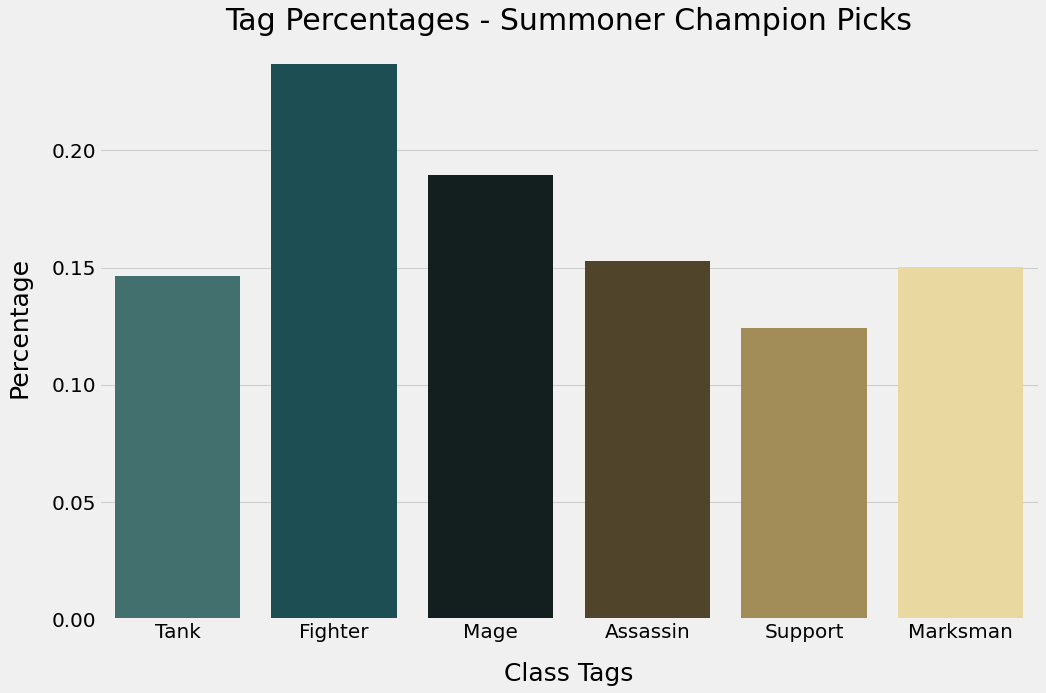

In [71]:
ax, fig = plt.subplots(figsize = (15,10))

sns.barplot(x=lst_t, y=lst_t_num)
plt.xlabel('Class Tags', size = 25, labelpad=20)
plt.ylabel('Percentage', size = 25, labelpad=20)
plt.title('Tag Percentages - Summoner Champion Picks', size = 30)
plt.tick_params(labelsize = 20)

plt.savefig('/Users/samanthajamwal/Desktop/LOL/Master/Figures/Tag_per_users')

# Champ Data Graphs

In [49]:
lst_t = ['Tank', 'Fighter', 'Mage', 'Assassin', 'Support','Marksman']
for x in lst_t:
    champ_data[x] = 0
    

In [50]:
for user in champ_data.index:
    for x in champ_data.loc[user]['Tags']:
        champ_data[x][user] = 1
        
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
champ_data

Tags  Tank  Fighter  Mage  Assassin  Support  \
Champion                                                                   
JarvanIV         [Tank, Fighter]     1        1     0         0        0   
AurelionSol               [Mage]     0        0     1         0        0   
Riven        [Fighter, Assassin]     0        1     0         1        0   
Shyvana          [Fighter, Tank]     1        1     0         0        0   
Yuumi            [Support, Mage]     0        0     1         0        1   
...                          ...   ...      ...   ...       ...      ...   
Galio               [Tank, Mage]     1        0     1         0        0   
MissFortune           [Marksman]     0        0     0         0        0   
Kaisa                 [Marksman]     0        0     0         0        0   
Taric         [Support, Fighter]     0        1     0         0        1   
Cassiopeia                [Mage]     0        0     1         0        0   

             Marksman  
Champion               
JarvanIV            0  
AurelionSol         0  
Riven               0  
Shyvana             0  
Yuumi               0  
...               ...  
Galio               0  
MissFortune         1  
Kaisa               1  
Taric               0  
Cassiopeia          0  

[150 rows x 7 columns]

In [52]:
tank = champ_data['Tank'].sum()
fight = champ_data['Fighter'].sum()
mage = champ_data['Mage'].sum()
ass = champ_data['Assassin'].sum()
sup = champ_data['Support'].sum()
mark = champ_data['Marksman'].sum()

In [60]:
lst_t_num = [tank/264, fight/264, mage/264, ass/264, sup/264, mark/264]

In [ ]:
lst)

In [59]:
43 + 66 + 59 + 37 + 32 + 27

264

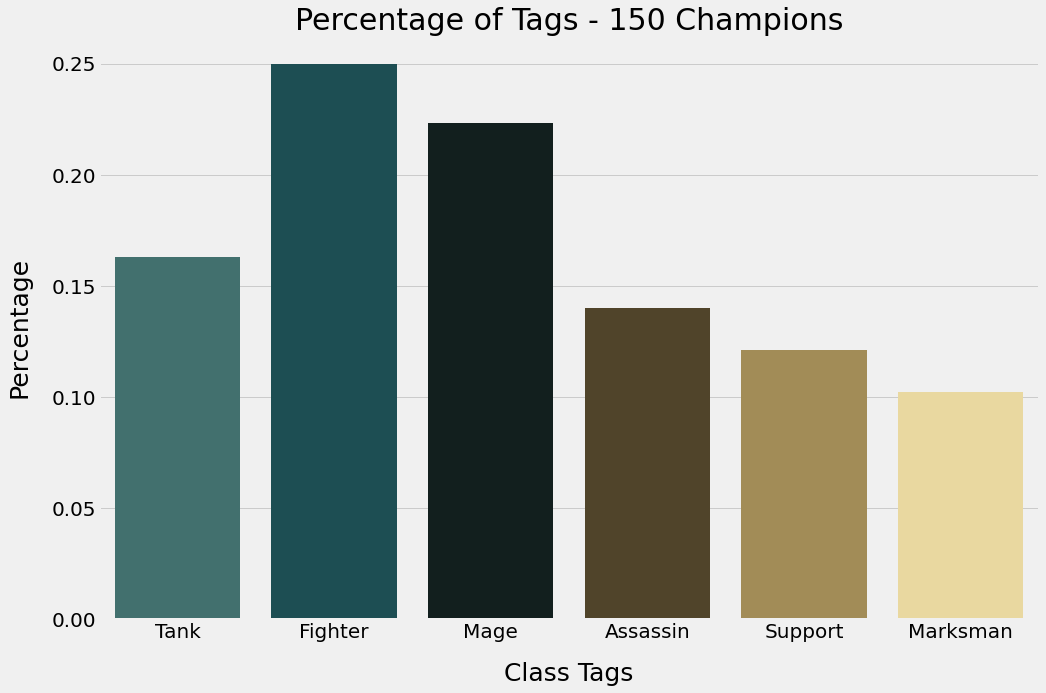

In [66]:
ax, fig = plt.subplots(figsize = (15,10))

sns.barplot(x=lst_t, y=lst_t_num)
plt.xlabel('Class Tags', size = 25, labelpad=20)
plt.ylabel('Percentage', size = 25, labelpad=20)
plt.title('Percentage of Tags - 150 Champions', size = 30)
plt.tick_params(labelsize = 20)

plt.savefig('/Users/samanthajamwal/Desktop/LOL/Master/Figures/Champ_tag')